<a href="https://colab.research.google.com/github/ama-yem/MDR-AMA-YEM/blob/main/MDR_YEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1-uploading tools

In [1]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 23.7 MB/s eta 0:00:00


In [2]:
pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 134.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.3.3 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
bigframes 2.15.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
geopandas 1.1.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.23.5 which is incompatible.
db-dtypes 1.4.3 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
blosc2 3.7.0 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
chex 0.1.90 requires numpy>=

In [1]:
!pip install scikit-learn==1.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 44.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.3.2 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.8

In [1]:
!pip install --upgrade seaborn


In [23]:
!pip install lime --quiet
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import pandas as pd
import joblib
import shap
import matplotlib.pyplot as plt
import random

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
!pip install xgboost==1.7.6

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 6.2 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 3.0.4
    Uninstalling xgboost-3.0.4:
      Successfully uninstalled xgboost-3.0.4


In [3]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.3 MB/s eta 0:00:00


**2- Splitting data**

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def fully_decoupled_split(data, target_column, train_size=0.7, val_size=0.15, test_size=0.15, random_state=42):
    """
    Fully index-decoupled stratified split that creates completely new DataFrames
    with no connection to original indices
    """
    # Validate target exists
    if target_column not in data.columns:
        raise ValueError(f"Target column '{target_column}' not found in DataFrame columns: {data.columns.tolist()}")

    # Convert to numpy arrays to completely decouple from indices
    y = data[target_column].values
    X = data.drop(columns=[target_column]).values
    feature_names = data.drop(columns=[target_column]).columns.tolist()

    # First split: training vs temp (val+test)
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y,
        train_size=train_size,
        stratify=y,
        random_state=random_state
    )

    # Adjust val/test ratio for remaining data
    remaining_ratio = val_size / (val_size + test_size)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp,
        train_size=remaining_ratio,
        stratify=y_temp,
        random_state=random_state
    )

    # Create completely new DataFrames with new memory allocation
    train_df = pd.DataFrame(X_train, columns=feature_names)
    train_df[target_column] = y_train

    val_df = pd.DataFrame(X_val, columns=feature_names)
    val_df[target_column] = y_val

    test_df = pd.DataFrame(X_test, columns=feature_names)
    test_df[target_column] = y_test

    # Verify complete decoupling
    assert train_df.index.tolist() == list(range(len(train_df)))
    assert val_df.index.tolist() == list(range(len(val_df)))
    assert test_df.index.tolist() == list(range(len(test_df)))

    return train_df, val_df, test_df

# Usage
original_data = pd.read_csv("Original data.csv")

# Perform fully decoupled split
train_df, val_df, test_df = fully_decoupled_split(
    data=original_data,
    target_column="MDR status",
    train_size=0.7,
    val_size=0.15,
    test_size=0.15,
    random_state=42
)

# Save datasets (no index to avoid any index reference)
train_df.to_csv("train_set.csv", index=False)
val_df.to_csv("validation_set.csv", index=False)
test_df.to_csv("test_set.csv", index=False)

print("Split completed with complete index decoupling:")
print(f"Train: {len(train_df)} rows, index: {train_df.index.tolist()[:5]}...")
print(f"Val: {len(val_df)} rows, index: {val_df.index.tolist()[:5]}...")
print(f"Test: {len(test_df)} rows, index: {test_df.index.tolist()[:5]}...")

Split completed with complete index decoupling:
Train: 1785 rows, index: [0, 1, 2, 3, 4]...
Val: 382 rows, index: [0, 1, 2, 3, 4]...
Test: 383 rows, index: [0, 1, 2, 3, 4]...


3- Data Preprocessing and model Performance on the Training Set

In [ ]:
# -*- coding: utf-8 -*-

"""
Nested-CV training pipeline for MDR-status prediction.
Supports mixed data (categorical + numeric) with ColumnTransformer, Optuna tuning,
hybrid feature selection (SHAP + model importances), out-of-fold-like calibration,
comprehensive metrics, and plots. Models: LR, RF, XGB, LGBM, CatBoost, SVM.
"""

import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["KMP_WARNINGS"] = "0"

import warnings
warnings.filterwarnings("ignore")

import logging
import traceback
import joblib
import shap
import optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from scipy.stats import norm, chi2, bootstrap

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.metrics import (
    roc_auc_score, average_precision_score, recall_score, f1_score,
    accuracy_score, cohen_kappa_score, matthews_corrcoef, brier_score_loss,
    log_loss, roc_curve, precision_recall_curve
)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

# ==================== CONFIG ====================
CONFIG = {
    'random_state': 42,
    'optimization': {
        'inner_cv_folds': 5,
        'n_trials': 20,
        'optuna_n_jobs': 1
    },
    'feature_selection': {
        'n_features': 7,
        'shap_weight': 0.5,
        'tree_weight': 0.5,
        'max_samples_shap': 100
    },
    'evaluation': {
        'outer_cv_folds': 5,
        'calibration_split_size': 0.2,
        'calibration_method': 'sigmoid',
        'n_bins': 10,
        'bootstrap': 500
    },
    'output_dirs': {
        'models': 'trained_models',
        'plots': 'plots',
        'metrics': 'metrics',
        'optuna': 'optuna_studies'
    },
    'plotting': {
        'figsize': (10, 8),
        'dpi': 300,
        'style': 'seaborn-v0_8',
        'colors': ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b']
    },
    'data': {
        'train_csv': 'train_set.csv',
        'target': 'MDR status'
    }
}

# Create directories
for d in CONFIG['output_dirs'].values():
    os.makedirs(d, exist_ok=True)

# Logging
logging.basicConfig(
    filename=os.path.join(CONFIG['output_dirs']['metrics'], 'pipeline.log'),
    level=logging.INFO,
    format='%(asctime)s %(levelname)s %(message)s'
)

# ==================== Utilities ====================
def create_preprocessor(X: pd.DataFrame) -> ColumnTransformer:
    """OHE for categoricals, StandardScaler for numerics."""
    cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    num_cols = X.select_dtypes(include=[np.number, 'bool']).columns.tolist()

    cat_pipe = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])
    num_pipe = Pipeline([('scale', StandardScaler())])

    return ColumnTransformer(
        [('cat', cat_pipe, cat_cols), ('num', num_pipe, num_cols)],
        remainder='drop'
    )

def get_feature_names(pre: ColumnTransformer, X: pd.DataFrame) -> list:
    names = []
    for nm, pipe, cols in pre.transformers_:
        if nm == 'cat' and hasattr(pipe.named_steps['onehot'], 'categories_'):
            cats = pipe.named_steps['onehot'].categories_
            for c, cl in zip(cols, cats):
                names += [f"{c}_{v}" for v in cl]
        elif nm == 'num':
            names += list(cols)
    return names

def calibration_curve_fixed_bins(y_true, y_prob, n_bins=10):
    edges = np.linspace(0., 1. + 1e-8, n_bins + 1)
    idx = np.digitize(y_prob, edges) - 1
    prob_true, prob_pred = np.zeros(n_bins), np.zeros(n_bins)
    for b in range(n_bins):
        m = idx == b
        if m.any():
            prob_true[b] = y_true[m].mean()
            prob_pred[b] = y_prob[m].mean()
        else:
            prob_true[b] = np.nan
            prob_pred[b] = 0.5 * (edges[b] + edges[b+1])
    return prob_true, prob_pred

def collect_metrics(y_true, y_proba, y_pred):
    res = {
        'roc_auc': roc_auc_score(y_true, y_proba),
        'pr_auc': average_precision_score(y_true, y_proba),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred),
        'kappa': cohen_kappa_score(y_true, y_pred),
        'mcc': matthews_corrcoef(y_true, y_pred),
        'brier': brier_score_loss(y_true, y_proba),
        'logloss': log_loss(y_true, y_proba),
        'accuracy': accuracy_score(y_true, y_pred)
    }
    pt, pp = calibration_curve_fixed_bins(y_true, y_proba, CONFIG['evaluation']['n_bins'])
    res['ece'], res['mce'] = np.nanmean(np.abs(pt - pp)), np.nanmax(np.abs(pt - pp))
    return res

def bootstrap_metrics(y_true, y_proba, y_pred):
    METRIC_FN = {
        'roc_auc': roc_auc_score,
        'pr_auc': average_precision_score,
        'recall': recall_score,
        'f1': f1_score,
        'accuracy': accuracy_score
    }
    ci = {}
    n = len(y_true)
    for m, fn in METRIC_FN.items():
        def _statistic(idx):
            idx = np.array(idx, dtype=int)
            yt, yp, yp_hat = y_true[idx], y_proba[idx], y_pred[idx]
            return fn(yt, yp if m in ('roc_auc', 'pr_auc') else yp_hat)
        try:
            res = bootstrap(
                (np.arange(n),), _statistic,
                n_resamples=CONFIG['evaluation']['bootstrap'],
                confidence_level=0.95, method='percentile'
            )
            ci[f"{m}_ci_low"], ci[f"{m}_ci_high"] = res.confidence_interval.low, res.confidence_interval.high
        except Exception:
            ci[f"{m}_ci_low"], ci[f"{m}_ci_high"] = np.nan, np.nan
    return ci

def evaluate_calibration_stats(y_true, y_proba):
    p = np.clip(y_proba, 1e-6, 1 - 1e-6)
    y = y_true
    denom = np.sqrt((p * (1 - p)).sum())
    z = (y - p).sum() / denom if denom else np.nan
    zp = 2 * (1 - norm.cdf(abs(z))) if not np.isnan(z) else np.nan

    df = pd.DataFrame({'y': y, 'p': p})
    df['bin'] = pd.qcut(df['p'], CONFIG['evaluation']['n_bins'], duplicates='drop')
    grp = df.groupby('bin', observed=True)
    obs_s, exp_s = grp['y'].sum(), grp['p'].sum()
    hl_stat = ((obs_s - exp_s) ** 2 / (exp_s + 1e-9)).sum()
    hl_p = 1 - chi2.cdf(hl_stat, len(obs_s) - 2)

    x = np.log(p / (1 - p)).reshape(-1, 1)
    lr = LinearRegression().fit(x, y.astype(float))
    slope, intercept = lr.coef_[0], lr.intercept_
    return slope, intercept, z, zp, hl_stat, hl_p

def _decision_to_proba(model, X):
    scores = model.decision_function(X)
    scores = np.asarray(scores).ravel()
    p1 = 1.0 / (1.0 + np.exp(-scores))
    return p1

# ========= Hybrid Feature Selector =========
class HybridFeatureSelector:
    def __init__(self, n_features, shap_weight, tree_weight, max_samples_shap):
        self.n_features = n_features
        self.shap_weight = shap_weight
        self.tree_weight = tree_weight
        self.max_samples_shap = max_samples_shap
        self.selected_features_ = None

    def _calculate_shap_importances(self, X, model):
        try:
            explainer = shap.TreeExplainer(model)
            X_samp = X.sample(min(self.max_samples_shap, len(X)),
                              random_state=CONFIG['random_state'])
            shap_vals = explainer.shap_values(X_samp)
            if isinstance(shap_vals, list):
                shap_arr = np.abs(shap_vals[-1])
            else:
                shap_arr = np.abs(shap_vals)
                if shap_arr.ndim == 3:
                    shap_arr = shap_arr[:, :, -1]
            return pd.Series(shap_arr.mean(axis=0), index=X_samp.columns)
        except Exception as e:
            logging.error(f"SHAP error: {e}")
            return pd.Series(0.0, index=X.columns)

    def fit(self, X, y, model):
        tree_models = (RandomForestClassifier, XGBClassifier, lgb.LGBMClassifier, CatBoostClassifier)
        shap_imp = (self._calculate_shap_importances(X, model)
                    if isinstance(model, tree_models) else
                    pd.Series(0.0, index=X.columns))

        if hasattr(model, 'feature_importances_'):
            tree_imp = pd.Series(model.feature_importances_, index=X.columns)
        elif hasattr(model, 'coef_'):
            coef = model.coef_
            coef = coef.ravel() if hasattr(coef, 'ndim') and coef.ndim > 1 else coef
            tree_imp = pd.Series(np.abs(coef), index=X.columns)
        else:
            tree_imp = pd.Series(0.0, index=X.columns)

        shap_imp, tree_imp = shap_imp.align(tree_imp, fill_value=0)

        if shap_imp.sum() == 0 and tree_imp.sum() == 0:
            combined = pd.Series(np.arange(len(X.columns)), index=X.columns)
        else:
            shap_rank = shap_imp.rank(ascending=False) + 1e-8
            tree_rank = tree_imp.rank(ascending=False) + 1e-8
            combined = self.shap_weight * shap_rank + self.tree_weight * tree_rank

        self.selected_features_ = combined.nsmallest(self.n_features).index.tolist()
        return self

    def transform(self, X):
        return X[self.selected_features_]

    def fit_transform(self, X, y, model):
        return self.fit(X, y, model).transform(X)

# ========== Pipeline ==========
class NestedCVPipeline:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.models = {
            'LogisticRegression': LogisticRegression,
            'RandomForest': RandomForestClassifier,
            'XGBoost': XGBClassifier,
            'LightGBM': lgb.LGBMClassifier,
            'CatBoost': CatBoostClassifier,
            'SVM': SVC
        }

    def _get_model_params(self, model_name, trial, base_params=None):
        params = base_params or {}
        if model_name == 'XGBoost':
            params.update({
                'n_estimators': trial.suggest_int('n_estimators', 50, 500),
                'max_depth': trial.suggest_int('max_depth', 2, 8),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                'subsample': trial.suggest_float('subsample', 0.6, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
                'n_jobs': 1,
                'random_state': CONFIG['random_state'],
                'eval_metric': 'logloss'
            })
        elif model_name == 'RandomForest':
            params.update({
                'n_estimators': trial.suggest_int('n_estimators', 50, 500),
                'max_depth': trial.suggest_int('max_depth', 2, 12),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
                'n_jobs': 1,
                'random_state': CONFIG['random_state']
            })
        elif model_name == 'LogisticRegression':
            params.update({
                'C': trial.suggest_float('C', 0.1, 10.0, log=True),
                'solver': 'liblinear',
                'max_iter': 1000,
                'random_state': CONFIG['random_state']
            })
        elif model_name == 'CatBoost':
            params.update({
                'iterations': trial.suggest_int('iterations', 50, 500),
                'depth': trial.suggest_int('depth', 2, 8),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                'random_seed': CONFIG['random_state'],
                'logging_level': 'Silent'
            })
        elif model_name == 'SVM':
            # FIXED: Get kernel first, then conditionally suggest gamma
            kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
            params.update({
                'C': trial.suggest_float('C', 0.01, 100, log=True),
                'kernel': kernel,
                'probability': False,
                'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
                'random_state': CONFIG['random_state']
            })
            # Only suggest gamma for rbf kernel
            if kernel == 'rbf':
                params['gamma'] = trial.suggest_categorical('gamma', ['scale', 'auto'])

        elif model_name == 'LightGBM':
            params.update({
                'n_estimators': trial.suggest_int('n_estimators', 50, 300),
                'max_depth': trial.suggest_int('max_depth', 2, 8),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                'subsample': trial.suggest_float('subsample', 0.6, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
                'n_jobs': 1,
                'random_state': CONFIG['random_state'],
                'verbosity': -1
            })
        return params

    def _create_model(self, model_name, params):
        model_cls = self.models[model_name]
        return model_cls(**params)

    def _preprocess_to_df(self, pre, X_df_raw, feat_names):
        X_tx = pre.transform(X_df_raw)
        return pd.DataFrame(X_tx, columns=feat_names, index=X_df_raw.index)

    # ---- Inner optimization ----
    def _optimize_inner(self, X_train, y_train, model_name, pre, feat_names):
        def objective(trial):
            params = self._get_model_params(model_name, trial)
            cv = StratifiedKFold(CONFIG['optimization']['inner_cv_folds'],
                                   shuffle=True, random_state=CONFIG['random_state'])
            aucs = []
            for tr_idx, val_idx in cv.split(X_train, y_train):
                X_tr, X_val = X_train.iloc[tr_idx], X_train.iloc[val_idx]
                y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]

                X_tr_df = self._preprocess_to_df(pre, X_tr, feat_names)
                X_val_df = self._preprocess_to_df(pre, X_val, feat_names)

                base = self._create_model(model_name, params)
                base.fit(X_tr_df, y_tr)

                selector = HybridFeatureSelector(**CONFIG['feature_selection'])
                X_tr_sel = selector.fit_transform(X_tr_df, y_tr, base)
                X_val_sel = selector.transform(X_val_df)

                final = self._create_model(model_name, params)
                final.fit(X_tr_sel, y_tr)
                if hasattr(final, "predict_proba"):
                    y_prob = final.predict_proba(X_val_sel)[:, 1]
                else:
                    y_prob = _decision_to_proba(final, X_val_sel)

                aucs.append(roc_auc_score(y_val, y_prob))
            return np.mean(aucs)

        study = optuna.create_study(direction='maximize', study_name=f'opt_{model_name}')
        study.optimize(objective, n_trials=CONFIG['optimization']['n_trials'],
                         n_jobs=CONFIG['optimization']['optuna_n_jobs'])
        return study.best_params

    # ---- Train + calibrate ----
    def _train_calibrate(self, X_tr, y_tr, model_name, params, pre, feat_names):
        X_tr_sub, X_cal, y_tr_sub, y_cal = train_test_split(
            X_tr, y_tr, test_size=CONFIG['evaluation']['calibration_split_size'],
            stratify=y_tr, random_state=CONFIG['random_state']
        )

        X_tr_df = self._preprocess_to_df(pre, X_tr_sub, feat_names)
        X_cal_df = self._preprocess_to_df(pre, X_cal, feat_names)

        base = self._create_model(model_name, params)
        base.fit(X_tr_df, y_tr_sub)

        selector = HybridFeatureSelector(**CONFIG['feature_selection'])
        X_tr_sel = selector.fit_transform(X_tr_df, y_tr_sub, base)
        X_cal_sel = selector.transform(X_cal_df)

        final = self._create_model(model_name, params)

        # FIXED: Clean separation - fit base model first, then calibrate
        if model_name == 'SVM':
            # SVM needs Pipeline wrapper due to probability=False
            base_model = Pipeline([('model', final)])
        else:
            base_model = final

        # Fit the base model
        base_model.fit(X_tr_sel, y_tr_sub)

        # Single calibration step with model-specific methods
        if model_name == 'SVM':
            calibrated = CalibratedClassifierCV(
                base_model, method='isotonic', cv='prefit'  # Isotonic often better for SVMs
            ).fit(X_cal_sel, y_cal)
        else:
            calibrated = CalibratedClassifierCV(
                base_model, method=CONFIG['evaluation']['calibration_method'], cv='prefit'
            ).fit(X_cal_sel, y_cal)

        return final, calibrated, selector


    # ---- Outer CV loop ----
    def run_pipeline(self):
        outer = StratifiedKFold(CONFIG['evaluation']['outer_cv_folds'],
                              shuffle=True, random_state=CONFIG['random_state'])
        summaries, plot_data = [], {}

        # Create directory for parameter saving if it doesn't exist
        os.makedirs(os.path.join(CONFIG['output_dirs']['models'], 'best_params'), exist_ok=True)

        for model_name in self.models:
            print(f"\n▶ Processing {model_name} ...")
            fold_metrics, all_y, all_p = [], [], []
            model_params = {}  # To store parameters for all folds

            for fold_id, (tr_idx, te_idx) in enumerate(outer.split(self.X, self.y), start=1):
                print(f"    Fold {fold_id}/{CONFIG['evaluation']['outer_cv_folds']}")
                X_tr, X_te = self.X.iloc[tr_idx], self.X.iloc[te_idx]
                y_tr, y_te = self.y.iloc[tr_idx], self.y.iloc[te_idx]

                pre = create_preprocessor(X_tr)
                pre.fit(X_tr)
                feat_names = get_feature_names(pre, X_tr)

                try:
                    best_params = self._optimize_inner(X_tr, y_tr, model_name, pre, feat_names)

                    # Save parameters for this fold
                    model_params[f'fold_{fold_id}'] = best_params

                    final_model, calibrated, selector = self._train_calibrate(
                        X_tr, y_tr, model_name, best_params, pre, feat_names
                    )

                    X_te_df = self._preprocess_to_df(pre, X_te, feat_names)
                    X_te_sel = selector.transform(X_te_df)
                    y_proba = calibrated.predict_proba(X_te_sel)[:, 1]
                    y_pred = (y_proba >= 0.5).astype(int)

                    m = collect_metrics(y_te.to_numpy(), y_proba, y_pred)
                    m.update(bootstrap_metrics(y_te.to_numpy(), y_proba, y_pred))
                    slope, intercept, z, zp, hl_stat, hl_p = evaluate_calibration_stats(
                        y_te.to_numpy(), y_proba
                    )
                    m.update({'slope': slope, 'intercept': intercept,
                              'spiegel_z': z, 'spiegel_p': zp,
                              'hl_stat': hl_stat, 'hl_p': hl_p})
                    fold_metrics.append(m)

                    joblib.dump(
                        {'base_model': final_model, 'calibrated': calibrated,
                         'preprocessor': pre, 'selector': selector,
                         'best_params': best_params},  # Save params with model
                        os.path.join(CONFIG['output_dirs']['models'],
                                     f"{model_name}_fold{fold_id}_artifact.pkl")
                    )
                    all_y.append(y_te.to_numpy())
                    all_p.append(y_proba)

                except Exception as e:
                    print(f"    ❌ Error in {model_name} fold {fold_id}: {str(e)}")
                    logging.error(f"Error in {model_name} fold {fold_id}: {str(e)}")
                    logging.error(traceback.format_exc())
                    continue

            if fold_metrics:
                # Save all fold parameters for this model
                param_path = os.path.join(CONFIG['output_dirs']['models'],
                                        'best_params', f'{model_name}_params.json')
                with open(param_path, 'w') as f:
                    json.dump(model_params, f, indent=4)

                df_fold = pd.DataFrame(fold_metrics)
                summary = {f"{c}_mean": df_fold[c].mean() for c in df_fold}
                summary.update({f"{c}_std": df_fold[c].std() for c in df_fold})
                summary['model'] = model_name
                summaries.append(summary)
                plot_data[model_name] = {'y': np.concatenate(all_y),
                                         'p': np.concatenate(all_p)}

                # Train final model on full training set
                print(f"    ↪ Training final {model_name} on full training set ...")
                try:
                    pre_full = create_preprocessor(self.X)
                    pre_full.fit(self.X)
                    feat_names_full = get_feature_names(pre_full, self.X)

                    best_full = self._optimize_inner(self.X, self.y, model_name, pre_full, feat_names_full)

                    # Save final model parameters
                    model_params['final_model'] = best_full
                    with open(param_path, 'w') as f:  # Update with final params
                        json.dump(model_params, f, indent=4)

                    final_full, calibrated_full, selector_full = self._train_calibrate(
                        self.X, self.y, model_name, best_full, pre_full, feat_names_full
                    )
                    joblib.dump(
                        {'base_model': final_full, 'calibrated': calibrated_full,
                         'preprocessor': pre_full, 'selector': selector_full,
                         'metadata': {'selected_features': selector_full.selected_features_,
                                      'all_features': feat_names_full,
                                      'model_name': model_name,
                                      'best_params': best_full}},  # Save final params
                        os.path.join(CONFIG['output_dirs']['models'],
                                     f"{model_name}_final_calibrated_model.pkl")
                    )
                    print(f"✔ {model_name} complete.")
                except Exception as e:
                    print(f"    ❌ Error training final {model_name}: {str(e)}")
                    logging.error(f"Error training final {model_name}: {str(e)}")
                    logging.error(traceback.format_exc())
            else:
                print(f"    ❌ {model_name} failed completely - skipping")

        if summaries:
            metrics_df = pd.DataFrame(summaries)
            metrics_df.to_csv(os.path.join(CONFIG['output_dirs']['metrics'], 'final_metrics.csv'), index=False)
            self._make_plots(summaries, plot_data)

        print("\n=== Pipeline Complete ===")
        print(f"All best parameters saved to: {os.path.join(CONFIG['output_dirs']['models'], 'best_params')}")

      # ---- Plotting ----
    def _make_plots(self, summaries, plot_data):
        dfm = pd.DataFrame(summaries)
        try:
            if CONFIG['plotting']['style'] in plt.style.available:
                plt.style.use(CONFIG['plotting']['style'])
            else:
                print(f"Warning: Plotting style '{CONFIG['plotting']['style']}' not found. Using 'seaborn-v2_8' as fallback.")
                plt.style.use('seaborn-v2_8')
        except Exception:
            print("Warning: Could not set plotting style. Using 'seaborn-v2_8' as fallback.")
            plt.style.use('seaborn-v2_8')


        colors = CONFIG['plotting']['colors']

        # Calibration curves
        for m, d in plot_data.items():
            pt, pp = calibration_curve_fixed_bins(d['y'], d['p'], CONFIG['evaluation']['n_bins'])
            plt.figure(figsize=CONFIG['plotting']['figsize'], dpi=CONFIG['plotting']['dpi'])
            plt.plot(pp, pt, 'o-', label=m, color=colors[list(plot_data.keys()).index(m) % len(colors)])
            plt.plot([0, 1], [0, 1], 'k--', label='Perfect')
            plt.title(f"{m} Calibration")
            plt.xlabel('Mean Predicted Probability')
            plt.ylabel('Fraction of Positives')
            plt.legend()
            plt.grid(alpha=0.3)
            plt.tight_layout()
            plt.savefig(os.path.join(CONFIG['output_dirs']['plots'], f"{m}_calibration.png"))
            plt.close()

        # Radar chart
        metrics = ['roc_auc_mean', 'pr_auc_mean', 'f1_mean', 'accuracy_mean', 'kappa_mean', 'mcc_mean']
        dfr = dfm[['model'] + metrics].copy()
        for c in metrics:
            min_val, max_val = dfr[c].min(), dfr[c].max()
            dfr[c] = (dfr[c] - min_val) / (max_val - min_val + 1e-9)

        angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
        angles += angles[:1] # Close the loop
        fig, ax = plt.subplots(subplot_kw={'polar': True}, figsize=CONFIG['plotting']['figsize'], dpi=CONFIG['plotting']['dpi'])

        for i, row in dfr.iterrows():
            vals = row[metrics].tolist()
            vals += vals[:1] # Close the loop
            color = colors[i % len(colors)]
            ax.plot(angles, vals, label=row['model'], c=color)
            ax.fill(angles, vals, alpha=0.25, c=color)

        ax.set_thetagrids(np.degrees(angles[:-1]), [c.replace('_mean', '').upper() for c in metrics])
        ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
        plt.title('Model Performance Radar')
        plt.tight_layout()
        plt.savefig(os.path.join(CONFIG['output_dirs']['plots'], 'radar_chart.png'))
        plt.close()

        # ROC curves
        plt.figure(figsize=CONFIG['plotting']['figsize'], dpi=CONFIG['plotting']['dpi'])
        for i, (m, d) in enumerate(plot_data.items()):
            fpr, tpr, _ = roc_curve(d['y'], d['p'])
            auc = roc_auc_score(d['y'], d['p'])
            plt.plot(fpr, tpr, label=f"{m} (AUC={auc:.3f})", c=colors[i % len(colors)])
        plt.plot([0, 1], [0, 1], 'k--', label='Chance')
        plt.xlabel('FPR'); plt.ylabel('TPR')
        plt.title('ROC Curves'); plt.legend(); plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.savefig(os.path.join(CONFIG['output_dirs']['plots'], 'roc_curves.png'))
        plt.close()

        # PR curves
        plt.figure(figsize=CONFIG['plotting']['figsize'], dpi=CONFIG['plotting']['dpi'])
        for i, (m, d) in enumerate(plot_data.items()):
            precision, recall, _ = precision_recall_curve(d['y'], d['p'])
            ap = average_precision_score(d['y'], d['p'])
            plt.plot(recall, precision, label=f"{m} (AP={ap:.3f})", c=colors[i % len(colors)])
        plt.xlabel('Recall'); plt.ylabel('Precision')
        plt.title('Precision-Recall Curves'); plt.legend(); plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.savefig(os.path.join(CONFIG['output_dirs']['plots'], 'pr_curves.png'))
        plt.close()

        print(f"\nPlots saved to {CONFIG['output_dirs']['plots']}/")

# ========== Main ==========
if __name__ == '__main__':
    try:
        print("Loading training data ...")
        df_train = pd.read_csv(CONFIG['data']['train_csv'])
        target_col = CONFIG['data']['target']
        if target_col not in df_train.columns:
            raise ValueError(f"Expected target column '{target_col}' in {CONFIG['data']['train_csv']}")
        X_train = df_train.drop(columns=[target_col])
        y_train = df_train[target_col].astype(int)

        print(f"Shape: {X_train.shape} | Class balance:\n{y_train.value_counts(normalize=True)}")
        pipeline = NestedCVPipeline(X_train, y_train)
        pipeline.run_pipeline()

    except Exception as e:
        logging.error(f"A critical error occurred: {str(e)}")
        logging.error(traceback.format_exc())
        traceback.print_exc()

[I 2025-08-15 21:11:07,018] A new study created in memory with name: opt_LogisticRegression
[I 2025-08-15 21:11:07,137] Trial 0 finished with value: 0.7203488171951896 and parameters: {'C': 1.456741299671619}. Best is trial 0 with value: 0.7203488171951896.


Loading training data ...
Shape: (1785, 5) | Class balance:
MDR status
1    0.519888
0    0.480112
Name: proportion, dtype: float64

▶ Processing LogisticRegression ...
    Fold 1/5


[I 2025-08-15 21:11:07,264] Trial 1 finished with value: 0.7203486847941363 and parameters: {'C': 2.6972052464438465}. Best is trial 0 with value: 0.7203488171951896.
[I 2025-08-15 21:11:07,376] Trial 2 finished with value: 0.7203978717854678 and parameters: {'C': 7.550804876990473}. Best is trial 2 with value: 0.7203978717854678.
[I 2025-08-15 21:11:07,485] Trial 3 finished with value: 0.7203978717854678 and parameters: {'C': 5.5514208172686725}. Best is trial 2 with value: 0.7203978717854678.
[I 2025-08-15 21:11:07,591] Trial 4 finished with value: 0.7203194241613387 and parameters: {'C': 0.28001661736729194}. Best is trial 2 with value: 0.7203978717854678.
[I 2025-08-15 21:11:07,697] Trial 5 finished with value: 0.7203486185936094 and parameters: {'C': 1.9201213005598565}. Best is trial 2 with value: 0.7203978717854678.
[I 2025-08-15 21:11:07,804] Trial 6 finished with value: 0.7203486847941363 and parameters: {'C': 2.8240311612688584}. Best is trial 2 with value: 0.7203978717854678

    Fold 2/5


[I 2025-08-15 21:11:16,974] Trial 1 finished with value: 0.734733926843122 and parameters: {'C': 0.84404374621627}. Best is trial 0 with value: 0.7347838420402472.
[I 2025-08-15 21:11:17,081] Trial 2 finished with value: 0.7347338606425952 and parameters: {'C': 1.0930309124302606}. Best is trial 0 with value: 0.7347838420402472.
[I 2025-08-15 21:11:17,195] Trial 3 finished with value: 0.7347838420402472 and parameters: {'C': 4.383491394258058}. Best is trial 0 with value: 0.7347838420402472.
[I 2025-08-15 21:11:17,308] Trial 4 finished with value: 0.7347636508796065 and parameters: {'C': 3.3631237069675004}. Best is trial 0 with value: 0.7347838420402472.
[I 2025-08-15 21:11:17,423] Trial 5 finished with value: 0.7348133674751516 and parameters: {'C': 8.929500600048389}. Best is trial 5 with value: 0.7348133674751516.
[I 2025-08-15 21:11:17,544] Trial 6 finished with value: 0.734547506159959 and parameters: {'C': 0.14155763906047378}. Best is trial 5 with value: 0.7348133674751516.
[I 

    Fold 3/5


[I 2025-08-15 21:11:23,056] Trial 1 finished with value: 0.7329863027368506 and parameters: {'C': 6.156441489921449}. Best is trial 0 with value: 0.7331634553462768.
[I 2025-08-15 21:11:23,230] Trial 2 finished with value: 0.73306475036098 and parameters: {'C': 3.3346215899687257}. Best is trial 0 with value: 0.7331634553462768.
[I 2025-08-15 21:11:23,391] Trial 3 finished with value: 0.7331040734738347 and parameters: {'C': 1.6123215066184817}. Best is trial 0 with value: 0.7331634553462768.
[I 2025-08-15 21:11:23,574] Trial 4 finished with value: 0.7329863689373773 and parameters: {'C': 5.066297784164521}. Best is trial 0 with value: 0.7331634553462768.
[I 2025-08-15 21:11:23,738] Trial 5 finished with value: 0.7330942095953576 and parameters: {'C': 1.8620049866262882}. Best is trial 0 with value: 0.7331634553462768.
[I 2025-08-15 21:11:23,918] Trial 6 finished with value: 0.733084478117934 and parameters: {'C': 2.3691956713339013}. Best is trial 0 with value: 0.7331634553462768.
[I 

    Fold 4/5


[I 2025-08-15 21:11:28,830] Trial 1 finished with value: 0.73612255628671 and parameters: {'C': 0.8403942173528337}. Best is trial 1 with value: 0.73612255628671.
[I 2025-08-15 21:11:28,944] Trial 2 finished with value: 0.7350642746670214 and parameters: {'C': 3.329800546371001}. Best is trial 1 with value: 0.73612255628671.
[I 2025-08-15 21:11:29,072] Trial 3 finished with value: 0.7348983497628648 and parameters: {'C': 0.1789402899128097}. Best is trial 1 with value: 0.73612255628671.
[I 2025-08-15 21:11:29,177] Trial 4 finished with value: 0.7361323539646601 and parameters: {'C': 0.5760639835914133}. Best is trial 4 with value: 0.7361323539646601.
[I 2025-08-15 21:11:29,290] Trial 5 finished with value: 0.7349671268332436 and parameters: {'C': 0.16025955935912284}. Best is trial 4 with value: 0.7361323539646601.
[I 2025-08-15 21:11:29,398] Trial 6 finished with value: 0.7350740881755324 and parameters: {'C': 6.9880029263728485}. Best is trial 4 with value: 0.7361323539646601.
[I 202

    Fold 5/5


[I 2025-08-15 21:11:34,439] Trial 1 finished with value: 0.728635109777455 and parameters: {'C': 0.284632748580393}. Best is trial 1 with value: 0.728635109777455.
[I 2025-08-15 21:11:34,604] Trial 2 finished with value: 0.7284490253737792 and parameters: {'C': 1.896534861658446}. Best is trial 1 with value: 0.728635109777455.
[I 2025-08-15 21:11:34,755] Trial 3 finished with value: 0.72844904120434 and parameters: {'C': 1.3710372527193606}. Best is trial 1 with value: 0.728635109777455.
[I 2025-08-15 21:11:34,910] Trial 4 finished with value: 0.7284294962184052 and parameters: {'C': 2.9428453384338185}. Best is trial 1 with value: 0.728635109777455.
[I 2025-08-15 21:11:35,061] Trial 5 finished with value: 0.7284784184076302 and parameters: {'C': 1.5503472959246716}. Best is trial 1 with value: 0.728635109777455.
[I 2025-08-15 21:11:35,217] Trial 6 finished with value: 0.7287531904096582 and parameters: {'C': 0.11406846556051314}. Best is trial 6 with value: 0.7287531904096582.
[I 2025

    ↪ Training final LogisticRegression on full training set ...


[I 2025-08-15 21:11:40,706] Trial 1 finished with value: 0.7305793725576961 and parameters: {'C': 1.4868718756191284}. Best is trial 1 with value: 0.7305793725576961.
[I 2025-08-15 21:11:40,833] Trial 2 finished with value: 0.7306045195114172 and parameters: {'C': 4.376753734675956}. Best is trial 2 with value: 0.7306045195114172.
[I 2025-08-15 21:11:40,948] Trial 3 finished with value: 0.7318149995456823 and parameters: {'C': 0.7612508849752799}. Best is trial 3 with value: 0.7318149995456823.
[I 2025-08-15 21:11:41,056] Trial 4 finished with value: 0.7319469698703323 and parameters: {'C': 0.24788363171665892}. Best is trial 4 with value: 0.7319469698703323.
[I 2025-08-15 21:11:41,167] Trial 5 finished with value: 0.7319784132456381 and parameters: {'C': 0.2606831628588255}. Best is trial 5 with value: 0.7319784132456381.
[I 2025-08-15 21:11:41,287] Trial 6 finished with value: 0.7319972554779283 and parameters: {'C': 0.3397280267659802}. Best is trial 6 with value: 0.7319972554779283

✔ LogisticRegression complete.

▶ Processing RandomForest ...
    Fold 1/5


[I 2025-08-15 21:11:56,002] Trial 0 finished with value: 0.7794903155249504 and parameters: {'n_estimators': 405, 'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.7794903155249504.
[I 2025-08-15 21:12:07,014] Trial 1 finished with value: 0.7728018446114756 and parameters: {'n_estimators': 308, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.7794903155249504.
[I 2025-08-15 21:12:11,962] Trial 2 finished with value: 0.7764278791602066 and parameters: {'n_estimators': 250, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.7794903155249504.
[I 2025-08-15 21:12:20,176] Trial 3 finished with value: 0.7964460578248361 and parameters: {'n_estimators': 161, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 3 with value: 0.7964460578248361.
[I 2025-08-15 21:12:26,475] Trial 4 finished with value: 0.7928123771152723 and parameters: {

    Fold 2/5


[I 2025-08-15 21:14:10,615] Trial 0 finished with value: 0.7724953030726313 and parameters: {'n_estimators': 353, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.7724953030726313.
[I 2025-08-15 21:14:11,757] Trial 1 finished with value: 0.7805811016032443 and parameters: {'n_estimators': 58, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.7805811016032443.
[I 2025-08-15 21:14:19,889] Trial 2 finished with value: 0.782052937913174 and parameters: {'n_estimators': 286, 'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.782052937913174.
[I 2025-08-15 21:14:24,091] Trial 3 finished with value: 0.7797642864046627 and parameters: {'n_estimators': 163, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.782052937913174.
[I 2025-08-15 21:14:26,368] Trial 4 finished with value: 0.7838842761833014 and parameters: {'n_est

KeyboardInterrupt: 

In [ ]:
# -*- coding: utf-8 -*-

"""
Nested-CV training pipeline for MDR-status prediction.
Supports mixed data (categorical + numeric) with ColumnTransformer, Optuna tuning,
hybrid feature selection (SHAP + model importances), out-of-fold-like calibration,
comprehensive metrics, and plots. Models: LR, RF, XGB, LGBM, CatBoost, SVM.
"""

import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["KMP_WARNINGS"] = "0"

import warnings
warnings.filterwarnings("ignore")

import logging
import traceback
import joblib
import shap
import optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json # Import the json library

from pathlib import Path
from scipy.stats import norm, chi2, bootstrap

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.metrics import (
    roc_auc_score, average_precision_score, recall_score, f1_score,
    accuracy_score, cohen_kappa_score, matthews_corrcoef, brier_score_loss,
    log_loss, roc_curve, precision_recall_curve
)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

# ==================== CONFIG ====================
CONFIG = {
    'random_state': 42,
    'optimization': {
        'inner_cv_folds': 5,
        'n_trials': 20,
        'optuna_n_jobs': 1
    },
    'feature_selection': {
        'n_features': 7,
        'shap_weight': 0.5,
        'tree_weight': 0.5,
        'max_samples_shap': 100
    },
    'evaluation': {
        'outer_cv_folds': 5,
        'calibration_split_size': 0.2,
        'calibration_method': 'sigmoid',
        'n_bins': 10,
        'bootstrap': 500
    },
    'output_dirs': {
        'models': 'trained_models',
        'plots': 'plots',
        'metrics': 'metrics',
        'optuna': 'optuna_studies'
    },
    'plotting': {
        'figsize': (10, 8),
        'dpi': 300,
        'style': 'seaborn-v0_8',
        'colors': ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b']
    },
    'data': {
        'train_csv': 'train_set.csv',
        'target': 'MDR status'
    }
}

# Create directories
for d in CONFIG['output_dirs'].values():
    os.makedirs(d, exist_ok=True)

# Logging
logging.basicConfig(
    filename=os.path.join(CONFIG['output_dirs']['metrics'], 'pipeline.log'),
    level=logging.INFO,
    format='%(asctime)s %(levelname)s %(message)s'
)

# ==================== Utilities ====================
def create_preprocessor(X: pd.DataFrame) -> ColumnTransformer:
    """OHE for categoricals, StandardScaler for numerics."""
    cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    num_cols = X.select_dtypes(include=[np.number, 'bool']).columns.tolist()

    cat_pipe = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])
    num_pipe = Pipeline([('scale', StandardScaler())])

    return ColumnTransformer(
        [('cat', cat_pipe, cat_cols), ('num', num_pipe, num_cols)],
        remainder='drop'
    )

def get_feature_names(pre: ColumnTransformer, X: pd.DataFrame) -> list:
    names = []
    for nm, pipe, cols in pre.transformers_:
        if nm == 'cat' and hasattr(pipe.named_steps['onehot'], 'categories_'):
            cats = pipe.named_steps['onehot'].categories_
            for c, cl in zip(cols, cats):
                names += [f"{c}_{v}" for v in cl]
        elif nm == 'num':
            names += list(cols)
    return names

def calibration_curve_fixed_bins(y_true, y_prob, n_bins=10):
    edges = np.linspace(0., 1. + 1e-8, n_bins + 1)
    idx = np.digitize(y_prob, edges) - 1
    prob_true, prob_pred = np.zeros(n_bins), np.zeros(n_bins)
    for b in range(n_bins):
        m = idx == b
        if m.any():
            prob_true[b] = y_true[m].mean()
            prob_pred[b] = y_prob[m].mean()
        else:
            prob_true[b] = np.nan
            prob_pred[b] = 0.5 * (edges[b] + edges[b+1])
    return prob_true, prob_pred

def collect_metrics(y_true, y_proba, y_pred):
    res = {
        'roc_auc': roc_auc_score(y_true, y_proba),
        'pr_auc': average_precision_score(y_true, y_proba),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred),
        'kappa': cohen_kappa_score(y_true, y_pred),
        'mcc': matthews_corrcoef(y_true, y_pred),
        'brier': brier_score_loss(y_true, y_proba),
        'logloss': log_loss(y_true, y_proba),
        'accuracy': accuracy_score(y_true, y_pred)
    }
    pt, pp = calibration_curve_fixed_bins(y_true, y_proba, CONFIG['evaluation']['n_bins'])
    res['ece'], res['mce'] = np.nanmean(np.abs(pt - pp)), np.nanmax(np.abs(pt - pp))
    return res

def bootstrap_metrics(y_true, y_proba, y_pred):
    METRIC_FN = {
        'roc_auc': roc_auc_score,
        'pr_auc': average_precision_score,
        'recall': recall_score,
        'f1': f1_score,
        'accuracy': accuracy_score
    }
    ci = {}
    n = len(y_true)
    for m, fn in METRIC_FN.items():
        def _statistic(idx):
            idx = np.array(idx, dtype=int)
            yt, yp, yp_hat = y_true[idx], y_proba[idx], y_pred[idx]
            return fn(yt, yp if m in ('roc_auc', 'pr_auc') else yp_hat)
        try:
            res = bootstrap(
                (np.arange(n),), _statistic,
                n_resamples=CONFIG['evaluation']['bootstrap'],
                confidence_level=0.95, method='percentile'
            )
            ci[f"{m}_ci_low"], ci[f"{m}_ci_high"] = res.confidence_interval.low, res.confidence_interval.high
        except Exception:
            ci[f"{m}_ci_low"], ci[f"{m}_ci_high"] = np.nan, np.nan
    return ci

def evaluate_calibration_stats(y_true, y_proba):
    p = np.clip(y_proba, 1e-6, 1 - 1e-6)
    y = y_true
    denom = np.sqrt((p * (1 - p)).sum())
    z = (y - p).sum() / denom if denom else np.nan
    zp = 2 * (1 - norm.cdf(abs(z))) if not np.isnan(z) else np.nan

    df = pd.DataFrame({'y': y, 'p': p})
    df['bin'] = pd.qcut(df['p'], CONFIG['evaluation']['n_bins'], duplicates='drop')
    grp = df.groupby('bin', observed=True)
    obs_s, exp_s = grp['y'].sum(), grp['p'].sum()
    hl_stat = ((obs_s - exp_s) ** 2 / (exp_s + 1e-9)).sum()
    hl_p = 1 - chi2.cdf(hl_stat, len(obs_s) - 2)

    x = np.log(p / (1 - p)).reshape(-1, 1)
    lr = LinearRegression().fit(x, y.astype(float))
    slope, intercept = lr.coef_[0], lr.intercept_
    return slope, intercept, z, zp, hl_stat, hl_p

def _decision_to_proba(model, X):
    scores = model.decision_function(X)
    scores = np.asarray(scores).ravel()
    p1 = 1.0 / (1.0 + np.exp(-scores))
    return p1

# ========= Hybrid Feature Selector =========
class HybridFeatureSelector:
    def __init__(self, n_features, shap_weight, tree_weight, max_samples_shap):
        self.n_features = n_features
        self.shap_weight = shap_weight
        self.tree_weight = tree_weight
        self.max_samples_shap = max_samples_shap
        self.selected_features_ = None

    def _calculate_shap_importances(self, X, model):
        try:
            explainer = shap.TreeExplainer(model)
            X_samp = X.sample(min(self.max_samples_shap, len(X)),
                              random_state=CONFIG['random_state'])
            shap_vals = explainer.shap_values(X_samp)
            if isinstance(shap_vals, list):
                shap_arr = np.abs(shap_vals[-1])
            else:
                shap_arr = np.abs(shap_vals)
                if shap_arr.ndim == 3:
                    shap_arr = shap_arr[:, :, -1]
            return pd.Series(shap_arr.mean(axis=0), index=X_samp.columns)
        except Exception as e:
            logging.error(f"SHAP error: {e}")
            return pd.Series(0.0, index=X.columns)

    def fit(self, X, y, model):
        tree_models = (RandomForestClassifier, XGBClassifier, lgb.LGBMClassifier, CatBoostClassifier)
        shap_imp = (self._calculate_shap_importances(X, model)
                    if isinstance(model, tree_models) else
                    pd.Series(0.0, index=X.columns))

        if hasattr(model, 'feature_importances_'):
            tree_imp = pd.Series(model.feature_importances_, index=X.columns)
        elif hasattr(model, 'coef_'):
            coef = model.coef_
            coef = coef.ravel() if hasattr(coef, 'ndim') and coef.ndim > 1 else coef
            tree_imp = pd.Series(np.abs(coef), index=X.columns)
        else:
            tree_imp = pd.Series(0.0, index=X.columns)

        shap_imp, tree_imp = shap_imp.align(tree_imp, fill_value=0)

        if shap_imp.sum() == 0 and tree_imp.sum() == 0:
            combined = pd.Series(np.arange(len(X.columns)), index=X.columns)
        else:
            shap_rank = shap_imp.rank(ascending=False) + 1e-8
            tree_rank = tree_imp.rank(ascending=False) + 1e-8
            combined = self.shap_weight * shap_rank + self.tree_weight * tree_rank

        self.selected_features_ = combined.nsmallest(self.n_features).index.tolist()
        return self

    def transform(self, X):
        return X[self.selected_features_]

    def fit_transform(self, X, y, model):
        return self.fit(X, y, model).transform(X)

# ========== Pipeline ==========
class NestedCVPipeline:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.models = {
            'LogisticRegression': LogisticRegression,
            'RandomForest': RandomForestClassifier,
            'XGBoost': XGBClassifier,
            'LightGBM': lgb.LGBMClassifier,
            'CatBoost': CatBoostClassifier,
            'SVM': SVC
        }

    def _get_model_params(self, model_name, trial, base_params=None):
        """
        Balanced hyperparameter tuning configuration ensuring fair comparison across all models.
        Each model now has 4-6 key hyperparameters with appropriately scaled search spaces.
        """
        params = base_params or {}

        if model_name == 'XGBoost':
            params.update({
                'n_estimators': trial.suggest_int('n_estimators', 50, 400),
                'max_depth': trial.suggest_int('max_depth', 3, 10),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                'subsample': trial.suggest_float('subsample', 0.7, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
                'n_jobs': 1,
                'random_state': CONFIG['random_state'],
                'eval_metric': 'logloss'
            })

        elif model_name == 'RandomForest':
            params.update({
                'n_estimators': trial.suggest_int('n_estimators', 50, 400),
                'max_depth': trial.suggest_int('max_depth', 3, 15),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
                'n_jobs': 1,
                'random_state': CONFIG['random_state']
            })

        elif model_name == 'LogisticRegression':
            penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet'])
            solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])

            # Ensure solver compatibility with penalty
            if penalty == 'elasticnet' and solver != 'saga':
                solver = 'saga'
            elif penalty == 'l1' and solver not in ['liblinear', 'saga']:
                solver = 'liblinear'

            params.update({
                'C': trial.suggest_float('C', 0.001, 100.0, log=True),
                'penalty': penalty,
                'solver': solver,
                'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
                'max_iter': 2000,
                'random_state': CONFIG['random_state']
            })

            # Add l1_ratio only for elasticnet penalty
            if penalty == 'elasticnet':
                params['l1_ratio'] = trial.suggest_float('l1_ratio', 0.1, 0.9)

        elif model_name == 'CatBoost':
            params.update({
                'iterations': trial.suggest_int('iterations', 50, 400),
                'depth': trial.suggest_int('depth', 3, 10),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
                'border_count': trial.suggest_int('border_count', 32, 255),
                'random_seed': CONFIG['random_state'],
                'logging_level': 'Silent'
            })

        elif model_name == 'SVM':
            # FIXED: Get kernel first, then conditionally suggest gamma
            kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
            params.update({
                'C': trial.suggest_float('C', 0.001, 100.0, log=True),
                'kernel': kernel,
                'probability': False,
                'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
                'random_state': CONFIG['random_state']
            })
            # Only suggest gamma for rbf kernel
            if kernel == 'rbf':
                params['gamma'] = trial.suggest_categorical('gamma', ['scale', 'auto'])

        elif model_name == 'LightGBM':
            params.update({
                'n_estimators': trial.suggest_int('n_estimators', 50, 400),
                'max_depth': trial.suggest_int('max_depth', 3, 10),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                'subsample': trial.suggest_float('subsample', 0.7, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
                'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 10.0, log=True),
                'n_jobs': 1,
                'random_state': CONFIG['random_state'],
                'verbosity': -1
            })

        return params

    def _create_model(self, model_name, params):
        model_cls = self.models[model_name]
        return model_cls(**params)

    def _preprocess_to_df(self, pre, X_df_raw, feat_names):
        X_tx = pre.transform(X_df_raw)
        return pd.DataFrame(X_tx, columns=feat_names, index=X_df_raw.index)

    # ---- Inner optimization ----
    def _optimize_inner(self, X_train, y_train, model_name, pre, feat_names):
        def objective(trial):
            params = self._get_model_params(model_name, trial)
            cv = StratifiedKFold(CONFIG['optimization']['inner_cv_folds'],
                                   shuffle=True, random_state=CONFIG['random_state'])
            aucs = []
            for tr_idx, val_idx in cv.split(X_train, y_train):
                X_tr, X_val = X_train.iloc[tr_idx], X_train.iloc[val_idx]
                y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]

                X_tr_df = self._preprocess_to_df(pre, X_tr, feat_names)
                X_val_df = self._preprocess_to_df(pre, X_val, feat_names)

                base = self._create_model(model_name, params)
                base.fit(X_tr_df, y_tr)

                selector = HybridFeatureSelector(**CONFIG['feature_selection'])
                X_tr_sel = selector.fit_transform(X_tr_df, y_tr, base)
                X_val_sel = selector.transform(X_val_df)

                final = self._create_model(model_name, params)
                final.fit(X_tr_sel, y_tr)
                if hasattr(final, "predict_proba"):
                    y_prob = final.predict_proba(X_val_sel)[:, 1]
                else:
                    y_prob = _decision_to_proba(final, X_val_sel)

                aucs.append(roc_auc_score(y_val, y_prob))
            return np.mean(aucs)

        study = optuna.create_study(direction='maximize', study_name=f'opt_{model_name}')
        study.optimize(objective, n_trials=CONFIG['optimization']['n_trials'],
                         n_jobs=CONFIG['optimization']['optuna_n_jobs'])
        return study.best_params

    # ---- Train + calibrate ----
    def _train_calibrate(self, X_tr, y_tr, model_name, params, pre, feat_names):
        X_tr_sub, X_cal, y_tr_sub, y_cal = train_test_split(
            X_tr, y_tr, test_size=CONFIG['evaluation']['calibration_split_size'],
            stratify=y_tr, random_state=CONFIG['random_state']
        )

        X_tr_df = self._preprocess_to_df(pre, X_tr_sub, feat_names)
        X_cal_df = self._preprocess_to_df(pre, X_cal, feat_names)

        base = self._create_model(model_name, params)
        base.fit(X_tr_df, y_tr_sub)

        selector = HybridFeatureSelector(**CONFIG['feature_selection'])
        X_tr_sel = selector.fit_transform(X_tr_df, y_tr_sub, base)
        X_cal_sel = selector.transform(X_cal_df)

        final = self._create_model(model_name, params)

        # FIXED: Clean separation - fit base model first, then calibrate
        if model_name == 'SVM':
            # SVM needs Pipeline wrapper due to probability=False
            base_model = Pipeline([('model', final)])
        else:
            base_model = final

        # Fit the base model
        base_model.fit(X_tr_sel, y_tr_sub)

        # Single calibration step with model-specific methods
        if model_name == 'SVM':
            calibrated = CalibratedClassifierCV(
                base_model, method='isotonic', cv='prefit'  # Isotonic often better for SVMs
            ).fit(X_cal_sel, y_cal)
        else:
            calibrated = CalibratedClassifierCV(
                base_model, method=CONFIG['evaluation']['calibration_method'], cv='prefit'
            ).fit(X_cal_sel, y_cal)

        return final, calibrated, selector


    # ---- Outer CV loop ----
    def run_pipeline(self):
        outer = StratifiedKFold(CONFIG['evaluation']['outer_cv_folds'],
                              shuffle=True, random_state=CONFIG['random_state'])
        summaries, plot_data = [], {}

        # Create directory for parameter saving if it doesn't exist
        os.makedirs(os.path.join(CONFIG['output_dirs']['models'], 'best_params'), exist_ok=True)

        for model_name in self.models:
            print(f"\n▶ Processing {model_name} ...")
            fold_metrics, all_y, all_p = [], [], []
            model_params = {}  # To store parameters for all folds

            for fold_id, (tr_idx, te_idx) in enumerate(outer.split(self.X, self.y), start=1):
                print(f"    Fold {fold_id}/{CONFIG['evaluation']['outer_cv_folds']}")
                X_tr, X_te = self.X.iloc[tr_idx], self.X.iloc[te_idx]
                y_tr, y_te = self.y.iloc[tr_idx], self.y.iloc[te_idx]

                pre = create_preprocessor(X_tr)
                pre.fit(X_tr)
                feat_names = get_feature_names(pre, X_tr)

                try:
                    best_params = self._optimize_inner(X_tr, y_tr, model_name, pre, feat_names)

                    # Save parameters for this fold
                    model_params[f'fold_{fold_id}'] = best_params

                    final_model, calibrated, selector = self._train_calibrate(
                        X_tr, y_tr, model_name, best_params, pre, feat_names
                    )

                    X_te_df = self._preprocess_to_df(pre, X_te, feat_names)
                    X_te_sel = selector.transform(X_te_df)
                    y_proba = calibrated.predict_proba(X_te_sel)[:, 1]
                    y_pred = (y_proba >= 0.5).astype(int)

                    m = collect_metrics(y_te.to_numpy(), y_proba, y_pred)
                    m.update(bootstrap_metrics(y_te.to_numpy(), y_proba, y_pred))
                    slope, intercept, z, zp, hl_stat, hl_p = evaluate_calibration_stats(
                        y_te.to_numpy(), y_proba
                    )
                    m.update({'slope': slope, 'intercept': intercept,
                              'spiegel_z': z, 'spiegel_p': zp,
                              'hl_stat': hl_stat, 'hl_p': hl_p})
                    fold_metrics.append(m)

                    joblib.dump(
                        {'base_model': final_model, 'calibrated': calibrated,
                         'preprocessor': pre, 'selector': selector,
                         'best_params': best_params},  # Save params with model
                        os.path.join(CONFIG['output_dirs']['models'],
                                     f"{model_name}_fold{fold_id}_artifact.pkl")
                    )
                    all_y.append(y_te.to_numpy())
                    all_p.append(y_proba)

                except Exception as e:
                    print(f"    ❌ Error in {model_name} fold {fold_id}: {str(e)}")
                    logging.error(f"Error in {model_name} fold {fold_id}: {str(e)}")
                    logging.error(traceback.format_exc())
                    continue

            if fold_metrics:
                # Save all fold parameters for this model
                param_path = os.path.join(CONFIG['output_dirs']['models'],
                                        'best_params', f'{model_name}_params.json')
                with open(param_path, 'w') as f:
                    json.dump(model_params, f, indent=4)

                df_fold = pd.DataFrame(fold_metrics)
                summary = {f"{c}_mean": df_fold[c].mean() for c in df_fold}
                summary.update({f"{c}_std": df_fold[c].std() for c in df_fold})
                summary['model'] = model_name
                summaries.append(summary)
                plot_data[model_name] = {'y': np.concatenate(all_y),
                                         'p': np.concatenate(all_p)}

                # Train final model on full training set
                print(f"    ↪ Training final {model_name} on full training set ...")
                try:
                    pre_full = create_preprocessor(self.X)
                    pre_full.fit(self.X)
                    feat_names_full = get_feature_names(pre_full, self.X)

                    best_full = self._optimize_inner(self.X, self.y, model_name, pre_full, feat_names_full)

                    # Save final model parameters
                    model_params['final_model'] = best_full
                    with open(param_path, 'w') as f:  # Update with final params
                        json.dump(model_params, f, indent=4)

                    final_full, calibrated_full, selector_full = self._train_calibrate(
                        self.X, self.y, model_name, best_full, pre_full, feat_names_full
                    )
                    joblib.dump(
                        {'base_model': final_full, 'calibrated': calibrated_full,
                         'preprocessor': pre_full, 'selector': selector_full,
                         'metadata': {'selected_features': selector_full.selected_features_,
                                      'all_features': feat_names_full,
                                      'model_name': model_name,
                                      'best_params': best_full}},  # Save final params
                        os.path.join(CONFIG['output_dirs']['models'],
                                     f"{model_name}_final_calibrated_model.pkl")
                    )
                    print(f"✔ {model_name} complete.")
                except Exception as e:
                    print(f"    ❌ Error training final {model_name}: {str(e)}")
                    logging.error(f"Error training final {model_name}: {str(e)}")
                    logging.error(traceback.format_exc())
            else:
                print(f"    ❌ {model_name} failed completely - skipping")

        if summaries:
            metrics_df = pd.DataFrame(summaries)
            metrics_df.to_csv(os.path.join(CONFIG['output_dirs']['metrics'], 'final_metrics.csv'), index=False)
            self._make_plots(summaries, plot_data)

        print("\n=== Pipeline Complete ===")
        print(f"All best parameters saved to: {os.path.join(CONFIG['output_dirs']['models'], 'best_params')}")

      # ---- Plotting ----
    def _make_plots(self, summaries, plot_data):
        dfm = pd.DataFrame(summaries)
        try:
            if CONFIG['plotting']['style'] in plt.style.available:
                plt.style.use(CONFIG['plotting']['style'])
            else:
                print(f"Warning: Plotting style '{CONFIG['plotting']['style']}' not found. Using 'seaborn-v2_8' as fallback.")
                plt.style.use('seabborn-v2_8')
        except Exception:
            print("Warning: Could not set plotting style. Using 'seaborn-v2_8' as fallback.")
            plt.style.use('seaborn-v2_8')


        colors = CONFIG['plotting']['colors']

        # Calibration curves
        for m, d in plot_data.items():
            pt, pp = calibration_curve_fixed_bins(d['y'], d['p'], CONFIG['evaluation']['n_bins'])
            plt.figure(figsize=CONFIG['plotting']['figsize'], dpi=CONFIG['plotting']['dpi'])
            plt.plot(pp, pt, 'o-', label=m, color=colors[list(plot_data.keys()).index(m) % len(colors)])
            plt.plot([0, 1], [0, 1], 'k--', label='Perfect')
            plt.title(f"{m} Calibration")
            plt.xlabel('Mean Predicted Probability')
            plt.ylabel('Fraction of Positives')
            plt.legend()
            plt.grid(alpha=0.3)
            plt.tight_layout()
            plt.savefig(os.path.join(CONFIG['output_dirs']['plots'], f"{m}_calibration.png"))
            plt.close()

        # Radar chart
        metrics = ['roc_auc_mean', 'pr_auc_mean', 'f1_mean', 'accuracy_mean', 'kappa_mean', 'mcc_mean']
        dfr = dfm[['model'] + metrics].copy()
        for c in metrics:
            min_val, max_val = dfr[c].min(), dfr[c].max()
            dfr[c] = (dfr[c] - min_val) / (max_val - min_val + 1e-9)

        angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
        angles += angles[:1] # Close the loop
        fig, ax = plt.subplots(subplot_kw={'polar': True}, figsize=CONFIG['plotting']['figsize'], dpi=CONFIG['plotting']['dpi'])

        for i, row in dfr.iterrows():
            vals = row[metrics].tolist()
            vals += vals[:1] # Close the loop
            color = colors[i % len(colors)]
            ax.plot(angles, vals, label=row['model'], c=color)
            ax.fill(angles, vals, alpha=0.25, c=color)

        ax.set_thetagrids(np.degrees(angles[:-1]), [c.replace('_mean', '').upper() for c in metrics])
        ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
        plt.title('Model Performance Radar')
        plt.tight_layout()
        plt.savefig(os.path.join(CONFIG['output_dirs']['plots'], 'radar_chart.png'))
        plt.close()

        # ROC curves
        plt.figure(figsize=CONFIG['plotting']['figsize'], dpi=CONFIG['plotting']['dpi'])
        for i, (m, d) in enumerate(plot_data.items()):
            fpr, tpr, _ = roc_curve(d['y'], d['p'])
            auc = roc_auc_score(d['y'], d['p'])
            plt.plot(fpr, tpr, label=f"{m} (AUC={auc:.3f})", c=colors[i % len(colors)])
        plt.plot([0, 1], [0, 1], 'k--', label='Chance')
        plt.xlabel('FPR'); plt.ylabel('TPR')
        plt.title('ROC Curves'); plt.legend(); plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.savefig(os.path.join(CONFIG['output_dirs']['plots'], 'roc_curves.png'))
        plt.close()

        # PR curves
        plt.figure(figsize=CONFIG['plotting']['figsize'], dpi=CONFIG['plotting']['dpi'])
        for i, (m, d) in enumerate(plot_data.items()):
            precision, recall, _ = precision_recall_curve(d['y'], d['p'])
            ap = average_precision_score(d['y'], d['p'])
            plt.plot(recall, precision, label=f"{m} (AP={ap:.3f})", c=colors[i % len(colors)])
        plt.xlabel('Recall'); plt.ylabel('Precision')
        plt.title('Precision-Recall Curves'); plt.legend(); plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.savefig(os.path.join(CONFIG['output_dirs']['plots'], 'pr_curves.png'))
        plt.close()

        print(f"\nPlots saved to {CONFIG['output_dirs']['plots']}/")

# ========== Main ==========
if __name__ == '__main__':
    try:
        print("Loading training data ...")
        df_train = pd.read_csv(CONFIG['data']['train_csv'])
        target_col = CONFIG['data']['target']
        if target_col not in df_train.columns:
            raise ValueError(f"Expected target column '{target_col}' in {CONFIG['data']['train_csv']}")
        X_train = df_train.drop(columns=[target_col])
        y_train = df_train[target_col].astype(int)

        print(f"Shape: {X_train.shape} | Class balance:\n{y_train.value_counts(normalize=True)}")
        pipeline = NestedCVPipeline(X_train, y_train)
        pipeline.run_pipeline()

    except Exception as e:
        logging.error(f"A critical error occurred: {str(e)}")
        logging.error(traceback.format_exc())
        traceback.print_exc()

[I 2025-08-16 00:04:01,948] A new study created in memory with name: opt_LogisticRegression
[I 2025-08-16 00:04:02,111] Trial 0 finished with value: 0.719266107581152 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.01753809954327746, 'class_weight': 'balanced', 'l1_ratio': 0.10665194421316038}. Best is trial 0 with value: 0.719266107581152.


Loading training data ...
Shape: (1785, 5) | Class balance:
MDR status
1    0.519888
0    0.480112
Name: proportion, dtype: float64

▶ Processing LogisticRegression ...
    Fold 1/5


[I 2025-08-16 00:04:02,529] Trial 1 finished with value: 0.7203977393844145 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 12.179641301422036, 'class_weight': 'balanced', 'l1_ratio': 0.21408040114574228}. Best is trial 1 with value: 0.7203977393844145.
[I 2025-08-16 00:04:02,632] Trial 2 finished with value: 0.5 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.0035279047245034274, 'class_weight': None}. Best is trial 1 with value: 0.7203977393844145.
[I 2025-08-16 00:04:02,932] Trial 3 finished with value: 0.7216302607903549 and parameters: {'penalty': 'l1', 'solver': 'liblinear', 'C': 94.68622761772384, 'class_weight': None}. Best is trial 3 with value: 0.7216302607903549.
[I 2025-08-16 00:04:03,084] Trial 4 finished with value: 0.7111548880482893 and parameters: {'penalty': 'elasticnet', 'solver': 'liblinear', 'C': 0.013888118422092303, 'class_weight': None, 'l1_ratio': 0.3344303528670075}. Best is trial 3 with value: 0.7216302607903549.
[I 2025-08-16 00:0

    Fold 2/5


[I 2025-08-16 00:04:09,285] Trial 0 finished with value: 0.7341731421815192 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.34156307394121604, 'class_weight': 'balanced', 'l1_ratio': 0.4757387697412496}. Best is trial 0 with value: 0.7341731421815192.
[I 2025-08-16 00:04:09,403] Trial 1 finished with value: 0.7353660425722347 and parameters: {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.09119346687680303, 'class_weight': None}. Best is trial 1 with value: 0.7353660425722347.
[I 2025-08-16 00:04:09,609] Trial 2 finished with value: 0.7335848843013395 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.005957051241530571, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.7353660425722347.
[I 2025-08-16 00:04:09,780] Trial 3 finished with value: 0.7284511989577389 and parameters: {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.04976436352789501, 'class_weight': None}. Best is trial 1 with value: 0.7353660425722347.
[I 2025-08-16 00:04:10,088] Trial 4 f

    Fold 3/5


[I 2025-08-16 00:04:16,957] Trial 1 finished with value: 0.7307224737874218 and parameters: {'penalty': 'l2', 'solver': 'liblinear', 'C': 0.008000983217300544, 'class_weight': None}. Best is trial 1 with value: 0.7307224737874218.
[I 2025-08-16 00:04:17,069] Trial 2 finished with value: 0.733209429933065 and parameters: {'penalty': 'l2', 'solver': 'liblinear', 'C': 0.08251994412785904, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.733209429933065.
[I 2025-08-16 00:04:17,179] Trial 3 finished with value: 0.5 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.0018794265839727246, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.733209429933065.
[I 2025-08-16 00:04:17,403] Trial 4 finished with value: 0.7365184980389965 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 37.49561543284167, 'class_weight': 'balanced'}. Best is trial 4 with value: 0.7365184980389965.
[I 2025-08-16 00:04:17,507] Trial 5 finished with value: 0.5 and parameters: {'penalty': 

    ❌ Error in LogisticRegression fold 3: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.
    Fold 4/5


[I 2025-08-16 00:04:21,362] Trial 0 finished with value: 0.7328210511112392 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.17683294531135563, 'class_weight': None, 'l1_ratio': 0.8678718961855757}. Best is trial 0 with value: 0.7328210511112392.
[I 2025-08-16 00:04:21,671] Trial 1 finished with value: 0.7345943487891609 and parameters: {'penalty': 'elasticnet', 'solver': 'liblinear', 'C': 1.0338676153670288, 'class_weight': 'balanced', 'l1_ratio': 0.8681332241068078}. Best is trial 1 with value: 0.7345943487891609.
[I 2025-08-16 00:04:21,789] Trial 2 finished with value: 0.7353025701788425 and parameters: {'penalty': 'l2', 'solver': 'liblinear', 'C': 0.17953625761422676, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.7353025701788425.
[I 2025-08-16 00:04:22,522] Trial 3 finished with value: 0.7350738737433917 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 53.71831246362763, 'class_weight': 'balanced', 'l1_ratio': 0.2990154440974913}. Bes

    Fold 5/5


[I 2025-08-16 00:04:29,984] Trial 1 finished with value: 0.5 and parameters: {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.004671009599170428, 'class_weight': None}. Best is trial 0 with value: 0.7284690126559864.
[I 2025-08-16 00:04:30,099] Trial 2 finished with value: 0.7209916806757535 and parameters: {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.035693584724841194, 'class_weight': None}. Best is trial 0 with value: 0.7284690126559864.
[I 2025-08-16 00:04:30,414] Trial 3 finished with value: 0.7284690126559864 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 86.51465693066366, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.7284690126559864.
[I 2025-08-16 00:04:30,835] Trial 4 finished with value: 0.7282532013375422 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 2.4699809247465727, 'class_weight': 'balanced', 'l1_ratio': 0.8392527090646497}. Best is trial 0 with value: 0.7284690126559864.
[I 2025-08-16 00:04:30,944] Trial 5 finished with valu

    ↪ Training final LogisticRegression on full training set ...


[I 2025-08-16 00:04:38,218] Trial 0 finished with value: 0.7317772514489457 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 5.858118103845258, 'class_weight': 'balanced', 'l1_ratio': 0.3807311610871724}. Best is trial 0 with value: 0.7317772514489457.
[I 2025-08-16 00:04:38,335] Trial 1 finished with value: 0.7305793725576961 and parameters: {'penalty': 'l2', 'solver': 'liblinear', 'C': 1.5681308378826821, 'class_weight': None}. Best is trial 0 with value: 0.7317772514489457.
[I 2025-08-16 00:04:38,697] Trial 2 finished with value: 0.7318463986551403 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 63.58435050824694, 'class_weight': 'balanced', 'l1_ratio': 0.1502835647881242}. Best is trial 2 with value: 0.7318463986551403.
[I 2025-08-16 00:04:38,869] Trial 3 finished with value: 0.7318086616248658 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.25418061533738534, 'class_weight': None, 'l1_ratio': 0.1902950422870575}. Best is trial 2 

✔ LogisticRegression complete.

▶ Processing RandomForest ...
    Fold 1/5


[I 2025-08-16 00:04:54,419] Trial 0 finished with value: 0.7755541315086703 and parameters: {'n_estimators': 299, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 0 with value: 0.7755541315086703.
[I 2025-08-16 00:05:00,347] Trial 1 finished with value: 0.7759396171755941 and parameters: {'n_estimators': 256, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.7759396171755941.
[I 2025-08-16 00:05:06,185] Trial 2 finished with value: 0.77306317119059 and parameters: {'n_estimators': 241, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 1 with value: 0.7759396171755941.
[I 2025-08-16 00:05:11,139] Trial 3 finished with value: 0.7752015806037752 and parameters: {'n_estimators': 212, 'max_depth': 7, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 1 with value: 0.7759396171755941.
[I 

    Fold 2/5


[I 2025-08-16 00:06:50,867] Trial 0 finished with value: 0.7807279674717092 and parameters: {'n_estimators': 241, 'max_depth': 14, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 0 with value: 0.7807279674717092.
[I 2025-08-16 00:06:54,295] Trial 1 finished with value: 0.7863938719496453 and parameters: {'n_estimators': 138, 'max_depth': 9, 'min_samples_split': 20, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.7863938719496453.
[I 2025-08-16 00:06:59,306] Trial 2 finished with value: 0.7678545468507748 and parameters: {'n_estimators': 241, 'max_depth': 3, 'min_samples_split': 11, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 1 with value: 0.7863938719496453.
[I 2025-08-16 00:07:09,238] Trial 3 finished with value: 0.7799549770217972 and parameters: {'n_estimators': 346, 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 1 with value: 0.7863938719496453

    Fold 3/5


[I 2025-08-16 00:09:05,941] Trial 0 finished with value: 0.7886887431895249 and parameters: {'n_estimators': 370, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7886887431895249.
[I 2025-08-16 00:09:10,178] Trial 1 finished with value: 0.7860684862869638 and parameters: {'n_estimators': 168, 'max_depth': 11, 'min_samples_split': 12, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7886887431895249.
[I 2025-08-16 00:09:15,714] Trial 2 finished with value: 0.7537053761198275 and parameters: {'n_estimators': 297, 'max_depth': 3, 'min_samples_split': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7886887431895249.
[I 2025-08-16 00:09:20,319] Trial 3 finished with value: 0.7849947705901339 and parameters: {'n_estimators': 162, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 0 with value: 0.7886887431895249

    Fold 4/5


[I 2025-08-16 00:11:35,240] Trial 0 finished with value: 0.7573372559831796 and parameters: {'n_estimators': 191, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 0 with value: 0.7573372559831796.
[I 2025-08-16 00:11:39,032] Trial 1 finished with value: 0.7594427155233461 and parameters: {'n_estimators': 200, 'max_depth': 3, 'min_samples_split': 18, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 1 with value: 0.7594427155233461.
[I 2025-08-16 00:11:51,918] Trial 2 finished with value: 0.7997000888276748 and parameters: {'n_estimators': 373, 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 2 with value: 0.7997000888276748.
[I 2025-08-16 00:11:56,583] Trial 3 finished with value: 0.7640226281843197 and parameters: {'n_estimators': 284, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 2 with value: 0.7997000888276748.

    Fold 5/5


[I 2025-08-16 00:13:22,021] Trial 0 finished with value: 0.784380027941995 and parameters: {'n_estimators': 310, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 0 with value: 0.784380027941995.
[I 2025-08-16 00:13:29,596] Trial 1 finished with value: 0.7769559648391925 and parameters: {'n_estimators': 345, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.784380027941995.
[I 2025-08-16 00:13:31,456] Trial 2 finished with value: 0.7834903094133945 and parameters: {'n_estimators': 60, 'max_depth': 7, 'min_samples_split': 12, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 0 with value: 0.784380027941995.
[I 2025-08-16 00:13:34,132] Trial 3 finished with value: 0.779213028382622 and parameters: {'n_estimators': 115, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 0 with value: 0.784380027941995.
[I 2025-0

    ↪ Training final RandomForest on full training set ...


[I 2025-08-16 00:15:24,033] Trial 0 finished with value: 0.789807075800877 and parameters: {'n_estimators': 106, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 0 with value: 0.789807075800877.
[I 2025-08-16 00:15:30,988] Trial 1 finished with value: 0.7892507720734514 and parameters: {'n_estimators': 192, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 0 with value: 0.789807075800877.
[I 2025-08-16 00:15:44,218] Trial 2 finished with value: 0.7969207271392686 and parameters: {'n_estimators': 379, 'max_depth': 10, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 2 with value: 0.7969207271392686.
[I 2025-08-16 00:15:47,865] Trial 3 finished with value: 0.7919712008767167 and parameters: {'n_estimators': 115, 'max_depth': 12, 'min_samples_split': 13, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.79692072713926

✔ RandomForest complete.

▶ Processing XGBoost ...
    Fold 1/5


[I 2025-08-16 00:18:32,195] Trial 0 finished with value: 0.7977540147309412 and parameters: {'n_estimators': 288, 'max_depth': 10, 'learning_rate': 0.03838020584912304, 'subsample': 0.9315350996181173, 'colsample_bytree': 0.9106173918334235}. Best is trial 0 with value: 0.7977540147309412.
[I 2025-08-16 00:18:41,046] Trial 1 finished with value: 0.7823071810359323 and parameters: {'n_estimators': 363, 'max_depth': 9, 'learning_rate': 0.010826840089161918, 'subsample': 0.7351259669170126, 'colsample_bytree': 0.8547169252138239}. Best is trial 0 with value: 0.7977540147309412.
[I 2025-08-16 00:18:43,302] Trial 2 finished with value: 0.7855716614081382 and parameters: {'n_estimators': 195, 'max_depth': 5, 'learning_rate': 0.033651618552116326, 'subsample': 0.8804595999336357, 'colsample_bytree': 0.874041202395788}. Best is trial 0 with value: 0.7977540147309412.
[I 2025-08-16 00:18:43,931] Trial 3 finished with value: 0.7807062205986911 and parameters: {'n_estimators': 57, 'max_depth': 4,

    Fold 2/5


[I 2025-08-16 00:20:16,459] Trial 0 finished with value: 0.7885894124173651 and parameters: {'n_estimators': 265, 'max_depth': 6, 'learning_rate': 0.037328676690915816, 'subsample': 0.7333254836549915, 'colsample_bytree': 0.9914247882802341}. Best is trial 0 with value: 0.7885894124173651.
[I 2025-08-16 00:20:18,304] Trial 1 finished with value: 0.7743544455639689 and parameters: {'n_estimators': 203, 'max_depth': 4, 'learning_rate': 0.2266242601732924, 'subsample': 0.9897570923124956, 'colsample_bytree': 0.8832949354876732}. Best is trial 0 with value: 0.7885894124173651.
[I 2025-08-16 00:20:23,320] Trial 2 finished with value: 0.7815927449518788 and parameters: {'n_estimators': 273, 'max_depth': 9, 'learning_rate': 0.14336765416967337, 'subsample': 0.8050638735032689, 'colsample_bytree': 0.7414166282202661}. Best is trial 0 with value: 0.7885894124173651.
[I 2025-08-16 00:20:27,862] Trial 3 finished with value: 0.7755855436585855 and parameters: {'n_estimators': 242, 'max_depth': 8, 

    Fold 3/5


[I 2025-08-16 00:21:36,271] Trial 0 finished with value: 0.7671317970839109 and parameters: {'n_estimators': 111, 'max_depth': 3, 'learning_rate': 0.011496166189768477, 'subsample': 0.9224836727817518, 'colsample_bytree': 0.7285007589770248}. Best is trial 0 with value: 0.7671317970839109.
[I 2025-08-16 00:21:42,828] Trial 1 finished with value: 0.7994541665834363 and parameters: {'n_estimators': 381, 'max_depth': 7, 'learning_rate': 0.013854134158653142, 'subsample': 0.871011980617868, 'colsample_bytree': 0.9489965367954402}. Best is trial 1 with value: 0.7994541665834363.
[I 2025-08-16 00:21:47,482] Trial 2 finished with value: 0.7984456586452544 and parameters: {'n_estimators': 343, 'max_depth': 5, 'learning_rate': 0.25475257864671286, 'subsample': 0.8184746613940354, 'colsample_bytree': 0.8383789838241477}. Best is trial 1 with value: 0.7994541665834363.
[I 2025-08-16 00:21:55,519] Trial 3 finished with value: 0.805626860798464 and parameters: {'n_estimators': 399, 'max_depth': 10,

    Fold 4/5


[I 2025-08-16 00:22:52,526] Trial 0 finished with value: 0.7984161133022206 and parameters: {'n_estimators': 50, 'max_depth': 8, 'learning_rate': 0.01746118928064564, 'subsample': 0.9570951485590686, 'colsample_bytree': 0.8569426613842355}. Best is trial 0 with value: 0.7984161133022206.
[I 2025-08-16 00:22:54,883] Trial 1 finished with value: 0.7934251519767409 and parameters: {'n_estimators': 247, 'max_depth': 4, 'learning_rate': 0.02387371316944487, 'subsample': 0.7286673413041894, 'colsample_bytree': 0.8997846475418304}. Best is trial 0 with value: 0.7984161133022206.
[I 2025-08-16 00:22:57,443] Trial 2 finished with value: 0.8064425429126685 and parameters: {'n_estimators': 282, 'max_depth': 4, 'learning_rate': 0.13865864950627413, 'subsample': 0.9302329145178772, 'colsample_bytree': 0.9367597546302262}. Best is trial 2 with value: 0.8064425429126685.
[I 2025-08-16 00:22:58,368] Trial 3 finished with value: 0.7619579839072852 and parameters: {'n_estimators': 110, 'max_depth': 3, '

    Fold 5/5


[I 2025-08-16 00:24:25,980] Trial 0 finished with value: 0.8007736368644751 and parameters: {'n_estimators': 171, 'max_depth': 9, 'learning_rate': 0.052260177307753786, 'subsample': 0.9934660717959958, 'colsample_bytree': 0.7184908640297716}. Best is trial 0 with value: 0.8007736368644751.
[I 2025-08-16 00:24:30,292] Trial 1 finished with value: 0.7979329775410011 and parameters: {'n_estimators': 262, 'max_depth': 7, 'learning_rate': 0.2497137201359869, 'subsample': 0.9167776216741468, 'colsample_bytree': 0.7828434176485605}. Best is trial 0 with value: 0.8007736368644751.
[I 2025-08-16 00:24:39,149] Trial 2 finished with value: 0.8041516828010782 and parameters: {'n_estimators': 388, 'max_depth': 9, 'learning_rate': 0.021546250565989005, 'subsample': 0.8676284354834798, 'colsample_bytree': 0.9361816171701278}. Best is trial 2 with value: 0.8041516828010782.
[I 2025-08-16 00:24:44,208] Trial 3 finished with value: 0.7931017033990363 and parameters: {'n_estimators': 189, 'max_depth': 9,

    ↪ Training final XGBoost on full training set ...


[I 2025-08-16 00:26:21,659] Trial 0 finished with value: 0.808587115563465 and parameters: {'n_estimators': 301, 'max_depth': 10, 'learning_rate': 0.012048303598699427, 'subsample': 0.7397153038541391, 'colsample_bytree': 0.7757362860506521}. Best is trial 0 with value: 0.808587115563465.
[I 2025-08-16 00:26:24,114] Trial 1 finished with value: 0.7938119882428328 and parameters: {'n_estimators': 241, 'max_depth': 3, 'learning_rate': 0.10161050521923963, 'subsample': 0.810480488607578, 'colsample_bytree': 0.9184591229834085}. Best is trial 0 with value: 0.808587115563465.
[I 2025-08-16 00:26:28,201] Trial 2 finished with value: 0.7954917826975315 and parameters: {'n_estimators': 276, 'max_depth': 5, 'learning_rate': 0.012863998839619924, 'subsample': 0.9003974378328695, 'colsample_bytree': 0.7791906084974415}. Best is trial 0 with value: 0.808587115563465.
[I 2025-08-16 00:26:31,805] Trial 3 finished with value: 0.8023279930935793 and parameters: {'n_estimators': 209, 'max_depth': 7, 'l

✔ XGBoost complete.

▶ Processing LightGBM ...
    Fold 1/5


[I 2025-08-16 00:28:14,708] Trial 0 finished with value: 0.7795035556302885 and parameters: {'n_estimators': 337, 'max_depth': 3, 'learning_rate': 0.05192131953177938, 'subsample': 0.823166965105006, 'colsample_bytree': 0.9306919716058248, 'reg_lambda': 2.4952641498968875}. Best is trial 0 with value: 0.7795035556302885.
[I 2025-08-16 00:28:15,347] Trial 1 finished with value: 0.7783593457269546 and parameters: {'n_estimators': 58, 'max_depth': 8, 'learning_rate': 0.028818383855023545, 'subsample': 0.9415722480999547, 'colsample_bytree': 0.7939004991639947, 'reg_lambda': 0.6648207349489388}. Best is trial 0 with value: 0.7795035556302885.
[I 2025-08-16 00:28:18,756] Trial 2 finished with value: 0.784652632596345 and parameters: {'n_estimators': 310, 'max_depth': 10, 'learning_rate': 0.29504419868518184, 'subsample': 0.7624057830136817, 'colsample_bytree': 0.7763283797937608, 'reg_lambda': 5.7077634114366935}. Best is trial 2 with value: 0.784652632596345.
[I 2025-08-16 00:28:21,207] Tr

    Fold 2/5


[I 2025-08-16 00:29:01,074] Trial 0 finished with value: 0.7870963919388941 and parameters: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.10146401637561134, 'subsample': 0.7128903693982064, 'colsample_bytree': 0.7175353894865482, 'reg_lambda': 8.400135005815095}. Best is trial 0 with value: 0.7870963919388941.
[I 2025-08-16 00:29:01,706] Trial 1 finished with value: 0.7839312123567256 and parameters: {'n_estimators': 177, 'max_depth': 3, 'learning_rate': 0.04762365847695055, 'subsample': 0.7720997534140812, 'colsample_bytree': 0.7727262847928335, 'reg_lambda': 4.655209305806167}. Best is trial 0 with value: 0.7870963919388941.
[I 2025-08-16 00:29:03,491] Trial 2 finished with value: 0.7832780779603883 and parameters: {'n_estimators': 256, 'max_depth': 8, 'learning_rate': 0.07689789913037358, 'subsample': 0.8119203279992584, 'colsample_bytree': 0.753762503351573, 'reg_lambda': 1.0091670901268135}. Best is trial 0 with value: 0.7870963919388941.
[I 2025-08-16 00:29:04,547] Tri

    Fold 3/5


[I 2025-08-16 00:29:27,524] Trial 0 finished with value: 0.7973064742253814 and parameters: {'n_estimators': 165, 'max_depth': 5, 'learning_rate': 0.054157583635127134, 'subsample': 0.8223107559116486, 'colsample_bytree': 0.7339696572890769, 'reg_lambda': 0.5684284497044299}. Best is trial 0 with value: 0.7973064742253814.
[I 2025-08-16 00:29:28,009] Trial 1 finished with value: 0.7939230123181528 and parameters: {'n_estimators': 144, 'max_depth': 3, 'learning_rate': 0.1518961113728447, 'subsample': 0.7332036389315522, 'colsample_bytree': 0.8836273496706725, 'reg_lambda': 0.464728996093077}. Best is trial 0 with value: 0.7973064742253814.
[I 2025-08-16 00:29:29,939] Trial 2 finished with value: 0.7990354736769533 and parameters: {'n_estimators': 245, 'max_depth': 9, 'learning_rate': 0.11499071942850861, 'subsample': 0.7433763489100411, 'colsample_bytree': 0.8299234884389902, 'reg_lambda': 2.9071850883081427}. Best is trial 2 with value: 0.7990354736769533.
[I 2025-08-16 00:29:30,646] T

    Fold 4/5


[I 2025-08-16 00:30:04,653] Trial 0 finished with value: 0.7902335694178435 and parameters: {'n_estimators': 92, 'max_depth': 6, 'learning_rate': 0.03256695475040025, 'subsample': 0.7635846541431766, 'colsample_bytree': 0.7364462127624293, 'reg_lambda': 2.7781241726925825}. Best is trial 0 with value: 0.7902335694178435.
[I 2025-08-16 00:30:06,392] Trial 1 finished with value: 0.79525750220347 and parameters: {'n_estimators': 150, 'max_depth': 9, 'learning_rate': 0.020644338561794887, 'subsample': 0.8865087950623974, 'colsample_bytree': 0.8991528624360243, 'reg_lambda': 0.1776366862635694}. Best is trial 1 with value: 0.79525750220347.
[I 2025-08-16 00:30:08,313] Trial 2 finished with value: 0.8001511482749996 and parameters: {'n_estimators': 269, 'max_depth': 7, 'learning_rate': 0.05397012048758744, 'subsample': 0.9465126213009193, 'colsample_bytree': 0.9327470744522943, 'reg_lambda': 0.8552314546141796}. Best is trial 2 with value: 0.8001511482749996.
[I 2025-08-16 00:30:09,601] Tria

    Fold 5/5


[I 2025-08-16 00:30:52,038] Trial 0 finished with value: 0.8029632226427907 and parameters: {'n_estimators': 360, 'max_depth': 10, 'learning_rate': 0.17187268920729223, 'subsample': 0.8887326799900672, 'colsample_bytree': 0.8514650214940618, 'reg_lambda': 0.6969571672805315}. Best is trial 0 with value: 0.8029632226427907.
[I 2025-08-16 00:30:53,620] Trial 1 finished with value: 0.7903215489583885 and parameters: {'n_estimators': 366, 'max_depth': 4, 'learning_rate': 0.18540825624212817, 'subsample': 0.738290556186814, 'colsample_bytree': 0.7097434135925762, 'reg_lambda': 0.16060128604643806}. Best is trial 0 with value: 0.8029632226427907.
[I 2025-08-16 00:30:55,628] Trial 2 finished with value: 0.7915795038391412 and parameters: {'n_estimators': 185, 'max_depth': 9, 'learning_rate': 0.021802307317226058, 'subsample': 0.9826780851457535, 'colsample_bytree': 0.8786953486540968, 'reg_lambda': 0.2722488745645554}. Best is trial 0 with value: 0.8029632226427907.
[I 2025-08-16 00:30:58,048

    ↪ Training final LightGBM on full training set ...


[I 2025-08-16 00:31:35,708] Trial 0 finished with value: 0.8013403416050788 and parameters: {'n_estimators': 157, 'max_depth': 5, 'learning_rate': 0.27432162935034543, 'subsample': 0.9596733511579842, 'colsample_bytree': 0.856547306700654, 'reg_lambda': 0.9580494632315003}. Best is trial 0 with value: 0.8013403416050788.
[I 2025-08-16 00:31:37,687] Trial 1 finished with value: 0.8026952699926208 and parameters: {'n_estimators': 262, 'max_depth': 8, 'learning_rate': 0.2659918501824976, 'subsample': 0.8930148372397804, 'colsample_bytree': 0.8000307566994866, 'reg_lambda': 3.6577469491370405}. Best is trial 1 with value: 0.8026952699926208.
[I 2025-08-16 00:31:39,150] Trial 2 finished with value: 0.7992822889616825 and parameters: {'n_estimators': 324, 'max_depth': 4, 'learning_rate': 0.05483292422946467, 'subsample': 0.9681471288308692, 'colsample_bytree': 0.8992590140312244, 'reg_lambda': 0.13810070300669539}. Best is trial 1 with value: 0.8026952699926208.
[I 2025-08-16 00:31:40,659] T

✔ LightGBM complete.

▶ Processing CatBoost ...
    Fold 1/5


[I 2025-08-16 00:32:11,138] Trial 0 finished with value: 0.7618850798576954 and parameters: {'iterations': 73, 'depth': 3, 'learning_rate': 0.05618449201459681, 'l2_leaf_reg': 3.2500257168987186, 'border_count': 179}. Best is trial 0 with value: 0.7618850798576954.
[I 2025-08-16 00:32:24,840] Trial 1 finished with value: 0.7992912902615054 and parameters: {'iterations': 216, 'depth': 9, 'learning_rate': 0.2144035906231229, 'l2_leaf_reg': 9.291782236821213, 'border_count': 235}. Best is trial 1 with value: 0.7992912902615054.
[I 2025-08-16 00:32:44,875] Trial 2 finished with value: 0.7962401079862991 and parameters: {'iterations': 221, 'depth': 10, 'learning_rate': 0.08161051384841284, 'l2_leaf_reg': 2.2436604336743216, 'border_count': 47}. Best is trial 1 with value: 0.7992912902615054.
[I 2025-08-16 00:32:47,059] Trial 3 finished with value: 0.7688111444614653 and parameters: {'iterations': 114, 'depth': 5, 'learning_rate': 0.02808587787473097, 'l2_leaf_reg': 2.127468608537092, 'borde

0:	learn: 0.6536312	total: 1.41ms	remaining: 299ms
1:	learn: 0.6160703	total: 3.8ms	remaining: 399ms
2:	learn: 0.5872706	total: 9.38ms	remaining: 654ms
3:	learn: 0.5669079	total: 15.8ms	remaining: 820ms
4:	learn: 0.5531907	total: 19.1ms	remaining: 793ms
5:	learn: 0.5474107	total: 20.6ms	remaining: 708ms
6:	learn: 0.5432150	total: 22.1ms	remaining: 646ms
7:	learn: 0.5416446	total: 23.6ms	remaining: 602ms
8:	learn: 0.5395285	total: 24.8ms	remaining: 560ms
9:	learn: 0.5389304	total: 25.6ms	remaining: 517ms
10:	learn: 0.5287120	total: 31.3ms	remaining: 573ms
11:	learn: 0.5254275	total: 32.8ms	remaining: 547ms
12:	learn: 0.5246770	total: 33.8ms	remaining: 518ms
13:	learn: 0.5246577	total: 34.5ms	remaining: 488ms
14:	learn: 0.5187878	total: 40.5ms	remaining: 532ms
15:	learn: 0.5160157	total: 42.7ms	remaining: 523ms
16:	learn: 0.5137116	total: 44.9ms	remaining: 515ms
17:	learn: 0.5085993	total: 50.8ms	remaining: 548ms
18:	learn: 0.5085925	total: 51.6ms	remaining: 524ms
19:	learn: 0.5032631	to

[I 2025-08-16 00:36:24,265] A new study created in memory with name: opt_CatBoost


    Fold 2/5


[I 2025-08-16 00:36:26,714] Trial 0 finished with value: 0.788737701597154 and parameters: {'iterations': 156, 'depth': 5, 'learning_rate': 0.1651161516643005, 'l2_leaf_reg': 5.302708216958203, 'border_count': 62}. Best is trial 0 with value: 0.788737701597154.
[I 2025-08-16 00:36:28,873] Trial 1 finished with value: 0.784888174070313 and parameters: {'iterations': 81, 'depth': 7, 'learning_rate': 0.1207041059812157, 'l2_leaf_reg': 3.0912875507291435, 'border_count': 251}. Best is trial 0 with value: 0.788737701597154.
[I 2025-08-16 00:36:35,946] Trial 2 finished with value: 0.7854010626508545 and parameters: {'iterations': 181, 'depth': 9, 'learning_rate': 0.03545670883128985, 'l2_leaf_reg': 6.273971814707668, 'border_count': 36}. Best is trial 0 with value: 0.788737701597154.
[I 2025-08-16 00:36:50,065] Trial 3 finished with value: 0.7876756465474439 and parameters: {'iterations': 205, 'depth': 9, 'learning_rate': 0.29749661915828995, 'l2_leaf_reg': 3.646149070560567, 'border_count':

0:	learn: 0.6795782	total: 1.36ms	remaining: 525ms
1:	learn: 0.6667839	total: 2.1ms	remaining: 405ms
2:	learn: 0.6580045	total: 2.79ms	remaining: 359ms
3:	learn: 0.6453770	total: 3.46ms	remaining: 332ms
4:	learn: 0.6346265	total: 4.08ms	remaining: 313ms
5:	learn: 0.6283683	total: 4.73ms	remaining: 301ms
6:	learn: 0.6213415	total: 5.4ms	remaining: 294ms
7:	learn: 0.6154686	total: 6.06ms	remaining: 288ms
8:	learn: 0.6085800	total: 6.68ms	remaining: 281ms
9:	learn: 0.6039281	total: 7.32ms	remaining: 277ms
10:	learn: 0.5986701	total: 7.98ms	remaining: 273ms
11:	learn: 0.5955139	total: 8.6ms	remaining: 269ms
12:	learn: 0.5918546	total: 9.24ms	remaining: 267ms
13:	learn: 0.5892512	total: 9.91ms	remaining: 265ms
14:	learn: 0.5875293	total: 10.6ms	remaining: 262ms
15:	learn: 0.5854997	total: 11.2ms	remaining: 260ms
16:	learn: 0.5826431	total: 11.8ms	remaining: 258ms
17:	learn: 0.5810398	total: 12.5ms	remaining: 257ms
18:	learn: 0.5796839	total: 13.1ms	remaining: 255ms
19:	learn: 0.5772314	tota

[I 2025-08-16 00:38:22,046] A new study created in memory with name: opt_CatBoost


    Fold 3/5


[I 2025-08-16 00:38:24,420] Trial 0 finished with value: 0.8004088772392592 and parameters: {'iterations': 169, 'depth': 6, 'learning_rate': 0.034151980933128906, 'l2_leaf_reg': 1.9543812663439222, 'border_count': 183}. Best is trial 0 with value: 0.8004088772392592.
[I 2025-08-16 00:38:29,148] Trial 1 finished with value: 0.7851905034807182 and parameters: {'iterations': 129, 'depth': 10, 'learning_rate': 0.011728016964860512, 'l2_leaf_reg': 9.699117937231735, 'border_count': 32}. Best is trial 0 with value: 0.8004088772392592.
[I 2025-08-16 00:38:31,953] Trial 2 finished with value: 0.793489449718004 and parameters: {'iterations': 186, 'depth': 6, 'learning_rate': 0.010064833493977335, 'l2_leaf_reg': 1.1459886613610655, 'border_count': 65}. Best is trial 0 with value: 0.8004088772392592.
[I 2025-08-16 00:38:36,094] Trial 3 finished with value: 0.7948264664966137 and parameters: {'iterations': 75, 'depth': 9, 'learning_rate': 0.04306611832592401, 'l2_leaf_reg': 7.431841878099481, 'bor

0:	learn: 0.6546960	total: 1.64ms	remaining: 608ms
1:	learn: 0.6269907	total: 3.11ms	remaining: 575ms
2:	learn: 0.5950245	total: 5.15ms	remaining: 633ms
3:	learn: 0.5742661	total: 7.11ms	remaining: 654ms
4:	learn: 0.5542963	total: 10.4ms	remaining: 765ms
5:	learn: 0.5412072	total: 12.6ms	remaining: 770ms
6:	learn: 0.5335407	total: 16.1ms	remaining: 840ms
7:	learn: 0.5261847	total: 18.2ms	remaining: 827ms
8:	learn: 0.5172031	total: 21.4ms	remaining: 863ms
9:	learn: 0.5099621	total: 24.7ms	remaining: 893ms
10:	learn: 0.5012769	total: 27.9ms	remaining: 915ms
11:	learn: 0.4952484	total: 31.3ms	remaining: 939ms
12:	learn: 0.4948070	total: 32.1ms	remaining: 886ms
13:	learn: 0.4943269	total: 32.9ms	remaining: 842ms
14:	learn: 0.4936853	total: 33.8ms	remaining: 803ms
15:	learn: 0.4920331	total: 35.1ms	remaining: 781ms
16:	learn: 0.4859116	total: 38.3ms	remaining: 800ms
17:	learn: 0.4856733	total: 39.1ms	remaining: 769ms
18:	learn: 0.4835294	total: 41.2ms	remaining: 765ms
19:	learn: 0.4816196	t

[I 2025-08-16 00:41:19,202] A new study created in memory with name: opt_CatBoost


    Fold 4/5


[I 2025-08-16 00:41:22,213] Trial 0 finished with value: 0.7895107121950524 and parameters: {'iterations': 125, 'depth': 6, 'learning_rate': 0.04574411764581584, 'l2_leaf_reg': 7.785800368449847, 'border_count': 98}. Best is trial 0 with value: 0.7895107121950524.
[I 2025-08-16 00:41:33,676] Trial 1 finished with value: 0.8100098705465012 and parameters: {'iterations': 312, 'depth': 8, 'learning_rate': 0.054586225298868675, 'l2_leaf_reg': 9.323087669171127, 'border_count': 185}. Best is trial 1 with value: 0.8100098705465012.
[I 2025-08-16 00:41:44,125] Trial 2 finished with value: 0.812537898362389 and parameters: {'iterations': 395, 'depth': 7, 'learning_rate': 0.04456764833787967, 'l2_leaf_reg': 2.800442169051267, 'border_count': 206}. Best is trial 2 with value: 0.812537898362389.
[I 2025-08-16 00:41:55,013] Trial 3 finished with value: 0.8074055744470112 and parameters: {'iterations': 369, 'depth': 7, 'learning_rate': 0.1678592298146804, 'l2_leaf_reg': 1.962323499497904, 'border_c

0:	learn: 0.6346077	total: 1.01ms	remaining: 370ms
1:	learn: 0.6038936	total: 2.13ms	remaining: 389ms
2:	learn: 0.5812143	total: 2.96ms	remaining: 359ms
3:	learn: 0.5683734	total: 3.81ms	remaining: 345ms
4:	learn: 0.5576125	total: 4.58ms	remaining: 332ms
5:	learn: 0.5523761	total: 6.5ms	remaining: 391ms
6:	learn: 0.5509398	total: 7.5ms	remaining: 386ms
7:	learn: 0.5491082	total: 8.45ms	remaining: 379ms
8:	learn: 0.5468467	total: 9.2ms	remaining: 366ms
9:	learn: 0.5449013	total: 10.1ms	remaining: 362ms
10:	learn: 0.5441172	total: 11.1ms	remaining: 358ms
11:	learn: 0.5416094	total: 12ms	remaining: 354ms
12:	learn: 0.5360285	total: 12.9ms	remaining: 352ms
13:	learn: 0.5336686	total: 18.7ms	remaining: 472ms
14:	learn: 0.5321524	total: 19.7ms	remaining: 462ms
15:	learn: 0.5303185	total: 20.7ms	remaining: 453ms
16:	learn: 0.5286726	total: 21.6ms	remaining: 445ms
17:	learn: 0.5285613	total: 26.9ms	remaining: 521ms
18:	learn: 0.5262369	total: 27.9ms	remaining: 510ms
19:	learn: 0.5259634	total:

[I 2025-08-16 00:43:52,110] A new study created in memory with name: opt_CatBoost


    Fold 5/5


[I 2025-08-16 00:43:53,321] Trial 0 finished with value: 0.7845348820073474 and parameters: {'iterations': 155, 'depth': 4, 'learning_rate': 0.09036517934674239, 'l2_leaf_reg': 1.7574804375329143, 'border_count': 43}. Best is trial 0 with value: 0.7845348820073474.
[I 2025-08-16 00:44:04,551] Trial 1 finished with value: 0.8076874553302351 and parameters: {'iterations': 392, 'depth': 7, 'learning_rate': 0.08813177926019047, 'l2_leaf_reg': 6.5423495007356935, 'border_count': 109}. Best is trial 1 with value: 0.8076874553302351.
[I 2025-08-16 00:44:09,138] Trial 2 finished with value: 0.7752456953395348 and parameters: {'iterations': 162, 'depth': 7, 'learning_rate': 0.019074403364452586, 'l2_leaf_reg': 7.881365677460906, 'border_count': 192}. Best is trial 1 with value: 0.8076874553302351.
[I 2025-08-16 00:44:11,657] Trial 3 finished with value: 0.7930121024253015 and parameters: {'iterations': 145, 'depth': 6, 'learning_rate': 0.2917130507859592, 'l2_leaf_reg': 2.096394583203489, 'bord

0:	learn: 0.6685328	total: 1.14ms	remaining: 446ms
1:	learn: 0.6417971	total: 3.36ms	remaining: 656ms
2:	learn: 0.6186682	total: 5.32ms	remaining: 690ms
3:	learn: 0.6004533	total: 7.3ms	remaining: 709ms
4:	learn: 0.5940762	total: 7.96ms	remaining: 616ms
5:	learn: 0.5851065	total: 9.99ms	remaining: 643ms
6:	learn: 0.5740379	total: 11.9ms	remaining: 655ms
7:	learn: 0.5649714	total: 13.8ms	remaining: 663ms
8:	learn: 0.5570977	total: 15.7ms	remaining: 670ms
9:	learn: 0.5532385	total: 16.8ms	remaining: 641ms
10:	learn: 0.5504697	total: 18ms	remaining: 622ms
11:	learn: 0.5493579	total: 18.7ms	remaining: 593ms
12:	learn: 0.5439397	total: 20.7ms	remaining: 604ms
13:	learn: 0.5422255	total: 21.6ms	remaining: 584ms
14:	learn: 0.5385366	total: 23.6ms	remaining: 593ms
15:	learn: 0.5371339	total: 25.5ms	remaining: 600ms
16:	learn: 0.5328893	total: 27.5ms	remaining: 606ms
17:	learn: 0.5285895	total: 31.4ms	remaining: 653ms
18:	learn: 0.5275686	total: 34.4ms	remaining: 676ms
19:	learn: 0.5255491	tota

[I 2025-08-16 00:48:32,821] A new study created in memory with name: opt_CatBoost


    ↪ Training final CatBoost on full training set ...


[I 2025-08-16 00:48:36,283] Trial 0 finished with value: 0.8042449005249575 and parameters: {'iterations': 256, 'depth': 5, 'learning_rate': 0.16148499837331795, 'l2_leaf_reg': 6.102740583703735, 'border_count': 234}. Best is trial 0 with value: 0.8042449005249575.
[I 2025-08-16 00:48:37,666] Trial 1 finished with value: 0.7810712218516145 and parameters: {'iterations': 178, 'depth': 3, 'learning_rate': 0.026938532044834103, 'l2_leaf_reg': 7.021164457880512, 'border_count': 132}. Best is trial 0 with value: 0.8042449005249575.
[I 2025-08-16 00:48:49,074] Trial 2 finished with value: 0.8093936493843709 and parameters: {'iterations': 396, 'depth': 7, 'learning_rate': 0.04238165427146222, 'l2_leaf_reg': 8.257196966899564, 'border_count': 79}. Best is trial 2 with value: 0.8093936493843709.
[I 2025-08-16 00:49:00,955] Trial 3 finished with value: 0.80243627842317 and parameters: {'iterations': 187, 'depth': 9, 'learning_rate': 0.2271498161664363, 'l2_leaf_reg': 8.505330940141596, 'border_c

0:	learn: 0.6716041	total: 1.22ms	remaining: 256ms
1:	learn: 0.6528730	total: 2.51ms	remaining: 262ms
2:	learn: 0.6323021	total: 4.65ms	remaining: 322ms
3:	learn: 0.6136806	total: 6.74ms	remaining: 349ms
4:	learn: 0.6003019	total: 10.1ms	remaining: 415ms
5:	learn: 0.5870945	total: 12.1ms	remaining: 415ms
6:	learn: 0.5728539	total: 18ms	remaining: 524ms
7:	learn: 0.5607852	total: 23.8ms	remaining: 603ms
8:	learn: 0.5498784	total: 30.2ms	remaining: 677ms
9:	learn: 0.5431782	total: 32.4ms	remaining: 651ms
10:	learn: 0.5367480	total: 35.9ms	remaining: 652ms
11:	learn: 0.5351975	total: 36.9ms	remaining: 612ms
12:	learn: 0.5280245	total: 42.7ms	remaining: 651ms
13:	learn: 0.5208357	total: 48.9ms	remaining: 688ms
14:	learn: 0.5154775	total: 54.7ms	remaining: 714ms
15:	learn: 0.5150545	total: 56ms	remaining: 682ms
16:	learn: 0.5105002	total: 61.8ms	remaining: 705ms
17:	learn: 0.5059542	total: 67.8ms	remaining: 727ms
18:	learn: 0.5031597	total: 71.2ms	remaining: 719ms
19:	learn: 0.5023322	total

[I 2025-08-16 00:53:05,137] A new study created in memory with name: opt_SVM


195:	learn: 0.3452934	total: 388ms	remaining: 29.7ms
196:	learn: 0.3449517	total: 392ms	remaining: 27.8ms
197:	learn: 0.3440878	total: 395ms	remaining: 25.9ms
198:	learn: 0.3436261	total: 401ms	remaining: 24.2ms
199:	learn: 0.3432238	total: 403ms	remaining: 22.2ms
200:	learn: 0.3429505	total: 406ms	remaining: 20.2ms
201:	learn: 0.3421795	total: 408ms	remaining: 18.2ms
202:	learn: 0.3412798	total: 412ms	remaining: 16.2ms
203:	learn: 0.3411944	total: 415ms	remaining: 14.2ms
204:	learn: 0.3411326	total: 419ms	remaining: 12.3ms
205:	learn: 0.3405632	total: 421ms	remaining: 10.2ms
206:	learn: 0.3400035	total: 424ms	remaining: 8.19ms
207:	learn: 0.3395010	total: 426ms	remaining: 6.14ms
208:	learn: 0.3391211	total: 428ms	remaining: 4.09ms
209:	learn: 0.3386193	total: 430ms	remaining: 2.05ms
210:	learn: 0.3381926	total: 432ms	remaining: 0us
✔ CatBoost complete.

▶ Processing SVM ...
    Fold 1/5


[I 2025-08-16 00:53:05,610] Trial 0 finished with value: 0.6835542665577446 and parameters: {'kernel': 'linear', 'C': 0.12039921696062057, 'class_weight': None}. Best is trial 0 with value: 0.6835542665577446.
[I 2025-08-16 00:53:06,249] Trial 1 finished with value: 0.7316266065212814 and parameters: {'kernel': 'rbf', 'C': 0.0334515674535537, 'class_weight': None, 'gamma': 'scale'}. Best is trial 1 with value: 0.7316266065212814.
[I 2025-08-16 00:53:06,995] Trial 2 finished with value: 0.7124695643078537 and parameters: {'kernel': 'linear', 'C': 0.0019373991440525963, 'class_weight': None}. Best is trial 1 with value: 0.7316266065212814.
[I 2025-08-16 00:53:07,601] Trial 3 finished with value: 0.7057390229596667 and parameters: {'kernel': 'rbf', 'C': 0.455344621823138, 'class_weight': None, 'gamma': 'scale'}. Best is trial 1 with value: 0.7316266065212814.
[I 2025-08-16 00:53:08,634] Trial 4 finished with value: 0.7239555542903899 and parameters: {'kernel': 'rbf', 'C': 0.16137876153234

    Fold 2/5


[I 2025-08-16 00:53:30,290] Trial 0 finished with value: 0.7319911397215078 and parameters: {'kernel': 'linear', 'C': 9.038985364406242, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.7319911397215078.
[I 2025-08-16 00:53:30,936] Trial 1 finished with value: 0.7221583423917721 and parameters: {'kernel': 'rbf', 'C': 0.9871506173585008, 'class_weight': 'balanced', 'gamma': 'auto'}. Best is trial 0 with value: 0.7319911397215078.
[I 2025-08-16 00:53:31,567] Trial 2 finished with value: 0.7337946075698978 and parameters: {'kernel': 'rbf', 'C': 0.4458090557975598, 'class_weight': 'balanced', 'gamma': 'auto'}. Best is trial 2 with value: 0.7337946075698978.
[I 2025-08-16 00:53:32,107] Trial 3 finished with value: 0.7307558378934462 and parameters: {'kernel': 'linear', 'C': 1.0092808034495724, 'class_weight': None}. Best is trial 2 with value: 0.7337946075698978.
[I 2025-08-16 00:53:32,906] Trial 4 finished with value: 0.7311734639160787 and parameters: {'kernel': 'rbf', 'C': 0.00

    Fold 3/5


[I 2025-08-16 00:53:49,826] Trial 0 finished with value: 0.7237423540550385 and parameters: {'kernel': 'linear', 'C': 0.005010721080314768, 'class_weight': None}. Best is trial 0 with value: 0.7237423540550385.
[I 2025-08-16 00:53:50,408] Trial 1 finished with value: 0.7055641149318665 and parameters: {'kernel': 'rbf', 'C': 0.2248993529389675, 'class_weight': None, 'gamma': 'scale'}. Best is trial 0 with value: 0.7237423540550385.
[I 2025-08-16 00:53:51,154] Trial 2 finished with value: 0.7398807851321062 and parameters: {'kernel': 'rbf', 'C': 0.02020454587074298, 'class_weight': 'balanced', 'gamma': 'scale'}. Best is trial 2 with value: 0.7398807851321062.
[I 2025-08-16 00:53:51,615] Trial 3 finished with value: 0.7316809216548619 and parameters: {'kernel': 'linear', 'C': 0.7152390224564183, 'class_weight': None}. Best is trial 2 with value: 0.7398807851321062.
[I 2025-08-16 00:53:53,416] Trial 4 finished with value: 0.7262728910148021 and parameters: {'kernel': 'linear', 'C': 61.0331

    Fold 4/5


[I 2025-08-16 00:54:08,962] Trial 0 finished with value: 0.6919082580532605 and parameters: {'kernel': 'linear', 'C': 1.2234142244914983, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.6919082580532605.
[I 2025-08-16 00:54:09,432] Trial 1 finished with value: 0.6808017522761325 and parameters: {'kernel': 'linear', 'C': 0.06015003336867923, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.6919082580532605.
[I 2025-08-16 00:54:10,071] Trial 2 finished with value: 0.717225424296925 and parameters: {'kernel': 'rbf', 'C': 0.5807967360815709, 'class_weight': 'balanced', 'gamma': 'scale'}. Best is trial 2 with value: 0.717225424296925.
[I 2025-08-16 00:54:10,828] Trial 3 finished with value: 0.7220735889276184 and parameters: {'kernel': 'linear', 'C': 0.0032925606870773663, 'class_weight': None}. Best is trial 3 with value: 0.7220735889276184.
[I 2025-08-16 00:54:11,581] Trial 4 finished with value: 0.7353666554068206 and parameters: {'kernel': 'rbf', 'C': 0.136360181952

    Fold 5/5


[I 2025-08-16 00:54:29,214] Trial 0 finished with value: 0.7174592407194874 and parameters: {'kernel': 'rbf', 'C': 3.73180866309405, 'class_weight': 'balanced', 'gamma': 'scale'}. Best is trial 0 with value: 0.7174592407194874.
[I 2025-08-16 00:54:29,961] Trial 1 finished with value: 0.7126641087070981 and parameters: {'kernel': 'rbf', 'C': 3.764012457323537, 'class_weight': 'balanced', 'gamma': 'scale'}. Best is trial 0 with value: 0.7174592407194874.
[I 2025-08-16 00:54:30,696] Trial 2 finished with value: 0.7188176182013762 and parameters: {'kernel': 'linear', 'C': 0.0018588993839711127, 'class_weight': None}. Best is trial 2 with value: 0.7188176182013762.
[I 2025-08-16 00:54:31,385] Trial 3 finished with value: 0.7247432808336293 and parameters: {'kernel': 'rbf', 'C': 0.0260933276098786, 'class_weight': None, 'gamma': 'scale'}. Best is trial 3 with value: 0.7247432808336293.
[I 2025-08-16 00:54:32,868] Trial 4 finished with value: 0.7155722431572593 and parameters: {'kernel': 'rbf

    ↪ Training final SVM on full training set ...


[I 2025-08-16 00:54:48,282] Trial 0 finished with value: 0.6889577404624588 and parameters: {'kernel': 'linear', 'C': 0.03949711688918855, 'class_weight': None}. Best is trial 0 with value: 0.6889577404624588.
[I 2025-08-16 00:54:49,266] Trial 1 finished with value: 0.7071238641017928 and parameters: {'kernel': 'linear', 'C': 0.4404761346039937, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.7071238641017928.
[I 2025-08-16 00:54:51,050] Trial 2 finished with value: 0.7304709127337153 and parameters: {'kernel': 'rbf', 'C': 0.0015055969455249096, 'class_weight': 'balanced', 'gamma': 'auto'}. Best is trial 2 with value: 0.7304709127337153.
[I 2025-08-16 00:54:52,581] Trial 3 finished with value: 0.7244278052285319 and parameters: {'kernel': 'linear', 'C': 4.224775767003695, 'class_weight': None}. Best is trial 2 with value: 0.7304709127337153.
[I 2025-08-16 00:54:53,628] Trial 4 finished with value: 0.7292783303301722 and parameters: {'kernel': 'rbf', 'C': 0.06450018487825057,

✔ SVM complete.

Plots saved to plots/

=== Pipeline Complete ===
All best parameters saved to: trained_models/best_params


In [5]:
# -*- coding: utf-8 -*-

"""
Nested-CV training pipeline for MDR-status prediction.
Supports mixed data (categorical + numeric) with ColumnTransformer, Optuna tuning,
hybrid feature selection (SHAP + model importances), out-of-fold-like calibration,
comprehensive metrics, and plots. Models: LR, RF, XGB, LGBM, CatBoost, SVM.
"""

import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["KMP_WARNINGS"] = "0"

import warnings
warnings.filterwarnings("ignore")

import logging
import traceback
import joblib
import shap
import optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json # Import the json library

from pathlib import Path
from scipy.stats import norm, chi2, bootstrap

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.metrics import (
    roc_auc_score, average_precision_score, recall_score, f1_score,
    accuracy_score, cohen_kappa_score, matthews_corrcoef, brier_score_loss,
    log_loss, roc_curve, precision_recall_curve
)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

# ==================== CONFIG ====================
CONFIG = {
    'random_state': 42,
    'optimization': {
        'inner_cv_folds': 5,
        'n_trials': 20,
        'optuna_n_jobs': 1
    },
    'feature_selection': {
        'n_features': 7,
        'shap_weight': 0.5,
        'tree_weight': 0.5,
        'max_samples_shap': 100
    },
    'evaluation': {
        'outer_cv_folds': 5,
        'calibration_split_size': 0.2,
        'calibration_method': 'sigmoid',
        'n_bins': 10,
        'bootstrap': 500
    },
    'output_dirs': {
        'models': 'trained_models',
        'plots': 'plots',
        'metrics': 'metrics',
        'optuna': 'optuna_studies'
    },
    'plotting': {
        'figsize': (10, 8),
        'dpi': 300,
        'style': 'seaborn-v0_8',
        'colors': ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b']
    },
    'data': {
        'train_csv': 'train_set.csv',
        'target': 'MDR status'
    }
}

# Create directories
for d in CONFIG['output_dirs'].values():
    os.makedirs(d, exist_ok=True)

# Logging
logging.basicConfig(
    filename=os.path.join(CONFIG['output_dirs']['metrics'], 'pipeline.log'),
    level=logging.INFO,
    format='%(asctime)s %(levelname)s %(message)s'
)

# ==================== Utilities ====================
def create_preprocessor(X: pd.DataFrame) -> ColumnTransformer:
    """OHE for categoricals, StandardScaler for numerics."""
    cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    num_cols = X.select_dtypes(include=[np.number, 'bool']).columns.tolist()

    cat_pipe = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])
    num_pipe = Pipeline([('scale', StandardScaler())])

    return ColumnTransformer(
        [('cat', cat_pipe, cat_cols), ('num', num_pipe, num_cols)],
        remainder='drop'
    )

def get_feature_names(pre: ColumnTransformer, X: pd.DataFrame) -> list:
    names = []
    for nm, pipe, cols in pre.transformers_:
        if nm == 'cat' and hasattr(pipe.named_steps['onehot'], 'categories_'):
            cats = pipe.named_steps['onehot'].categories_
            for c, cl in zip(cols, cats):
                names += [f"{c}_{v}" for v in cl]
        elif nm == 'num':
            names += list(cols)
    return names

def calibration_curve_fixed_bins(y_true, y_prob, n_bins=10):
    edges = np.linspace(0., 1. + 1e-8, n_bins + 1)
    idx = np.digitize(y_prob, edges) - 1
    prob_true, prob_pred = np.zeros(n_bins), np.zeros(n_bins)
    for b in range(n_bins):
        m = idx == b
        if m.any():
            prob_true[b] = y_true[m].mean()
            prob_pred[b] = y_prob[m].mean()
        else:
            prob_true[b] = np.nan
            prob_pred[b] = 0.5 * (edges[b] + edges[b+1])
    return prob_true, prob_pred

def collect_metrics(y_true, y_proba, y_pred):
    res = {
        'roc_auc': roc_auc_score(y_true, y_proba),
        'pr_auc': average_precision_score(y_true, y_proba),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred),
        'kappa': cohen_kappa_score(y_true, y_pred),
        'mcc': matthews_corrcoef(y_true, y_pred),
        'brier': brier_score_loss(y_true, y_proba),
        'logloss': log_loss(y_true, y_proba),
        'accuracy': accuracy_score(y_true, y_pred)
    }
    pt, pp = calibration_curve_fixed_bins(y_true, y_proba, CONFIG['evaluation']['n_bins'])
    res['ece'], res['mce'] = np.nanmean(np.abs(pt - pp)), np.nanmax(np.abs(pt - pp))
    return res

def bootstrap_metrics(y_true, y_proba, y_pred):
    METRIC_FN = {
        'roc_auc': roc_auc_score,
        'pr_auc': average_precision_score,
        'recall': recall_score,
        'f1': f1_score,
        'accuracy': accuracy_score
    }
    ci = {}
    n = len(y_true)
    for m, fn in METRIC_FN.items():
        def _statistic(idx):
            idx = np.array(idx, dtype=int)
            yt, yp, yp_hat = y_true[idx], y_proba[idx], y_pred[idx]
            return fn(yt, yp if m in ('roc_auc', 'pr_auc') else yp_hat)
        try:
            res = bootstrap(
                (np.arange(n),), _statistic,
                n_resamples=CONFIG['evaluation']['bootstrap'],
                confidence_level=0.95, method='percentile'
            )
            ci[f"{m}_ci_low"], ci[f"{m}_ci_high"] = res.confidence_interval.low, res.confidence_interval.high
        except Exception:
            ci[f"{m}_ci_low"], ci[f"{m}_ci_high"] = np.nan, np.nan
    return ci

def evaluate_calibration_stats(y_true, y_proba):
    p = np.clip(y_proba, 1e-6, 1 - 1e-6)
    y = y_true
    denom = np.sqrt((p * (1 - p)).sum())
    z = (y - p).sum() / denom if denom else np.nan
    zp = 2 * (1 - norm.cdf(abs(z))) if not np.isnan(z) else np.nan

    df = pd.DataFrame({'y': y, 'p': p})
    df['bin'] = pd.qcut(df['p'], CONFIG['evaluation']['n_bins'], duplicates='drop')
    grp = df.groupby('bin', observed=True)
    obs_s, exp_s = grp['y'].sum(), grp['p'].sum()
    hl_stat = ((obs_s - exp_s) ** 2 / (exp_s + 1e-9)).sum()
    hl_p = 1 - chi2.cdf(hl_stat, len(obs_s) - 2)

    x = np.log(p / (1 - p)).reshape(-1, 1)
    lr = LinearRegression().fit(x, y.astype(float))
    slope, intercept = lr.coef_[0], lr.intercept_
    return slope, intercept, z, zp, hl_stat, hl_p

def _decision_to_proba(model, X):
    scores = model.decision_function(X)
    scores = np.asarray(scores).ravel()
    p1 = 1.0 / (1.0 + np.exp(-scores))
    return p1

# ========= Hybrid Feature Selector =========
class HybridFeatureSelector:
    def __init__(self, n_features, shap_weight, tree_weight, max_samples_shap):
        self.n_features = n_features
        self.shap_weight = shap_weight
        self.tree_weight = tree_weight
        self.max_samples_shap = max_samples_shap
        self.selected_features_ = None

    def _calculate_shap_importances(self, X, model):
        try:
            explainer = shap.TreeExplainer(model)
            X_samp = X.sample(min(self.max_samples_shap, len(X)),
                              random_state=CONFIG['random_state'])
            shap_vals = explainer.shap_values(X_samp)
            if isinstance(shap_vals, list):
                shap_arr = np.abs(shap_vals[-1])
            else:
                shap_arr = np.abs(shap_vals)
                if shap_arr.ndim == 3:
                    shap_arr = shap_arr[:, :, -1]
            return pd.Series(shap_arr.mean(axis=0), index=X_samp.columns)
        except Exception as e:
            logging.error(f"SHAP error: {e}")
            return pd.Series(0.0, index=X.columns)

    def fit(self, X, y, model):
        tree_models = (RandomForestClassifier, XGBClassifier, lgb.LGBMClassifier, CatBoostClassifier)
        shap_imp = (self._calculate_shap_importances(X, model)
                    if isinstance(model, tree_models) else
                    pd.Series(0.0, index=X.columns))

        if hasattr(model, 'feature_importances_'):
            tree_imp = pd.Series(model.feature_importances_, index=X.columns)
        elif hasattr(model, 'coef_'):
            coef = model.coef_
            coef = coef.ravel() if hasattr(coef, 'ndim') and coef.ndim > 1 else coef
            tree_imp = pd.Series(np.abs(coef), index=X.columns)
        else:
            tree_imp = pd.Series(0.0, index=X.columns)

        shap_imp, tree_imp = shap_imp.align(tree_imp, fill_value=0)

        if shap_imp.sum() == 0 and tree_imp.sum() == 0:
            combined = pd.Series(np.arange(len(X.columns)), index=X.columns)
        else:
            shap_rank = shap_imp.rank(ascending=False) + 1e-8
            tree_rank = tree_imp.rank(ascending=False) + 1e-8
            combined = self.shap_weight * shap_rank + self.tree_weight * tree_rank

        self.selected_features_ = combined.nsmallest(self.n_features).index.tolist()
        return self

    def transform(self, X):
        return X[self.selected_features_]

    def fit_transform(self, X, y, model):
        return self.fit(X, y, model).transform(X)

# ========== Pipeline ==========
class NestedCVPipeline:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.models = {
            'LogisticRegression': LogisticRegression,
            'RandomForest': RandomForestClassifier,
            'XGBoost': XGBClassifier,
            'LightGBM': lgb.LGBMClassifier,
            'CatBoost': CatBoostClassifier,
            'SVM': SVC
        }

    def _get_model_params(self, model_name, trial, base_params=None):
        """
        Balanced hyperparameter tuning configuration ensuring fair comparison across all models.
        Each model now has 4-6 key hyperparameters with appropriately scaled search spaces.
        """
        params = base_params or {}

        if model_name == 'XGBoost':
            params.update({
                'n_estimators': trial.suggest_int('n_estimators', 50, 400),
                'max_depth': trial.suggest_int('max_depth', 3, 10),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                'subsample': trial.suggest_float('subsample', 0.7, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
                'n_jobs': 1,
                'random_state': CONFIG['random_state'],
                'eval_metric': 'logloss'
            })

        elif model_name == 'RandomForest':
            params.update({
                'n_estimators': trial.suggest_int('n_estimators', 50, 400),
                'max_depth': trial.suggest_int('max_depth', 3, 15),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
                'n_jobs': 1,
                'random_state': CONFIG['random_state']
            })

        elif model_name == 'LogisticRegression':
            penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet'])
            solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])

            # Ensure solver compatibility with penalty
            if penalty == 'elasticnet' and solver != 'saga':
                solver = 'saga'
            elif penalty == 'l1' and solver not in ['liblinear', 'saga']:
                solver = 'liblinear'

            params.update({
                'C': trial.suggest_float('C', 0.001, 100.0, log=True),
                'penalty': penalty,
                'solver': solver,
                'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
                'max_iter': 2000,
                'random_state': CONFIG['random_state']
            })

            # Add l1_ratio only for elasticnet penalty
            if penalty == 'elasticnet':
                params['l1_ratio'] = trial.suggest_float('l1_ratio', 0.1, 0.9)

        elif model_name == 'CatBoost':
            params.update({
                'iterations': trial.suggest_int('iterations', 50, 400),
                'depth': trial.suggest_int('depth', 3, 10),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
                'border_count': trial.suggest_int('border_count', 32, 255),
                'random_seed': CONFIG['random_state'],
                'logging_level': 'Silent'
            })

        elif model_name == 'SVM':
            # FIXED: Get kernel first, then conditionally suggest gamma
            kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
            params.update({
                'C': trial.suggest_float('C', 0.001, 100.0, log=True),
                'kernel': kernel,
                'probability': False,
                'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
                'random_state': CONFIG['random_state']
            })
            # Only suggest gamma for rbf kernel
            if kernel == 'rbf':
                params['gamma'] = trial.suggest_categorical('gamma', ['scale', 'auto'])

        elif model_name == 'LightGBM':
            params.update({
                'n_estimators': trial.suggest_int('n_estimators', 50, 400),
                'max_depth': trial.suggest_int('max_depth', 3, 10),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                'subsample': trial.suggest_float('subsample', 0.7, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
                'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 10.0, log=True),
                'n_jobs': 1,
                'random_state': CONFIG['random_state'],
                'verbosity': -1
            })

        return params

    def _create_model(self, model_name, params):
        model_cls = self.models[model_name]
        return model_cls(**params)

    def _preprocess_to_df(self, pre, X_df_raw, feat_names):
        X_tx = pre.transform(X_df_raw)
        return pd.DataFrame(X_tx, columns=feat_names, index=X_df_raw.index)

    # ---- Inner optimization ----
    def _optimize_inner(self, X_train, y_train, model_name, pre, feat_names):
        def objective(trial):
            params = self._get_model_params(model_name, trial)
            cv = StratifiedKFold(CONFIG['optimization']['inner_cv_folds'],
                                   shuffle=True, random_state=CONFIG['random_state'])
            aucs = []
            for tr_idx, val_idx in cv.split(X_train, y_train):
                X_tr, X_val = X_train.iloc[tr_idx], X_train.iloc[val_idx]
                y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]

                X_tr_df = self._preprocess_to_df(pre, X_tr, feat_names)
                X_val_df = self._preprocess_to_df(pre, X_val, feat_names)

                base = self._create_model(model_name, params)
                base.fit(X_tr_df, y_tr)

                selector = HybridFeatureSelector(**CONFIG['feature_selection'])
                X_tr_sel = selector.fit_transform(X_tr_df, y_tr, base)
                X_val_sel = selector.transform(X_val_df)

                final = self._create_model(model_name, params)
                final.fit(X_tr_sel, y_tr)
                if hasattr(final, "predict_proba"):
                    y_prob = final.predict_proba(X_val_sel)[:, 1]
                else:
                    y_prob = _decision_to_proba(final, X_val_sel)

                aucs.append(roc_auc_score(y_val, y_prob))
            return np.mean(aucs)

        study = optuna.create_study(direction='maximize', study_name=f'opt_{model_name}')
        study.optimize(objective, n_trials=CONFIG['optimization']['n_trials'],
                         n_jobs=CONFIG['optimization']['optuna_n_jobs'])
        return study.best_params

    # ---- Train + calibrate ----
    def _train_calibrate(self, X_tr, y_tr, model_name, params, pre, feat_names):
        X_tr_sub, X_cal, y_tr_sub, y_cal = train_test_split(
            X_tr, y_tr, test_size=CONFIG['evaluation']['calibration_split_size'],
            stratify=y_tr, random_state=CONFIG['random_state']
        )

        X_tr_df = self._preprocess_to_df(pre, X_tr_sub, feat_names)
        X_cal_df = self._preprocess_to_df(pre, X_cal, feat_names)

        base = self._create_model(model_name, params)
        base.fit(X_tr_df, y_tr_sub)

        selector = HybridFeatureSelector(**CONFIG['feature_selection'])
        X_tr_sel = selector.fit_transform(X_tr_df, y_tr_sub, base)
        X_cal_sel = selector.transform(X_cal_df)

        final = self._create_model(model_name, params)

        # FIXED: Clean separation - fit base model first, then calibrate
        if model_name == 'SVM':
            # SVM needs Pipeline wrapper due to probability=False
            base_model = Pipeline([('model', final)])
        else:
            base_model = final

        # Fit the base model
        base_model.fit(X_tr_sel, y_tr_sub)

        # Single calibration step with model-specific methods
        if model_name == 'SVM':
            calibrated = CalibratedClassifierCV(
                base_model, method='isotonic', cv='prefit'  # Isotonic often better for SVMs
            ).fit(X_cal_sel, y_cal)
        else:
            calibrated = CalibratedClassifierCV(
                base_model, method=CONFIG['evaluation']['calibration_method'], cv='prefit'
            ).fit(X_cal_sel, y_cal)

        return final, calibrated, selector


    # ---- Outer CV loop ----
    def run_pipeline(self):
        outer = StratifiedKFold(CONFIG['evaluation']['outer_cv_folds'],
                              shuffle=True, random_state=CONFIG['random_state'])
        summaries, plot_data = [], {}

        # Create directory for parameter saving if it doesn't exist
        os.makedirs(os.path.join(CONFIG['output_dirs']['models'], 'best_params'), exist_ok=True)

        for model_name in self.models:
            print(f"\n▶ Processing {model_name} ...")
            fold_metrics, all_y, all_p = [], [], []
            model_params = {}  # To store parameters for all folds

            for fold_id, (tr_idx, te_idx) in enumerate(outer.split(self.X, self.y), start=1):
                print(f"    Fold {fold_id}/{CONFIG['evaluation']['outer_cv_folds']}")
                X_tr, X_te = self.X.iloc[tr_idx], self.X.iloc[te_idx]
                y_tr, y_te = self.y.iloc[tr_idx], self.y.iloc[te_idx]

                pre = create_preprocessor(X_tr)
                pre.fit(X_tr)
                feat_names = get_feature_names(pre, X_tr)

                try:
                    best_params = self._optimize_inner(X_tr, y_tr, model_name, pre, feat_names)
                    print(f"   → Best parameters for {model_name} (fold {fold_id}): {best_params}")

                    # Save parameters for this fold
                    model_params[f'fold_{fold_id}'] = best_params


                    final_model, calibrated, selector = self._train_calibrate(
                        X_tr, y_tr, model_name, best_params, pre, feat_names
                    )

                    X_te_df = self._preprocess_to_df(pre, X_te, feat_names)
                    X_te_sel = selector.transform(X_te_df)
                    y_proba = calibrated.predict_proba(X_te_sel)[:, 1]
                    y_pred = (y_proba >= 0.5).astype(int)

                    m = collect_metrics(y_te.to_numpy(), y_proba, y_pred)
                    m.update(bootstrap_metrics(y_te.to_numpy(), y_proba, y_pred))
                    slope, intercept, z, zp, hl_stat, hl_p = evaluate_calibration_stats(
                        y_te.to_numpy(), y_proba
                    )
                    m.update({'slope': slope, 'intercept': intercept,
                              'spiegel_z': z, 'spiegel_p': zp,
                              'hl_stat': hl_stat, 'hl_p': hl_p})
                    fold_metrics.append(m)

                    joblib.dump(
                        {'base_model': final_model, 'calibrated': calibrated,
                         'preprocessor': pre, 'selector': selector,
                         'best_params': best_params},  # Save params with model
                        os.path.join(CONFIG['output_dirs']['models'],
                                     f"{model_name}_fold{fold_id}_artifact.pkl")
                    )
                    all_y.append(y_te.to_numpy())
                    all_p.append(y_proba)

                except Exception as e:
                    print(f"    ❌ Error in {model_name} fold {fold_id}: {str(e)}")
                    logging.error(f"Error in {model_name} fold {fold_id}: {str(e)}")
                    logging.error(traceback.format_exc())
                    continue

            if fold_metrics:
                # Save all fold parameters for this model
                param_path = os.path.join(CONFIG['output_dirs']['models'],
                                        'best_params', f'{model_name}_params.json')
                with open(param_path, 'w') as f:
                    json.dump(model_params, f, indent=4)

                df_fold = pd.DataFrame(fold_metrics)
                summary = {f"{c}_mean": df_fold[c].mean() for c in df_fold}
                summary.update({f"{c}_std": df_fold[c].std() for c in df_fold})
                summary['model'] = model_name
                summaries.append(summary)
                plot_data[model_name] = {'y': np.concatenate(all_y),
                                         'p': np.concatenate(all_p)}

                # Train final model on full training set
                print(f"    ↪ Training final {model_name} on full training set ...")
                try:
                    pre_full = create_preprocessor(self.X)
                    pre_full.fit(self.X)
                    feat_names_full = get_feature_names(pre_full, self.X)

                    best_full = self._optimize_inner(self.X, self.y, model_name, pre_full, feat_names_full)
                    print(f"   → Best parameters for {model_name} (final model): {best_full}")

                    # Save final model parameters
                    model_params['final_model'] = best_full
                    with open(param_path, 'w') as f:  # Update with final params
                        json.dump(model_params, f, indent=4)

                    final_full, calibrated_full, selector_full = self._train_calibrate(
                        self.X, self.y, model_name, best_full, pre_full, feat_names_full
                    )
                    joblib.dump(
                        {'base_model': final_full, 'calibrated': calibrated_full,
                         'preprocessor': pre_full, 'selector': selector_full,
                         'metadata': {'selected_features': selector_full.selected_features_,
                                      'all_features': feat_names_full,
                                      'model_name': model_name,
                                      'best_params': best_full}},  # Save final params
                        os.path.join(CONFIG['output_dirs']['models'],
                                     f"{model_name}_final_calibrated_model.pkl")
                    )
                    print(f"✔ {model_name} complete.")
                except Exception as e:
                    print(f"    ❌ Error training final {model_name}: {str(e)}")
                    logging.error(f"Error training final {model_name}: {str(e)}")
                    logging.error(traceback.format_exc())
            else:
                print(f"    ❌ {model_name} failed completely - skipping")

        if summaries:
            metrics_df = pd.DataFrame(summaries)
            metrics_df.to_csv(os.path.join(CONFIG['output_dirs']['metrics'], 'final_metrics.csv'), index=False)
            self._make_plots(summaries, plot_data)

        print("\n=== Pipeline Complete ===")
        print(f"All best parameters saved to: {os.path.join(CONFIG['output_dirs']['models'], 'best_params')}")

      # ---- Plotting ----
    def _make_plots(self, summaries, plot_data):
        dfm = pd.DataFrame(summaries)
        try:
            if CONFIG['plotting']['style'] in plt.style.available:
                plt.style.use(CONFIG['plotting']['style'])
            else:
                print(f"Warning: Plotting style '{CONFIG['plotting']['style']}' not found. Using 'seaborn-v2_8' as fallback.")
                plt.style.use('seabborn-v2_8')
        except Exception:
            print("Warning: Could not set plotting style. Using 'seaborn-v2_8' as fallback.")
            plt.style.use('seaborn-v2_8')


        colors = CONFIG['plotting']['colors']

        # Calibration curves
        for m, d in plot_data.items():
            pt, pp = calibration_curve_fixed_bins(d['y'], d['p'], CONFIG['evaluation']['n_bins'])
            plt.figure(figsize=CONFIG['plotting']['figsize'], dpi=CONFIG['plotting']['dpi'])
            plt.plot(pp, pt, 'o-', label=m, color=colors[list(plot_data.keys()).index(m) % len(colors)])
            plt.plot([0, 1], [0, 1], 'k--', label='Perfect')
            plt.title(f"{m} Calibration")
            plt.xlabel('Mean Predicted Probability')
            plt.ylabel('Fraction of Positives')
            plt.legend()
            plt.grid(alpha=0.3)
            plt.tight_layout()
            plt.savefig(os.path.join(CONFIG['output_dirs']['plots'], f"{m}_calibration.png"))
            plt.close()

        # Radar chart
        metrics = ['roc_auc_mean', 'pr_auc_mean', 'f1_mean', 'accuracy_mean', 'kappa_mean', 'mcc_mean']
        dfr = dfm[['model'] + metrics].copy()
        for c in metrics:
            min_val, max_val = dfr[c].min(), dfr[c].max()
            dfr[c] = (dfr[c] - min_val) / (max_val - min_val + 1e-9)

        angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
        angles += angles[:1] # Close the loop
        fig, ax = plt.subplots(subplot_kw={'polar': True}, figsize=CONFIG['plotting']['figsize'], dpi=CONFIG['plotting']['dpi'])

        for i, row in dfr.iterrows():
            vals = row[metrics].tolist()
            vals += vals[:1] # Close the loop
            color = colors[i % len(colors)]
            ax.plot(angles, vals, label=row['model'], c=color)
            ax.fill(angles, vals, alpha=0.25, c=color)

        ax.set_thetagrids(np.degrees(angles[:-1]), [c.replace('_mean', '').upper() for c in metrics])
        ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
        plt.title('Model Performance Radar')
        plt.tight_layout()
        plt.savefig(os.path.join(CONFIG['output_dirs']['plots'], 'radar_chart.png'))
        plt.close()

        # ROC curves
        plt.figure(figsize=CONFIG['plotting']['figsize'], dpi=CONFIG['plotting']['dpi'])
        for i, (m, d) in enumerate(plot_data.items()):
            fpr, tpr, _ = roc_curve(d['y'], d['p'])
            auc = roc_auc_score(d['y'], d['p'])
            plt.plot(fpr, tpr, label=f"{m} (AUC={auc:.3f})", c=colors[i % len(colors)])
        plt.plot([0, 1], [0, 1], 'k--', label='Chance')
        plt.xlabel('FPR'); plt.ylabel('TPR')
        plt.title('ROC Curves'); plt.legend(); plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.savefig(os.path.join(CONFIG['output_dirs']['plots'], 'roc_curves.png'))
        plt.close()

        # PR curves
        plt.figure(figsize=CONFIG['plotting']['figsize'], dpi=CONFIG['plotting']['dpi'])
        for i, (m, d) in enumerate(plot_data.items()):
            precision, recall, _ = precision_recall_curve(d['y'], d['p'])
            ap = average_precision_score(d['y'], d['p'])
            plt.plot(recall, precision, label=f"{m} (AP={ap:.3f})", c=colors[i % len(colors)])
        plt.xlabel('Recall'); plt.ylabel('Precision')
        plt.title('Precision-Recall Curves'); plt.legend(); plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.savefig(os.path.join(CONFIG['output_dirs']['plots'], 'pr_curves.png'))
        plt.close()

        print(f"\nPlots saved to {CONFIG['output_dirs']['plots']}/")

# ========== Main ==========
if __name__ == '__main__':
    try:
        print("Loading training data ...")
        df_train = pd.read_csv(CONFIG['data']['train_csv'])
        target_col = CONFIG['data']['target']
        if target_col not in df_train.columns:
            raise ValueError(f"Expected target column '{target_col}' in {CONFIG['data']['train_csv']}")
        X_train = df_train.drop(columns=[target_col])
        y_train = df_train[target_col].astype(int)

        print(f"Shape: {X_train.shape} | Class balance:\n{y_train.value_counts(normalize=True)}")
        pipeline = NestedCVPipeline(X_train, y_train)
        pipeline.run_pipeline()

    except Exception as e:
        logging.error(f"A critical error occurred: {str(e)}")
        logging.error(traceback.format_exc())
        traceback.print_exc()

[I 2025-08-16 11:57:57,951] A new study created in memory with name: opt_LogisticRegression
[I 2025-08-16 11:57:58,109] Trial 0 finished with value: 0.7204468601752195 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 60.77567783316614, 'class_weight': None}. Best is trial 0 with value: 0.7204468601752195.


Loading training data ...
Shape: (1785, 5) | Class balance:
MDR status
1    0.519888
0    0.480112
Name: proportion, dtype: float64

▶ Processing LogisticRegression ...
    Fold 1/5


[I 2025-08-16 11:57:58,302] Trial 1 finished with value: 0.7204271324182654 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 31.040586575525378, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.7204468601752195.
[I 2025-08-16 11:57:58,754] Trial 2 finished with value: 0.7238151098730141 and parameters: {'penalty': 'l1', 'solver': 'liblinear', 'C': 56.035857423619056, 'class_weight': None}. Best is trial 2 with value: 0.7238151098730141.
[I 2025-08-16 11:57:58,918] Trial 3 finished with value: 0.7203092954807548 and parameters: {'penalty': 'elasticnet', 'solver': 'liblinear', 'C': 2.1177843580880458, 'class_weight': None, 'l1_ratio': 0.11295464689593802}. Best is trial 2 with value: 0.7238151098730141.
[I 2025-08-16 11:57:58,984] Trial 4 finished with value: 0.7204074046613114 and parameters: {'penalty': 'l2', 'solver': 'liblinear', 'C': 17.5789712171542, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.7238151098730141.
[I 2025-08-16 11:57:59,055] Trial 5 fi

   → Best parameters for LogisticRegression (fold 1): {'penalty': 'l1', 'solver': 'liblinear', 'C': 4.943588409018405, 'class_weight': None}


[I 2025-08-16 11:58:02,669] A new study created in memory with name: opt_LogisticRegression
[I 2025-08-16 11:58:02,808] Trial 0 finished with value: 0.7439847553427136 and parameters: {'penalty': 'l1', 'solver': 'liblinear', 'C': 7.204024426514658, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.7439847553427136.


    Fold 2/5


[I 2025-08-16 11:58:02,876] Trial 1 finished with value: 0.7335975286019375 and parameters: {'penalty': 'l2', 'solver': 'liblinear', 'C': 0.0038969623445865333, 'class_weight': None}. Best is trial 0 with value: 0.7439847553427136.
[I 2025-08-16 11:58:03,045] Trial 2 finished with value: 0.7346362810662522 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 41.84768092969487, 'class_weight': 'balanced', 'l1_ratio': 0.4851416074845506}. Best is trial 0 with value: 0.7439847553427136.
[I 2025-08-16 11:58:03,181] Trial 3 finished with value: 0.7357395790440909 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 60.33853489561475, 'class_weight': None}. Best is trial 0 with value: 0.7439847553427136.
[I 2025-08-16 11:58:03,295] Trial 4 finished with value: 0.7334614865195868 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.12038493178286074, 'class_weight': 'balanced', 'l1_ratio': 0.6983969813954495}. Best is trial 0 with value: 0.7439847553427136.
[I 20

   → Best parameters for LogisticRegression (fold 2): {'penalty': 'l1', 'solver': 'liblinear', 'C': 69.59226217580067, 'class_weight': 'balanced'}


[I 2025-08-16 11:58:07,995] A new study created in memory with name: opt_LogisticRegression
[I 2025-08-16 11:58:08,085] Trial 0 finished with value: 0.7352992342479541 and parameters: {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.0862366005745773, 'class_weight': None}. Best is trial 0 with value: 0.7352992342479541.
[I 2025-08-16 11:58:08,179] Trial 1 finished with value: 0.7284055215537498 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.0032176736639659585, 'class_weight': None}. Best is trial 0 with value: 0.7352992342479541.


    Fold 3/5


[I 2025-08-16 11:58:08,398] Trial 2 finished with value: 0.7366062799373893 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 40.992722817214045, 'class_weight': None, 'l1_ratio': 0.6532778142403058}. Best is trial 2 with value: 0.7366062799373893.
[I 2025-08-16 11:58:08,501] Trial 3 finished with value: 0.7453731506858883 and parameters: {'penalty': 'l1', 'solver': 'liblinear', 'C': 2.7524366039134134, 'class_weight': 'balanced'}. Best is trial 3 with value: 0.7453731506858883.
[I 2025-08-16 11:58:08,596] Trial 4 finished with value: 0.5 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.0037804994048871786, 'class_weight': None}. Best is trial 3 with value: 0.7453731506858883.
[I 2025-08-16 11:58:08,754] Trial 5 finished with value: 0.7317450299091102 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.03387948609841952, 'class_weight': 'balanced', 'l1_ratio': 0.7629997458023533}. Best is trial 3 with value: 0.7453731506858883.
[I 2025-08-16 11:5

   → Best parameters for LogisticRegression (fold 3): {'penalty': 'l1', 'solver': 'liblinear', 'C': 1.2666830745136766, 'class_weight': 'balanced'}


[I 2025-08-16 11:58:13,071] A new study created in memory with name: opt_LogisticRegression
[I 2025-08-16 11:58:13,143] Trial 0 finished with value: 0.7246192136110433 and parameters: {'penalty': 'l2', 'solver': 'liblinear', 'C': 0.003470910427563215, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.7246192136110433.
[I 2025-08-16 11:58:13,262] Trial 1 finished with value: 0.736053906340531 and parameters: {'penalty': 'elasticnet', 'solver': 'liblinear', 'C': 3.860652594416832, 'class_weight': None, 'l1_ratio': 0.8596271936756459}. Best is trial 1 with value: 0.736053906340531.


    Fold 4/5


[I 2025-08-16 11:58:13,396] Trial 2 finished with value: 0.7325156815136028 and parameters: {'penalty': 'elasticnet', 'solver': 'liblinear', 'C': 0.13885494749276384, 'class_weight': 'balanced', 'l1_ratio': 0.7662878144491215}. Best is trial 1 with value: 0.736053906340531.
[I 2025-08-16 11:58:13,466] Trial 3 finished with value: 0.7274887881732625 and parameters: {'penalty': 'l2', 'solver': 'liblinear', 'C': 0.006381284796920967, 'class_weight': None}. Best is trial 1 with value: 0.736053906340531.
[I 2025-08-16 11:58:13,565] Trial 4 finished with value: 0.736083299374382 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 2.8027359600029347, 'class_weight': None}. Best is trial 4 with value: 0.736083299374382.
[I 2025-08-16 11:58:13,684] Trial 5 finished with value: 0.7350740881755324 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 12.236146810949222, 'class_weight': None}. Best is trial 4 with value: 0.736083299374382.
[I 2025-08-16 11:58:13,754] Trial 6 finished with 

   → Best parameters for LogisticRegression (fold 4): {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.5313788718892197, 'class_weight': None}


[I 2025-08-16 11:58:17,600] A new study created in memory with name: opt_LogisticRegression
[I 2025-08-16 11:58:17,671] Trial 0 finished with value: 0.7284784184076302 and parameters: {'penalty': 'l2', 'solver': 'liblinear', 'C': 1.5915436993390988, 'class_weight': None}. Best is trial 0 with value: 0.7284784184076302.
[I 2025-08-16 11:58:17,769] Trial 1 finished with value: 0.7273172741217402 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.22792003504242497, 'class_weight': None}. Best is trial 0 with value: 0.7284784184076302.


    Fold 5/5


[I 2025-08-16 11:58:17,869] Trial 2 finished with value: 0.7284592202548896 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 13.748215663950552, 'class_weight': None}. Best is trial 0 with value: 0.7284784184076302.
[I 2025-08-16 11:58:17,943] Trial 3 finished with value: 0.7258054313464175 and parameters: {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.09506956706991361, 'class_weight': None}. Best is trial 0 with value: 0.7284784184076302.
[I 2025-08-16 11:58:18,051] Trial 4 finished with value: 0.7284689464554598 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 18.47287132840404, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.7284784184076302.
[I 2025-08-16 11:58:18,221] Trial 5 finished with value: 0.7334987490211197 and parameters: {'penalty': 'l1', 'solver': 'liblinear', 'C': 10.422950140327826, 'class_weight': None}. Best is trial 5 with value: 0.7334987490211197.
[I 2025-08-16 11:58:18,330] Trial 6 finished with value: 0.7251057855633689 and paramete

   → Best parameters for LogisticRegression (fold 5): {'penalty': 'l1', 'solver': 'liblinear', 'C': 10.422950140327826, 'class_weight': None}


[I 2025-08-16 11:58:22,550] A new study created in memory with name: opt_LogisticRegression
[I 2025-08-16 11:58:22,704] Trial 0 finished with value: 0.7305856634460496 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 34.7460979719272, 'class_weight': None, 'l1_ratio': 0.6082045796334835}. Best is trial 0 with value: 0.7305856634460496.


    ↪ Training final LogisticRegression on full training set ...


[I 2025-08-16 11:58:22,886] Trial 1 finished with value: 0.7316452396250636 and parameters: {'penalty': 'elasticnet', 'solver': 'liblinear', 'C': 2.052037563232355, 'class_weight': None, 'l1_ratio': 0.555533600162938}. Best is trial 1 with value: 0.7316452396250636.
[I 2025-08-16 11:58:22,960] Trial 2 finished with value: 0.6885642832788171 and parameters: {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.013127159081316635, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.7316452396250636.
[I 2025-08-16 11:58:23,072] Trial 3 finished with value: 0.7238911585016533 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.02134230726473712, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.7316452396250636.
[I 2025-08-16 11:58:23,147] Trial 4 finished with value: 0.5 and parameters: {'penalty': 'elasticnet', 'solver': 'liblinear', 'C': 0.001096671308232005, 'class_weight': 'balanced', 'l1_ratio': 0.47292509172122443}. Best is trial 1 with value: 0.7316452396250636.
[I

   → Best parameters for LogisticRegression (final model): {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.32245000993072814, 'class_weight': None}
✔ LogisticRegression complete.

▶ Processing RandomForest ...
    Fold 1/5


[I 2025-08-16 11:58:30,184] Trial 0 finished with value: 0.7769168693506125 and parameters: {'n_estimators': 331, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': None}. Best is trial 0 with value: 0.7769168693506125.
[I 2025-08-16 11:58:35,623] Trial 1 finished with value: 0.7680596360824647 and parameters: {'n_estimators': 318, 'max_depth': 9, 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7769168693506125.
[I 2025-08-16 11:58:44,851] Trial 2 finished with value: 0.7877686251871819 and parameters: {'n_estimators': 276, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.7877686251871819.
[I 2025-08-16 11:58:52,908] Trial 3 finished with value: 0.7797721973676023 and parameters: {'n_estimators': 368, 'max_depth': 13, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 2 with value: 0.7877686251871819.

   → Best parameters for RandomForest (fold 1): {'n_estimators': 207, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2'}


[I 2025-08-16 12:00:01,224] A new study created in memory with name: opt_RandomForest


    Fold 2/5


[I 2025-08-16 12:00:06,440] Trial 0 finished with value: 0.7873275641781007 and parameters: {'n_estimators': 369, 'max_depth': 5, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 0 with value: 0.7873275641781007.
[I 2025-08-16 12:00:09,540] Trial 1 finished with value: 0.7809718171117769 and parameters: {'n_estimators': 158, 'max_depth': 13, 'min_samples_split': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7873275641781007.
[I 2025-08-16 12:00:15,459] Trial 2 finished with value: 0.7799852637627585 and parameters: {'n_estimators': 267, 'max_depth': 14, 'min_samples_split': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7873275641781007.
[I 2025-08-16 12:00:19,798] Trial 3 finished with value: 0.7805173835963038 and parameters: {'n_estimators': 258, 'max_depth': 8, 'min_samples_split': 17, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 0 with value: 0.787327564178

   → Best parameters for RandomForest (fold 2): {'n_estimators': 369, 'max_depth': 5, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'log2'}


[I 2025-08-16 12:01:26,986] A new study created in memory with name: opt_RandomForest


    Fold 3/5


[I 2025-08-16 12:01:30,707] Trial 0 finished with value: 0.7918026730103274 and parameters: {'n_estimators': 221, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.7918026730103274.
[I 2025-08-16 12:01:34,982] Trial 1 finished with value: 0.7910673573760981 and parameters: {'n_estimators': 187, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7918026730103274.
[I 2025-08-16 12:01:38,660] Trial 2 finished with value: 0.7863317583460491 and parameters: {'n_estimators': 191, 'max_depth': 8, 'min_samples_split': 12, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 0 with value: 0.7918026730103274.
[I 2025-08-16 12:01:45,438] Trial 3 finished with value: 0.7926018275394153 and parameters: {'n_estimators': 340, 'max_depth': 8, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 3 with value: 0.7926018275394153.
[

   → Best parameters for RandomForest (fold 3): {'n_estimators': 277, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}


[I 2025-08-16 12:03:09,584] A new study created in memory with name: opt_RandomForest


    Fold 4/5


[I 2025-08-16 12:03:15,015] Trial 0 finished with value: 0.795898469854458 and parameters: {'n_estimators': 272, 'max_depth': 11, 'min_samples_split': 16, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 0 with value: 0.795898469854458.
[I 2025-08-16 12:03:18,261] Trial 1 finished with value: 0.7908420110230976 and parameters: {'n_estimators': 228, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.795898469854458.
[I 2025-08-16 12:03:22,752] Trial 2 finished with value: 0.791516168643942 and parameters: {'n_estimators': 249, 'max_depth': 13, 'min_samples_split': 17, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 0 with value: 0.795898469854458.
[I 2025-08-16 12:03:28,611] Trial 3 finished with value: 0.7991306767503309 and parameters: {'n_estimators': 265, 'max_depth': 14, 'min_samples_split': 18, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 3 with value: 0.7991306767503309.
[

   → Best parameters for RandomForest (fold 4): {'n_estimators': 367, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': None}


[I 2025-08-16 12:05:01,039] A new study created in memory with name: opt_RandomForest


    Fold 5/5


[I 2025-08-16 12:05:05,848] Trial 0 finished with value: 0.7800820880294692 and parameters: {'n_estimators': 315, 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7800820880294692.
[I 2025-08-16 12:05:09,869] Trial 1 finished with value: 0.7757751035899126 and parameters: {'n_estimators': 276, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 0 with value: 0.7800820880294692.
[I 2025-08-16 12:05:11,868] Trial 2 finished with value: 0.7818186513709294 and parameters: {'n_estimators': 109, 'max_depth': 12, 'min_samples_split': 16, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 2 with value: 0.7818186513709294.
[I 2025-08-16 12:05:15,576] Trial 3 finished with value: 0.7955183421127704 and parameters: {'n_estimators': 133, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.795518342112770

   → Best parameters for RandomForest (fold 5): {'n_estimators': 80, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2'}


[I 2025-08-16 12:06:09,093] A new study created in memory with name: opt_RandomForest


    ↪ Training final RandomForest on full training set ...


[I 2025-08-16 12:06:16,165] Trial 0 finished with value: 0.8012275178404209 and parameters: {'n_estimators': 299, 'max_depth': 12, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8012275178404209.
[I 2025-08-16 12:06:17,266] Trial 1 finished with value: 0.7534488102822292 and parameters: {'n_estimators': 91, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 0 with value: 0.8012275178404209.
[I 2025-08-16 12:06:20,152] Trial 2 finished with value: 0.7862144627748529 and parameters: {'n_estimators': 156, 'max_depth': 11, 'min_samples_split': 15, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8012275178404209.
[I 2025-08-16 12:06:22,669] Trial 3 finished with value: 0.7971954500795264 and parameters: {'n_estimators': 137, 'max_depth': 7, 'min_samples_split': 12, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.80122751784042

   → Best parameters for RandomForest (final model): {'n_estimators': 299, 'max_depth': 12, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 'sqrt'}


[I 2025-08-16 12:07:52,635] A new study created in memory with name: opt_XGBoost


✔ RandomForest complete.

▶ Processing XGBoost ...
    Fold 1/5


[I 2025-08-16 12:07:54,663] Trial 0 finished with value: 0.7937227005578056 and parameters: {'n_estimators': 113, 'max_depth': 10, 'learning_rate': 0.053208294298423685, 'subsample': 0.9521992261720442, 'colsample_bytree': 0.9368209085064613}. Best is trial 0 with value: 0.7937227005578056.
[I 2025-08-16 12:07:57,890] Trial 1 finished with value: 0.7857684093734649 and parameters: {'n_estimators': 279, 'max_depth': 7, 'learning_rate': 0.08059750422073082, 'subsample': 0.8984279855002051, 'colsample_bytree': 0.8256689652374518}. Best is trial 0 with value: 0.7937227005578056.
[I 2025-08-16 12:07:58,466] Trial 2 finished with value: 0.7831011570528055 and parameters: {'n_estimators': 86, 'max_depth': 4, 'learning_rate': 0.16827240117288073, 'subsample': 0.8224460959736971, 'colsample_bytree': 0.8331223762842286}. Best is trial 0 with value: 0.7937227005578056.
[I 2025-08-16 12:08:02,454] Trial 3 finished with value: 0.7818999153957268 and parameters: {'n_estimators': 383, 'max_depth': 8,

   → Best parameters for XGBoost (fold 1): {'n_estimators': 197, 'max_depth': 10, 'learning_rate': 0.018025159086663148, 'subsample': 0.89715197506882, 'colsample_bytree': 0.9908315566659343}


[I 2025-08-16 12:08:55,964] A new study created in memory with name: opt_XGBoost


    Fold 2/5


[I 2025-08-16 12:08:57,706] Trial 0 finished with value: 0.7894660397918126 and parameters: {'n_estimators': 211, 'max_depth': 5, 'learning_rate': 0.06228534680270903, 'subsample': 0.7875950163050655, 'colsample_bytree': 0.9005314226687127}. Best is trial 0 with value: 0.7894660397918126.
[I 2025-08-16 12:08:58,867] Trial 1 finished with value: 0.7854196649988546 and parameters: {'n_estimators': 86, 'max_depth': 7, 'learning_rate': 0.015119076229559788, 'subsample': 0.9706941454647493, 'colsample_bytree': 0.9536749234393169}. Best is trial 0 with value: 0.7894660397918126.
[I 2025-08-16 12:09:01,117] Trial 2 finished with value: 0.7836015006335388 and parameters: {'n_estimators': 310, 'max_depth': 5, 'learning_rate': 0.044083890779120824, 'subsample': 0.7303560455471901, 'colsample_bytree': 0.7622419655080765}. Best is trial 0 with value: 0.7894660397918126.
[I 2025-08-16 12:09:07,811] Trial 3 finished with value: 0.7942485644415788 and parameters: {'n_estimators': 381, 'max_depth': 10

   → Best parameters for XGBoost (fold 2): {'n_estimators': 381, 'max_depth': 10, 'learning_rate': 0.011930407671511701, 'subsample': 0.796641869752173, 'colsample_bytree': 0.9452289209189706}


[I 2025-08-16 12:09:55,527] A new study created in memory with name: opt_XGBoost


    Fold 3/5


[I 2025-08-16 12:09:57,093] Trial 0 finished with value: 0.8156068202200355 and parameters: {'n_estimators': 135, 'max_depth': 9, 'learning_rate': 0.20615974230303694, 'subsample': 0.9104330521867376, 'colsample_bytree': 0.7189188449360244}. Best is trial 0 with value: 0.8156068202200355.
[I 2025-08-16 12:09:58,012] Trial 1 finished with value: 0.7922541361369506 and parameters: {'n_estimators': 153, 'max_depth': 4, 'learning_rate': 0.25938800097490905, 'subsample': 0.7210642910073194, 'colsample_bytree': 0.7697244713219424}. Best is trial 0 with value: 0.8156068202200355.
[I 2025-08-16 12:10:04,332] Trial 2 finished with value: 0.8131150827653377 and parameters: {'n_estimators': 383, 'max_depth': 10, 'learning_rate': 0.028697327848296143, 'subsample': 0.9562178862153877, 'colsample_bytree': 0.9684314532094143}. Best is trial 0 with value: 0.8156068202200355.
[I 2025-08-16 12:10:05,538] Trial 3 finished with value: 0.7883007982689771 and parameters: {'n_estimators': 118, 'max_depth': 6

   → Best parameters for XGBoost (fold 3): {'n_estimators': 135, 'max_depth': 9, 'learning_rate': 0.20615974230303694, 'subsample': 0.9104330521867376, 'colsample_bytree': 0.7189188449360244}


[I 2025-08-16 12:10:54,072] A new study created in memory with name: opt_XGBoost


    Fold 4/5


[I 2025-08-16 12:10:55,400] Trial 0 finished with value: 0.8027850489621974 and parameters: {'n_estimators': 109, 'max_depth': 7, 'learning_rate': 0.024516572662093516, 'subsample': 0.7446179871923729, 'colsample_bytree': 0.8985851570754124}. Best is trial 0 with value: 0.8027850489621974.
[I 2025-08-16 12:10:58,205] Trial 1 finished with value: 0.8061819140775114 and parameters: {'n_estimators': 136, 'max_depth': 9, 'learning_rate': 0.016228058465226472, 'subsample': 0.9786012473206673, 'colsample_bytree': 0.9496326815522215}. Best is trial 1 with value: 0.8061819140775114.
[I 2025-08-16 12:10:59,023] Trial 2 finished with value: 0.7919292393027959 and parameters: {'n_estimators': 163, 'max_depth': 3, 'learning_rate': 0.23994318148663435, 'subsample': 0.73463263219481, 'colsample_bytree': 0.9682097892084616}. Best is trial 1 with value: 0.8061819140775114.
[I 2025-08-16 12:11:03,375] Trial 3 finished with value: 0.8097853087656848 and parameters: {'n_estimators': 389, 'max_depth': 8, 

   → Best parameters for XGBoost (fold 4): {'n_estimators': 81, 'max_depth': 9, 'learning_rate': 0.18394299938066275, 'subsample': 0.8833269958377947, 'colsample_bytree': 0.9251891060062111}


[I 2025-08-16 12:11:44,463] A new study created in memory with name: opt_XGBoost


    Fold 5/5


[I 2025-08-16 12:11:46,930] Trial 0 finished with value: 0.8004767481299645 and parameters: {'n_estimators': 166, 'max_depth': 10, 'learning_rate': 0.16809193354883026, 'subsample': 0.7955520896349252, 'colsample_bytree': 0.8793566569564518}. Best is trial 0 with value: 0.8004767481299645.
[I 2025-08-16 12:11:49,059] Trial 1 finished with value: 0.7902669671038455 and parameters: {'n_estimators': 315, 'max_depth': 5, 'learning_rate': 0.07878003985290685, 'subsample': 0.7974646429386575, 'colsample_bytree': 0.7476770226168848}. Best is trial 0 with value: 0.8004767481299645.
[I 2025-08-16 12:11:50,268] Trial 2 finished with value: 0.7845006244340695 and parameters: {'n_estimators': 266, 'max_depth': 3, 'learning_rate': 0.1738270248845155, 'subsample': 0.7239499926564089, 'colsample_bytree': 0.7564723369488905}. Best is trial 0 with value: 0.8004767481299645.
[I 2025-08-16 12:11:51,574] Trial 3 finished with value: 0.7877963073211893 and parameters: {'n_estimators': 90, 'max_depth': 7, '

   → Best parameters for XGBoost (fold 5): {'n_estimators': 219, 'max_depth': 9, 'learning_rate': 0.2695795390570998, 'subsample': 0.9752404791728153, 'colsample_bytree': 0.7119523810674679}


[I 2025-08-16 12:12:38,467] A new study created in memory with name: opt_XGBoost


    ↪ Training final XGBoost on full training set ...


[I 2025-08-16 12:12:39,601] Trial 0 finished with value: 0.7864717514924805 and parameters: {'n_estimators': 92, 'max_depth': 6, 'learning_rate': 0.01502618528748203, 'subsample': 0.8143303077071118, 'colsample_bytree': 0.7837827297443707}. Best is trial 0 with value: 0.7864717514924805.
[I 2025-08-16 12:12:43,795] Trial 1 finished with value: 0.8044881690234476 and parameters: {'n_estimators': 265, 'max_depth': 9, 'learning_rate': 0.03018039278584913, 'subsample': 0.7736797323442574, 'colsample_bytree': 0.8458662716839769}. Best is trial 1 with value: 0.8044881690234476.
[I 2025-08-16 12:12:47,279] Trial 2 finished with value: 0.8064938972612602 and parameters: {'n_estimators': 185, 'max_depth': 10, 'learning_rate': 0.0649188174470328, 'subsample': 0.7415032320089614, 'colsample_bytree': 0.9527424745858213}. Best is trial 2 with value: 0.8064938972612602.
[I 2025-08-16 12:12:50,078] Trial 3 finished with value: 0.7951293248474123 and parameters: {'n_estimators': 378, 'max_depth': 4, '

   → Best parameters for XGBoost (final model): {'n_estimators': 319, 'max_depth': 8, 'learning_rate': 0.1904842828136386, 'subsample': 0.8947566665474777, 'colsample_bytree': 0.9930353802005784}


[I 2025-08-16 12:13:48,167] A new study created in memory with name: opt_LightGBM


✔ XGBoost complete.

▶ Processing LightGBM ...
    Fold 1/5


[I 2025-08-16 12:13:48,503] Trial 0 finished with value: 0.7785282563708077 and parameters: {'n_estimators': 131, 'max_depth': 3, 'learning_rate': 0.260592531192055, 'subsample': 0.7201784407786579, 'colsample_bytree': 0.7264976897301884, 'reg_lambda': 5.3921265699325485}. Best is trial 0 with value: 0.7785282563708077.
[I 2025-08-16 12:13:49,092] Trial 1 finished with value: 0.7837997381107165 and parameters: {'n_estimators': 262, 'max_depth': 4, 'learning_rate': 0.10777974808984549, 'subsample': 0.7156329724048873, 'colsample_bytree': 0.9324556950806322, 'reg_lambda': 0.1803558972666859}. Best is trial 1 with value: 0.7837997381107165.
[I 2025-08-16 12:13:51,246] Trial 2 finished with value: 0.7880718897999552 and parameters: {'n_estimators': 355, 'max_depth': 10, 'learning_rate': 0.05713987030879701, 'subsample': 0.7801615769140199, 'colsample_bytree': 0.953248864508621, 'reg_lambda': 0.6815170725518519}. Best is trial 2 with value: 0.7880718897999552.
[I 2025-08-16 12:13:51,803] Tr

   → Best parameters for LightGBM (fold 1): {'n_estimators': 355, 'max_depth': 10, 'learning_rate': 0.05713987030879701, 'subsample': 0.7801615769140199, 'colsample_bytree': 0.953248864508621, 'reg_lambda': 0.6815170725518519}


[I 2025-08-16 12:14:16,066] A new study created in memory with name: opt_LightGBM


    Fold 2/5


[I 2025-08-16 12:14:16,847] Trial 0 finished with value: 0.7745494061150751 and parameters: {'n_estimators': 368, 'max_depth': 3, 'learning_rate': 0.2977677502472699, 'subsample': 0.8345005724524635, 'colsample_bytree': 0.9148695381895612, 'reg_lambda': 0.7695131934658936}. Best is trial 0 with value: 0.7745494061150751.
[I 2025-08-16 12:14:18,730] Trial 1 finished with value: 0.7796304289396927 and parameters: {'n_estimators': 367, 'max_depth': 8, 'learning_rate': 0.22386567056905096, 'subsample': 0.9259325562364203, 'colsample_bytree': 0.9659177383760436, 'reg_lambda': 0.16818545485214448}. Best is trial 1 with value: 0.7796304289396927.
[I 2025-08-16 12:14:20,550] Trial 2 finished with value: 0.7828974911324394 and parameters: {'n_estimators': 240, 'max_depth': 9, 'learning_rate': 0.15759884484016237, 'subsample': 0.8539696470205425, 'colsample_bytree': 0.9979456054385749, 'reg_lambda': 1.6132227988526904}. Best is trial 2 with value: 0.7828974911324394.
[I 2025-08-16 12:14:21,108] 

   → Best parameters for LightGBM (fold 2): {'n_estimators': 269, 'max_depth': 5, 'learning_rate': 0.09563954609049317, 'subsample': 0.8517104479235187, 'colsample_bytree': 0.9583029880343474, 'reg_lambda': 0.10589838069761538}


[I 2025-08-16 12:14:36,105] A new study created in memory with name: opt_LightGBM


    Fold 3/5


[I 2025-08-16 12:14:36,336] Trial 0 finished with value: 0.7881413516620142 and parameters: {'n_estimators': 83, 'max_depth': 3, 'learning_rate': 0.06404147123151172, 'subsample': 0.8589469900348238, 'colsample_bytree': 0.7317295187008381, 'reg_lambda': 0.2798722077061272}. Best is trial 0 with value: 0.7881413516620142.
[I 2025-08-16 12:14:36,770] Trial 1 finished with value: 0.7828811204137882 and parameters: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.015861039655922612, 'subsample': 0.900043735851316, 'colsample_bytree': 0.9418902506198369, 'reg_lambda': 0.3070512249383694}. Best is trial 0 with value: 0.7881413516620142.
[I 2025-08-16 12:14:38,369] Trial 2 finished with value: 0.7977882164175425 and parameters: {'n_estimators': 382, 'max_depth': 6, 'learning_rate': 0.03329086838757724, 'subsample': 0.7602689778976989, 'colsample_bytree': 0.9213045363502688, 'reg_lambda': 0.30244930897925254}. Best is trial 2 with value: 0.7977882164175425.
[I 2025-08-16 12:14:38,891] 

   → Best parameters for LightGBM (fold 3): {'n_estimators': 55, 'max_depth': 7, 'learning_rate': 0.12847443478138076, 'subsample': 0.9035753991975274, 'colsample_bytree': 0.8383529847354367, 'reg_lambda': 0.3157768378712995}


[I 2025-08-16 12:14:58,186] A new study created in memory with name: opt_LightGBM


    Fold 4/5


[I 2025-08-16 12:14:58,491] Trial 0 finished with value: 0.7847592638954282 and parameters: {'n_estimators': 81, 'max_depth': 4, 'learning_rate': 0.02825373519168166, 'subsample': 0.758067136412697, 'colsample_bytree': 0.9512491107934171, 'reg_lambda': 3.6539005093312475}. Best is trial 0 with value: 0.7847592638954282.
[I 2025-08-16 12:14:59,621] Trial 1 finished with value: 0.7972054956357638 and parameters: {'n_estimators': 238, 'max_depth': 7, 'learning_rate': 0.0391810039281272, 'subsample': 0.9278820535958973, 'colsample_bytree': 0.7908832493488243, 'reg_lambda': 0.14757064584180118}. Best is trial 1 with value: 0.7972054956357638.
[I 2025-08-16 12:15:00,627] Trial 2 finished with value: 0.795669850173241 and parameters: {'n_estimators': 279, 'max_depth': 6, 'learning_rate': 0.06872083668710226, 'subsample': 0.9465532337887895, 'colsample_bytree': 0.8470712458194716, 'reg_lambda': 3.582393031348751}. Best is trial 1 with value: 0.7972054956357638.
[I 2025-08-16 12:15:02,630] Tria

   → Best parameters for LightGBM (fold 4): {'n_estimators': 236, 'max_depth': 9, 'learning_rate': 0.22889246509066688, 'subsample': 0.8034291325908474, 'colsample_bytree': 0.9702696308131292, 'reg_lambda': 0.4694382617841768}


[I 2025-08-16 12:15:28,599] A new study created in memory with name: opt_LightGBM


    Fold 5/5


[I 2025-08-16 12:15:29,525] Trial 0 finished with value: 0.7928193041848768 and parameters: {'n_estimators': 138, 'max_depth': 9, 'learning_rate': 0.040763028904359094, 'subsample': 0.7514571771232365, 'colsample_bytree': 0.8715874520747583, 'reg_lambda': 0.7998208752217981}. Best is trial 0 with value: 0.7928193041848768.
[I 2025-08-16 12:15:31,355] Trial 1 finished with value: 0.7954015912476686 and parameters: {'n_estimators': 338, 'max_depth': 9, 'learning_rate': 0.029098413536646696, 'subsample': 0.8958656994178765, 'colsample_bytree': 0.8094667614696022, 'reg_lambda': 0.5821230022106137}. Best is trial 1 with value: 0.7954015912476686.
[I 2025-08-16 12:15:32,040] Trial 2 finished with value: 0.7868415194314184 and parameters: {'n_estimators': 286, 'max_depth': 4, 'learning_rate': 0.19429692946783828, 'subsample': 0.7837198720231737, 'colsample_bytree': 0.869947031293802, 'reg_lambda': 1.0437342706321733}. Best is trial 1 with value: 0.7954015912476686.
[I 2025-08-16 12:15:32,411]

   → Best parameters for LightGBM (fold 5): {'n_estimators': 372, 'max_depth': 10, 'learning_rate': 0.29157737066124556, 'subsample': 0.9430024141857566, 'colsample_bytree': 0.7709907044492516, 'reg_lambda': 1.576779660101838}


[I 2025-08-16 12:15:59,197] A new study created in memory with name: opt_LightGBM


    ↪ Training final LightGBM on full training set ...


[I 2025-08-16 12:16:00,222] Trial 0 finished with value: 0.8085580941623899 and parameters: {'n_estimators': 237, 'max_depth': 6, 'learning_rate': 0.24604678375621888, 'subsample': 0.8272529054782741, 'colsample_bytree': 0.9858258193280456, 'reg_lambda': 0.4998254543697921}. Best is trial 0 with value: 0.8085580941623899.
[I 2025-08-16 12:16:01,010] Trial 1 finished with value: 0.7942050940663095 and parameters: {'n_estimators': 314, 'max_depth': 3, 'learning_rate': 0.11249996701889341, 'subsample': 0.7949240647103349, 'colsample_bytree': 0.9374966548611375, 'reg_lambda': 0.1620262216669267}. Best is trial 0 with value: 0.8085580941623899.
[I 2025-08-16 12:16:02,158] Trial 2 finished with value: 0.8075266208681141 and parameters: {'n_estimators': 176, 'max_depth': 7, 'learning_rate': 0.2678472178401784, 'subsample': 0.8819325374513732, 'colsample_bytree': 0.8378402867628663, 'reg_lambda': 0.11202142985577362}. Best is trial 0 with value: 0.8085580941623899.
[I 2025-08-16 12:16:03,625] 

   → Best parameters for LightGBM (final model): {'n_estimators': 109, 'max_depth': 10, 'learning_rate': 0.16835694132212808, 'subsample': 0.8840875200847189, 'colsample_bytree': 0.9956737171247456, 'reg_lambda': 0.6055735727047524}
✔ LightGBM complete.

▶ Processing CatBoost ...
    Fold 1/5


[I 2025-08-16 12:16:30,514] Trial 0 finished with value: 0.7737968385276474 and parameters: {'iterations': 237, 'depth': 10, 'learning_rate': 0.01106882752080018, 'l2_leaf_reg': 3.7795905069519997, 'border_count': 95}. Best is trial 0 with value: 0.7737968385276474.
[I 2025-08-16 12:16:33,216] Trial 1 finished with value: 0.7726173768438501 and parameters: {'iterations': 168, 'depth': 7, 'learning_rate': 0.039646516647200127, 'l2_leaf_reg': 7.001813260198141, 'border_count': 158}. Best is trial 0 with value: 0.7737968385276474.
[I 2025-08-16 12:16:36,686] Trial 2 finished with value: 0.8012936906926031 and parameters: {'iterations': 190, 'depth': 7, 'learning_rate': 0.285995622760237, 'l2_leaf_reg': 1.534412194319167, 'border_count': 242}. Best is trial 2 with value: 0.8012936906926031.
[I 2025-08-16 12:16:39,782] Trial 3 finished with value: 0.7822355851663155 and parameters: {'iterations': 377, 'depth': 5, 'learning_rate': 0.03657271190174778, 'l2_leaf_reg': 9.651564084098565, 'borde

   → Best parameters for CatBoost (fold 1): {'iterations': 264, 'depth': 8, 'learning_rate': 0.14971040348535003, 'l2_leaf_reg': 2.6215960132456653, 'border_count': 248}
0:	learn: 0.6574204	total: 855us	remaining: 225ms
1:	learn: 0.6184092	total: 3.36ms	remaining: 440ms
2:	learn: 0.5947063	total: 5.83ms	remaining: 508ms
3:	learn: 0.5736494	total: 8.23ms	remaining: 535ms
4:	learn: 0.5613776	total: 9.71ms	remaining: 503ms
5:	learn: 0.5528636	total: 12ms	remaining: 517ms
6:	learn: 0.5471126	total: 13ms	remaining: 478ms
7:	learn: 0.5430909	total: 14ms	remaining: 448ms
8:	learn: 0.5407244	total: 15ms	remaining: 424ms
9:	learn: 0.5381671	total: 15.7ms	remaining: 398ms
10:	learn: 0.5346598	total: 17.1ms	remaining: 393ms
11:	learn: 0.5288153	total: 19.4ms	remaining: 408ms
12:	learn: 0.5287470	total: 19.9ms	remaining: 385ms
13:	learn: 0.5232138	total: 22.3ms	remaining: 398ms
14:	learn: 0.5230354	total: 22.9ms	remaining: 379ms
15:	learn: 0.5160687	total: 25.6ms	remaining: 397ms
16:	learn: 0.5155

[I 2025-08-16 12:18:27,667] A new study created in memory with name: opt_CatBoost


    Fold 2/5


[I 2025-08-16 12:18:29,890] Trial 0 finished with value: 0.7773600818768115 and parameters: {'iterations': 245, 'depth': 3, 'learning_rate': 0.014215619642589975, 'l2_leaf_reg': 4.281471228251535, 'border_count': 166}. Best is trial 0 with value: 0.7773600818768115.
[I 2025-08-16 12:18:32,880] Trial 1 finished with value: 0.7927502479209725 and parameters: {'iterations': 264, 'depth': 6, 'learning_rate': 0.059198991962811864, 'l2_leaf_reg': 9.071728098714763, 'border_count': 225}. Best is trial 1 with value: 0.7927502479209725.
[I 2025-08-16 12:18:33,466] Trial 2 finished with value: 0.7822862947697611 and parameters: {'iterations': 121, 'depth': 3, 'learning_rate': 0.08806139862770776, 'l2_leaf_reg': 2.943995404283807, 'border_count': 34}. Best is trial 1 with value: 0.7927502479209725.
[I 2025-08-16 12:18:35,345] Trial 3 finished with value: 0.7825464959399218 and parameters: {'iterations': 256, 'depth': 4, 'learning_rate': 0.15171319644097578, 'l2_leaf_reg': 2.3437054142835554, 'bor

   → Best parameters for CatBoost (fold 2): {'iterations': 264, 'depth': 6, 'learning_rate': 0.059198991962811864, 'l2_leaf_reg': 9.071728098714763, 'border_count': 225}
0:	learn: 0.6773877	total: 809us	remaining: 213ms
1:	learn: 0.6633847	total: 1.52ms	remaining: 199ms
2:	learn: 0.6483436	total: 2.48ms	remaining: 216ms
3:	learn: 0.6355161	total: 3.42ms	remaining: 223ms
4:	learn: 0.6240286	total: 4.36ms	remaining: 226ms
5:	learn: 0.6136332	total: 5.31ms	remaining: 228ms
6:	learn: 0.6060449	total: 6.21ms	remaining: 228ms
7:	learn: 0.6009844	total: 6.9ms	remaining: 221ms
8:	learn: 0.5958409	total: 7.46ms	remaining: 211ms
9:	learn: 0.5893340	total: 8.38ms	remaining: 213ms
10:	learn: 0.5837473	total: 9.38ms	remaining: 216ms
11:	learn: 0.5793465	total: 10.1ms	remaining: 212ms
12:	learn: 0.5755195	total: 10.8ms	remaining: 208ms
13:	learn: 0.5709877	total: 11.7ms	remaining: 209ms
14:	learn: 0.5678090	total: 12.6ms	remaining: 209ms
15:	learn: 0.5655735	total: 13.3ms	remaining: 206ms
16:	learn:

[I 2025-08-16 12:19:56,772] A new study created in memory with name: opt_CatBoost


    Fold 3/5


[I 2025-08-16 12:20:00,384] Trial 0 finished with value: 0.7991341107827246 and parameters: {'iterations': 261, 'depth': 6, 'learning_rate': 0.24393060943772013, 'l2_leaf_reg': 1.7679049342271864, 'border_count': 189}. Best is trial 0 with value: 0.7991341107827246.
[I 2025-08-16 12:20:04,456] Trial 1 finished with value: 0.8011338113836468 and parameters: {'iterations': 181, 'depth': 8, 'learning_rate': 0.05811939528537077, 'l2_leaf_reg': 4.067878548569193, 'border_count': 237}. Best is trial 1 with value: 0.8011338113836468.
[I 2025-08-16 12:20:05,952] Trial 2 finished with value: 0.7953531053582916 and parameters: {'iterations': 222, 'depth': 3, 'learning_rate': 0.08806605056480883, 'l2_leaf_reg': 5.445692094817863, 'border_count': 235}. Best is trial 1 with value: 0.8011338113836468.
[I 2025-08-16 12:20:08,439] Trial 3 finished with value: 0.7940963948555553 and parameters: {'iterations': 400, 'depth': 3, 'learning_rate': 0.28159505359018844, 'l2_leaf_reg': 5.638763476031716, 'bord

   → Best parameters for CatBoost (fold 3): {'iterations': 325, 'depth': 10, 'learning_rate': 0.1586800633447509, 'l2_leaf_reg': 8.345350441704147, 'border_count': 156}
0:	learn: 0.6458149	total: 844us	remaining: 274ms
1:	learn: 0.6143306	total: 1.59ms	remaining: 258ms
2:	learn: 0.5815338	total: 3.51ms	remaining: 377ms
3:	learn: 0.5620780	total: 4.89ms	remaining: 393ms
4:	learn: 0.5437096	total: 7.23ms	remaining: 463ms
5:	learn: 0.5315558	total: 8.63ms	remaining: 459ms
6:	learn: 0.5186278	total: 16.3ms	remaining: 742ms
7:	learn: 0.5059489	total: 23.9ms	remaining: 949ms
8:	learn: 0.4965176	total: 31.3ms	remaining: 1.1s
9:	learn: 0.4944741	total: 32.3ms	remaining: 1.02s
10:	learn: 0.4897630	total: 36.3ms	remaining: 1.03s
11:	learn: 0.4851065	total: 40.2ms	remaining: 1.05s
12:	learn: 0.4809708	total: 42.5ms	remaining: 1.02s
13:	learn: 0.4763598	total: 50ms	remaining: 1.11s
14:	learn: 0.4746945	total: 51ms	remaining: 1.05s
15:	learn: 0.4695730	total: 58.2ms	remaining: 1.12s
16:	learn: 0.46

[I 2025-08-16 12:22:23,317] A new study created in memory with name: opt_CatBoost


    Fold 4/5


[I 2025-08-16 12:22:36,882] Trial 0 finished with value: 0.8168935365912089 and parameters: {'iterations': 325, 'depth': 9, 'learning_rate': 0.19743049870696516, 'l2_leaf_reg': 4.98624597010954, 'border_count': 148}. Best is trial 0 with value: 0.8168935365912089.
[I 2025-08-16 12:22:40,683] Trial 1 finished with value: 0.7975710688558586 and parameters: {'iterations': 66, 'depth': 10, 'learning_rate': 0.17405321665432769, 'l2_leaf_reg': 2.7151690647104028, 'border_count': 54}. Best is trial 0 with value: 0.8168935365912089.
[I 2025-08-16 12:22:41,165] Trial 2 finished with value: 0.7743809344094968 and parameters: {'iterations': 82, 'depth': 3, 'learning_rate': 0.050337937059591845, 'l2_leaf_reg': 1.0950119189711618, 'border_count': 198}. Best is trial 0 with value: 0.8168935365912089.
[I 2025-08-16 12:22:42,802] Trial 3 finished with value: 0.7936535879275108 and parameters: {'iterations': 219, 'depth': 4, 'learning_rate': 0.026774694327666358, 'l2_leaf_reg': 6.580678266059476, 'bord

   → Best parameters for CatBoost (fold 4): {'iterations': 325, 'depth': 9, 'learning_rate': 0.19743049870696516, 'l2_leaf_reg': 4.98624597010954, 'border_count': 148}
0:	learn: 0.6405386	total: 1.35ms	remaining: 436ms
1:	learn: 0.6088738	total: 2.26ms	remaining: 365ms
2:	learn: 0.5894864	total: 3.08ms	remaining: 331ms
3:	learn: 0.5569850	total: 7.33ms	remaining: 588ms
4:	learn: 0.5356068	total: 11.5ms	remaining: 736ms
5:	learn: 0.5290245	total: 12.5ms	remaining: 665ms
6:	learn: 0.5235812	total: 13.5ms	remaining: 613ms
7:	learn: 0.5114626	total: 17.6ms	remaining: 697ms
8:	learn: 0.5107027	total: 18.2ms	remaining: 639ms
9:	learn: 0.5077071	total: 19.2ms	remaining: 604ms
10:	learn: 0.4968078	total: 23.4ms	remaining: 667ms
11:	learn: 0.4911984	total: 27.5ms	remaining: 716ms
12:	learn: 0.4869492	total: 31.5ms	remaining: 757ms
13:	learn: 0.4809782	total: 35.6ms	remaining: 791ms
14:	learn: 0.4766010	total: 39.9ms	remaining: 824ms
15:	learn: 0.4747031	total: 40.8ms	remaining: 789ms
16:	learn:

[I 2025-08-16 12:24:24,849] A new study created in memory with name: opt_CatBoost


    Fold 5/5


[I 2025-08-16 12:24:25,660] Trial 0 finished with value: 0.7848225223363935 and parameters: {'iterations': 165, 'depth': 4, 'learning_rate': 0.22633921443861107, 'l2_leaf_reg': 3.729157335598961, 'border_count': 254}. Best is trial 0 with value: 0.7848225223363935.
[I 2025-08-16 12:24:27,482] Trial 1 finished with value: 0.777395365318396 and parameters: {'iterations': 108, 'depth': 7, 'learning_rate': 0.041302437117597623, 'l2_leaf_reg': 8.662462235528746, 'border_count': 108}. Best is trial 0 with value: 0.7848225223363935.
[I 2025-08-16 12:24:29,911] Trial 2 finished with value: 0.7827198137159393 and parameters: {'iterations': 394, 'depth': 3, 'learning_rate': 0.07211658607765409, 'l2_leaf_reg': 2.8555649065408177, 'border_count': 165}. Best is trial 0 with value: 0.7848225223363935.
[I 2025-08-16 12:24:31,083] Trial 3 finished with value: 0.7862767111689632 and parameters: {'iterations': 66, 'depth': 7, 'learning_rate': 0.1913900289261187, 'l2_leaf_reg': 4.050129114517666, 'border

   → Best parameters for CatBoost (fold 5): {'iterations': 278, 'depth': 8, 'learning_rate': 0.1514442014585902, 'l2_leaf_reg': 6.505510374686049, 'border_count': 248}
0:	learn: 0.6527091	total: 1.27ms	remaining: 352ms
1:	learn: 0.6141233	total: 3.41ms	remaining: 471ms
2:	learn: 0.5841980	total: 10.7ms	remaining: 985ms
3:	learn: 0.5725321	total: 11.5ms	remaining: 790ms
4:	learn: 0.5615483	total: 12.8ms	remaining: 697ms
5:	learn: 0.5511359	total: 21.4ms	remaining: 971ms
6:	learn: 0.5382231	total: 23.9ms	remaining: 924ms
7:	learn: 0.5337923	total: 25ms	remaining: 843ms
8:	learn: 0.5245643	total: 27.4ms	remaining: 819ms
9:	learn: 0.5218752	total: 28.9ms	remaining: 775ms
10:	learn: 0.5198247	total: 29.9ms	remaining: 726ms
11:	learn: 0.5137798	total: 32.2ms	remaining: 714ms
12:	learn: 0.5137313	total: 32.7ms	remaining: 667ms
13:	learn: 0.5079258	total: 35.1ms	remaining: 662ms
14:	learn: 0.5066987	total: 36.1ms	remaining: 633ms
15:	learn: 0.5043782	total: 37.6ms	remaining: 615ms
16:	learn: 0

[I 2025-08-16 12:26:30,041] A new study created in memory with name: opt_CatBoost


    ↪ Training final CatBoost on full training set ...


[I 2025-08-16 12:26:32,941] Trial 0 finished with value: 0.7951634959079583 and parameters: {'iterations': 125, 'depth': 8, 'learning_rate': 0.14225802569745657, 'l2_leaf_reg': 7.47329393345039, 'border_count': 198}. Best is trial 0 with value: 0.7951634959079583.
[I 2025-08-16 12:26:35,427] Trial 1 finished with value: 0.7869937887111259 and parameters: {'iterations': 386, 'depth': 3, 'learning_rate': 0.016389260194966844, 'l2_leaf_reg': 3.9916628030836208, 'border_count': 181}. Best is trial 0 with value: 0.7951634959079583.
[I 2025-08-16 12:26:41,174] Trial 2 finished with value: 0.8081276566178055 and parameters: {'iterations': 293, 'depth': 7, 'learning_rate': 0.14228277011896054, 'l2_leaf_reg': 6.723657079212531, 'border_count': 124}. Best is trial 2 with value: 0.8081276566178055.
[I 2025-08-16 12:26:42,399] Trial 3 finished with value: 0.7973461088916928 and parameters: {'iterations': 110, 'depth': 6, 'learning_rate': 0.2782772548061364, 'l2_leaf_reg': 2.033135566587145, 'borde

   → Best parameters for CatBoost (final model): {'iterations': 279, 'depth': 7, 'learning_rate': 0.21486584857212726, 'l2_leaf_reg': 2.3865773665466476, 'border_count': 65}
0:	learn: 0.6350806	total: 846us	remaining: 235ms
1:	learn: 0.6022476	total: 1.59ms	remaining: 221ms
2:	learn: 0.5658848	total: 3.07ms	remaining: 282ms
3:	learn: 0.5466816	total: 4.51ms	remaining: 310ms
4:	learn: 0.5317156	total: 6ms	remaining: 329ms
5:	learn: 0.5222471	total: 7.45ms	remaining: 339ms
6:	learn: 0.5179884	total: 8.46ms	remaining: 329ms
7:	learn: 0.5144440	total: 9.45ms	remaining: 320ms
8:	learn: 0.5120643	total: 10.4ms	remaining: 313ms
9:	learn: 0.5119232	total: 10.9ms	remaining: 293ms
10:	learn: 0.5071527	total: 12.4ms	remaining: 303ms
11:	learn: 0.5061873	total: 13.2ms	remaining: 293ms
12:	learn: 0.5008171	total: 14.6ms	remaining: 298ms
13:	learn: 0.4999576	total: 15.3ms	remaining: 289ms
14:	learn: 0.4999578	total: 15.7ms	remaining: 276ms
15:	learn: 0.4958974	total: 17.1ms	remaining: 282ms
16:	lear

[I 2025-08-16 12:28:42,641] A new study created in memory with name: opt_SVM


237:	learn: 0.2903164	total: 400ms	remaining: 69ms
238:	learn: 0.2901287	total: 402ms	remaining: 67.2ms
239:	learn: 0.2900143	total: 403ms	remaining: 65.4ms
240:	learn: 0.2898483	total: 407ms	remaining: 64.1ms
241:	learn: 0.2897556	total: 408ms	remaining: 62.3ms
242:	learn: 0.2896239	total: 409ms	remaining: 60.5ms
243:	learn: 0.2894226	total: 414ms	remaining: 59.4ms
244:	learn: 0.2892446	total: 415ms	remaining: 57.6ms
245:	learn: 0.2890664	total: 416ms	remaining: 55.8ms
246:	learn: 0.2889796	total: 417ms	remaining: 54ms
247:	learn: 0.2886710	total: 422ms	remaining: 52.8ms
248:	learn: 0.2885757	total: 423ms	remaining: 51ms
249:	learn: 0.2884818	total: 424ms	remaining: 49.2ms
250:	learn: 0.2882827	total: 425ms	remaining: 47.4ms
251:	learn: 0.2877330	total: 426ms	remaining: 45.6ms
252:	learn: 0.2874796	total: 432ms	remaining: 44.3ms
253:	learn: 0.2873730	total: 433ms	remaining: 42.6ms
254:	learn: 0.2871709	total: 433ms	remaining: 40.8ms
255:	learn: 0.2870605	total: 434ms	remaining: 39ms
2

[I 2025-08-16 12:28:43,105] Trial 0 finished with value: 0.6946390482482678 and parameters: {'kernel': 'linear', 'C': 0.021961533073484054, 'class_weight': None}. Best is trial 0 with value: 0.6946390482482678.
[I 2025-08-16 12:28:43,558] Trial 1 finished with value: 0.7038642902442932 and parameters: {'kernel': 'rbf', 'C': 2.0493133726251958, 'class_weight': None, 'gamma': 'auto'}. Best is trial 1 with value: 0.7038642902442932.
[I 2025-08-16 12:28:44,026] Trial 2 finished with value: 0.6954929026415334 and parameters: {'kernel': 'rbf', 'C': 4.134392967569575, 'class_weight': None, 'gamma': 'scale'}. Best is trial 1 with value: 0.7038642902442932.
[I 2025-08-16 12:28:44,469] Trial 3 finished with value: 0.7001076089561369 and parameters: {'kernel': 'rbf', 'C': 3.1106494950391554, 'class_weight': None, 'gamma': 'scale'}. Best is trial 1 with value: 0.7038642902442932.
[I 2025-08-16 12:28:44,965] Trial 4 finished with value: 0.7177698432768732 and parameters: {'kernel': 'rbf', 'C': 0.00

   → Best parameters for SVM (fold 1): {'kernel': 'rbf', 'C': 35.11855420843843, 'class_weight': 'balanced', 'gamma': 'scale'}


[I 2025-08-16 12:28:56,956] A new study created in memory with name: opt_SVM


    Fold 2/5


[I 2025-08-16 12:28:57,370] Trial 0 finished with value: 0.7052850197476171 and parameters: {'kernel': 'linear', 'C': 0.008383132939236366, 'class_weight': None}. Best is trial 0 with value: 0.7052850197476171.
[I 2025-08-16 12:28:57,909] Trial 1 finished with value: 0.7310045201719625 and parameters: {'kernel': 'linear', 'C': 0.0021680069661060967, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.7310045201719625.
[I 2025-08-16 12:28:58,304] Trial 2 finished with value: 0.7112689515557786 and parameters: {'kernel': 'rbf', 'C': 1.146510702463244, 'class_weight': None, 'gamma': 'scale'}. Best is trial 1 with value: 0.7310045201719625.
[I 2025-08-16 12:28:58,667] Trial 3 finished with value: 0.7222092174965343 and parameters: {'kernel': 'linear', 'C': 5.4933001036082, 'class_weight': None}. Best is trial 1 with value: 0.7310045201719625.
[I 2025-08-16 12:28:59,435] Trial 4 finished with value: 0.7256519096865934 and parameters: {'kernel': 'linear', 'C': 38.25732901603503, 'clas

   → Best parameters for SVM (fold 2): {'kernel': 'rbf', 'C': 0.002044529274829266, 'class_weight': 'balanced', 'gamma': 'auto'}


[I 2025-08-16 12:29:08,648] A new study created in memory with name: opt_SVM


    Fold 3/5


[I 2025-08-16 12:29:08,932] Trial 0 finished with value: 0.7201594515480167 and parameters: {'kernel': 'linear', 'C': 1.4810633142683944, 'class_weight': None}. Best is trial 0 with value: 0.7201594515480167.
[I 2025-08-16 12:29:09,317] Trial 1 finished with value: 0.7330975054701303 and parameters: {'kernel': 'rbf', 'C': 0.07357724205356359, 'class_weight': None, 'gamma': 'scale'}. Best is trial 1 with value: 0.7330975054701303.
[I 2025-08-16 12:29:09,699] Trial 2 finished with value: 0.7148231642896169 and parameters: {'kernel': 'linear', 'C': 8.238795323755035, 'class_weight': None}. Best is trial 1 with value: 0.7330975054701303.
[I 2025-08-16 12:29:11,359] Trial 3 finished with value: 0.7236942421026946 and parameters: {'kernel': 'rbf', 'C': 87.6563990309985, 'class_weight': None, 'gamma': 'auto'}. Best is trial 1 with value: 0.7330975054701303.
[I 2025-08-16 12:29:11,635] Trial 4 finished with value: 0.7054394507052554 and parameters: {'kernel': 'linear', 'C': 0.02164186222704095

   → Best parameters for SVM (fold 3): {'kernel': 'rbf', 'C': 0.007390988732671726, 'class_weight': 'balanced', 'gamma': 'scale'}


[I 2025-08-16 12:29:21,043] A new study created in memory with name: opt_SVM


    Fold 4/5


[I 2025-08-16 12:29:22,633] Trial 0 finished with value: 0.692845502083887 and parameters: {'kernel': 'linear', 'C': 56.87093221918813, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.692845502083887.
[I 2025-08-16 12:29:22,995] Trial 1 finished with value: 0.7194947735547662 and parameters: {'kernel': 'rbf', 'C': 0.23018038012830672, 'class_weight': None, 'gamma': 'scale'}. Best is trial 1 with value: 0.7194947735547662.
[I 2025-08-16 12:29:23,357] Trial 2 finished with value: 0.6943846537757548 and parameters: {'kernel': 'linear', 'C': 0.013510607423577164, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.7194947735547662.
[I 2025-08-16 12:29:23,862] Trial 3 finished with value: 0.7028616623999946 and parameters: {'kernel': 'linear', 'C': 23.476584103811167, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.7194947735547662.
[I 2025-08-16 12:29:25,037] Trial 4 finished with value: 0.7000586001785419 and parameters: {'kernel': 'rbf', 'C': 45.3009164322031

   → Best parameters for SVM (fold 4): {'kernel': 'rbf', 'C': 0.07577153105021533, 'class_weight': None, 'gamma': 'auto'}


[I 2025-08-16 12:29:33,951] A new study created in memory with name: opt_SVM


    Fold 5/5


[I 2025-08-16 12:29:34,237] Trial 0 finished with value: 0.7191266141967049 and parameters: {'kernel': 'linear', 'C': 1.8516066899230441, 'class_weight': None}. Best is trial 0 with value: 0.7191266141967049.
[I 2025-08-16 12:29:34,613] Trial 1 finished with value: 0.7403333772655379 and parameters: {'kernel': 'rbf', 'C': 0.22365469389115478, 'class_weight': None, 'gamma': 'auto'}. Best is trial 1 with value: 0.7403333772655379.
[I 2025-08-16 12:29:34,941] Trial 2 finished with value: 0.7284936303772074 and parameters: {'kernel': 'linear', 'C': 5.659110623249037, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.7403333772655379.
[I 2025-08-16 12:29:35,348] Trial 3 finished with value: 0.7312183423564651 and parameters: {'kernel': 'rbf', 'C': 0.03646049759397782, 'class_weight': None, 'gamma': 'scale'}. Best is trial 1 with value: 0.7403333772655379.
[I 2025-08-16 12:29:35,617] Trial 4 finished with value: 0.6861110136492246 and parameters: {'kernel': 'linear', 'C': 0.04267706

   → Best parameters for SVM (fold 5): {'kernel': 'rbf', 'C': 0.22365469389115478, 'class_weight': None, 'gamma': 'auto'}


[I 2025-08-16 12:29:45,862] A new study created in memory with name: opt_SVM


    ↪ Training final SVM on full training set ...


[I 2025-08-16 12:29:46,460] Trial 0 finished with value: 0.7201907439085156 and parameters: {'kernel': 'rbf', 'C': 0.029159820666175517, 'class_weight': None, 'gamma': 'scale'}. Best is trial 0 with value: 0.7201907439085156.
[I 2025-08-16 12:29:47,205] Trial 1 finished with value: 0.6966914938786855 and parameters: {'kernel': 'rbf', 'C': 4.6670984039260786, 'class_weight': 'balanced', 'gamma': 'scale'}. Best is trial 0 with value: 0.7201907439085156.
[I 2025-08-16 12:29:47,928] Trial 2 finished with value: 0.729116371869955 and parameters: {'kernel': 'rbf', 'C': 0.009784722572690861, 'class_weight': 'balanced', 'gamma': 'scale'}. Best is trial 2 with value: 0.729116371869955.
[I 2025-08-16 12:29:48,561] Trial 3 finished with value: 0.7116117459900774 and parameters: {'kernel': 'rbf', 'C': 1.8611029351368091, 'class_weight': 'balanced', 'gamma': 'scale'}. Best is trial 2 with value: 0.729116371869955.
[I 2025-08-16 12:29:49,081] Trial 4 finished with value: 0.6939926640424133 and param

   → Best parameters for SVM (final model): {'kernel': 'rbf', 'C': 0.001775427563584072, 'class_weight': 'balanced', 'gamma': 'scale'}
✔ SVM complete.

Plots saved to plots/

=== Pipeline Complete ===
All best parameters saved to: trained_models/best_params


**4- Evaluation of models on validation set**

In [6]:
# evaluate_models.
import os
import glob
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, chi2
from scipy.special import logit

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, brier_score_loss,
    matthews_corrcoef, cohen_kappa_score, roc_curve,
    precision_recall_curve, balanced_accuracy_score, log_loss
)
from sklearn.utils import resample
from statsmodels.stats.contingency_tables import mcnemar
import statsmodels.api as sm

sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# =========================
# Helpers: features & I/O
# =========================
def get_feature_names_from_column_transformer(ct):
    """Return feature names from ColumnTransformer - matches training logic."""
    names = []
    for nm, pipe, cols in getattr(ct, 'transformers_', []):
        if nm == 'remainder' and pipe == 'drop':
            continue
        if hasattr(pipe, 'named_steps') and 'onehot' in pipe.named_steps:
            cats = pipe.named_steps['onehot'].categories_
            for c, cl in zip(cols, cats):
                names += [f"{c}_{v}" for v in cl]
        else:
            names += list(cols)
    return names

def enforce_numeric(df: pd.DataFrame) -> pd.DataFrame:
    if df is None or df.empty:
        return pd.DataFrame()
    out = df.copy()
    out = out.apply(pd.to_numeric, errors="coerce")
    out.dropna(axis=0, how="all", inplace=True)
    out.dropna(axis=1, how="all", inplace=True)
    return out

# =========================
# Calibration & stats
# =========================
def calibration_slope_intercept(y_true, y_prob):
    """Estimate calibration intercept and slope via logistic regression of y on logit(p)."""
    eps = 1e-15
    if len(np.unique(y_true)) < 2:
        return np.nan, np.nan
    try:
        logits = logit(np.clip(y_prob, eps, 1 - eps))
        X = sm.add_constant(logits)
        model = sm.Logit(y_true, X).fit(disp=False)
        # CORRECTED:
        intercept, slope = model.params[0], model.params[1]
        return intercept, slope
    except Exception:
        return np.nan, np.nan

def calculate_ece(y_true, y_prob, n_bins=10):
    edges = np.linspace(0, 1 + 1e-8, n_bins + 1)
    idx = np.digitize(y_prob, edges) - 1
    ece = 0.0
    for b in range(n_bins):
        mask = idx == b
        if mask.sum() > 0:
            ece += abs(y_prob[mask].mean() - y_true[mask].mean()) * mask.sum()
    return ece / len(y_true)

def calculate_mce(y_true, y_prob, n_bins=10):
    edges = np.linspace(0, 1 + 1e-8, n_bins + 1)
    idx = np.digitize(y_prob, edges) - 1
    m = 0.0
    for b in range(n_bins):
        mask = idx == b
        if mask.sum() > 0:
            m = max(m, abs(y_prob[mask].mean() - y_true[mask].mean()))
    return m

def calculate_spiegelhalter_z(y_true, y_prob):
    """Spiegelhalter’s Z for calibration (approximate)."""
    n = len(y_true)
    mean_p = np.mean(y_prob)
    var = mean_p * (1 - mean_p)
    brier = np.mean((y_prob - y_true) ** 2)
    denom = np.sqrt(2 * n * var * (1 - var)) if var > 0 else np.nan
    return (n * (brier - var)) / denom if denom and not np.isnan(denom) else np.nan

def hosmer_lemeshow_test(y_true, y_prob, n_bins=10):
    edges = np.linspace(0, 1 + 1e-8, n_bins + 1)
    idx = np.digitize(y_prob, edges) - 1
    obs, exp, n_in_bin = [], [], []
    for b in range(n_bins):
        mask = idx == b
        if mask.sum() > 0:
            obs.append(y_true[mask].sum())
            exp.append(y_prob[mask].sum())
            n_in_bin.append(mask.sum())
    if len(obs) == 0:
        return np.nan, np.nan
    obs = np.array(obs); exp = np.array(exp); n_in_bin = np.array(n_in_bin)
    chi = ((obs - exp) ** 2 / (exp * (1 - (exp / (n_in_bin + 1e-12))) + 1e-8)).sum()
    p = 1 - chi2.cdf(chi, df=len(obs) - 2) if len(obs) > 2 else np.nan
    return chi, p

def calibration_curve_fixed_bins(y_true, y_prob, n_bins=10):
    """Return (prob_true (observed), prob_pred (mean predicted)) using fixed bins."""
    bin_edges = np.linspace(0., 1. + 1e-8, n_bins + 1)
    bin_idx = np.digitize(y_prob, bin_edges) - 1
    prob_true = np.full(n_bins, np.nan)
    prob_pred = np.full(n_bins, np.nan)
    for b in range(n_bins):
        mask = bin_idx == b
        if mask.sum() > 0:
            prob_true[b] = np.mean(y_true[mask])
            prob_pred[b] = np.mean(y_prob[mask])
    return prob_true, prob_pred

# =========================
# Bootstrap CIs
# =========================
def bootstrap_ci(y_true, y_pred, y_prob, metric_func, n_bootstrap=1000, ci_width=0.95):
    """Return (lo, hi) bootstrap CI for a metric."""
    boot = []
    n = len(y_true)
    idxs = np.arange(n)
    for _ in range(n_bootstrap):
        sel = resample(idxs)
        try:
            if metric_func.__name__ in ['roc_auc_score', 'average_precision_score', 'brier_score_loss', 'log_loss']:
                val = metric_func(y_true[sel], y_prob[sel])
            else:
                val = metric_func(y_true[sel], y_pred[sel])
        except Exception:
            val = np.nan
        boot.append(val)
    boot = np.array(boot)
    lo = np.nanpercentile(boot, (1 - ci_width) / 2 * 100)
    hi = np.nanpercentile(boot, (1 + ci_width) / 2 * 100)
    return lo, hi

# =========================
# Loading artifacts
# =========================
def load_model_artifacts(model_dir="trained_models"):
    print(f"\n🔍 Loading models from: {os.path.abspath(model_dir)}")
    artifacts = {}
    pattern = os.path.join(model_dir, "*_final_calibrated_model.pkl")
    files = sorted(glob.glob(pattern))

    for fpath in files:
        art = joblib.load(fpath)
        if not all(k in art for k in ['preprocessor', 'selector', 'calibrated', 'metadata']):
            continue
        basename = os.path.basename(fpath)
        name = basename.replace("_final_calibrated_model.pkl", "").replace("_", " ")
        metadata = art.get('metadata', {})
        artifacts[name] = {
            'artifact': art,
            'preprocessor': art.get('preprocessor'),
            'selector': art.get('selector'),
            'calibrated': art.get('calibrated', None),
            'base_model': art.get('base_model', None),
            'metadata': metadata,
            'selected_features': metadata.get('selected_features', None),
            'all_features': metadata.get('all_features', None)
        }
    return artifacts

# =========================
# Per-model evaluation
# =========================
def validate_pre_split_model(X_raw, y_true, entry, threshold=0.5):
    """Validation function for models trained on pre-split data."""
    X_val_clean = X_raw.copy().reset_index(drop=True)
    y_val_clean = y_true.copy().reset_index(drop=True)

    pre = entry['preprocessor']
    calibrated = entry['calibrated'] or entry['base_model']

    X_pre = pre.transform(X_val_clean)
    all_features = get_feature_names_from_column_transformer(pre)
    X_pre_df = pd.DataFrame(X_pre, columns=all_features)

    selected_features = entry['metadata']['selected_features']
    X_final = X_pre_df[selected_features]

    proba = calibrated.predict_proba(X_final)[:, 1]
    pred = (proba >= threshold).astype(int)
    return pred, proba, y_val_clean

def evaluate_single_model(entry, X_raw, y_true, threshold=0.5, bootstrap_n=1000):
    """Evaluate a single model (metrics, curves, calibration, bootstrap CIs)."""
    pred, proba, y_val_clean = validate_pre_split_model(X_raw, y_true, entry, threshold)

    # Base metrics
    metrics = {}
    metrics['Accuracy'] = accuracy_score(y_val_clean, pred)
    metrics['Balanced_Accuracy'] = balanced_accuracy_score(y_val_clean, pred)
    metrics['Precision'] = precision_score(y_val_clean, pred, zero_division=0)
    metrics['Recall'] = recall_score(y_val_clean, pred, zero_division=0)
    metrics['F1'] = f1_score(y_val_clean, pred, zero_division=0)
    metrics['AUC_ROC'] = roc_auc_score(y_val_clean, proba) if len(np.unique(y_val_clean)) > 1 else np.nan
    metrics['AUPRC'] = average_precision_score(y_val_clean, proba) if len(np.unique(y_val_clean)) > 1 else np.nan
    metrics['MCC'] = matthews_corrcoef(y_val_clean, pred)
    metrics['Kappa'] = cohen_kappa_score(y_val_clean, pred)
    metrics['Brier'] = brier_score_loss(y_val_clean, proba)
    metrics['Log_Loss'] = log_loss(y_val_clean, proba)

    # Bootstrap CIs for all primary metrics
    ci = {}
    for name, func in [
        ('Accuracy', accuracy_score),
        ('Balanced_Accuracy', balanced_accuracy_score),
        ('Precision', precision_score),
        ('Recall', recall_score),
        ('F1', f1_score),
        ('AUC_ROC', roc_auc_score),
        ('AUPRC', average_precision_score),
        ('MCC', matthews_corrcoef),
        ('Kappa', cohen_kappa_score),
        ('Brier', brier_score_loss),
        ('Log_Loss', log_loss),
    ]:
        lo, hi = bootstrap_ci(y_val_clean.values, pred, proba, func, n_bootstrap=bootstrap_n, ci_width=0.95)
        ci[f'{name}_CI_low'] = lo
        ci[f'{name}_CI_high'] = hi

    # Calibration metrics
    y_true_np = y_val_clean.values
    metrics['ECE'] = calculate_ece(y_true_np, proba)
    metrics['MCE'] = calculate_mce(y_true_np, proba)
    intercept, slope = calibration_slope_intercept(y_true_np, proba)
    metrics['Cal_Intercept'] = intercept
    metrics['Cal_Slope'] = slope
    metrics['Spiegel_Z'] = calculate_spiegelhalter_z(y_true_np, proba)
    metrics['Spiegel_p'] = 2 * (1 - norm.cdf(abs(metrics['Spiegel_Z'])) ) if not np.isnan(metrics['Spiegel_Z']) else np.nan
    hl_stat, hl_p = hosmer_lemeshow_test(y_true_np, proba)
    metrics['HL_stat'], metrics['HL_p'] = hl_stat, hl_p

    # Curves
    fpr, tpr, _ = roc_curve(y_val_clean, proba)
    precision, recall, _ = precision_recall_curve(y_val_clean, proba)
    prob_true, prob_pred = calibration_curve_fixed_bins(y_true_np, proba, n_bins=10)

    selected_features = entry.get('selected_features', []) or entry['metadata'].get('selected_features', [])

    out = {
        'metrics': {**metrics, **ci},
        'roc_curve': (fpr, tpr),
        'pr_curve': (precision, recall),
        'calibration_curve': (prob_true, prob_pred),
        'avg_pred': pred,
        'avg_proba': proba,
        'y_true': y_val_clean,
        'selected_features': selected_features,
        'n_features_used': len(selected_features)
    }
    return out

# =========================
# Significance testing
# =========================
def run_mcnemar_tests(predictions_dict, y_val):
    models = list(predictions_dict.keys())
    results = []
    for i in range(len(models)):
        for j in range(i + 1, len(models)):
            m1, m2 = models[i], models[j]
            p1 = np.array(predictions_dict[m1])
            p2 = np.array(predictions_dict[m2])
            yt = np.array(y_val)

            both_correct = ((p1 == yt) & (p2 == yt)).sum()
            both_incorrect = ((p1 != yt) & (p2 != yt)).sum()
            n01 = ((p1 == yt) & (p2 != yt)).sum()
            n10 = ((p1 != yt) & (p2 == yt)).sum()

            if (n01 + n10) > 0:
                table = [[both_correct, n01], [n10, both_incorrect]]
                try:
                    res = mcnemar(table, exact=True)
                    pval = res.pvalue
                except Exception:
                    pval = np.nan
                results.append({
                    'Model 1': m1, 'Model 2': m2,
                    'Disagreements': int(n01 + n10),
                    'n01': int(n01), 'n10': int(n10),
                    'p-value': pval
                })
    return pd.DataFrame(results) if results else None

# =========================
# Plotting
# =========================
def plot_roc_curves(results, outpath=None):
    plt.figure(figsize=(10, 8))
    for model, res in results.items():
        fpr, tpr = res['roc_curve']
        auc = res['metrics'].get('AUC_ROC', np.nan)
        plt.plot(fpr, tpr, linewidth=2, label=f"{model} (AUC = {auc:.3f})")
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
    plt.title("ROC Curves")
    plt.xlabel("FPR"); plt.ylabel("TPR")
    plt.legend(loc='lower right'); plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    if outpath:
        plt.savefig(outpath); plt.close()
    else:
        plt.show()

def plot_pr_curves(results, outpath=None):
    plt.figure(figsize=(10, 8))
    for model, res in results.items():
        prec, rec = res['pr_curve']
        ap = res['metrics'].get('AUPRC', np.nan)
        plt.plot(rec, prec, linewidth=2, label=f"{model} (AUPRC = {ap:.3f})")
    plt.title("Precision-Recall Curves")
    plt.xlabel("Recall"); plt.ylabel("Precision")
    plt.legend(loc='upper right'); plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    if outpath:
        plt.savefig(outpath); plt.close()
    else:
        plt.show()

def plot_calibration_curves(results, outpath=None):
    plt.figure(figsize=(8, 8))
    for model, res in results.items():
        prob_true, prob_pred = res['calibration_curve']
        plt.plot(prob_pred, prob_true, 'o-', markersize=6, label=model)
    plt.plot([0, 1], [0, 1], 'k--', label="Perfect", linewidth=2)
    plt.title("Calibration Curves")
    plt.xlabel("Mean Predicted Probability"); plt.ylabel("Observed Fraction Positive")
    plt.legend(loc='upper left'); plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    if outpath:
        plt.savefig(outpath); plt.close()
    else:
        plt.show()

def plot_heatmap(df: pd.DataFrame, outpath=None, title="Performance Heatmap"):
    df = enforce_numeric(df)
    if df.empty:
        return
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, fmt=".3f", cmap="viridis", linewidths=0.5)
    plt.title(title)
    plt.tight_layout()
    if outpath:
        plt.savefig(outpath, dpi=300)
        plt.close()
    else:
        plt.show()

def plot_radar_chart(df: pd.DataFrame, outpath=None, title="Radar Chart"):
    """Radar chart for selected metrics with normalized axes and closed polygons."""
    df = enforce_numeric(df)
    if df.empty:
        return

    # Desired labels and order for visuals
    desired = ["roc_auc", "pr_auc", "f1_", "accuracy", "kappa", "mcc"]
    present = [c for c in desired if c in df.columns]
    if not present:
        return
    df = df[present]

    # Normalize per-axis
    df_norm = (df - df.min()) / (df.max() - df.min() + 1e-9)
    if df_norm.empty:
        return

    n_axes = len(df_norm.columns)
    angles = np.linspace(0, 2 * np.pi, n_axes, endpoint=False).tolist()
    angles += angles[:1]  # close

    fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))
    colors = plt.cm.Set3(np.linspace(0, 1, len(df_norm)))

    for idx, (row_name, row) in enumerate(df_norm.iterrows()):
        vals = row.tolist() + [row.iloc[0]]
        ax.plot(angles, vals, label=row_name, color=colors[idx], lw=2)
        ax.fill(angles, vals, alpha=0.25, color=colors[idx])

    ax.set_thetagrids(np.degrees(angles[:-1]), df_norm.columns)
    plt.title(title, pad=20)
    plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1.05))
    plt.tight_layout()
    if outpath:
        plt.savefig(outpath, dpi=300)
        plt.close()
    else:
        plt.show()

# =========================
# Orchestration
# =========================
def run_evaluation(validation_csv="validation_set.csv", model_dir="trained_models", out_dir="evaluation_1"):
    os.makedirs(out_dir, exist_ok=True)
    print("=== MODEL EVALUATION PIPELINE ===")

    # Load validation data
    df_raw = pd.read_csv(validation_csv)
    if 'MDR status' not in df_raw.columns:
        raise ValueError("Validation CSV must contain 'MDR status' column.")
    df = df_raw.reset_index(drop=True)
    X_val = df.drop(columns=['MDR status'])
    y_val = df['MDR status']
    print(f"✅ Validation data loaded: {X_val.shape}")

    # Load model artifacts
    artifacts = load_model_artifacts(model_dir=model_dir)
    if len(artifacts) == 0:
        raise RuntimeError("No valid model artifacts found.")
    print(f"✅ Loaded {len(artifacts)} models")

    # Evaluate each model
    results = {}
    preds = {}
    for model_name, entry in artifacts.items():
        print(f"\n▶ Evaluating {model_name}...")
        try:
            res = evaluate_single_model(entry, X_val, y_val, threshold=0.5, bootstrap_n=1000)
            results[model_name] = res
            preds[model_name] = res['avg_pred']
            print(f"✅ {model_name}: AUC_ROC={res['metrics'].get('AUC_ROC', 0):.3f}, Accuracy={res['metrics'].get('Accuracy', 0):.3f}")
        except Exception as e:
            print(f"❌ Failed evaluating {model_name}: {e}")
            continue

    if not results:
        raise RuntimeError("No model produced results.")

    # Performance summary with CIs and calibration slope/intercept
    summary_rows = []
    for m, r in results.items():
        row = {'Model': m}
        row.update(r['metrics'])
        summary_rows.append(row)
    perf_df = pd.DataFrame(summary_rows).set_index('Model')
    perf_df.to_csv(os.path.join(out_dir, "model_performance_with_ci.csv"))

    # Console preview of key metrics
    print("\n=== Performance Summary (key metrics) ===")
    key_metrics = ['AUC_ROC', 'AUPRC', 'Accuracy', 'F1', 'Recall', 'Precision', 'Cal_Slope', 'Cal_Intercept']
    ava = [m for m in key_metrics if m in perf_df.columns]
    print(perf_df[ava].round(3).to_string())

    # Visuals: ROC/PR/Calibration
    print(f"\n📊 Generating visualizations...")
    try:
        plot_roc_curves(results, outpath=os.path.join(out_dir, "roc_curves.png"))
        plot_pr_curves(results, outpath=os.path.join(out_dir, "pr_curves.png"))
        plot_calibration_curves(results, outpath=os.path.join(out_dir, "calibration_curves.png"))
    except Exception as e:
        print(f"⚠️ Some curve plots failed: {e}")

    # Visuals: Heatmap & Radar with requested labels
    try:
        # Build a view with requested labels for visuals
        # Map internal metric names to requested visual labels
        rename_map = {
            "AUC_ROC": "roc_auc",
            "AUPRC": "pr_auc",
            "F1": "f1_",
            "Accuracy": "accuracy",
            "Kappa": "kappa",
            "MCC": "mcc",
        }
        visual_cols_old = [k for k in rename_map.keys() if k in perf_df.columns]
        visual_df = perf_df[visual_cols_old].rename(columns=rename_map)

        # Heatmap over requested metrics
        heat_cols = [c for c in ["roc_auc", "pr_auc", "f1_", "accuracy", "kappa", "mcc"] if c in visual_df.columns]
        if heat_cols:
            plot_heatmap(
                visual_df[heat_cols],
                outpath=os.path.join(out_dir, "performance_heatmap.png"),
                title="Model Performance Heatmap"
            )

        # Radar over requested metrics
        if heat_cols:
            plot_radar_chart(
                visual_df[heat_cols],
                outpath=os.path.join(out_dir, "metrics_radar_chart.png"),
                title="Radar Chart - Model Performance"
            )

        print("✅ All plots generated successfully")
    except Exception as e:
        print(f"⚠️ Visual plots failed: {e}")

    # McNemar tests
    try:
        mcn = run_mcnemar_tests(preds, y_val.values)
        if mcn is not None:
            print(f"\n=== Statistical Significance Tests (McNemar) ===")
            print(mcn.round(4).to_string(index=False))
            mcn.to_csv(os.path.join(out_dir, "mcnemar_results.csv"), index=False)
    except Exception as e:
        print(f"⚠️ Statistical tests failed: {e}")

    print(f"\n🎉 Evaluation complete! Results saved to: {os.path.abspath(out_dir)}")
    print(f"   📊 {len(results)} models evaluated successfully")
    if 'Accuracy' in perf_df.columns:
        print(f"   📈 Best model: {perf_df['Accuracy'].idxmax()} ({perf_df['Accuracy'].max():.1%})")

    return results, perf_df

if __name__ == "__main__":
    run_evaluation()


=== MODEL EVALUATION PIPELINE ===
✅ Validation data loaded: (382, 5)

🔍 Loading models from: /content/trained_models
✅ Loaded 6 models

▶ Evaluating CatBoost...
✅ CatBoost: AUC_ROC=0.819, Accuracy=0.728

▶ Evaluating LightGBM...
✅ LightGBM: AUC_ROC=0.814, Accuracy=0.738

▶ Evaluating LogisticRegression...
✅ LogisticRegression: AUC_ROC=0.752, Accuracy=0.696

▶ Evaluating RandomForest...
✅ RandomForest: AUC_ROC=0.791, Accuracy=0.725

▶ Evaluating SVM...
✅ SVM: AUC_ROC=0.743, Accuracy=0.702

▶ Evaluating XGBoost...
✅ XGBoost: AUC_ROC=0.817, Accuracy=0.743

=== Performance Summary (key metrics) ===
                    AUC_ROC  AUPRC  Accuracy     F1  Recall  Precision  Cal_Slope  Cal_Intercept
Model                                                                                           
CatBoost              0.819  0.845     0.728  0.736   0.729      0.744      1.184          0.072
LightGBM              0.814  0.848     0.738  0.733   0.688      0.783      1.178          0.093
LogisticRe

**5- Threshold Optimization**

In [7]:
#!/usr/bin/env python3
"""
Enhanced Model Evaluation Pipeline with Comprehensive Subgroup Analysis

Key improvements:
1. Enhanced subgroup analysis for both positive (1) and negative (0) feature cases
2. CI bands on plots for all metrics across thresholds
3. Consistent metric colors
4. Summary text box with optimal thresholds and metrics
5. Vertical lines for optimal F1, Youden's J, and Balanced Accuracy thresholds
"""

import os
import csv
import argparse
import logging
import sys
from datetime import datetime
from pathlib import Path
from typing import Dict, List, Tuple, Optional, Callable

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from joblib import Parallel, delayed
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    confusion_matrix,
    balanced_accuracy_score
)
from sklearn.utils import resample

# Configure logging to file and console
log_filename = f'eval_{datetime.now().strftime("%Y%m%d_%H%M%S")}.log'
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler(log_filename),
        logging.StreamHandler()
    ]
)

# Suppress common warnings for cleaner output
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

################################################################################
# Metric Calculation Utilities
################################################################################

def calculate_metrics(y_true: np.ndarray,
                     y_pred_proba: np.ndarray,
                     thresholds: np.ndarray) -> Dict[str, list]:
    """Calculate performance metrics across a range of classification thresholds."""
    metrics = {
        'thresholds': list(thresholds),
        'f1_scores': [],
        'accuracy': [],
        'sensitivity': [],
        'specificity': [],
        'youden_j': [],
        'balanced_accuracies': []
    }

    for t in thresholds:
        y_pred = (y_pred_proba >= t).astype(int)
        try:
            tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
            sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0.0
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
        except ValueError:  # Happens if only one class is present in y_true
            tn, fp, fn, tp = 0, 0, 0, 0
            sensitivity, specificity = 0.0, 0.0

        metrics['f1_scores'].append(f1_score(y_true, y_pred, zero_division=0))
        metrics['accuracy'].append(accuracy_score(y_true, y_pred))
        metrics['sensitivity'].append(sensitivity)
        metrics['specificity'].append(specificity)
        metrics['youden_j'].append(sensitivity + specificity - 1)
        metrics['balanced_accuracies'].append(balanced_accuracy_score(y_true, y_pred))

    return metrics

def _bootstrap_single_metric(metric_func: Callable, y_true: np.ndarray, y_pred: np.ndarray, seed: int) -> float:
    """Helper function to compute a metric on a single bootstrap sample."""
    indices = resample(np.arange(len(y_true)), replace=True, n_samples=len(y_true), random_state=seed)
    if len(np.unique(y_true[indices])) < 2:
        return 0.0
    return metric_func(y_true[indices], y_pred[indices])

def bootstrap_metric_ci(metric_func: Callable,
                       y_true: np.ndarray,
                       y_score: np.ndarray,
                       threshold: float,
                       n_bootstrap: int = 500,
                       n_jobs: int = -1,
                       seed: int = 42) -> Tuple[float, float]:
    """Calculate bootstrap confidence intervals for a single metric using parallel processing."""
    y_pred = (y_score >= threshold).astype(int)
    rng = np.random.RandomState(seed)
    seeds = rng.randint(np.iinfo(np.int32).max, size=n_bootstrap)

    boot_metrics = Parallel(n_jobs=n_jobs)(
        delayed(_bootstrap_single_metric)(
            metric_func,
            y_true,
            y_pred,
            seed=s
        )
        for s in seeds
    )
    return (np.percentile(boot_metrics, 2.5), np.percentile(boot_metrics, 97.5))

def bootstrap_all_cis(y_true: np.ndarray,
                    y_pred_proba: np.ndarray,
                    threshold: float,
                    n_bootstrap: int = 500,
                    n_jobs: int = -1,
                    seed: int = 42) -> Dict[str, Tuple[float, float]]:
    """Calculate bootstrap CIs for all standard metrics."""

    # Define helper functions first
    def sensitivity_score(y_true_bs, y_pred_bs):
        try:
            tn, fp, fn, tp = confusion_matrix(y_true_bs, y_pred_bs).ravel()
            return tp / (tp + fn) if (tp + fn) > 0 else 0.0
        except ValueError:
            return 0.0

    def specificity_score(y_true_bs, y_pred_bs):
        try:
            tn, fp, fn, tp = confusion_matrix(y_true_bs, y_pred_bs).ravel()
            return tn / (tn + fp) if (tn + fp) > 0 else 0.0
        except ValueError:
            return 0.0

    # Define metric functions dictionary
    f1_func = lambda yt, yp: f1_score(yt, yp, zero_division=0)
    metric_functions = {
        'f1': f1_func,
        'accuracy': accuracy_score,
        'sensitivity': sensitivity_score,
        'specificity': specificity_score
    }

    # Calculate bootstrap CIs for each metric
    ci_results = {}
    for name, func in metric_functions.items():
        try:
            ci_results[name] = bootstrap_metric_ci(
                func, y_true, y_pred_proba, threshold, n_bootstrap, n_jobs, seed
            )
        except Exception as e:
            logging.warning(f"Failed to calculate CI for {name}: {e}")
            ci_results[name] = (0.0, 1.0)  # Default fallback CI

    return ci_results

################################################################################
# Feature Handling and Model Prediction
################################################################################

def get_feature_names_from_column_transformer(column_transformer) -> List[str]:
    """Extract feature names from a scikit-learn ColumnTransformer."""
    names = []
    for name, pipe, cols in column_transformer.transformers_:
        if name == 'remainder' and pipe == 'drop':
            continue
        if name == 'cat' and hasattr(pipe, 'named_steps') and 'onehot' in pipe.named_steps:
            try:
                cats = pipe.named_steps['onehot'].categories_
                for c, cat_list in zip(cols, cats):
                    names.extend([f"{c}_{v}" for v in cat_list])
            except Exception:
                names.extend(cols)
        else:
            names.extend(cols)
    return names

def get_model_predictions(model_artifact: Dict,
                         X_val: pd.DataFrame,
                         model_name: str = "") -> Tuple[Optional[np.ndarray], int, List[str]]:
    """Load model artifact, preprocess data, and generate predictions using stored feature selection."""
    try:
        logging.info(f"Inspecting artifact '{model_name}'. Found keys: {list(model_artifact.keys())}")

        # DIRECTLY ACCESS COMPONENTS
        model = model_artifact.get('calibrated')
        preprocessor = model_artifact.get('preprocessor')
        metadata = model_artifact.get('metadata', {})

        # CHECK FOR REQUIRED COMPONENTS
        if not all([model, preprocessor]):
            missing = [k for k,v in {'calibrated':model, 'preprocessor':preprocessor}.items() if not v]
            raise ValueError(f"Missing required components in '{model_name}': {missing}")

        # GET STORED FEATURE INFORMATION
        selected_features = metadata.get('selected_features', [])
        all_features = metadata.get('all_features', [])

        # PREPROCESS DATA
        try:
            X_val_preprocessed = preprocessor.transform(X_val)
        except Exception as e:
            logging.error(f"Preprocessing failed for '{model_name}': {e}")
            return None, 0, []

        # GET FEATURE NAMES
        if not all_features:
            try:
                all_features = get_feature_names_from_column_transformer(preprocessor)
            except Exception as e:
                logging.warning(f"Couldn't get feature names for '{model_name}': {e}")
                # Create dummy names as fallback
                all_features = [f'feature_{i}' for i in range(X_val_preprocessed.shape[1])]

        # CREATE BASE DATAFRAME WITH ALL FEATURES
        X_val_df = pd.DataFrame(X_val_preprocessed, columns=all_features, index=X_val.index)

        # APPLY STORED FEATURE SELECTION (CRITICAL STEP)
        if selected_features:
            # Find intersection of available and selected features
            valid_features = [f for f in selected_features if f in X_val_df.columns]
            missing_features = set(selected_features) - set(valid_features)

            if missing_features:
                logging.warning(f"Model '{model_name}' missing {len(missing_features)} features: {list(missing_features)[:3]}...")

            if valid_features:
                X_val_final = X_val_df[valid_features]
                logging.info(f"Selected {len(valid_features)} stored features for '{model_name}'")
            else:
                logging.error(f"No valid features available for '{model_name}'")
                return None, 0, []
        else:
            logging.warning(f"No selected features stored for '{model_name}', using all features")
            X_val_final = X_val_df

        # ENSURE WE HAVE VALID FEATURES
        if X_val_final.shape[1] == 0:
            logging.error(f"No features available for prediction in '{model_name}'")
            return None, 0, []

        num_features_used = X_val_final.shape[1]

        # GENERATE PREDICTIONS
        try:
            # LightGBM requires special handling
            if "lightgbm" in str(type(model)).lower():
                y_pred_proba = model.predict_proba(X_val_final, predict_disable_shape_check=True)[:, 1]
            else:
                y_pred_proba = model.predict_proba(X_val_final)[:, 1]

            logging.info(f"✅ Predictions generated for '{model_name}' using {num_features_used} features.")
            return y_pred_proba, num_features_used, list(X_val_final.columns)

        except Exception as e:
            # Final fallback: Try without feature names
            try:
                logging.warning("Retrying prediction with numpy array")
                y_pred_proba = model.predict_proba(X_val_final.values)[:, 1]
                logging.info(f"✅ Predictions generated for '{model_name}' using {num_features_used} features (array input).")
                return y_pred_proba, num_features_used, list(X_val_final.columns)
            except Exception as e2:
                logging.error(f"❌ Prediction failed for '{model_name}': {e2}")
                return None, 0, []

    except Exception as e:
        logging.error(f"❌ Failed to get predictions for '{model_name}': {str(e)}", exc_info=True)
        return None, 0, []
################################################################################
# Enhanced Subgroup Analysis (both positive and negative cases)
################################################################################

def create_subgroup_masks(df_processed: pd.DataFrame) -> Dict[str, np.ndarray]:
    """Create boolean masks for defined subgroups including both positive and negative cases."""
    masks = {}
    if 'Age' in df_processed.columns:
        age_median = df_processed['Age'].median()
        masks['Age < Median'] = (df_processed['Age'] < age_median).values
        masks['Age >= Median'] = (df_processed['Age'] >= age_median).values

    # Updated to include both positive (1) and negative (0) cases
    categorical_features = [
        'Institution Type_Lab', 'Institution Type_Hospital',
        'Healthcare Sector_Governmental', 'Healthcare Sector_Private',
        'Bacteria type_E. coli', 'Bacteria type_Klebsiella Spp', 'Bacteria type_Pseudomonas Spp',
        'Gender_F', 'Gender_M'
    ]

    for feat in [f for f in categorical_features if f in df_processed.columns]:
        # Add both positive (1) and negative (0) cases
        masks[f'{feat} = 1'] = (df_processed[feat] == 1).values
        masks[f'{feat} = 0'] = (df_processed[feat] == 0).values

    return masks

def evaluate_subgroup(y_true: np.ndarray, y_pred_proba: np.ndarray, mask: np.ndarray,
                     thresholds: np.ndarray, n_bootstrap: int, n_jobs: int, seed: int) -> Optional[Dict]:
    """Evaluate performance for a single subgroup."""
    if not mask.any() or mask.sum() < 10: return None
    y_true_g, y_pred_proba_g = y_true[mask], y_pred_proba[mask]
    if len(np.unique(y_true_g)) < 2: return None

    metrics = calculate_metrics(y_true_g, y_pred_proba_g, thresholds)
    opt_f1_idx = np.argmax(metrics['f1_scores'])
    opt_thr = float(thresholds[opt_f1_idx])

    results = {
        'n_samples': int(mask.sum()), 'threshold_f1': opt_thr,
        'f1': metrics['f1_scores'][opt_f1_idx], 'accuracy': metrics['accuracy'][opt_f1_idx],
        'sensitivity': metrics['sensitivity'][opt_f1_idx], 'specificity': metrics['specificity'][opt_f1_idx],
        'youden_j': metrics['youden_j'][opt_f1_idx], 'balanced_accuracy': metrics['balanced_accuracies'][opt_f1_idx],
    }
    ci = bootstrap_all_cis(y_true_g, y_pred_proba_g, opt_thr, n_bootstrap, n_jobs, seed)
    results.update({
        'f1_ci': f"[{ci['f1'][0]:.3f}, {ci['f1'][1]:.3f}]",
        'accuracy_ci': f"[{ci['accuracy'][0]:.3f}, {ci['accuracy'][1]:.3f}]",
        'sensitivity_ci': f"[{ci['sensitivity'][0]:.3f}, {ci['sensitivity'][1]:.3f}]",
        'specificity_ci': f"[{ci['specificity'][0]:.3f}, {ci['specificity'][1]:.3f}]",
    })
    return results

def run_subgroup_analysis(y_pred_proba: np.ndarray, y_true: np.ndarray, df_processed: pd.DataFrame,
                         thresholds: np.ndarray, n_bootstrap: int, n_jobs: int, seed: int) -> Dict[str, Dict]:
    """Run subgroup analysis across all defined masks."""
    masks = create_subgroup_masks(df_processed)
    results = {}
    for group_name, mask in masks.items():
        subgroup_result = evaluate_subgroup(y_true, y_pred_proba, mask, thresholds, n_bootstrap, n_jobs, seed)
        if subgroup_result:
            results[group_name] = subgroup_result
    return results

################################################################################
# Enhanced Visualization and Reporting
################################################################################

def plot_threshold_metrics(metrics: Dict[str, list],
                          optimal_thresholds: Dict[str, float],
                          metrics_at_f1: Dict[str, float],
                          model_name: str,
                          output_path: Path,
                          y_true: np.ndarray,
                          y_pred_proba: np.ndarray,
                          n_bootstrap_plot: int = 200,
                          seed: int = 42) -> None:
    """Optimized plot generation with parallel CI calculation"""
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(12, 7))

    # Define metric properties
    metric_map = {
        'f1_scores': ('F1 Score', 'green'),
        'accuracy': ('Accuracy', 'blue'),
        'sensitivity': ('Sensitivity (Recall)', 'red'),
        'specificity': ('Specificity', 'orange'),
        'youden_j': ("Youden's J", 'purple'),
        'balanced_accuracies': ('Balanced Accuracy', 'cyan')
    }

    # Precompute bootstrap indices
    rng = np.random.RandomState(seed)
    bootstrap_indices = [
        rng.choice(len(y_true), size=len(y_true), replace=True)
        for _ in range(n_bootstrap_plot)
    ]

    # Parallel CI band calculation
    thresholds = metrics['thresholds']
    ci_bands = {}

    # Calculate all metrics in parallel for each threshold
    for metric_key, (label, color) in metric_map.items():
        lower = []
        upper = []

        # Process thresholds in parallel
        results = Parallel(n_jobs=-1)(
            delayed(lambda t: _compute_ci_for_threshold(
                y_true, y_pred_proba, bootstrap_indices, metric_key, t
            ))(t)
            for t in thresholds
        )

        for ci_low, ci_high in results:
            lower.append(ci_low)
            upper.append(ci_high)

        ci_bands[metric_key] = (lower, upper)

    # Plot metrics with CI bands
    for key, (label, color) in metric_map.items():
        ax.plot(thresholds, metrics[key], label=label, color=color, lw=2)
        ax.fill_between(thresholds, ci_bands[key][0], ci_bands[key][1], color=color, alpha=0.1)

    # Add vertical lines with styles
    line_styles = {
        'F1': ('--', 'black'),
        'YoudensJ': (':', 'purple'),
        'BalancedAcc': ('-.', 'cyan')
    }
    for name, (linestyle, color) in line_styles.items():
        thr = optimal_thresholds[name]
        display_name = "F1" if name == "F1" else "Youden's J" if name == "YoudensJ" else "Balanced Acc"
        ax.axvline(thr, linestyle=linestyle, color=color, label=f"{display_name} Thr: {thr:.2f}")

    # Add text box with metrics summary
    textstr = (
        "Optimal Thresholds:\n"
        f"F1: {optimal_thresholds['F1']:.2f}\n"
        f"Youden's J: {optimal_thresholds['YoudensJ']:.2f}\n"
        f"Balanced Acc: {optimal_thresholds['BalancedAcc']:.2f}\n\n"
        "Metrics at F1 threshold:\n"
        f"F1: {metrics_at_f1['f1']:.3f}\n"
        f"Accuracy: {metrics_at_f1['accuracy']:.3f}\n"
        f"Sensitivity: {metrics_at_f1['sensitivity']:.3f}\n"
        f"Specificity: {metrics_at_f1['specificity']:.3f}"
    )
    props = dict(boxstyle='round', facecolor='white', alpha=0.8)
    ax.text(0.65, 0.05, textstr, transform=ax.transAxes, fontsize=9,
            verticalalignment='bottom', bbox=props)

    ax.set_title(f"Performance Metrics vs. Threshold for '{model_name}'", fontsize=16)
    ax.set_xlabel("Classification Threshold", fontsize=12)
    ax.set_ylabel("Metric Value", fontsize=12)
    ax.set_ylim(0, 1.05)
    ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    fig.tight_layout()
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.close(fig)
    logging.info(f"📊 Saved enhanced threshold plot to {output_path}")

def _compute_ci_for_threshold(y_true, y_pred_proba, bootstrap_indices, metric_key, threshold):
    """Compute CI for a single threshold using precomputed bootstrap indices"""
    boot_vals = []
    for idx in bootstrap_indices:
        y_true_b = y_true[idx]
        y_proba_b = y_pred_proba[idx]
        y_pred_b = (y_proba_b >= threshold).astype(int)

        # Compute only the required metric
        if metric_key == 'f1_scores':
            value = f1_score(y_true_b, y_pred_b, zero_division=0)
        elif metric_key == 'accuracy':
            value = accuracy_score(y_true_b, y_pred_b)
        elif metric_key == 'sensitivity':
            tn, fp, fn, tp = confusion_matrix(y_true_b, y_pred_b).ravel()
            value = tp / (tp + fn) if (tp + fn) > 0 else 0
        elif metric_key == 'specificity':
            tn, fp, fn, tp = confusion_matrix(y_true_b, y_pred_b).ravel()
            value = tn / (tn + fp) if (tn + fp) > 0 else 0
        elif metric_key == 'youden_j':
            tn, fp, fn, tp = confusion_matrix(y_true_b, y_pred_b).ravel()
            sens = tp / (tp + fn) if (tp + fn) > 0 else 0
            spec = tn / (tn + fp) if (tn + fp) > 0 else 0
            value = sens + spec - 1
        elif metric_key == 'balanced_accuracies':
            value = balanced_accuracy_score(y_true_b, y_pred_b)

        boot_vals.append(value)

    return np.percentile(boot_vals, 2.5), np.percentile(boot_vals, 97.5)

    # Plot metrics with CI bands
    for key, (label, color) in metric_map.items():
        ax.plot(thresholds, metrics[key], label=label, color=color, lw=2)
        ax.fill_between(thresholds, ci_bands[key][0], ci_bands[key][1], color=color, alpha=0.1)

    # Add vertical lines with styles from Code 2
    line_styles = {
        'F1': ('--', 'black'),
        'YoudensJ': (':', 'purple'),  # Changed key name
        'BalancedAcc': ('-.', 'cyan')  # Changed key name
    }
    for name, (linestyle, color) in line_styles.items():
        thr = optimal_thresholds[name]
        display_name = "F1" if name == "F1" else "Youden's J" if name == "YoudensJ" else "Balanced Acc"
        ax.axvline(thr, linestyle=linestyle, color=color, label=f"{display_name} Thr: {thr:.2f}")

    # Add text box with metrics summary
    textstr = (
        "Optimal Thresholds:\n"
        f"F1: {optimal_thresholds['F1']:.2f}\n"
        f"Youden's J: {optimal_thresholds['YoudensJ']:.2f}\n"  # Fixed: no backslash
        f"Balanced Acc: {optimal_thresholds['BalancedAcc']:.2f}\n\n"
        "Metrics at F1 threshold:\n"
        f"F1: {metrics_at_f1['f1']:.3f}\n"
        f"Accuracy: {metrics_at_f1['accuracy']:.3f}\n"
        f"Sensitivity: {metrics_at_f1['sensitivity']:.3f}\n"
        f"Specificity: {metrics_at_f1['specificity']:.3f}"
    )
    props = dict(boxstyle='round', facecolor='white', alpha=0.8)
    ax.text(0.65, 0.05, textstr, transform=ax.transAxes, fontsize=9,
            verticalalignment='bottom', bbox=props)

    ax.set_title(f"Performance Metrics vs. Threshold for '{model_name}'", fontsize=16)
    ax.set_xlabel("Classification Threshold", fontsize=12)
    ax.set_ylabel("Metric Value", fontsize=12)
    ax.set_ylim(0, 1.05)
    ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    fig.tight_layout()
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.close(fig)
    logging.info(f"📊 Saved enhanced threshold plot to {output_path}")

def print_summary_table(title: str, results_dict: Dict, is_global: bool = False):
    """Prints a formatted summary table to the console."""
    print("\n" + "="*80)
    print(f"🔍 {title}")
    print("="*80)
    if is_global:
        header = f"{'Metric':<20} {'Value':<10} {'95% CI':<20} {'Optimal Threshold'}"
        print(header)
        print("-"*len(header))
        g = results_dict
        print(f"{'F1 Score':<20} {g['f1']:<10.3f} {g['f1_ci']:<20} {g['threshold_f1']:.2f} (by F1)")
        print(f"{'Accuracy':<20} {g['accuracy']:<10.3f} {g['accuracy_ci']}")
        print(f"{'Balanced Accuracy':<20} {g['balanced_accuracy']:<10.3f}")
        print(f"{'Sensitivity':<20} {g['sensitivity']:<10.3f} {g['sensitivity_ci']}")
        print(f"{'Specificity':<20} {g['specificity']:<10.3f} {g['specificity_ci']}")
        metric_label = "Youden's J"
        print(f"{metric_label:<20} {g['youden_j']:<10.3f}")
    else:
        header = f"{'Subgroup':<35} {'N':<6} {'F1':<8} {'95% CI':<18} {'Threshold':<10}"
        print(header)
        print("-"*len(header))
        for group, metrics in results_dict.items():
            print(f"{group:<35} {metrics['n_samples']:<6} {metrics['f1']:<8.3f} "
                  f"{metrics['f1_ci']:<18} {metrics['threshold_f1']:<10.2f}")
    print("="*80 + "\n")

def save_results_to_csv(data: List[Dict], output_path: Path):
    """Save a list of dictionaries to a CSV file."""
    if not data:
        logging.warning(f"No data to save to {output_path}.")
        return
    try:
        with open(output_path, 'w', newline='', encoding='utf-8') as f:
            writer = csv.DictWriter(f, fieldnames=data[0].keys())
            writer.writeheader()
            writer.writerows(data)
        logging.info(f"💾 Saved results to {output_path}")
    except Exception as e:
        logging.error(f"Failed to save CSV to {output_path}: {e}")

################################################################################
# Main Pipeline
################################################################################

def main(args):
    """Main evaluation pipeline with enhanced visualization and subgroup analysis."""
    models_dir = Path(args.models_dir)
    output_dir = Path(args.output_dir)
    plots_dir = output_dir / 'plots'; plots_dir.mkdir(parents=True, exist_ok=True)
    reports_dir = output_dir / 'reports'; reports_dir.mkdir(parents=True, exist_ok=True)

    try:
        validation_data = pd.read_csv(args.data_path)
        if args.target_col not in validation_data.columns:
            raise ValueError(f"Target column '{args.target_col}' not found.")
        X_val = validation_data.drop(columns=[args.target_col])
        y_val = validation_data[args.target_col].values
        logging.info(f"Loaded validation data: {X_val.shape[0]} samples from {args.data_path}")
    except Exception as e:
        logging.error(f"Fatal: Failed to load data. {e}", exc_info=True)
        return

    global_results_list = []
    thresholds = np.arange(0.0, 1.01, 0.01)

    # Only search for the complete, final model artifacts
    model_files = list(models_dir.glob('*_final_calibrated_model.pkl'))
    if not model_files:
        logging.error(f"No final model files (*_final_calibrated_model.pkl) found in '{models_dir}'.")
        return

    for model_file in model_files:
        model_name = model_file.stem.replace('_final_calibrated_model', '')
        logging.info(f"\n{'='*40}\nEVALUATING MODEL: {model_name}\n{'='*40}")

        try:
            artifact = joblib.load(model_file)
            y_pred_proba, n_features, sel_features = get_model_predictions(artifact, X_val, model_name)
            if y_pred_proba is None:
                continue

            # Global Evaluation
            global_metrics = calculate_metrics(y_val, y_pred_proba, thresholds)
            opt_f1_idx = np.argmax(global_metrics['f1_scores'])
            opt_thr_f1 = float(thresholds[opt_f1_idx])
            global_ci = bootstrap_all_cis(y_val, y_pred_proba, opt_thr_f1, args.n_bootstrap, args.n_jobs, args.seed)

            # Prepare metrics at F1 threshold for text box
            metrics_at_f1 = {
                'f1': global_metrics['f1_scores'][opt_f1_idx],
                'accuracy': global_metrics['accuracy'][opt_f1_idx],
                'sensitivity': global_metrics['sensitivity'][opt_f1_idx],
                'specificity': global_metrics['specificity'][opt_f1_idx],
            }

            result_row = {
                'model': model_name, 'n_features': n_features, 'threshold_f1': opt_thr_f1,
                'f1': metrics_at_f1['f1'], 'f1_ci': f"[{global_ci['f1'][0]:.3f}, {global_ci['f1'][1]:.3f}]",
                'accuracy': metrics_at_f1['accuracy'], 'accuracy_ci': f"[{global_ci['accuracy'][0]:.3f}, {global_ci['accuracy'][1]:.3f}]",
                'balanced_accuracy': global_metrics['balanced_accuracies'][opt_f1_idx],
                'sensitivity': metrics_at_f1['sensitivity'], 'sensitivity_ci': f"[{global_ci['sensitivity'][0]:.3f}, {global_ci['sensitivity'][1]:.3f}]",
                'specificity': metrics_at_f1['specificity'], 'specificity_ci': f"[{global_ci['specificity'][0]:.3f}, {global_ci['specificity'][1]:.3f}]",
                'youden_j': global_metrics['youden_j'][opt_f1_idx],
                'selected_features_preview': str(sel_features[:3]) + '...' if len(sel_features) > 3 else str(sel_features)
            }
            global_results_list.append(result_row)
            print_summary_table(f"GLOBAL RESULTS: {model_name}", result_row, is_global=True)

            # Prepare optimal thresholds for plot
            optimal_thresholds = {
                'F1': opt_thr_f1,
                'YoudensJ': thresholds[np.argmax(global_metrics['youden_j'])],
                'BalancedAcc': thresholds[np.argmax(global_metrics['balanced_accuracies'])]
            }

            # Enhanced Subgroup Analysis (both positive and negative cases)
            preprocessor = artifact.get('preprocessor')
            if preprocessor:
                 X_val_processed = pd.DataFrame(preprocessor.transform(X_val), columns=get_feature_names_from_column_transformer(preprocessor))
                 subgroup_results = run_subgroup_analysis(y_pred_proba, y_val, X_val_processed, thresholds, args.n_bootstrap, args.n_jobs, args.seed)
                 if subgroup_results:
                     print_summary_table(f"SUBGROUP RESULTS: {model_name}", subgroup_results)
                     subgroup_data = [{'model': model_name, 'subgroup': k, **v} for k, v in subgroup_results.items()]
                     save_results_to_csv(subgroup_data, reports_dir / f"{model_name}_subgroup_results.csv")
            else:
                 logging.warning(f"Could not find a preprocessor for '{model_name}'. Skipping subgroup analysis.")

            # Enhanced Plotting with CI bands
            if args.plot_results:
                plot_path = plots_dir / f"{model_name}_threshold_metrics_plot.png"
                plot_threshold_metrics(
                    global_metrics,
                    optimal_thresholds,
                    metrics_at_f1,
                    model_name,
                    plot_path,
                    y_val,
                    y_pred_proba,
                    n_bootstrap_plot=args.n_bootstrap_plot,
                    seed=args.seed
                )

        except Exception as e:
            logging.error(f"Unexpected error while processing model '{model_name}': {e}", exc_info=True)
            continue

    if global_results_list:
        save_results_to_csv(global_results_list, reports_dir / "all_models_global_results.csv")

    logging.info(f"\n=== EVALUATION COMPLETE ===\nProcessed {len(global_results_list)} models successfully.")
    logging.info(f"All outputs saved in '{output_dir}'. Log file: '{log_filename}'")

if __name__ == "__main__":
    parser = argparse.ArgumentParser(
        description="Enhanced Model Evaluation Pipeline with Comprehensive Subgroup Analysis.",
        formatter_class=argparse.ArgumentDefaultsHelpFormatter
    )
    parser.add_argument('--data_path', type=str, default='validation_set.csv', help='Path to the validation data CSV file.')
    parser.add_argument('--models_dir', type=str, default='trained_models', help='Directory containing trained model .pkl files.')
    parser.add_argument('--output_dir', type=str, default='Threshold_results', help='Directory to save all outputs.')
    parser.add_argument('--target_col', type=str, default='MDR status', help='Name of the target/outcome column in the data file.')
    parser.add_argument('--n_bootstrap', type=int, default=200, help='Number of bootstrap iterations for confidence intervals.')
    parser.add_argument('--n_bootstrap_plot', type=int, default=200, help='Number of bootstrap iterations for plot CI bands.')
    parser.add_argument('--n_jobs', type=int, default=-1, help='Number of CPU cores for parallel processing (-1 means all).')
    parser.add_argument('--seed', type=int, default=42, help='Random seed for reproducibility of bootstrap sampling.')
    parser.add_argument('--no-plots', action='store_false', dest='plot_results', help='Add this flag to disable plot generation.')

    if 'ipykernel' in sys.modules and 'google.colab' in sys.modules:
        logging.info("Running in Colab environment - using default arguments.")
        args = parser.parse_args([])
    else:
        args = parser.parse_args()

    main(args)


🔍 GLOBAL RESULTS: XGBoost
Metric               Value      95% CI               Optimal Threshold
----------------------------------------------------------------------
F1 Score             0.775      [0.724, 0.817]       0.46 (by F1)
Accuracy             0.754      [0.709, 0.796]
Balanced Accuracy    0.751     
Sensitivity          0.814      [0.757, 0.867]
Specificity          0.689      [0.627, 0.761]
Youden's J           0.503     


🔍 SUBGROUP RESULTS: XGBoost
Subgroup                            N      F1       95% CI             Threshold 
---------------------------------------------------------------------------------
Age < Median                        190    0.804    [0.743, 0.853]     0.44      
Age >= Median                       192    0.764    [0.702, 0.821]     0.31      
Institution Type_Lab = 1            274    0.664    [0.582, 0.720]     0.39      
Institution Type_Lab = 0            108    0.940    [0.904, 0.969]     0.29      
Institution Type_Hospital = 1       10

**6- Re-evaluation of Models after Threshold Optimization**

In [8]:

# -*- coding: utf-8 -*-
"""
Enhanced model evaluation with:
1. Comprehensive visualizations (calibration curves, histograms)
2. Detailed output metrics with confidence intervals
3. Multiple output files for different analyses
4. Youden's J threshold optimization
"""

# ======================================================
# === Imports ==========================================
# ======================================================
import os
import re
from pathlib import Path
from itertools import combinations
from typing import Dict, Tuple, List, Optional

import joblib
import logging
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.calibration import calibration_curve
from sklearn.metrics import (
    accuracy_score, average_precision_score, balanced_accuracy_score,
    brier_score_loss, cohen_kappa_score, confusion_matrix, f1_score,
    matthews_corrcoef, precision_score, recall_score, roc_auc_score,
    roc_curve, precision_recall_curve, log_loss
)
from sklearn.utils import resample
from scipy.special import logit
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.contingency_tables import mcnemar
from mlxtend.evaluate import mcnemar_table

# ------------------------------------------------------
warnings.filterwarnings("ignore", category=FutureWarning)
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)

# ======================================================
# === Utility helpers ==================================
# ======================================================
def enforce_numeric(df: pd.DataFrame) -> pd.DataFrame:
    """Coerce dataframe entries to numeric type, dropping empty rows/columns."""
    if df.empty:
        return df
    df = df.apply(pd.to_numeric, errors="coerce")
    df.dropna(axis=0, how="all", inplace=True)
    df.dropna(axis=1, how="all", inplace=True)
    return df

def get_feature_names_from_column_transformer(ct) -> list:
    """Extract feature names from ColumnTransformer or pipeline."""
    feature_names = []
    if not hasattr(ct, 'transformers_'):
        return []
    for name, transformer, cols in ct.transformers_:
        if name == "remainder" and transformer == "drop":
            continue
        if hasattr(transformer, "steps"):
            transformer = transformer.steps[-1][1]
        if hasattr(transformer, "get_feature_names_out"):
            try:
                names = transformer.get_feature_names_out(cols)
                feature_names.extend(names)
                continue
            except Exception:
                pass
        if hasattr(transformer, "categories_"):
            cats = transformer.categories_
            for i, col in enumerate(cols):
                feature_names.extend([f"{col}_{cat}" for cat in cats[i]])
        else:
            feature_names.extend(cols if isinstance(cols, list) else [cols])
    return feature_names

def normalize_model_name(name: str) -> str:
    """Robust model name normalization with PascalCase support"""
    # First, remove common file suffixes and version numbers
    name = re.sub(r'(_FINAL)?(_final)?_?calibrated_?model\.?pkl?', '', name, flags=re.IGNORECASE)
    name = re.sub(r'\bv\d+\b', '', name)

    # Replace underscores and dashes with spaces
    name = re.sub(r'[-_]', ' ', name)

    # Standardize model names with proper PascalCase handling
    model_map = {
        "catboost": "CatBoost",
        "lightgbm": "LightGBM",
        "logisticregression": "LogisticRegression",
        "logistic regression": "LogisticRegression",
        "randomforest": "RandomForest",
        "random forest": "RandomForest",
        "svm": "SVM",
        "support vector machine": "SVM",
        "xgboost": "XGBoost"
    }

    # Check for direct matches in lowercase
    name_lower = name.lower()
    for key, normalized in model_map.items():
        if key in name_lower:
            return normalized

    # For unrecognized names, use title case
    return name.strip().title()

def get_model_predictions_comprehensive(artifact: dict, x_val: pd.DataFrame):
    """Apply preprocessing and feature selection, return predictions."""
    try:
        preproc = artifact["preprocessor"]
        model = artifact["calibrated"]
        selector = artifact.get("selector")
        predefined = artifact.get("metadata", {}).get("selected_features")

        x_proc = preproc.transform(x_val)
        feat_names = get_feature_names_from_column_transformer(preproc)
        x_df = pd.DataFrame(x_proc, columns=feat_names)

        if selector is not None and hasattr(selector, "transform"):
            x_sel = selector.transform(x_df)
            sel_names = list(selector.selected_features_)
        elif predefined:
            missing = set(predefined) - set(x_df.columns)
            if missing:
                logging.error("Missing features: %s", missing)
                return None, None, None
            x_sel = x_df[predefined]
            sel_names = predefined
        else:
            x_sel = x_df
            sel_names = feat_names

        y_proba = model.predict_proba(x_sel)[:, 1]
        return y_proba, x_sel.shape[1], sel_names
    except Exception as exc:
        logging.error("Prediction failed: %s", exc)
        return None, None, None

# ======================================================
# === Data loading =====================================
# ======================================================
def load_validation_data(path="validation_set.csv"):
    """Load validation data with MDR status as target."""
    if not os.path.exists(path):
        logging.error("Validation data not found: %s", path)
        return None, None
    try:
        df = pd.read_csv(path)
        return df.drop(columns="MDR status"), df["MDR status"].values
    except Exception as e:
        logging.error("Error loading data: %s", e)
        return None, None

def load_calibrated_models(model_dir="trained_models") -> Dict[str, dict]:
    """Load calibrated models with preprocessing and feature selection."""
    models: Dict[str, dict] = {}
    p = Path(model_dir)
    if not p.exists():
        logging.error("Model directory not found: %s", model_dir)
        return models

    files = sorted(list(p.glob("*_FINAL_final_calibrated_model.pkl")) +
             list(p.glob("*_final_calibrated_model.pkl")))

    if not files:
        logging.error("No model files found in %s", model_dir)
        return models

    for f in files:
        try:
            # Robust name normalization
            name = normalize_model_name(f.stem)

            art = joblib.load(f)

            # Key normalization
            if "calibrated" in art and "calibrated_model" not in art:
                art["calibrated_model"] = art["calibrated"]
            if "selector" in art and "feature_selector" not in art:
                art["feature_selector"] = art["selector"]
            if "metadata" in art and "selected_features" in art["metadata"]:
                art["selected_features"] = art["metadata"]["selected_features"]

            required_keys = {"calibrated_model", "preprocessor"}
            if not required_keys.issubset(art.keys()):
                missing = required_keys - set(art.keys())
                logging.warning("Skipping %s - missing keys: %s", f.name, missing)
                continue

            models[name] = {"artifact": art}
            logging.info("Loaded model: %s", name)
        except Exception as exc:
            logging.error("Failed to load %s: %s", f.name, exc)
    return models

def load_optimal_thresholds(path="Threshold_results/reports/all_models_global_results.csv") -> Dict[str, float]:
    """Load Youden's J thresholds with enhanced matching"""
    paths = [
        path,
        "Threshold_results/all_models_global_results.csv",
        "all_models_global_results.csv",
    ]
    for fp in paths:
        if not os.path.exists(fp):
            continue
        try:
            df = pd.read_csv(fp)
            model_col = "Model" if "Model" in df.columns else "model"
            if model_col not in df.columns:
                continue

            # Create normalized model names
            df["Normalized_Model"] = df[model_col].apply(normalize_model_name)

            # Prioritize Youden's J threshold
            if "Youden_Threshold" in df.columns:
                return df.set_index("Normalized_Model")["Youden_Threshold"].to_dict()
            elif "youden_j" in df.columns:
                return df.set_index("Normalized_Model")["youden_j"].to_dict()
            elif "Threshold" in df.columns:
                return df.set_index("Normalized_Model")["Threshold"].to_dict()
        except Exception as e:
            logging.warning("Error loading thresholds from %s: %s", fp, e)

    logging.warning("Using default threshold 0.5")
    return {}

# ======================================================
# === Metric utilities =================================
# ======================================================
def bootstrap_metric_ci(y_true, y_score, metric_fn, n_bootstrap=500, alpha=0.05, **kws):
    """Compute bootstrap confidence intervals for metrics."""
    rng = np.random.default_rng(42)
    vals = []
    for _ in range(n_bootstrap):
        idx = rng.choice(len(y_true), len(y_true), replace=True)
        if len(np.unique(y_true[idx])) < 2:
            continue
        try:
            vals.append(metric_fn(y_true[idx], y_score[idx], **kws))
        except Exception:
            continue
    vals = np.asarray(vals)
    return (
        np.nanmean(vals),
        np.nanpercentile(vals, 100 * alpha / 2),
        np.nanpercentile(vals, 100 * (1 - alpha / 2)),
    )

def expected_calibration_error(y_true, y_prob, n_bins=10):
    """Compute Expected Calibration Error."""
    if len(np.unique(y_true)) < 2:
        return np.nan
    bins = np.linspace(0, 1, n_bins + 1)
    ids = np.digitize(y_prob, bins, right=True)
    ece = 0.0
    for i in range(1, n_bins + 1):
        if not np.any(ids == i):
            continue
        ece += (np.sum(ids == i) / len(y_true)) * abs(
            y_true[ids == i].mean() - y_prob[ids == i].mean()
        )
    return ece

def maximum_calibration_error(y_true, y_prob, n_bins=10):
    """Compute Maximum Calibration Error."""
    if len(np.unique(y_true)) < 2:
        return np.nan
    bins = np.linspace(0, 1, n_bins + 1)
    ids = np.digitize(y_prob, bins, right=True)
    if not np.any(ids):
        return 0.0
    return max(
        abs(y_true[ids == i].mean() - y_prob[ids == i].mean())
        for i in range(1, n_bins + 1)
        if np.any(ids == i)
    )

def spiegelhalter_z_stat(y_true, y_prob):
    """Compute Spiegelhalter's Z statistic for calibration."""
    try:
        z = (y_true - y_prob) / np.sqrt(y_prob * (1 - y_prob))
        z_stat = np.sum(z) / np.sqrt(len(y_true))
        p_val = 2 * (1 - stats.norm.cdf(abs(z_stat)))
        return z_stat, p_val
    except Exception:
        return np.nan, np.nan

def calibration_slope_intercept(y_true, y_prob):
    """Compute calibration slope and intercept."""
    eps = 1e-15
    if len(np.unique(y_true)) < 2:
        return np.nan, np.nan
    try:
        logits = logit(np.clip(y_prob, eps, 1 - eps))
        X = sm.add_constant(logits)
        model = sm.Logit(y_true, X).fit(disp=False)
        return model.params[0], model.params[1]
    except Exception:
        return np.nan, np.nan

def hosmer_lemeshow_test(y_true, y_prob, n_bins=10):
    """Perform Hosmer-Lemeshow goodness-of-fit test."""
    if len(np.unique(y_true)) < 2:
        return np.nan, np.nan
    try:
        df = pd.DataFrame({"y": y_true, "p": y_prob})
        df["bin"] = pd.qcut(df["p"], n_bins, duplicates="drop")
        obs = df.groupby("bin", observed=True)["y"].sum()
        exp = df.groupby("bin", observed=True)["p"].sum()
        n_bin = df.groupby("bin", observed=True).size()
        hl_stat = ((obs - exp) ** 2 / (exp * (1 - exp / n_bin))).sum()
        p_val = 1 - stats.chi2.cdf(hl_stat, n_bins - 2)
        return hl_stat, p_val
    except Exception:
        return np.nan, np.nan

def perform_mcnemar(y_true, y_pred1, y_pred2):
    """Perform McNemar's test for classifier comparisons."""
    try:
        table = mcnemar_table(y_target=y_true, y_model1=y_pred1, y_model2=y_pred2)
        return mcnemar(table).pvalue
    except Exception:
        return np.nan

# ======================================================
# === Statistical comparison helpers ===================
# ======================================================
def bootstrap_auprc_diff(y, p1, p2, n_bootstraps=500, seed=42) -> Tuple[float, float, float]:
    """Bootstrap AUPRC difference between two models."""
    if len(np.unique(y)) < 2:
        return np.nan, np.nan, np.nan
    rng = np.random.default_rng(seed)
    diffs = []
    for _ in range(n_bootstraps):
        idx = rng.choice(len(y), len(y), replace=True)
        try:
            diff = (
                average_precision_score(y[idx], p1[idx])
                - average_precision_score(y[idx], p2[idx])
            )
            if not np.isnan(diff):
                diffs.append(diff)
        except Exception:
            continue
    if not diffs:
        return np.nan, np.nan, np.nan
    diffs = np.asarray(diffs)
    p_val = 2 * min((diffs > 0).mean(), (diffs < 0).mean())
    return p_val, diffs.mean(), diffs.std()

def pairwise_auprc_comparison(y, preds: Dict[str, np.ndarray],
                              out="Evaluation2/auprc_pairwise_pvalues.csv"):
    """Perform pairwise AUPRC comparisons between all models."""
    Path(out).parent.mkdir(parents=True, exist_ok=True)
    records = []
    for (m1, p1), (m2, p2) in combinations(preds.items(), 2):
        p, mean, sd = bootstrap_auprc_diff(y, p1, p2)
        records.append({
            "Model A": m1, "Model B": m2,
            "AUPRC_diff_mean": mean,
            "AUPRC_diff_std": sd,
            "AUPRC_p_value": p,
        })
    pd.DataFrame(records).to_csv(out, index=False)
    logging.info("Pair-wise AUPRC p-values saved → %s", out)

def pairwise_mcnemar(models, x_val, y_val, thresholds,
                     out="Evaluation2/mcnemar_results.csv"):
    """Perform pairwise McNemar tests between all models."""
    results = {}
    keys = list(models.keys())
    for i in range(len(keys)):
        for j in range(i + 1, len(keys)):
            m1, m2 = keys[i], keys[j]
            yp1, _, _ = get_model_predictions_comprehensive(models[m1]["artifact"], x_val)
            yp2, _, _ = get_model_predictions_comprehensive(models[m2]["artifact"], x_val)
            if yp1 is None or yp2 is None:
                results[f"{m1} vs {m2}"] = np.nan
                continue
            thr1 = thresholds.get(m1, 0.5)
            thr2 = thresholds.get(m2, 0.5)
            yhat1 = (yp1 >= thr1).astype(int)
            yhat2 = (yp2 >= thr2).astype(int)
            results[f"{m1} vs {m2}"] = perform_mcnemar(y_val, yhat1, yhat2)
    pd.DataFrame.from_dict(results, orient="index",
                           columns=["p_value"]).to_csv(out)
    logging.info("McNemar results saved → %s", out)

# ======================================================
# === Enhanced Plotting Helpers ========================
# ======================================================
def plot_heatmap(df: pd.DataFrame, title="Model Performance Heatmap"):
    """Plot performance metrics as a heatmap."""
    df = enforce_numeric(df)
    if df.empty:
        logging.warning("No data for heatmap.")
        return
    plt.figure(figsize=(14, 8))
    sns.heatmap(df, annot=True, fmt=".3f", cmap="viridis", linewidths=0.5)
    plt.title(title)
    plt.tight_layout()
    plt.savefig("Evaluation2/performance_heatmap.png", dpi=300)
    plt.close()

def plot_radar_chart(df: pd.DataFrame, title="Radar Chart"):
    """Plot radar chart of model metrics."""
    df = enforce_numeric(df)
    if df.empty:
        logging.warning("No data for radar chart.")
        return
    df_norm = (df - df.min()) / (df.max() - df.min() + 1e-9)
    angles = np.linspace(0, 2 * np.pi, len(df.columns), endpoint=False).tolist()
    angles += angles[:1]  # Close the circle

    fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))
    colors = plt.cm.Set3(np.linspace(0, 1, len(df_norm)))

    for idx, (row_name, row) in enumerate(df_norm.iterrows()):
        vals = row.tolist() + [row.iloc[0]]
        ax.plot(angles, vals, label=row_name, color=colors[idx], lw=2)
        ax.fill(angles, vals, alpha=0.25, color=colors[idx])

    ax.set_thetagrids(np.degrees(angles[:-1]), df.columns)
    plt.title(title, pad=20)
    plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1.05))
    plt.tight_layout()
    plt.savefig("Evaluation2/metrics_radar_chart.png", dpi=300)
    plt.close()

def plot_roc_curves(details: Dict[str, dict]):
    """Plot ROC curves for all models."""
    plt.figure(figsize=(11, 7))
    colors = plt.cm.Set3(np.linspace(0, 1, len(details)))
    for idx, (m, res) in enumerate(details.items()):
        if "roc_curve" not in res:
            continue
        fpr, tpr = res["roc_curve"]
        auc = res["metrics"].get("AUC_ROC", np.nan)
        plt.plot(
            fpr, tpr,
            color=colors[idx],
            label=f"{m} (AUC = {auc:.3f})",
            lw=2
        )
    plt.plot([0, 1], [0, 1], "k--", alpha=0.6)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves")
    plt.legend()
    plt.tight_layout()
    plt.savefig("Evaluation2/roc_curves.png", dpi=300)
    plt.close()

def plot_pr_curves(details: Dict[str, dict]):
    """Plot Precision-Recall curves for all models."""
    plt.figure(figsize=(11, 7))
    colors = plt.cm.Set3(np.linspace(0, 1, len(details)))
    for idx, (m, res) in enumerate(details.items()):
        if "pr_curve" not in res:
            continue
        pr, rc = res["pr_curve"]
        auc = res["metrics"].get("AUPRC", np.nan)
        plt.plot(
            rc, pr,
            color=colors[idx],
            label=f"{m} (AUPRC = {auc:.3f})",
            lw=2
        )
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curves")
    plt.legend()
    plt.tight_layout()
    plt.savefig("Evaluation2/pr_curves.png", dpi=300)
    plt.close()

def plot_calibration_curves(details: Dict[str, dict], thresholds: Dict[str, float]):
    """Plot calibration curves with metrics and thresholds."""
    plt.figure(figsize=(12, 8))
    colors = plt.cm.tab10(np.linspace(0, 1, len(details)))

    for idx, (model, res) in enumerate(details.items()):
        if "calibration_curve" not in res:
            continue
        mean_pred, frac_pos = res["calibration_curve"]
        metrics = res["metrics"]
        thr = thresholds.get(model, 0.5)

        plt.plot(mean_pred, frac_pos, 's-', color=colors[idx],
                 label=f"{model} (Slope: {metrics['Slope']:.2f}, ECE: {metrics['ECE']:.3f})")

        # Add threshold marker
        if thr > 0 and thr < 1:
            plt.axvline(x=thr, color=colors[idx], linestyle='--', alpha=0.7,
                        label=f"{model} Thr: {thr:.2f}")

    plt.plot([0, 1], [0, 1], 'k:', label="Perfectly calibrated")
    plt.xlabel("Mean Predicted Probability")
    plt.ylabel("Fraction of Positives")
    plt.title("Calibration Curves")
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("Evaluation2/calibration_curves.png", dpi=300)
    plt.close()

def plot_threshold_histograms(details: Dict[str, dict], thresholds: Dict[str, float]):
    """Plot probability distributions with optimal thresholds."""
    n_models = len(details)
    if n_models == 0:
        return

    fig, axes = plt.subplots(1, n_models, figsize=(5*n_models, 5), squeeze=False)
    axes = axes.flatten()

    for idx, (model, res) in enumerate(details.items()):
        if "y_prob" not in res:
            continue
        y_prob = res["y_prob"]
        thr = thresholds.get(model, 0.5)

        sns.histplot(y_prob, bins=20, kde=True, ax=axes[idx])
        axes[idx].axvline(thr, color='r', linestyle='--',
                         label=f'Optimal Thr: {thr:.2f}')
        axes[idx].set_title(f"Probability Distribution: {model}")
        axes[idx].set_xlabel("Predicted Probability")
        axes[idx].legend()

    plt.tight_layout()
    plt.savefig("Evaluation2/threshold_histograms.png", dpi=300)
    plt.close()

# ======================================================
# === Enhanced Evaluation Logic ========================
# ======================================================
def evaluate_models(models, x_val, y_true, thresholds,
                    out_dir="Evaluation2"):
    """Comprehensive model evaluation with enhanced outputs."""
    Path(out_dir).mkdir(exist_ok=True, parents=True)
    metrics_summary = {}
    full_metrics = []
    model_probs = {}
    details = {}

    for name, obj in models.items():
        logging.info("Evaluating %s", name)
        y_prob, n_feat, sel = get_model_predictions_comprehensive(
            obj["artifact"], x_val
        )
        if y_prob is None:
            logging.error("Skipping %s due to prediction failure", name)
            continue

        # Use Youden's J threshold specifically
        youden_threshold = thresholds.get(name, 0.5)
        y_pred = (y_prob >= youden_threshold).astype(int)
        model_probs[name] = y_prob

        # Compute metrics with bootstrapped CIs
        auprc, auprc_lo, auprc_hi = bootstrap_metric_ci(
            y_true, y_prob, average_precision_score
        )
        auc, auc_lo, auc_hi = bootstrap_metric_ci(y_true, y_prob, roc_auc_score)
        f1, f1_lo, f1_hi = bootstrap_metric_ci(y_true, y_pred, f1_score)
        sens, sens_lo, sens_hi = bootstrap_metric_ci(y_true, y_pred, recall_score)
        prec, prec_lo, prec_hi = bootstrap_metric_ci(y_true, y_pred, precision_score)
        brier, b_lo, b_hi = bootstrap_metric_ci(y_true, y_prob, brier_score_loss)
        kappa, k_lo, k_hi = bootstrap_metric_ci(y_true, y_pred, cohen_kappa_score)
        acc, acc_lo, acc_hi = bootstrap_metric_ci(y_true, y_pred, accuracy_score)
        mcc, mcc_lo, mcc_hi = bootstrap_metric_ci(y_true, y_pred, matthews_corrcoef)
        bal_acc, ba_lo, ba_hi = bootstrap_metric_ci(
            y_true, y_pred, balanced_accuracy_score
        )
        logloss, ll_lo, ll_hi = bootstrap_metric_ci(y_true, y_prob, log_loss)

        # Calibration metrics
        ece = expected_calibration_error(y_true, y_prob)
        mce = maximum_calibration_error(y_true, y_prob)
        interc, slope = calibration_slope_intercept(y_true, y_prob)
        sp_z, sp_p = spiegelhalter_z_stat(y_true, y_prob)
        hl_stat, hl_p = hosmer_lemeshow_test(y_true, y_prob)

        # Curves
        fpr, tpr, _ = roc_curve(y_true, y_prob)
        pr_curve_vals = precision_recall_curve(y_true, y_prob)[:2]
        cal_mean, cal_frac = calibration_curve(y_true, y_prob, n_bins=10,
                                               strategy="uniform")

        # Store detailed metrics
        model_metrics = {
            "Model": name,
            "n_features_used": n_feat,
            "AUPRC": auprc, "AUPRC_CI_low": auprc_lo, "AUPRC_CI_high": auprc_hi,
            "AUC_ROC": auc, "AUC_ROC_CI_low": auc_lo, "AUC_ROC_CI_high": auc_hi,
            "F1": f1, "F1_CI_low": f1_lo, "F1_CI_high": f1_hi,
            "Sensitivity": sens, "Sensitivity_CI_low": sens_lo, "Sensitivity_CI_high": sens_hi,
            "Precision": prec, "Precision_CI_low": prec_lo, "Precision_CI_high": prec_hi,
            "Brier": brier, "Brier_CI_low": b_lo, "Brier_CI_high": b_hi,
            "Kappa": kappa, "Kappa_CI_low": k_lo, "Kappa_CI_high": k_hi,
            "Accuracy": acc, "Accuracy_CI_low": acc_lo, "Accuracy_CI_high": acc_hi,
            "MCC": mcc, "MCC_CI_low": mcc_lo, "MCC_CI_high": mcc_hi,
            "Balanced_Accuracy": bal_acc, "Balanced_Accuracy_CI_low": ba_lo, "Balanced_Accuracy_CI_high": ba_hi,
            "Log_Loss": logloss, "Log_Loss_CI_low": ll_lo, "Log_Loss_CI_high": ll_hi,
            "ECE": ece, "MCE": mce,
            "Intercept": interc, "Slope": slope,
            "Spiegel_Z": sp_z, "Spiegel_p": sp_p,
            "HL_stat": hl_stat, "HL_p": hl_p,
            "Youden_Threshold": youden_threshold,
        }
        full_metrics.append(model_metrics)

        # Store for visualizations
        details[name] = {
            "metrics": model_metrics,
            "roc_curve": (fpr, tpr),
            "pr_curve": pr_curve_vals,
            "calibration_curve": (cal_mean, cal_frac),
            "y_true": y_true,
            "y_pred": y_pred,
            "y_prob": y_prob,
            "selected_features": sel,
            "youden_threshold": youden_threshold,
        }

        # Summary for heatmap/radar
        metrics_summary[name] = {
            "N_Features_Used": n_feat,
            "Youden_Threshold": youden_threshold,
            "AUPRC": auprc, "AUC_ROC": auc, "F1": f1,
            "Balanced_Accuracy": bal_acc, "Kappa": kappa,
            "Accuracy": acc, "MCC": mcc, "ECE": ece, "MCE": mce,
        }

    # Save detailed metrics
    full_metrics_df = pd.DataFrame(full_metrics)
    full_metrics_path = Path(out_dir, "full_metrics_with_ci.csv")
    full_metrics_df.to_csv(full_metrics_path, index=False)
    logging.info("Full metrics saved → %s", full_metrics_path)

    # Save summary
    summary_df = pd.DataFrame(metrics_summary).T
    summary_path = Path(out_dir, "summary_metrics_with_features.csv")
    summary_df.to_csv(summary_path)
    logging.info("Summary metrics saved → %s", summary_path)

    # Statistical tests
    if model_probs:
        pairwise_auprc_comparison(y_true, model_probs,
                                  out=Path(out_dir, "auprc_pairwise_pvalues.csv"))
        pairwise_mcnemar(models, x_val, y_true, thresholds,
                         out=Path(out_dir, "mcnemar_results.csv"))

    return details, summary_df, full_metrics_df

# ======================================================
# === Entry-point ======================================
# ======================================================
if __name__ == "__main__":
    print("🚀 Starting Enhanced Model Evaluation with Feature Analysis")

    # Load data and models
    X_val, y_val = load_validation_data()
    if X_val is None or y_val is None:
        print("❌ Validation data loading failed - aborting.")
        exit(1)

    models_dict = load_calibrated_models()
    if not models_dict:
        print("❌ No models loaded - aborting.")
        exit(1)

    # Print loaded models for debugging
    print("\nLoaded models for evaluation:")
    for model_name in models_dict.keys():
        print(f"  - {model_name}")

    # Load Youden's J thresholds with enhanced matching
    try:
        opt_thresh = load_optimal_thresholds()

        if opt_thresh:
            print("\n✅ Thresholds loaded from file:")
            for model, thresh in opt_thresh.items():
                print(f"  - '{model}': {thresh:.4f}")
        else:
            print("\n⚠️  No thresholds loaded from file")

        print("\nApplying thresholds to models:")
        final_thresholds = {}
        for name in models_dict.keys():
            # Direct match
            if name in opt_thresh:
                final_thresholds[name] = opt_thresh[name]
                print(f"  ✓ {name}: {opt_thresh[name]:.4f} (direct match)")
                continue

            # Case-insensitive match
            matched = False
            for threshold_name, thresh_value in opt_thresh.items():
                if name.lower() == threshold_name.lower():
                    final_thresholds[name] = thresh_value
                    print(f"  ≈ {name} matched to '{threshold_name}': {thresh_value:.4f}")
                    matched = True
                    break

            if not matched:
                # Use default threshold
                final_thresholds[name] = 0.5
                print(f"⚠️  No threshold found for '{name}', using default 0.5")

    except Exception as exc:
        logging.warning("Threshold loading failed: %s - using 0.5 for all models", exc)
        final_thresholds = {name: 0.5 for name in models_dict.keys()}

    # Comprehensive evaluation
    details, summary, full_metrics = evaluate_models(
        models_dict, X_val, y_val, final_thresholds
    )

    if not details:
        print("❌ No successful evaluations - aborting.")
        exit(1)

    # Enhanced visualizations
    print("🎨 Generating comprehensive visualizations...")
    core_metrics = ["AUPRC", "AUC_ROC", "F1", "Balanced_Accuracy",
                    "Kappa", "Accuracy", "MCC", "ECE", "MCE"]
    available_metrics = [m for m in core_metrics if m in summary.columns]

    if available_metrics:
        plot_heatmap(summary[available_metrics],
                     "Model Performance Heatmap - Feature Analysis")

        # Create radar chart data using the summary DataFrame
        radar_metrics = ["AUPRC", "AUC_ROC", "F1", "Accuracy", "Kappa", "MCC"]
        radar_cols = [m for m in radar_metrics if m in summary.columns]

        if radar_cols and len(radar_cols) >= 3:  # Need at least 3 metrics for radar
            plot_radar_chart(summary[radar_cols],
                             "Radar Chart - Model Performance")

    plot_roc_curves(details)
    plot_pr_curves(details)
    plot_calibration_curves(details, final_thresholds)
    plot_threshold_histograms(details, final_thresholds)

    print("\n✅ Evaluation complete - Results saved in 'Evaluation2/' directory:")
    print("  - full_metrics_with_ci.csv: Comprehensive metrics with confidence intervals")
    print("  - summary_metrics_with_features.csv: Key metrics summary")
    print("  - auprc_pairwise_pvalues.csv: Statistical comparisons (AUPRC)")
    print("  - mcnemar_results.csv: Statistical comparisons (McNemar)")
    print("  - Various visualization PNG files")

🚀 Starting Enhanced Model Evaluation with Feature Analysis

Loaded models for evaluation:
  - CatBoost
  - LightGBM
  - LogisticRegression
  - RandomForest
  - SVM
  - XGBoost

✅ Thresholds loaded from file:
  - 'XGBoost': 0.5026
  - 'SVM': 0.1950
  - 'LogisticRegression': 0.4113
  - 'LightGBM': 0.4213
  - 'RandomForest': 0.4770
  - 'CatBoost': 0.4278

Applying thresholds to models:
  ✓ CatBoost: 0.4278 (direct match)
  ✓ LightGBM: 0.4213 (direct match)
  ✓ LogisticRegression: 0.4113 (direct match)
  ✓ RandomForest: 0.4770 (direct match)
  ✓ SVM: 0.1950 (direct match)
  ✓ XGBoost: 0.5026 (direct match)
🎨 Generating comprehensive visualizations...

✅ Evaluation complete - Results saved in 'Evaluation2/' directory:
  - full_metrics_with_ci.csv: Comprehensive metrics with confidence intervals
  - summary_metrics_with_features.csv: Key metrics summary
  - auprc_pairwise_pvalues.csv: Statistical comparisons (AUPRC)
  - mcnemar_results.csv: Statistical comparisons (McNemar)
  - Various visua

**7-Best Model Selection**

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load data and rename columns
metrics_df = pd.read_csv("Evaluation2/full_metrics_with_ci.csv") \
               .rename(columns={'Unnamed: 0': 'Model'})

# Define metrics and weights (focusing on all requested metrics)
weights = {
    'AUPRC': 0.20,
    'AUC_ROC': 0.20,
    'F1': 0.15,
    'Sensitivity': 0.10,
    'Balanced_Accuracy': 0.10,
    'MCC': 0.05,
    'Brier': 0.05,        # lower is better
    'ECE': 0.05,          # lower is better
    'Spiegel_p': 0.05,   # higher is better
    'HL_p': 0.05         # higher is better
}

# Get available metrics
valid_weights = {k: v for k, v in weights.items() if k in metrics_df.columns}
metric_names = list(valid_weights.keys())

# Normalization
normalized = metrics_df[metric_names].copy()

# Transform metrics where lower is better
for metric in ['ECE', 'Brier']:
    if metric in normalized.columns:
        normalized[metric] = 1 - MinMaxScaler().fit_transform(normalized[[metric]])

# Transform p-values where higher is better
for metric in ['Spiegel_p', 'HL_p']:
    if metric in normalized.columns:
        normalized[metric] = MinMaxScaler().fit_transform(normalized[[metric]])

# Scale metrics where higher is better
for metric in ['AUPRC', 'AUC_ROC', 'F1', 'Accuracy', 'Sensitivity', 'Balanced_Accuracy', 'MCC']:
    if metric in normalized.columns:
        normalized[metric] = MinMaxScaler().fit_transform(normalized[[metric]])

# Calculate composite score
metrics_df['CompositeScore'] = sum(normalized[metric] * weight for metric, weight in valid_weights.items())

# Prepare output - include all original metrics plus their CIs where available
output_columns = ['Model', 'CompositeScore']

# Add main metrics and their CIs
for metric in metric_names:
    output_columns.append(metric)
    # Check for both CI formats (some metrics might use _low/_high, others might be in a tuple)
    for ci_suffix in ['_CI_low', '_low']:
        low_ci = f"{metric}{ci_suffix}"
        high_ci = f"{metric}{ci_suffix.replace('low', 'high')}"
        if low_ci in metrics_df.columns and high_ci in metrics_df.columns:
            output_columns.extend([low_ci, high_ci])
            break

# Create final output sorted by composite score
best_models = metrics_df[output_columns].sort_values('CompositeScore', ascending=False)

# Format confidence intervals for display
for metric in metric_names:
    if f"{metric}_CI_low" in best_models.columns and f"{metric}_CI_high" in best_models.columns:
        best_models[f"{metric} (95% CI)"] = best_models.apply(
            lambda x: f"{x[metric]:.3f} ({x[f'{metric}_CI_low']:.3f}-{x[f'{metric}_CI_high']:.3f})",
            axis=1
        )
        # Remove the separate CI columns for cleaner display
        best_models = best_models.drop(columns=[f"{metric}_CI_low", f"{metric}_CI_high"])

# Reorder columns for better presentation
display_columns = ['Model', 'CompositeScore'] + \
                  [f"{m} (95% CI)" if f"{m}_CI_low" in metrics_df.columns else m
                   for m in metric_names]

# Select only columns that exist in the dataframe
display_columns = [col for col in display_columns if col in best_models.columns]

# Save full results and create display version
best_models.to_csv("Evaluation2/best_models_ranked_with_CI.csv", index=False)
display_df = best_models[display_columns].sort_values('CompositeScore', ascending=False)

print("Top models with performance metrics (95% CIs where available):")
print(display_df.head().to_string(index=False))

Top models with performance metrics (95% CIs where available):
             Model  CompositeScore      AUPRC (95% CI)    AUC_ROC (95% CI)         F1 (95% CI) Sensitivity (95% CI) Balanced_Accuracy (95% CI)        MCC (95% CI)      Brier (95% CI)      ECE  Spiegel_p     HL_p
          CatBoost        0.861835 0.845 (0.800-0.884) 0.819 (0.780-0.855) 0.773 (0.728-0.815)  0.828 (0.772-0.878)        0.742 (0.700-0.783) 0.494 (0.410-0.576) 0.176 (0.159-0.192) 0.053730   0.484497 0.030363
           XGBoost        0.834119 0.847 (0.805-0.885) 0.816 (0.773-0.855) 0.754 (0.704-0.796)  0.757 (0.691-0.814)        0.742 (0.700-0.780) 0.484 (0.400-0.561) 0.176 (0.158-0.195) 0.056871   0.511312 0.140734
          LightGBM        0.756539 0.848 (0.800-0.886) 0.813 (0.768-0.850) 0.749 (0.697-0.792)  0.797 (0.738-0.857)        0.717 (0.672-0.758) 0.442 (0.349-0.523) 0.178 (0.161-0.197) 0.047469   0.326327 0.023063
      RandomForest        0.674436 0.830 (0.778-0.872) 0.791 (0.744-0.835) 0.761 (0.713-0

**8- Visual Comparison of Models**

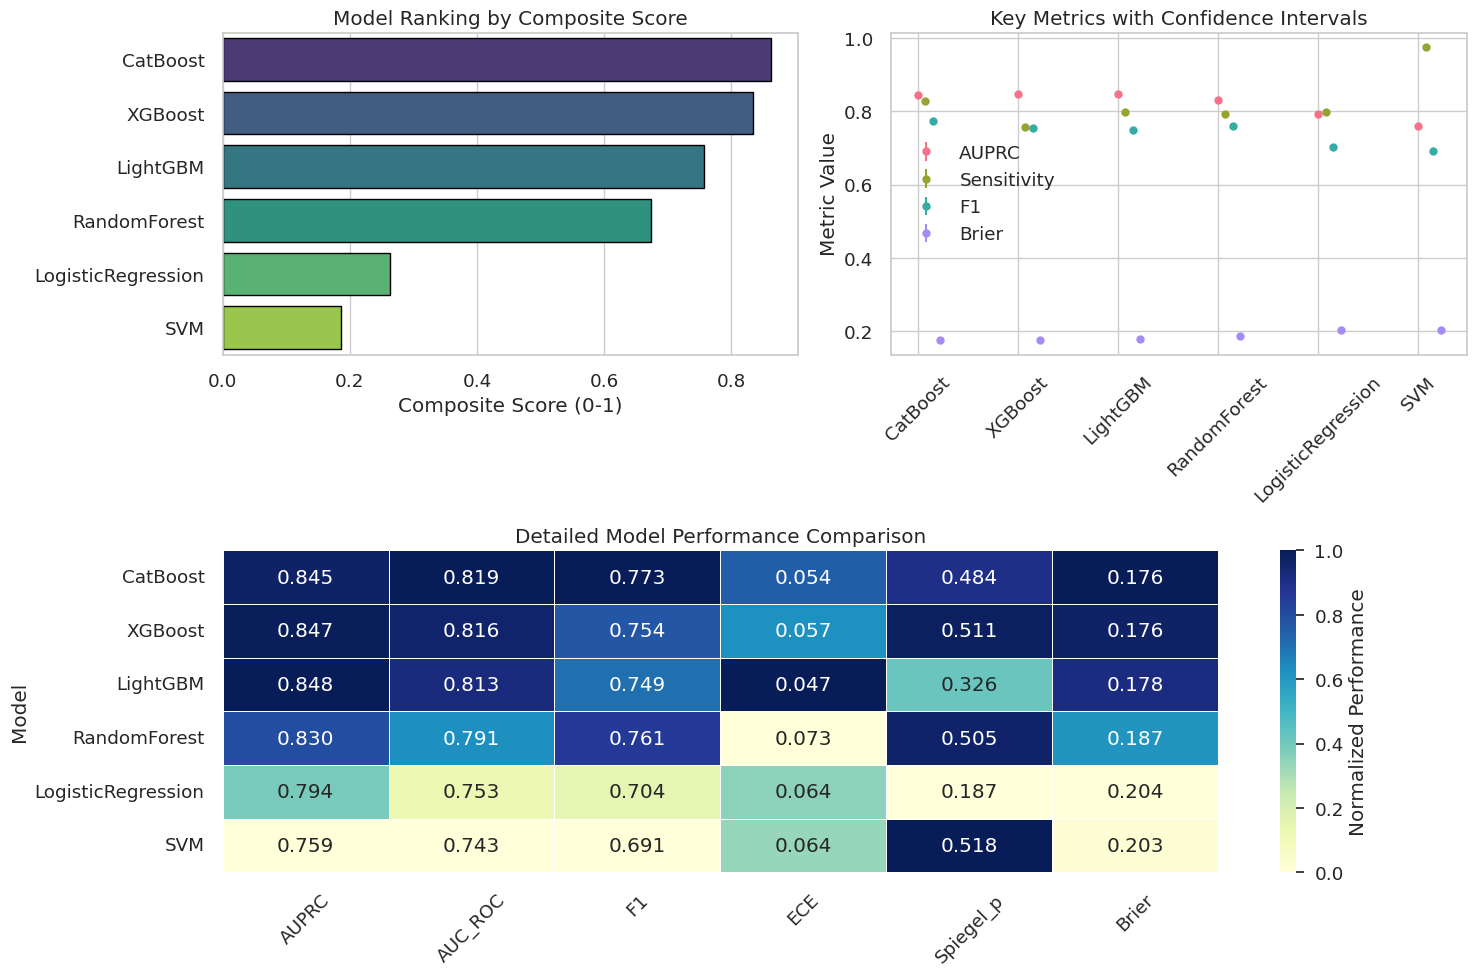

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the data
df = pd.read_csv("Evaluation2/best_models_ranked_with_CI.csv")

# Set style
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(15, 10))

# 1. Composite Score Bar Plot
plt.subplot(2, 2, 1)
sns.barplot(x='CompositeScore', y='Model', data=df, palette='viridis', edgecolor='black')
plt.title('Model Ranking by Composite Score')
plt.xlabel('Composite Score (0-1)')
plt.ylabel('')

# 2. Metric Performance with Confidence Intervals
plt.subplot(2, 2, 2)
metrics_to_plot = ['AUPRC', 'Sensitivity', 'F1', 'Brier']  # Added Brier score
colors = sns.color_palette("husl", len(metrics_to_plot))  # One color per metric

for i, model in enumerate(df['Model']):
    for j, metric in enumerate(metrics_to_plot):
        # Skip if metric doesn't exist in DataFrame
        if metric not in df.columns:
            continue

        x_pos = i + j*0.3/len(metrics_to_plot)
        yerr = [[0], [0]]  # Default no error bars

        # Add CI if available
        if f"{metric}_CI_low" in df.columns and f"{metric}_CI_high" in df.columns:
            yerr = [[df.loc[i, metric] - df.loc[i, f"{metric}_CI_low"]],
                    [df.loc[i, f"{metric}_CI_high"] - df.loc[i, metric]]]

        plt.errorbar(x=x_pos,
                    y=df.loc[i, metric],
                    yerr=yerr,
                    fmt='o', color=colors[j], capsize=5, label=metric if i==0 else "")

plt.xticks(range(len(df)), df['Model'], rotation=45)
plt.title('Key Metrics with Confidence Intervals')
plt.ylabel('Metric Value')
plt.legend()

# 3. Detailed Metric Comparison Heatmap
plt.subplot(2, 1, 2)
metrics_to_show = ['AUPRC', 'AUC_ROC', 'F1', 'ECE', 'Slope', 'Intercept', 'Spiegel_p', 'Brier']  # Added Brier
# Filter to only include metrics that exist in the dataframe
metrics_to_show = [m for m in metrics_to_show if m in df.columns]

heatmap_data = df.set_index('Model')[metrics_to_show]

# Normalize for better visualization (handling directionality)
heatmap_data_norm = heatmap_data.copy()
for col in heatmap_data_norm.columns:
    if col in ['ECE', 'Intercept', 'Brier']:  # metrics where lower is better
        heatmap_data_norm[col] = 1 - MinMaxScaler().fit_transform(heatmap_data_norm[[col]])
    elif col == 'Slope':  # closer to 1 is better
        heatmap_data_norm[col] = 1 - abs(MinMaxScaler().fit_transform(heatmap_data_norm[[col]]) - 0.5)
    else:  # metrics where higher is better
        heatmap_data_norm[col] = MinMaxScaler().fit_transform(heatmap_data_norm[[col]])

sns.heatmap(heatmap_data_norm, annot=heatmap_data, fmt=".3f", cmap="YlGnBu",
            cbar_kws={'label': 'Normalized Performance'}, linewidths=.5)
plt.title('Detailed Model Performance Comparison')
plt.ylabel('Model')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("Evaluation2/model_comparison_visualization.png", dpi=300, bbox_inches='tight')
plt.show()

**9- Saving the best model**

In [14]:
from pathlib import Path
import joblib
import pandas as pd
import json
from datetime import datetime
import sys


def validate_file_path(file_path, description):
    """Validate that a file exists and return its Path object."""
    path = Path(file_path)
    if not path.exists():
        raise FileNotFoundError(
            f"❌ {description} not found at: {path.absolute()}\n"
            f"Please ensure the file exists and the path is correct."
        )
    return path


def load_model_artifact(model_name):
    """Load a model artifact from the trained_models directory."""
    # Generate the expected filename pattern (case-insensitive)
    base_filename = f"{model_name.replace(' ', '_')}_final_calibrated_model.pkl"

    # Look for matching files in the directory (case-insensitive)
    trained_models_dir = Path("trained_models")
    if not trained_models_dir.exists():
        raise FileNotFoundError(
            f"Model directory not found: {trained_models_dir.absolute()}\n"
            f"Please ensure the 'trained_models' directory exists with the model files."
        )

    matching_files = [
        f for f in trained_models_dir.glob("*.pkl")
        if f.name.lower() == base_filename.lower()
    ]

    if not matching_files:
        available_files = [f.name for f in trained_models_dir.glob("*.pkl")]
        raise FileNotFoundError(
            f"Model file not found for: {model_name}\n"
            f"Expected pattern: {base_filename}\n"
            f"Available files: {available_files}"
        )

    # Use the first matching file (with its original case)
    artifact_path = matching_files[0]
    print(f"Loading model artifact from: {artifact_path}")
    return joblib.load(artifact_path)


def extract_model_components(artifact, model_name):
    """Extract both calibrated and base models from artifact"""
    components = {}

    # Get calibrated model (primary model for predictions)
    if "calibrated_model" in artifact:
        components["calibrated_model"] = artifact["calibrated_model"]
    elif "calibrated" in artifact:
        components["calibrated_model"] = artifact["calibrated"]
    else:
        print(f"Warning: No calibrated model found for {model_name}")
        components["calibrated_model"] = None

    # Get base model (uncalibrated)
    if "base_model" in artifact:
        components["base_model"] = artifact["base_model"]
    elif "model" in artifact:
        components["base_model"] = artifact["model"]
    else:
        print(f"Warning: No base model found for {model_name}")
        components["base_model"] = None

    # Get preprocessor
    components["preprocessor"] = artifact.get("preprocessor")

    # Get feature selector if available
    components["feature_selector"] = artifact.get("selector") or artifact.get("feature_selector")

    # Get selected features from metadata
    metadata = artifact.get("metadata", {})
    components["selected_features"] = metadata.get("selected_features")

    return components, metadata


def save_best_and_lr_models_with_youdenj_and_group_thresholds():
    """
    Save both best model (with group-specific F1 thresholds and Youden's J threshold)
    and logistic regression model (with Youden's J threshold) as PKL bundles.
    Includes both the calibrated model and base model in the bundle.
    """
    try:
        print("🚀 Starting model bundling process...")

        # Create directories if they don't exist
        Path("deployment_artifacts").mkdir(exist_ok=True, parents=True)
        Path("trained_models").mkdir(exist_ok=True, parents=True)
        Path("Evaluation2").mkdir(exist_ok=True, parents=True)

        # Validate and load input files
        try:
            metrics_path = validate_file_path(
                "Evaluation2/best_models_ranked_with_CI.csv",
                "Model metrics file"
            )
            thresholds_path = validate_file_path(
                "Threshold_results/reports/all_models_global_results.csv",
                "Threshold results file"
            )

            metrics_df = pd.read_csv(metrics_path) \
                          .rename(columns={'Unnamed: 0': 'Model'}).set_index("Model")
            thresholds_df = pd.read_csv(thresholds_path)
        except Exception as e:
            print(f"❌ Failed to load input files: {str(e)}")
            print("Please ensure:")
            print("1. 'Evaluation2/best_models_ranked_with_CI.csv' exists")
            print("2. 'Threshold_results/reports/all_models_global_results.csv' exists")
            raise

        # Check if CompositeScore exists, if not use AUPRC as primary metric
        if 'CompositeScore' not in metrics_df.columns:
            print("⚠️ 'CompositeScore' column not found, using 'AUPRC' to select best model")
            primary_metric = 'AUPRC'
        else:
            primary_metric = 'CompositeScore'

        # Identify best model and LR model
        try:
            best_model_name = metrics_df[primary_metric].idxmax()
            lr_model_name = 'LogisticRegression'  # Assuming standard naming

            print(f"🔍 Identified best model: {best_model_name}")
            print(f"🔍 Identified logistic regression model: {lr_model_name}")

            # Get Youden thresholds
            best_model_threshold = thresholds_df.loc[
                thresholds_df['model'] == best_model_name, 'youden_j'
            ].values[0]

            lr_threshold = thresholds_df.loc[
                thresholds_df['model'] == lr_model_name, 'youden_j'
            ].values[0]
        except Exception as e:
            print(f"❌ Failed to identify models or thresholds: {str(e)}")
            raise

        # ---- Prepare model bundles ----
        output_dir = Path("deployment_artifacts")
        saved_paths = []

        # Process best model
        try:
            print(f"\n🔄 Processing best model: {best_model_name}")
            best_model_artifact = load_model_artifact(best_model_name)
            best_components, best_metadata = extract_model_components(best_model_artifact, best_model_name)

            best_bundle = {
                "model": best_components["calibrated_model"],
                "calibrated_model": best_components["calibrated_model"],
                "base_model": best_components["base_model"],
                "preprocessor": best_components["preprocessor"],
                "feature_selector": best_components["feature_selector"],
                "selected_features": best_components["selected_features"],
                "metadata": {
                    "model_type": "best_model",
                    "model_name": best_model_name,
                    "created_at": datetime.now().isoformat(),
                    "version": "1.0.0",
                    "primary_metric": primary_metric,
                    "primary_metric_value": float(metrics_df.loc[best_model_name, primary_metric]),
                    "selected_features": best_components["selected_features"],
                    "n_features": len(best_components["selected_features"]) if best_components["selected_features"] else None,
                    "has_calibrated_model": best_components["calibrated_model"] is not None,
                    "has_base_model": best_components["base_model"] is not None,
                    "has_feature_selector": best_components["feature_selector"] is not None
                },
                "youden_j_threshold": float(best_model_threshold)
            }

            # Add group thresholds if available
            group_thresh_file = Path("Threshold_results/reports") / f"{best_model_name}_subgroups_optimal_thresholds_summary.csv"
            if group_thresh_file.exists():
                print(f"✅ Found group-specific thresholds file: {group_thresh_file}")
                group_df = pd.read_csv(group_thresh_file)
                group_thresholds = {
                    row['group']: {"threshold": float(row['opt_f1_threshold'])}
                    for _, row in group_df.iterrows()
                }
                best_bundle["group_specific_thresholds"] = group_thresholds
                print(f"   Added {len(group_thresholds)} group-specific thresholds")
            else:
                print(f"⚠️ No group-specific thresholds found for {best_model_name}")

            # Save best model bundle
            best_out_path = output_dir / f"{best_model_name}_with_thresholds_v1.0.0.pkl"
            joblib.dump(best_bundle, best_out_path)
            saved_paths.append(best_out_path)
            print(f"✅ Saved best model bundle: {best_out_path}")
        except Exception as e:
            print(f"❌ Failed to process best model: {str(e)}")
            raise

        # Process logistic regression model
        try:
            print(f"\n🔄 Processing logistic regression model: {lr_model_name}")
            lr_artifact = load_model_artifact(lr_model_name)
            lr_components, lr_metadata = extract_model_components(lr_artifact, lr_model_name)

            lr_bundle = {
                "model": lr_components["calibrated_model"],
                "calibrated_model": lr_components["calibrated_model"],
                "base_model": lr_components["base_model"],
                "preprocessor": lr_components["preprocessor"],
                "feature_selector": lr_components["feature_selector"],
                "selected_features": lr_components["selected_features"],
                "metadata": {
                    "model_type": "logistic_regression",
                    "model_name": lr_model_name,
                    "created_at": datetime.now().isoformat(),
                    "version": "1.0.0",
                    "primary_metric": primary_metric,
                    "primary_metric_value": float(metrics_df.loc[lr_model_name, primary_metric]),
                    "selected_features": lr_components["selected_features"],
                    "n_features": len(lr_components["selected_features"]) if lr_components["selected_features"] else None,
                    "has_calibrated_model": lr_components["calibrated_model"] is not None,
                    "has_base_model": lr_components["base_model"] is not None,
                    "has_feature_selector": lr_components["feature_selector"] is not None
                },
                "youden_j_threshold": float(lr_threshold)
            }

            lr_out_path = output_dir / f"{lr_model_name}_with_thresholds_v1.0.0.pkl"
            joblib.dump(lr_bundle, lr_out_path)
            saved_paths.append(lr_out_path)
            print(f"✅ Saved LR model bundle: {lr_out_path}")
        except Exception as e:
            print(f"❌ Failed to process logistic regression model: {str(e)}")
            raise

        # Save metadata as JSON files
        print(f"\n💾 Saving metadata files...")
        try:
            for bundle, name, model_name in zip(
                [best_bundle, lr_bundle],
                ["best_model", "logistic_regression"],
                [best_model_name, lr_model_name]
            ):
                meta_path = output_dir / f"{name}_metadata.json"
                metadata_json = {
                    **bundle["metadata"],
                    "youden_j_threshold": bundle["youden_j_threshold"],
                    "model_components": {
                        "has_calibrated_model": bundle["calibrated_model"] is not None,
                        "has_base_model": bundle["base_model"] is not None,
                        "has_preprocessor": bundle["preprocessor"] is not None,
                        "has_feature_selector": bundle["feature_selector"] is not None
                    }
                }

                if "group_specific_thresholds" in bundle:
                    metadata_json["group_specific_thresholds"] = bundle["group_specific_thresholds"]

                with open(meta_path, 'w') as f:
                    json.dump(metadata_json, f, indent=2)
                print(f"✅ Saved metadata: {meta_path}")
        except Exception as e:
            print(f"❌ Failed to save metadata files: {str(e)}")
            raise

        # Print summary
        print(f"\n🎉 MODEL BUNDLING COMPLETE!")
        print(f"📁 Artifacts saved to: {output_dir.absolute()}")
        print(f"📦 Best model: {best_model_name} (threshold: {best_model_threshold:.4f})")
        print(f"📦 LR model: {lr_model_name} (threshold: {lr_threshold:.4f})")
        print(f"💾 Total files created: {len(saved_paths) + 2}")

        # Validate saved bundles
        print(f"\n🔍 Validating saved bundles...")
        for path in saved_paths:
            try:
                loaded_bundle = joblib.load(path)
                components = []
                if loaded_bundle.get("calibrated_model") is not None:
                    components.append("calibrated_model")
                if loaded_bundle.get("base_model") is not None:
                    components.append("base_model")
                if loaded_bundle.get("preprocessor") is not None:
                    components.append("preprocessor")

                print(f"✅ {path.name}: {', '.join(components)}")
            except Exception as e:
                print(f"❌ {path.name}: Failed to validate - {e}")

        return saved_paths

    except Exception as e:
        print(f"\n❌❌❌ CRITICAL ERROR: Model bundling failed ❌❌❌")
        print(f"Error: {str(e)}")
        print("\nPlease check:")
        print("1. All required input files exist in the correct locations")
        print("2. The directory structure matches expectations")
        print("3. You have proper read/write permissions")
        sys.exit(1)


if __name__ == "__main__":
    save_best_and_lr_models_with_youdenj_and_group_thresholds()

🚀 Starting model bundling process...
🔍 Identified best model: CatBoost
🔍 Identified logistic regression model: LogisticRegression

🔄 Processing best model: CatBoost
Loading model artifact from: trained_models/CatBoost_final_calibrated_model.pkl
⚠️ No group-specific thresholds found for CatBoost
✅ Saved best model bundle: deployment_artifacts/CatBoost_with_thresholds_v1.0.0.pkl

🔄 Processing logistic regression model: LogisticRegression
Loading model artifact from: trained_models/LogisticRegression_final_calibrated_model.pkl
✅ Saved LR model bundle: deployment_artifacts/LogisticRegression_with_thresholds_v1.0.0.pkl

💾 Saving metadata files...
✅ Saved metadata: deployment_artifacts/best_model_metadata.json
✅ Saved metadata: deployment_artifacts/logistic_regression_metadata.json

🎉 MODEL BUNDLING COMPLETE!
📁 Artifacts saved to: /content/deployment_artifacts
📦 Best model: CatBoost (threshold: 0.4278)
📦 LR model: LogisticRegression (threshold: 0.4113)
💾 Total files created: 4

🔍 Validating 

**10- Final Evaluation of Best Model on Independent Test Set**

In [16]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
Test Set Evaluation for CatBoost Best Model
Evaluates deployment_artifacts/CatBoost_with_thresholds_v1.0.0.pkl on test_set.csv
"""

import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, chi2
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, brier_score_loss,
    matthews_corrcoef, cohen_kappa_score, roc_curve,
    precision_recall_curve, balanced_accuracy_score, log_loss,
    confusion_matrix
)
from sklearn.calibration import calibration_curve

# Set plotting style
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

def get_feature_names_from_column_transformer(ct):
    """Return feature names from ColumnTransformer - matches training logic"""
    names = []
    for nm, pipe, cols in ct.transformers_:
        if nm == 'remainder' and pipe == 'drop':
            continue
        if nm == 'cat':
            if hasattr(pipe, 'named_steps') and 'onehot' in pipe.named_steps:
                cats = pipe.named_steps['onehot'].categories_
                for c, cl in zip(cols, cats):
                    names += [f"{c}_{v}" for v in cl]
            else:
                names += list(cols)
        else:
            names += list(cols)
    return names

def calculate_ece(y_true, y_prob, n_bins=10):
    """Calculate Expected Calibration Error"""
    edges = np.linspace(0, 1 + 1e-8, n_bins + 1)
    idx = np.digitize(y_prob, edges) - 1
    ece = 0.0
    for b in range(n_bins):
        mask = idx == b
        if mask.sum() > 0:
            ece += abs(y_prob[mask].mean() - y_true[mask].mean()) * mask.sum()
    return ece / len(y_true)

def calculate_mce(y_true, y_prob, n_bins=10):
    """Calculate Maximum Calibration Error"""
    edges = np.linspace(0, 1 + 1e-8, n_bins + 1)
    idx = np.digitize(y_prob, edges) - 1
    m = 0.0
    for b in range(n_bins):
        mask = idx == b
        if mask.sum() > 0:
            m = max(m, abs(y_prob[mask].mean() - y_true[mask].mean()))
    return m

def calculate_spiegelhalter_z(y_true, y_prob):
    """Calculate Spiegelhalter Z statistic for calibration"""
    n = len(y_true)
    mean_p = np.mean(y_prob)
    var = mean_p * (1 - mean_p)
    brier = np.mean((y_prob - y_true)**2)
    denom = np.sqrt(2 * n * var * (1 - var)) if var > 0 else np.nan
    return (n * (brier - var)) / denom if denom and not np.isnan(denom) else np.nan

def hosmer_lemeshow_test(y_true, y_prob, n_bins=10):
    """Perform Hosmer-Lemeshow goodness-of-fit test"""
    edges = np.linspace(0, 1 + 1e-8, n_bins + 1)
    idx = np.digitize(y_prob, edges) - 1
    obs, exp, n_in_bin = [], [], []
    for b in range(n_bins):
        mask = idx == b
        if mask.sum() > 0:
            obs.append(y_true[mask].sum())
            exp.append(y_prob[mask].sum())
            n_in_bin.append(mask.sum())
    if len(obs) == 0:
        return np.nan, np.nan
    obs = np.array(obs)
    exp = np.array(exp)
    n_in_bin = np.array(n_in_bin)
    chi = ((obs - exp)**2 / (exp * (1 - (exp / (n_in_bin + 1e-12))) + 1e-8)).sum()
    p = 1 - chi2.cdf(chi, df=len(obs) - 2) if len(obs) > 2 else np.nan
    return chi, p

def bootstrap_ci(y_true, y_score, metric_func, n_bootstrap=1000, alpha=0.05):
    """Calculate bootstrap confidence intervals for metrics"""
    np.random.seed(42)
    n = len(y_true)
    bootstrap_scores = []

    for _ in range(n_bootstrap):
        # Bootstrap sample
        indices = np.random.choice(n, n, replace=True)

        # Check if we have both classes in bootstrap sample
        if len(np.unique(y_true[indices])) < 2:
            continue

        try:
            score = metric_func(y_true[indices], y_score[indices])
            bootstrap_scores.append(score)
        except:
            continue

    if len(bootstrap_scores) == 0:
        return np.nan, np.nan, np.nan

    bootstrap_scores = np.array(bootstrap_scores)
    mean_score = np.mean(bootstrap_scores)
    ci_lower = np.percentile(bootstrap_scores, (alpha/2) * 100)
    ci_upper = np.percentile(bootstrap_scores, (1 - alpha/2) * 100)

    return mean_score, ci_lower, ci_upper

def load_CatBoost_model(model_path="deployment_artifacts/CatBoost_with_thresholds_v1.0.0.pkl"):
    """Load the CatBoost deployment model with flexible key handling"""
    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Model file not found: {model_path}")

    print(f"🔍 Loading CatBoost model from: {os.path.abspath(model_path)}")
    artifact = joblib.load(model_path)

    # Print available keys to debug
    print(f"📋 Available keys in artifact: {list(artifact.keys())}")

    # Check for preprocessor (required)
    if 'preprocessor' not in artifact:
        raise KeyError("Missing required 'preprocessor' in model artifact")

    # Look for calibrated model with flexible key names
    calibrated_model = None
    possible_model_keys = ['calibrated_model', 'calibrated', 'model', 'final_model']

    for key in possible_model_keys:
        if key in artifact:
            calibrated_model = artifact[key]
            print(f"✅ Found calibrated model under key: '{key}'")
            break

    # Fixed: This was the bug - we found the model but the condition was still wrong
    if calibrated_model is None:
        raise KeyError(f"No calibrated model found. Available keys: {list(artifact.keys())}")

    # Extract metadata and thresholds
    metadata = artifact.get('metadata', {})
    print(f"📊 Metadata keys: {list(metadata.keys()) if metadata else 'No metadata'}")

    # Look for thresholds in various locations
    thresholds = {}

    # First check direct keys in artifact
    threshold_keys_artifact = ['youden_j_threshold', 'f1_threshold', 'optimal_threshold', 'threshold']
    for thresh_key in threshold_keys_artifact:
        if thresh_key in artifact:
            thresholds[thresh_key] = artifact[thresh_key]
            print(f"✅ Found threshold '{thresh_key}': {artifact[thresh_key]:.4f}")

    # Then check in metadata
    threshold_keys_metadata = ['youden_threshold', 'f1_threshold', 'optimal_threshold', 'threshold']
    for thresh_key in threshold_keys_metadata:
        if thresh_key in metadata:
            thresholds[thresh_key] = metadata[thresh_key]
            print(f"✅ Found threshold '{thresh_key}' in metadata: {metadata[thresh_key]:.4f}")

    # Check for group-specific thresholds
    if 'group_specific_thresholds' in artifact:
        group_thresholds = artifact['group_specific_thresholds']
        print(f"📊 Found group-specific thresholds: {group_thresholds}")
        # Use the overall threshold if available
        if isinstance(group_thresholds, dict) and 'overall' in group_thresholds:
            thresholds['group_overall'] = group_thresholds['overall']

    # If no thresholds found, use default
    if not thresholds:
        print("⚠️ No thresholds found, using default 0.5")
        thresholds['default_threshold'] = 0.5

    print(f"📊 Final thresholds to use:")
    for name, value in thresholds.items():
        print(f"   - {name}: {value:.4f}")

    # Update the artifact to use consistent key
    artifact['calibrated_model'] = calibrated_model

    return artifact, thresholds

def predict_with_model(model_artifact, X_test):
    """Make predictions using the loaded model"""
    # Extract components
    preprocessor = model_artifact['preprocessor']
    calibrated_model = model_artifact['calibrated_model']
    metadata = model_artifact.get('metadata', {})

    # Try to get selected features from different possible locations
    selected_features = None
    feature_keys = ['selected_features', 'feature_names', 'features']

    for key in feature_keys:
        if key in metadata:
            selected_features = metadata[key]
            print(f"✅ Found selected features under metadata['{key}']")
            break
        elif key in model_artifact:
            selected_features = model_artifact[key]
            print(f"✅ Found selected features under artifact['{key}']")
            break

    if selected_features is None:
        print("⚠️ No selected features found, will use all processed features")

    print(f"🔧 Processing test data...")
    print(f"   - Input shape: {X_test.shape}")
    if selected_features:
        print(f"   - Selected features: {len(selected_features)}")

    # Apply preprocessing
    X_processed = preprocessor.transform(X_test)

    # Get feature names
    all_features = get_feature_names_from_column_transformer(preprocessor)
    X_processed_df = pd.DataFrame(X_processed, columns=all_features)

    # Select features used in training
    if selected_features:
        # Check if selected features exist in processed data
        missing_features = set(selected_features) - set(X_processed_df.columns)
        if missing_features:
            print(f"⚠️ Warning: Missing features: {missing_features}")
            available_features = [f for f in selected_features if f in X_processed_df.columns]
            X_final = X_processed_df[available_features]
            print(f"   - Using {len(available_features)} available features")
        else:
            X_final = X_processed_df[selected_features]
    else:
        X_final = X_processed_df
        selected_features = all_features

    print(f"   - Final feature shape: {X_final.shape}")

    # Make predictions
    y_proba = calibrated_model.predict_proba(X_final)[:, 1]

    return y_proba, selected_features

def evaluate_CatBoost_test(test_csv="test_set.csv",
                         model_path="deployment_artifacts/CatBoost_with_thresholds_v1.0.0.pkl",
                         output_dir="test_evaluation_results"):
    """
    Evaluate CatBoost model on test set
    """
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)

    print("=" * 60)
    print("🚀 CatBoost TEST SET EVALUATION")
    print("=" * 60)

    # Load test data
    print(f"\n📂 Loading test data from: {test_csv}")
    if not os.path.exists(test_csv):
        raise FileNotFoundError(f"Test file not found: {test_csv}")

    df_test = pd.read_csv(test_csv)
    if 'MDR status' not in df_test.columns:
        raise ValueError("Test CSV must contain 'MDR status' column")

    X_test = df_test.drop(columns=['MDR status'])
    y_test = df_test['MDR status'].values

    print(f"✅ Test data loaded: {X_test.shape[0]} samples, {X_test.shape} features")
    print(f"   - Positive cases: {np.sum(y_test)} ({np.mean(y_test)*100:.1f}%)")
    print(f"   - Negative cases: {np.sum(1-y_test)} ({(1-np.mean(y_test))*100:.1f}%)")

    # Load model
    model_artifact, thresholds = load_CatBoost_model(model_path)

    # Make predictions
    print(f"\n🎯 Making predictions...")
    y_proba, selected_features = predict_with_model(model_artifact, X_test)

    # Evaluate with different thresholds
    results = {}

    for thresh_name, threshold in thresholds.items():
        y_pred = (y_proba >= threshold).astype(int)

        print(f"\n📊 Evaluating with {thresh_name}: {threshold:.4f}")

        # Calculate all metrics
        metrics = {}

        # Basic classification metrics
        metrics['Threshold'] = threshold
        metrics['Accuracy'] = accuracy_score(y_test, y_pred)
        metrics['Balanced_Accuracy'] = balanced_accuracy_score(y_test, y_pred)
        metrics['Precision'] = precision_score(y_test, y_pred, zero_division=0)
        metrics['Recall'] = recall_score(y_test, y_pred, zero_division=0)
        metrics['Specificity'] = recall_score(1-y_test, 1-y_pred, zero_division=0)
        metrics['F1'] = f1_score(y_test, y_pred, zero_division=0)
        metrics['MCC'] = matthews_corrcoef(y_test, y_pred)
        metrics['Kappa'] = cohen_kappa_score(y_test, y_pred)

        # Probability-based metrics
        metrics['AUC_ROC'] = roc_auc_score(y_test, y_proba)
        metrics['AUPRC'] = average_precision_score(y_test, y_proba)
        metrics['Brier_Score'] = brier_score_loss(y_test, y_proba)
        metrics['Log_Loss'] = log_loss(y_test, y_proba)

        # Calibration metrics
        metrics['ECE'] = calculate_ece(y_test, y_proba)
        metrics['MCE'] = calculate_mce(y_test, y_proba)
        spiegel_z = calculate_spiegelhalter_z(y_test, y_proba)
        metrics['Spiegelhalter_Z'] = spiegel_z
        metrics['Spiegelhalter_p'] = 2 * (1 - norm.cdf(abs(spiegel_z))) if not np.isnan(spiegel_z) else np.nan

        hl_stat, hl_p = hosmer_lemeshow_test(y_test, y_proba)
        metrics['HL_statistic'] = hl_stat
        metrics['HL_p_value'] = hl_p

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        metrics['True_Negatives'] = tn
        metrics['False_Positives'] = fp
        metrics['False_Negatives'] = fn
        metrics['True_Positives'] = tp

        # Calculate bootstrap confidence intervals for key metrics
        print("   Calculating confidence intervals...")

        # For probability-based metrics
        auc_mean, auc_low, auc_high = bootstrap_ci(y_test, y_proba, roc_auc_score)
        auprc_mean, auprc_low, auprc_high = bootstrap_ci(y_test, y_proba, average_precision_score)

        # For classification metrics
        acc_mean, acc_low, acc_high = bootstrap_ci(y_test, y_pred, accuracy_score)
        f1_mean, f1_low, f1_high = bootstrap_ci(y_test, y_pred, f1_score)

        # Add CI to metrics
        metrics['AUC_ROC_CI_low'] = auc_low
        metrics['AUC_ROC_CI_high'] = auc_high
        metrics['AUPRC_CI_low'] = auprc_low
        metrics['AUPRC_CI_high'] = auprc_high
        metrics['Accuracy_CI_low'] = acc_low
        metrics['Accuracy_CI_high'] = acc_high
        metrics['F1_CI_low'] = f1_low
        metrics['F1_CI_high'] = f1_high

        results[thresh_name] = {
            'metrics': metrics,
            'predictions': y_pred,
            'probabilities': y_proba,
            'threshold': threshold
        }

        # Print key metrics
        print(f"   ✅ AUC-ROC: {metrics['AUC_ROC']:.4f} [{auc_low:.4f}, {auc_high:.4f}]")
        print(f"   ✅ AUPRC: {metrics['AUPRC']:.4f} [{auprc_low:.4f}, {auprc_high:.4f}]")
        print(f"   ✅ Accuracy: {metrics['Accuracy']:.4f} [{acc_low:.4f}, {acc_high:.4f}]")
        print(f"   ✅ F1-Score: {metrics['F1']:.4f} [{f1_low:.4f}, {f1_high:.4f}]")

    # Save detailed results
    print(f"\n💾 Saving results to: {output_dir}")

    # Create summary DataFrame
    summary_data = []
    for thresh_name, result in results.items():
        row = {'Threshold_Type': thresh_name}
        row.update(result['metrics'])
        summary_data.append(row)

    summary_df = pd.DataFrame(summary_data)
    summary_df.to_csv(os.path.join(output_dir, "CatBoost_test_evaluation.csv"), index=False)

    # Save selected features
    if selected_features:
        features_df = pd.DataFrame({
            'Feature_Name': selected_features,
            'Feature_Index': range(len(selected_features))
        })
        features_df.to_csv(os.path.join(output_dir, "selected_features.csv"), index=False)

    # Generate visualizations
    print(f"\n📊 Generating visualizations...")

    # Use the first result for plotting (all use same probabilities)
    first_result = list(results.values())[0]

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2, label=f'CatBoost (AUC = {first_result["metrics"]["AUC_ROC"]:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
    plt.title('ROC Curve - CatBoost Test Set Performance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "roc_curve.png"), dpi=300, bbox_inches='tight')
    plt.close()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, linewidth=2, label=f'CatBoost (AUPRC = {first_result["metrics"]["AUPRC"]:.3f})')
    plt.title('Precision-Recall Curve - CatBoost Test Set Performance')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "pr_curve.png"), dpi=300, bbox_inches='tight')
    plt.close()

    # Calibration Curve
    prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10, strategy='uniform')
    plt.figure(figsize=(8, 6))
    plt.plot(prob_pred, prob_true, 'o-', linewidth=2, markersize=8, label='CatBoost')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Perfect Calibration')
    plt.title('Calibration Curve - CatBoost Test Set Performance')
    plt.xlabel('Mean Predicted Probability')
    plt.ylabel('Fraction of Positives')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "calibration_curve.png"), dpi=300, bbox_inches='tight')
    plt.close()

    # Confusion matrices for each threshold
    fig, axes = plt.subplots(1, len(results), figsize=(5*len(results), 4))
    if len(results) == 1:
        axes = [axes]

    for idx, (thresh_name, result) in enumerate(results.items()):
        cm = confusion_matrix(y_test, result['predictions'])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
        axes[idx].set_title(f'Confusion Matrix\n{thresh_name} ({result["threshold"]:.3f})')
        axes[idx].set_xlabel('Predicted')
        axes[idx].set_ylabel('Actual')

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "confusion_matrices.png"), dpi=300, bbox_inches='tight')
    plt.close()

    # Print final summary
    print(f"\n🎉 EVALUATION COMPLETE!")
    print(f"📁 Results saved to: {os.path.abspath(output_dir)}")
    print(f"📊 Model evaluated with {len(results)} thresholds")
    print(f"🧪 Test set size: {len(y_test)} samples")
    print(f"🎯 Features used: {len(selected_features) if selected_features else 'Unknown'}")

    return results, summary_df

if __name__ == "__main__":
    # Run the evaluation
    results, summary = evaluate_CatBoost_test(
        test_csv="test_set.csv",
        model_path="deployment_artifacts/CatBoost_with_thresholds_v1.0.0.pkl",
        output_dir="test_evaluation_results"
    )


🚀 CatBoost TEST SET EVALUATION

📂 Loading test data from: test_set.csv
✅ Test data loaded: 383 samples, (383, 5) features
   - Positive cases: 199 (52.0%)
   - Negative cases: 184 (48.0%)
🔍 Loading CatBoost model from: /content/deployment_artifacts/CatBoost_with_thresholds_v1.0.0.pkl
📋 Available keys in artifact: ['model', 'calibrated_model', 'base_model', 'preprocessor', 'feature_selector', 'selected_features', 'metadata', 'youden_j_threshold']
✅ Found calibrated model under key: 'calibrated_model'
📊 Metadata keys: ['model_type', 'model_name', 'created_at', 'version', 'primary_metric', 'primary_metric_value', 'selected_features', 'n_features', 'has_calibrated_model', 'has_base_model', 'has_feature_selector']
✅ Found threshold 'youden_j_threshold': 0.4278
📊 Final thresholds to use:
   - youden_j_threshold: 0.4278

🎯 Making predictions...
✅ Found selected features under metadata['selected_features']
🔧 Processing test data...
   - Input shape: (383, 5)
   - Selected features: 7
   - Fina

***11- comparison between best model and logistic regression ***

In [17]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
Model Comparison with Confidence Bands:
- Two models: CatBoost_with_thresholds_v1.0.0.pkl and LogisticRegression_with_thresholds_v1.0.0.pkl
- Uses each model's preprocessor and selected_features (best 7)
- Uses stored Youden threshold for classification
- Scalar metrics are computed from the full dataset only
- ROC/PR: raw dashed curves + mean bootstrap curve + 95% CI ribbon
- Calibration: fixed bins locked once + raw dashed markers + CI ribbon
"""

import os
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

from sklearn.calibration import calibration_curve
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score,
    precision_score, recall_score, confusion_matrix, roc_curve,
    precision_recall_curve, brier_score_loss, balanced_accuracy_score,
    matthews_corrcoef, cohen_kappa_score
)
from sklearn.utils import resample

# ------------------------------------------------------------------------------
# I/O and Data
# ------------------------------------------------------------------------------

os.makedirs("model_comparison", exist_ok=True)

print("Loading test_set.csv...")
test_df = pd.read_csv("test_set.csv")
test_df = test_df.rename(columns={"MDR status": "outcome"})
X_test = test_df.drop(columns="outcome")
y_test = test_df["outcome"].values
print("✅ Test data loaded.")

# ------------------------------------------------------------------------------
# Utilities
# ------------------------------------------------------------------------------

def get_onehot_feature_names_from_ct(column_transformer):
    """Reconstruct output feature names from a ColumnTransformer with OneHot."""
    names = []
    for nm, pipe, cols in column_transformer.transformers_:
        if nm == "remainder" and pipe == "drop":
            continue
        if nm == "cat" and hasattr(pipe, "named_steps") and "onehot" in pipe.named_steps:
            cats = pipe.named_steps["onehot"].categories_
            for col, cat_list in zip(cols, cats):
                names += [f"{col}_{cat}" for cat in cat_list]
        else:
            names += list(cols)
    return names

def load_and_evaluate_model(model_path, X_raw, y):
    """
    Load bundle, apply its preprocessor to raw X, select the bundle's selected_features,
    use the stored Youden threshold to form predictions.
    Returns: name, y_proba, y_pred, threshold
    """
    bundle = joblib.load(model_path)
    name = bundle.get("metadata", {}).get("model_name",
                                          os.path.splitext(os.path.basename(model_path))[0])
    threshold = bundle.get("youden_j_threshold", 0.5)
    model = bundle["model"]

    pre = bundle.get("preprocessor")
    if pre is None:
        raise KeyError(f"{name} missing preprocessor")

    # Transform X_raw
    X_trans = pre.transform(X_raw)

    # Rebuild feature names
    feat_names = get_onehot_feature_names_from_ct(pre)
    X_df = pd.DataFrame(X_trans, columns=feat_names, index=X_raw.index)

    # Select features
    sf = bundle.get("selected_features")
    if sf is None:
        raise KeyError(f"{name} missing selected_features")
    missing = [f for f in sf if f not in X_df.columns]
    if missing:
        raise KeyError(f"{name} missing columns after transform: {missing}")
    X_sel = X_df[sf]

    # Predict probabilities
    try:
        y_proba = model.predict_proba(X_sel)[:, 1]
    except AttributeError:
        scores = model.decision_function(X_sel)
        y_proba = 1 / (1 + np.exp(-scores))

    # Predict using Youden threshold
    y_pred = (y_proba >= threshold).astype(int)
    return name, y_proba, y_pred, threshold

# ---- Fixed-bin calibration helpers (locked bins) ----

def fixed_bin_calibration(y_true, y_prob, bin_edges):
    """
    Compute calibration using fixed bin edges.
    Returns prob_true (fraction positive per bin) and prob_pred (mean predicted prob per bin).
    """
    inds = np.digitize(y_prob, bin_edges, right=False) - 1
    inds = np.clip(inds, 0, len(bin_edges) - 2)  # clamp to valid bins

    n_bins = len(bin_edges) - 1
    prob_true = []
    prob_pred = []
    for b in range(n_bins):
        m = inds == b
        if not np.any(m):
            # Empty bin -> NaNs for true rate; pred = bin center
            prob_true.append(np.nan)
            prob_pred.append((bin_edges[b] + bin_edges[b + 1]) / 2.0)
        else:
            prob_true.append(np.mean(y_true[m]))
            prob_pred.append(np.mean(y_prob[m]))
    return np.array(prob_true, dtype=float), np.array(prob_pred, dtype=float)

def expected_calibration_error(y_true, y_prob, n_bins=10):
    """
    ECE computed from full sample only, using fixed equal-width bins locked once.
    """
    bin_edges = np.linspace(0, 1, n_bins + 1)
    prob_true, prob_pred = fixed_bin_calibration(y_true, y_prob, bin_edges)
    mask = ~np.isnan(prob_true)
    if mask.sum() == 0:
        return np.nan, prob_true, prob_pred
    ece = np.mean(np.abs(prob_true[mask] - prob_pred[mask]))
    return ece, prob_true, prob_pred

# ---- Bootstrap CI for curves with fixed grids and fixed calibration bins ----

def compute_bootstrap_ci(y_true, y_proba, curve_kind, grid, n_bootstraps=1000, bin_edges=None):
    """
    Bootstrap 95% CI for curves.
    curve_kind: 'roc' | 'pr' | 'cal'
    grid:
      - ROC: FPR grid in [0,1]
      - PR: Recall grid in [0,1]
      - CAL: Predicted-probability grid in [0,1]
    bin_edges: required when curve_kind == 'cal' (fixed bins)
    """
    rng = np.random.default_rng(42)
    n = len(y_true)
    boot_curves = []

    for _ in range(n_bootstraps):
        idx = rng.integers(0, n, n)
        yt = y_true[idx]
        yp = y_proba[idx]

        if curve_kind == 'roc':
            x, yv, _ = roc_curve(yt, yp)
        elif curve_kind == 'pr':
            p, r, _ = precision_recall_curve(yt, yp)
            x, yv = r, p
        elif curve_kind == 'cal':
            if bin_edges is None:
                raise ValueError("bin_edges are required for calibration bootstraps")
            prob_true, prob_pred = fixed_bin_calibration(yt, yp, bin_edges)
            mask = ~np.isnan(prob_true)
            x, yv = prob_pred[mask], prob_true[mask]
        else:
            raise ValueError("Unsupported curve_kind")

        # Ensure proper interpolation
        order = np.argsort(x)
        x = np.asarray(x)[order]
        yv = np.asarray(yv)[order]
        xu, ind = np.unique(x, return_index=True)
        yu = yv[ind]

        interp_y = np.interp(grid, xu, yu, left=yu[0], right=yu[-1])
        boot_curves.append(interp_y)

    boot_curves = np.asarray(boot_curves)
    mean_curve = np.nanmean(boot_curves, axis=0)
    lower_ci = np.nanpercentile(boot_curves, 2.5, axis=0)
    upper_ci = np.nanpercentile(boot_curves, 97.5, axis=0)
    return mean_curve, lower_ci, upper_ci

# ------------------------------------------------------------------------------
# Metrics
# ------------------------------------------------------------------------------

def calculate_all_metrics(y_true, y_pred, y_proba):
    """
    Scalar metrics from the full set only.
    """
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    ece, _, _ = expected_calibration_error(y_true, y_proba)

    return {
        'Test_Samples': len(y_true),
        'Positive_Rate': float(np.mean(y_true)),
        'AUROC': roc_auc_score(y_true, y_proba),
        'AUPRC': average_precision_score(y_true, y_proba),
        'F1': f1_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred),
        'Accuracy': float(np.mean(y_true == y_pred)),
        'Balanced_Accuracy': balanced_accuracy_score(y_true, y_pred),
        'Cohen_Kappa': cohen_kappa_score(y_true, y_pred),
        'MCC': matthews_corrcoef(y_true, y_pred),
        'Brier_Score': brier_score_loss(y_true, y_proba),
        'Expected_Calibration_Error': ece,
        'TN': int(tn), 'FP': int(fp), 'FN': int(fn), 'TP': int(tp),
        'Specificity': (tn / (tn + fp)) if (tn + fp) else np.nan,
        'NPV': (tn / (tn + fn)) if (tn + fn) else np.nan,
        'PPV': (tp / (tp + fp)) if (tp + fp) else np.nan,
        'FPR': (fp / (fp + tn)) if (fp + tn) else np.nan,
        'FNR': (fn / (fn + tp)) if (fn + tp) else np.nan,
    }

def bootstrap_metrics(y_true, y_pred, y_proba, n_bootstrap=1000):
    """
    Bootstrap confidence intervals for scalar metrics.
    Note: full-sample point estimates come from calculate_all_metrics; we only compute CI bounds here.
    """
    boot_list = []
    for _ in range(n_bootstrap):
        idx = resample(np.arange(len(y_true)))
        boot_list.append(calculate_all_metrics(y_true[idx], y_pred[idx], y_proba[idx]))

    df = pd.DataFrame(boot_list)
    ci = {}
    for col in df.columns:
        if col not in ['Confusion_Matrix']:  # not used here, but kept for safety
            ci[f"{col}_lower"] = df[col].quantile(0.025)
            ci[f"{col}_upper"] = df[col].quantile(0.975)
    return ci

# ------------------------------------------------------------------------------
# Plotting (raw dashed overlays + mean bootstrap curves with 95% CI)
# ------------------------------------------------------------------------------

def plot_with_ci(models_data, y_true, n_bootstraps=1000, figsize=(18, 5)):
    """
    Draws:
      - ROC: raw dashed + mean bootstrap curve + 95% CI ribbon
      - PR: raw dashed step + mean bootstrap curve + 95% CI ribbon + baseline
      - Calibration: fixed bins locked once; raw dashed markers + CI ribbon
    """
    fig, (ax_roc, ax_pr, ax_cal) = plt.subplots(1, 3, figsize=figsize)

    # Fixed grids
    grid_roc = np.linspace(0, 1, 201)   # FPR grid
    grid_pr  = np.linspace(0, 1, 201)   # Recall grid
    grid_cal = np.linspace(0, 1, 50)    # probability grid for ribbon
    n_bins_cal = 10
    bin_edges = np.linspace(0, 1, n_bins_cal + 1)  # locked once

    # ROC
    for name, proba, pred in models_data:
        # raw (full-sample) ROC dashed
        fpr, tpr, _ = roc_curve(y_true, proba)
        auc_val = roc_auc_score(y_true, proba)
        ax_roc.plot(fpr, tpr, linestyle='--', alpha=0.6, label=f"{name} raw")

        # CI ribbon
        mean_tpr, lo_tpr, hi_tpr = compute_bootstrap_ci(
            y_true, proba, 'roc', grid_roc, n_bootstraps=n_bootstraps
        )
        ax_roc.plot(grid_roc, mean_tpr, linewidth=2, label=f"{name} (AUC={auc_val:.3f})")
        ax_roc.fill_between(grid_roc, lo_tpr, hi_tpr, alpha=0.2)

    ax_roc.plot([0, 1], [0, 1], 'k--', alpha=0.5)
    ax_roc.set(xlabel="False Positive Rate", ylabel="True Positive Rate",
               title="ROC Curve (raw dashed) + 95% CI")
    ax_roc.legend(loc="lower right")

    # PR
    baseline = float(np.mean(y_true))
    for name, proba, pred in models_data:
        # raw PR as dashed step
        precision, recall, _ = precision_recall_curve(y_true, proba)
        ax_pr.step(recall, precision, where='post', linestyle='--', alpha=0.6, label=f"{name} raw")

        # CI ribbon on fixed recall grid
        mean_prec, lo_prec, hi_prec = compute_bootstrap_ci(
            y_true, proba, 'pr', grid_pr, n_bootstraps=n_bootstraps
        )
        ap = average_precision_score(y_true, proba)
        ax_pr.plot(grid_pr, mean_prec, linewidth=2, label=f"{name} (AUPRC={ap:.3f})")
        ax_pr.fill_between(grid_pr, lo_prec, hi_prec, alpha=0.2)

    ax_pr.axhline(baseline, color='k', linestyle='--', alpha=0.5, label=f'Baseline (Prec={baseline:.2f})')
    ax_pr.set(xlabel="Recall", ylabel="Precision", ylim=(0, 1.02),
              title="PR Curve (raw dashed) + 95% CI")
    ax_pr.legend(loc="lower left")

    # Calibration (fixed bins)
    for name, proba, pred in models_data:
        # raw fixed-bin calibration (full sample) as dashed markers
        prob_true, prob_pred = fixed_bin_calibration(y_true, proba, bin_edges)
        ece = np.nanmean(np.abs(prob_true - prob_pred))
        ax_cal.plot(prob_pred, prob_true, 'o--', alpha=0.8, label=f"{name} (ECE={ece:.3f})")

        # CI ribbon using fixed bins for bootstraps; ribbon on a probability grid
        mean_frac_pos, lo_frac_pos, hi_frac_pos = compute_bootstrap_ci(
            y_true, proba, 'cal', grid_cal, n_bootstraps=n_bootstraps, bin_edges=bin_edges
        )
        ax_cal.plot(grid_cal, mean_frac_pos, linewidth=2)
        ax_cal.fill_between(grid_cal, lo_frac_pos, hi_frac_pos, alpha=0.2)

    ax_cal.plot([0, 1], [0, 1], 'k:', label='Perfect Calibration')
    ax_cal.set(xlabel="Mean Predicted Probability", ylabel="Fraction of Positives",
               title="Calibration (fixed bins, raw dashed) + 95% CI", xlim=(0, 1), ylim=(0, 1))
    ax_cal.legend(loc="upper left")

    plt.tight_layout()
    plt.savefig("model_comparison/model_comparison_plots.png", dpi=300)
    plt.close()

# ------------------------------------------------------------------------------
# Main
# ------------------------------------------------------------------------------

def main():
    model_files = [
        "CatBoost_with_thresholds_v1.0.0.pkl",
        "LogisticRegression_with_thresholds_v1.0.0.pkl"
    ]

    models_data = []
    all_results = []

    for fname in model_files:
        model_path = os.path.join("deployment_artifacts", fname)
        name, proba, pred, thr = load_and_evaluate_model(model_path, X_test, y_test)
        models_data.append((name, proba, pred))

        # Scalar metrics from full sample
        metrics = calculate_all_metrics(y_test, pred, proba)
        # Bootstrap CIs for metrics (point estimates remain from full data)
        ci = bootstrap_metrics(y_test, pred, proba, n_bootstrap=1000)

        metrics.update({
            "Model": name,
            "Threshold": thr,
            **ci
        })
        all_results.append(metrics)

    # Save metrics
    results_df = pd.DataFrame(all_results)
    order = ['Model', 'Threshold'] + [c for c in results_df.columns if c not in ['Model', 'Threshold']]
    results_df = results_df[order]
    results_df.to_csv("model_comparison/model_comparison_results.csv", index=False)

    # Plots with CIs and raw overlays
    plot_with_ci(models_data, y_test, n_bootstraps=1000, figsize=(18, 5))

    print("✅ Comparison complete:")
    print("- Results: model_comparison/model_comparison_results.csv")
    print("- Plots:   model_comparison/model_comparison_plots.png")

if __name__ == "__main__":
    main()


Loading test_set.csv...
✅ Test data loaded.
✅ Comparison complete:
- Results: model_comparison/model_comparison_results.csv
- Plots:   model_comparison/model_comparison_plots.png


12-Decision Curve Analysis

Loading test_set.csv...
✅ Test data loaded.
Loading models...
✅ CatBoost model loaded
✅ Logistic Regression model loaded

Generating predictions...
✅ CatBoost predictions generated (Youden threshold=0.428)
✅ Logistic Regression predictions generated (Youden threshold=0.411)

Bootstrapping CatBoost...


100%|██████████| 1000/1000 [00:01<00:00, 968.20it/s]


✅ CatBoost optimal clinical threshold 0.050, NB=0.4932 | Youden=0.428

Bootstrapping Logistic Regression...


100%|██████████| 1000/1000 [00:01<00:00, 958.15it/s]


✅ Logistic Regression optimal clinical threshold 0.050, NB=0.4937 | Youden=0.411


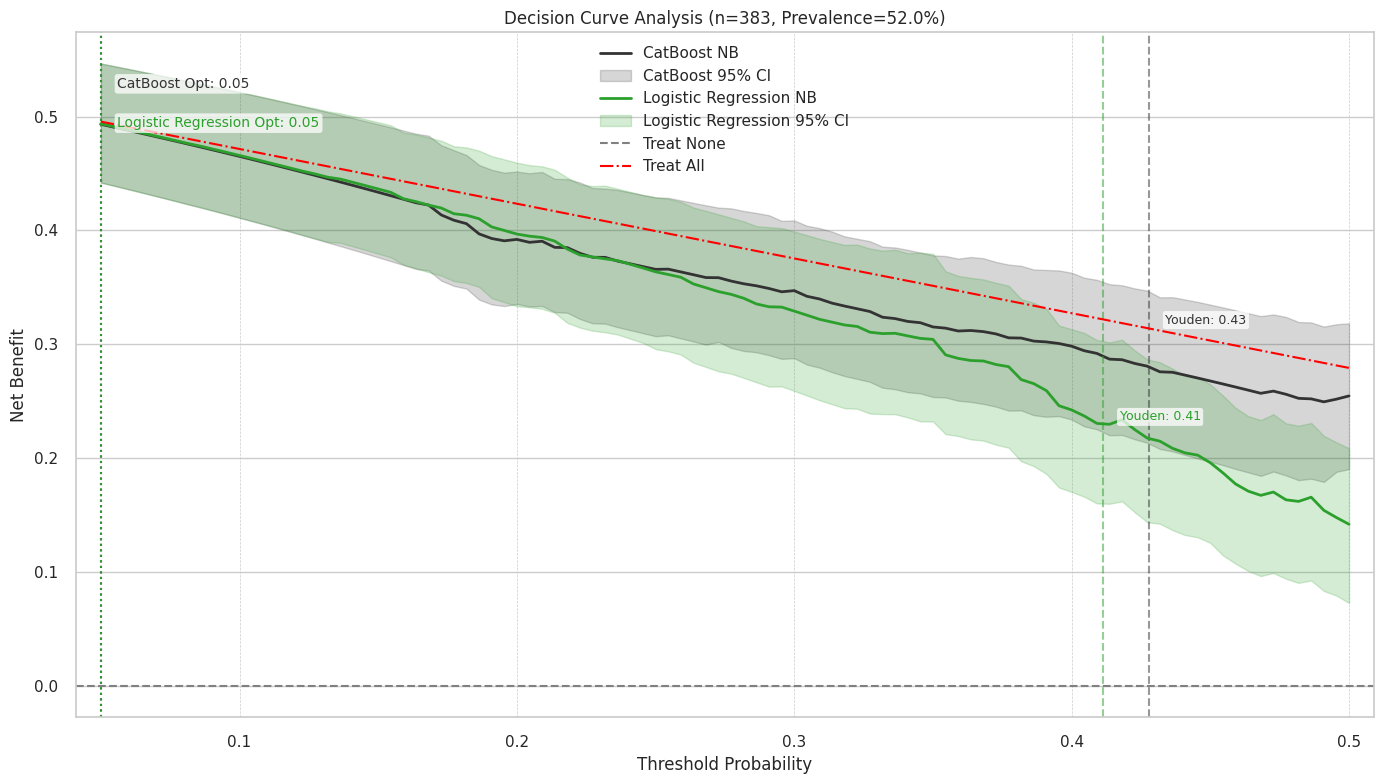

In [18]:
import os
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve  # optional (not required for DCA)

# Create output directory
os.makedirs("model_comparison", exist_ok=True)

# Load test data
print("Loading test_set.csv...")
test_df = pd.read_csv("test_set.csv")
test_df = test_df.rename(columns={"MDR status": "outcome"})
X_test = test_df.drop("outcome", axis=1)
y_test = test_df["outcome"].values
print("✅ Test data loaded.")

# Utilities: reconstruct feature names from a ColumnTransformer
def get_onehot_feature_names_from_ct(column_transformer):
    names = []
    for nm, pipe, cols in column_transformer.transformers_:
        if nm == "remainder" and pipe == "drop":
            continue
        if nm == "cat" and hasattr(pipe, "named_steps") and "onehot" in pipe.named_steps:
            cats = pipe.named_steps["onehot"].categories_
            for col, cat_list in zip(cols, cats):
                names += [f"{col}_{cat}" for cat in cat_list]
        else:
            names += list(cols)
    return names

# Load exactly the two target bundles
print("Loading models...")
model_paths = {
    "CatBoost": "deployment_artifacts/CatBoost_with_thresholds_v1.0.0.pkl",
    "Logistic Regression": "deployment_artifacts/LogisticRegression_with_thresholds_v1.0.0.pkl"
}

loaded_models = {}
for name, path in model_paths.items():
    try:
        bundle = joblib.load(path)
        model = bundle["model"]
        pre = bundle.get("preprocessor")
        sel_feats = bundle.get("selected_features")
        thr = bundle.get("youden_j_threshold", bundle.get("metadata", {}).get("threshold", 0.5))

        if pre is None:
            raise ValueError("Missing preprocessor in bundle")
        if sel_feats is None:
            raise ValueError("Missing selected_features in bundle")

        loaded_models[name] = {
            "model": model,
            "preprocessor": pre,
            "selected_features": sel_feats,
            "youden_threshold": thr,
        }
        print(f"✅ {name} model loaded")
    except Exception as e:
        print(f"❌ Error loading {name}: {e}")

# Prediction function: apply preprocessor, then slice to selected_features
def get_predictions(model_info, X_raw):
    pre = model_info["preprocessor"]
    sel_feats = model_info["selected_features"]

    # Transform raw X
    X_trans = pre.transform(X_raw)
    feat_names = get_onehot_feature_names_from_ct(pre)
    X_df = pd.DataFrame(X_trans, columns=feat_names, index=X_raw.index)

    # Validate and slice to model's selected features
    missing = [f for f in sel_feats if f not in X_df.columns]
    if missing:
        raise ValueError(f"Missing transformed columns for prediction: {missing}")
    X_eval = X_df[sel_feats]

    # Predict probabilities
    mdl = model_info["model"]
    try:
        proba = mdl.predict_proba(X_eval)[:, 1]
    except AttributeError:
        scores = mdl.decision_function(X_eval)
        proba = 1 / (1 + np.exp(-scores))
    return proba

# Generate predictions
print("\nGenerating predictions...")
predictions = {}
youden_thresholds = {}
for name, info in loaded_models.items():
    try:
        predictions[name] = get_predictions(info, X_test)
        youden_thresholds[name] = info["youden_threshold"]
        print(f"✅ {name} predictions generated (Youden threshold={youden_thresholds[name]:.3f})")
    except Exception as e:
        print(f"❌ Failed for {name}: {e}")

# Net benefit computation
def compute_net_benefit(y_true, y_pred_prob, thresholds):
    n = len(y_true); nb = []
    for t in thresholds:
        tp = ((y_pred_prob >= t) & (y_true == 1)).sum()
        fp = ((y_pred_prob >= t) & (y_true == 0)).sum()
        # Standard DCA formulation (Vickers 2006)
        val = (tp / n) - (fp / n) * (t / (1 - t))
        nb.append(val)
    return np.array(nb)

# DCA settings
clin_thresh = np.linspace(0.05, 0.5, 100)  # clinical threshold range
n_boot = 1000
rng = np.random.default_rng(42)

# Bootstrap net benefit & find optimal thresholds
results = {}
for name, proba in predictions.items():
    print(f"\nBootstrapping {name}...")
    boot_mat = np.full((n_boot, len(clin_thresh)), np.nan)
    skip = 0
    for i in tqdm(range(n_boot)):
        idx = rng.choice(len(y_test), len(y_test), replace=True)
        ys, ps = y_test[idx], proba[idx]
        # Require both classes present
        if len(np.unique(ys)) < 2:
            skip += 1
            continue
        boot_mat[i] = compute_net_benefit(ys, ps, clin_thresh)

    if skip:
        print(f"⚠️ Skipped {skip}/{n_boot} bootstrap samples (single-class resamples)")

    valid = boot_mat[~np.isnan(boot_mat).all(axis=1)]
    mean_nb = np.nanmean(valid, axis=0)
    low_ci = np.nanpercentile(valid, 2.5, axis=0)
    high_ci = np.nanpercentile(valid, 97.5, axis=0)
    opt_idx = int(np.nanargmax(mean_nb))

    results[name] = {
        "thresholds": clin_thresh,
        "net_benefit": mean_nb,
        "lower_ci": low_ci,
        "upper_ci": high_ci,
        "optimal_threshold": float(clin_thresh[opt_idx]),
        "optimal_net_benefit": float(mean_nb[opt_idx]),
        "youden_threshold": float(youden_thresholds.get(name, np.nan)),
    }
    print(f"✅ {name} optimal clinical threshold {clin_thresh[opt_idx]:.3f}, NB={mean_nb[opt_idx]:.4f} | Youden={results[name]['youden_threshold']:.3f}")

# Prevalence and reference strategies
prev = float(y_test.mean())
treat_all = prev - clin_thresh * (1 - prev)  # net benefit of treat-all

# Plot DCA
plt.figure(figsize=(14, 8))
palette = {"XGBoost": "#1f77b4", "Logistic Regression": "#2ca02c"}

# per-model vertical text offsets to avoid overlap
y_offsets = {"CatBoost": 0.02, "Logistic Regression": -0.015}
textbox = dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.75)

for name, res in results.items():
    color = palette.get(name, "#333333")

    # mean NB and CI ribbon
    plt.plot(res["thresholds"], res["net_benefit"], color=color, label=f"{name} NB", linewidth=2)
    plt.fill_between(res["thresholds"], res["lower_ci"], res["upper_ci"],
                     color=color, alpha=0.2, label=f"{name} 95% CI")

    # Optimal clinical threshold (highest NB across range)
    ot, nb_opt = res["optimal_threshold"], res["optimal_net_benefit"]
    plt.axvline(ot, linestyle=":", color=color, alpha=0.9)
    # staggered label with box
    plt.text(ot + 0.006,
             nb_opt + 0.012 + y_offsets.get(name, 0.0),
             f"{name} Opt: {ot:.2f}",
             color=color, fontsize=10, bbox=textbox)

    # Model's stored Youden threshold (reference)
    yt = res["youden_threshold"]
    if 0.0 < yt < 1.0:
        plt.axvline(yt, linestyle="--", color=color, alpha=0.5)
        y_you = float(np.interp(yt, res["thresholds"], res["net_benefit"]))
        plt.text(yt + 0.006,
                 y_you + 0.018 + y_offsets.get(name, 0.0),
                 f"Youden: {yt:.2f}",
                 color=color, fontsize=9, bbox=textbox)

# slight margins so labels don’t clip
plt.margins(x=0.02, y=0.05)


# Reference strategies
plt.axhline(0, linestyle="--", color="gray", label="Treat None")
plt.plot(clin_thresh, treat_all, "-.", color="red", label="Treat All")

# Clean legend (deduplicate)
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
plt.legend(unique.values(), unique.keys(), loc="best")

plt.xlabel("Threshold Probability")
plt.ylabel("Net Benefit")
plt.title(f"Decision Curve Analysis (n={len(y_test)}, Prevalence={prev:.1%})")
plt.grid(axis="x", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.savefig("model_comparison/dca_comparison.png", dpi=300, bbox_inches="tight")
plt.show()


**13- Clinical Utility Metrics across Thresholds **

Loading test_set.csv...
✅ Test data loaded.
Loading models...
✅ CatBoost model loaded
✅ Logistic Regression model loaded

Generating predictions...
✅ CatBoost predictions generated (Youden=0.428)
✅ Logistic Regression predictions generated (Youden=0.411)
Bootstrapping utility ribbons for CatBoost...
Bootstrapping utility ribbons for Logistic Regression...

Bootstrapping CatBoost...


100%|██████████| 1000/1000 [00:02<00:00, 496.53it/s]


✅ CatBoost opt thresh 0.050, NB=0.4932

Bootstrapping Logistic Regression...


100%|██████████| 1000/1000 [00:01<00:00, 572.49it/s]


✅ Logistic Regression opt thresh 0.050, NB=0.4937


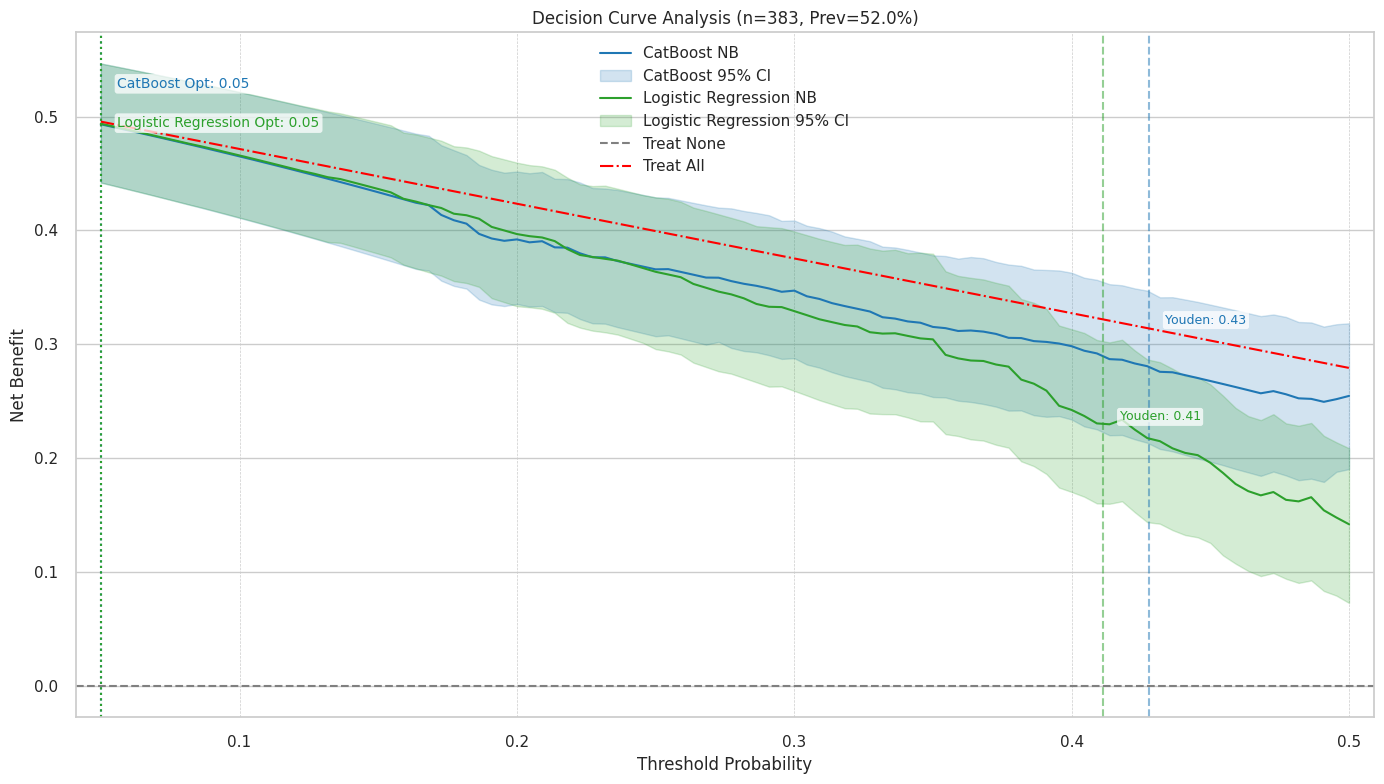

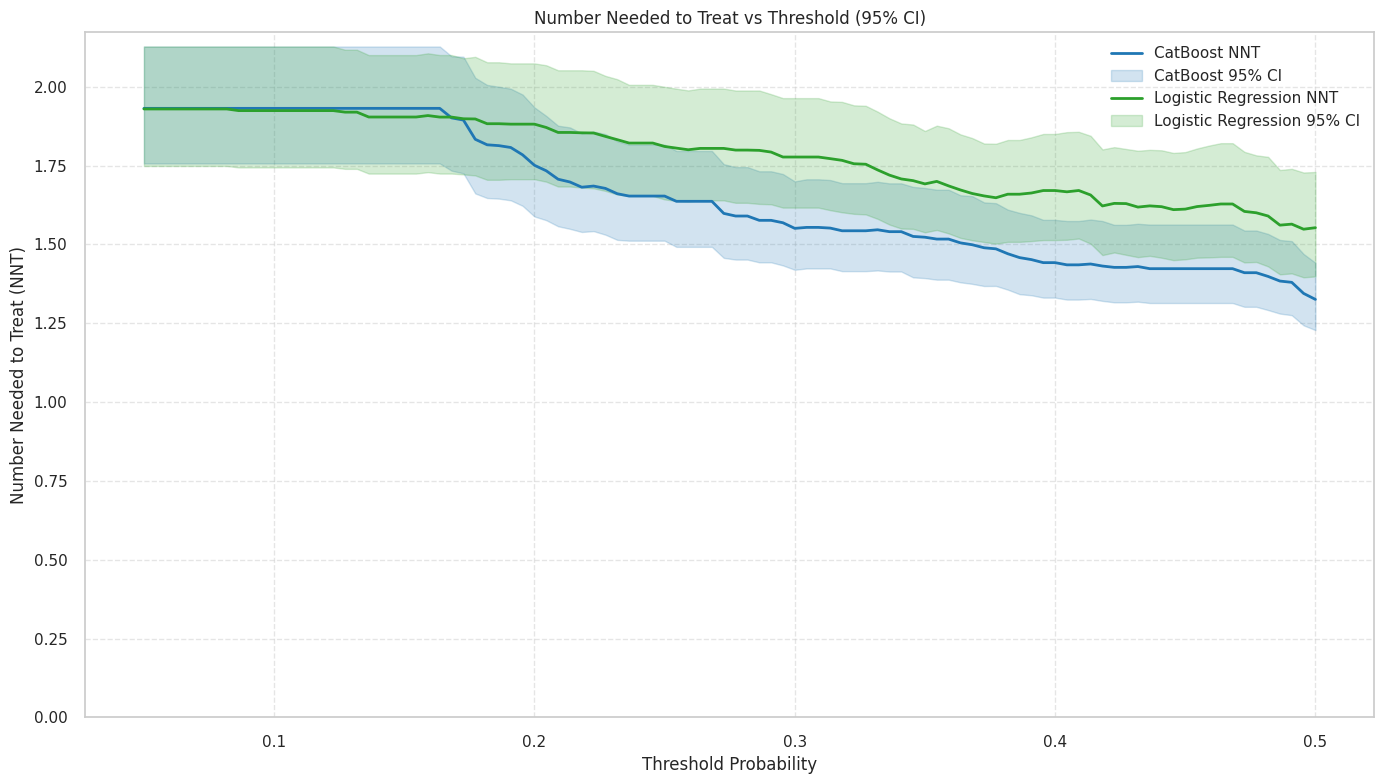

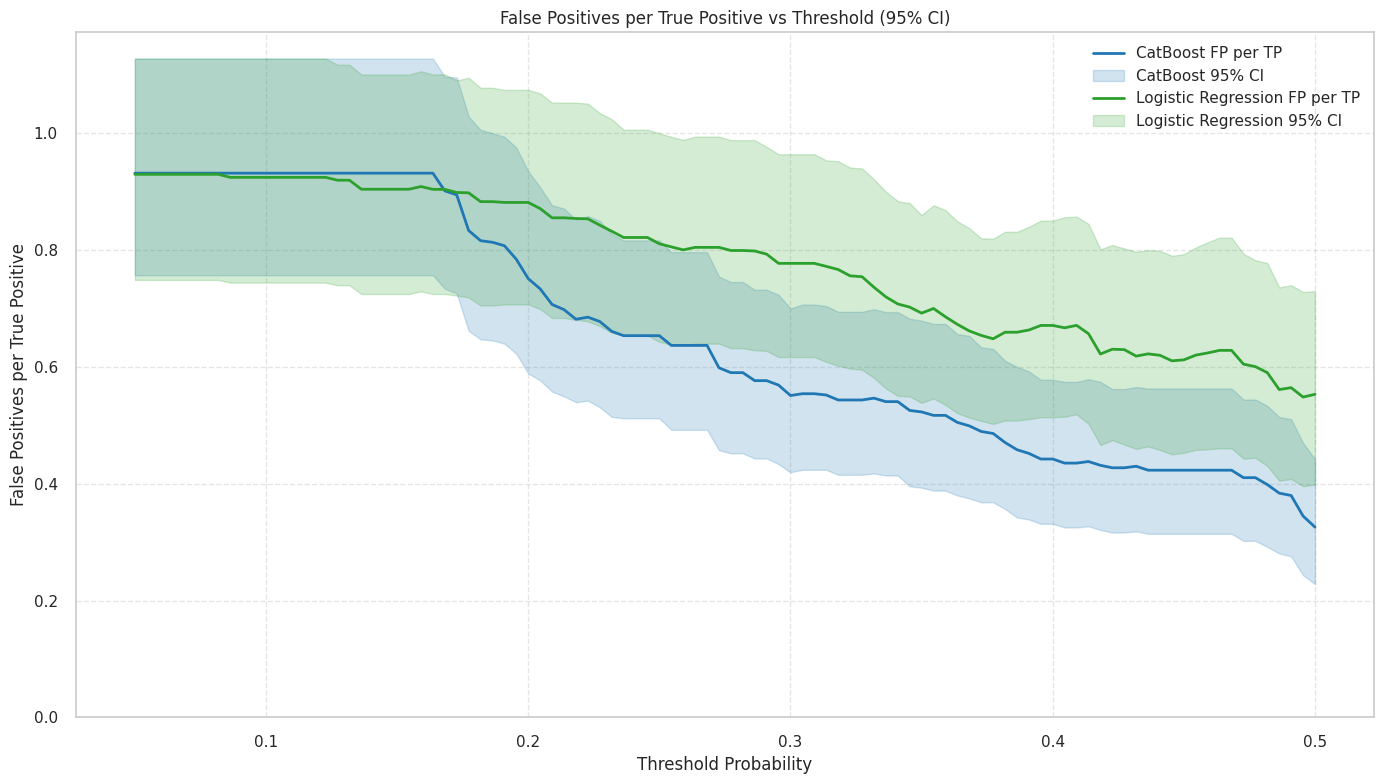


CLINICAL UTILITY SUMMARY

CatBoost:
----------------------------------------
  Threshold 0.10: NNT=1.9, FP/TP=0.9, NB=0.4650
  Threshold 0.20: NNT=1.7, FP/TP=0.7, NB=0.3922
  Threshold 0.30: NNT=1.5, FP/TP=0.5, NB=0.3472
  Threshold 0.40: NNT=1.4, FP/TP=0.4, NB=0.2984

Logistic Regression:
----------------------------------------
  Threshold 0.10: NNT=1.9, FP/TP=0.9, NB=0.4658
  Threshold 0.20: NNT=1.9, FP/TP=0.9, NB=0.3969
  Threshold 0.30: NNT=1.8, FP/TP=0.8, NB=0.3292
  Threshold 0.40: NNT=1.7, FP/TP=0.7, NB=0.2425

✅ All plots saved to 'model_comparison/' directory


In [21]:
import os
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix

# Create output directory
os.makedirs("model_comparison", exist_ok=True)

# Load test data
print("Loading test_set.csv...")
test_df = pd.read_csv("test_set.csv")
test_df = test_df.rename(columns={"MDR status": "outcome"})
X_test = test_df.drop("outcome", axis=1)
y_test = test_df["outcome"].values
print("✅ Test data loaded.")

# Helper to reconstruct feature names from ColumnTransformer
def get_onehot_feature_names_from_ct(column_transformer):
    names = []
    for nm, pipe, cols in column_transformer.transformers_:
        if nm == "remainder" and pipe == "drop":
            continue
        if nm == "cat" and hasattr(pipe, "named_steps") and "onehot" in pipe.named_steps:
            cats = pipe.named_steps["onehot"].categories_
            for col, cat_list in zip(cols, cats):
                names += [f"{col}_{cat}" for cat in cat_list]
        else:
            names += list(cols)
    return names

# Load models: exactly the two requested bundles
print("Loading models...")
models = {
    "CatBoost": "deployment_artifacts/CatBoost_with_thresholds_v1.0.0.pkl",
    "Logistic Regression": "deployment_artifacts/LogisticRegression_with_thresholds_v1.0.0.pkl",
}

loaded_models = {}
for name, path in models.items():
    try:
        bundle = joblib.load(path)
        mdl = bundle["model"]
        pre = bundle.get("preprocessor")
        sf = bundle.get("selected_features")
        thr = bundle.get("youden_j_threshold", bundle.get("metadata", {}).get("threshold", 0.5))
        if mdl is None:
            raise ValueError("Model object is None")
        if pre is None:
            raise ValueError("Missing preprocessor in bundle")
        if sf is None:
            raise ValueError("Missing selected_features in bundle")
        loaded_models[name] = {
            "model": mdl,
            "preprocessor": pre,
            "selected_features": sf,
            "youden_threshold": thr
        }
        print(f"✅ {name} model loaded")
    except Exception as e:
        print(f"❌ Error loading {name}: {e}")

def bootstrap_utility_curves(y_true, y_pred_prob, thresholds, n_boot=1000, rng=None):
    """
    Returns dict with keys:
      'nnt_mean','nnt_low','nnt_high','fppt_mean','fppt_low','fppt_high'
    using bootstrap percentiles (2.5, 97.5). Mean here is np.nanmean over bootstraps.
    """
    if rng is None:
        rng = np.random.default_rng(42)
    n = len(y_true)

    nnt_boot = []
    fppt_boot = []

    for _ in range(n_boot):
        idx = rng.integers(0, n, n)
        yt = y_true[idx]
        yp = y_pred_prob[idx]

        nnt_vals = []
        fppt_vals = []

        for t in thresholds:
            pred_pos = yp >= t
            tp = np.sum(pred_pos & (yt == 1))
            fp = np.sum(pred_pos & (yt == 0))

            if tp == 0:
                nnt_vals.append(np.nan)
                fppt_vals.append(np.nan)
            else:
                nnt_vals.append(np.sum(pred_pos) / tp)
                fppt_vals.append(fp / tp)

        nnt_boot.append(nnt_vals)
        fppt_boot.append(fppt_vals)

    nnt_boot = np.array(nnt_boot, dtype=float)
    fppt_boot = np.array(fppt_boot, dtype=float)

    out = {
        'nnt_mean': np.nanmean(nnt_boot, axis=0),
        'nnt_low':  np.nanpercentile(nnt_boot, 2.5, axis=0),
        'nnt_high': np.nanpercentile(nnt_boot, 97.5, axis=0),
        'fppt_mean': np.nanmean(fppt_boot, axis=0),
        'fppt_low':  np.nanpercentile(fppt_boot, 2.5, axis=0),
        'fppt_high': np.nanpercentile(fppt_boot, 97.5, axis=0),
    }
    return out

# Predict function: apply preprocessor, then slice to selected_features
def get_predictions(model_info, X_raw):
    pre = model_info["preprocessor"]
    sf = model_info["selected_features"]
    X_trans = pre.transform(X_raw)
    feat_names = get_onehot_feature_names_from_ct(pre)
    X_df = pd.DataFrame(X_trans, columns=feat_names, index=X_raw.index)

    missing = [f for f in sf if f not in X_df.columns]
    if missing:
        raise ValueError(f"Missing transformed columns for prediction: {missing}")
    X_eval = X_df[sf]

    mdl = model_info["model"]
    try:
        proba = mdl.predict_proba(X_eval)[:, 1]
    except AttributeError:
        scores = mdl.decision_function(X_eval)
        proba = 1 / (1 + np.exp(-scores))
    return proba

# Generate predictions
print("\nGenerating predictions...")
predictions = {}
for name, info in loaded_models.items():
    try:
        predictions[name] = get_predictions(info, X_test)
        print(f"✅ {name} predictions generated (Youden={info['youden_threshold']:.3f})")
    except Exception as e:
        print(f"❌ Failed for {name}: {e}")

# Net benefit computation
def compute_net_benefit(y_true, y_pred_prob, thresholds):
    n = len(y_true); nb = []
    for t in thresholds:
        tp = ((y_pred_prob >= t) & (y_true == 1)).sum()
        fp = ((y_pred_prob >= t) & (y_true == 0)).sum()
        val = (tp / n) - (fp / n) * (t / (1 - t))  # standard DCA
        nb.append(val)
    return np.array(nb)

# Clinical utility indexes computation
def compute_clinical_utility_indexes(y_true, y_pred_prob, thresholds):
    results = {'NNT': [], 'FP_per_TP': []}
    for t in thresholds:
        pred_pos = y_pred_prob >= t
        tp = (pred_pos & (y_true == 1)).sum()
        fp = (pred_pos & (y_true == 0)).sum()
        if tp == 0:
            nnt = np.nan
            fp_per_tp = np.nan
        else:
            nnt = np.sum(pred_pos) / tp
            fp_per_tp = fp / tp
        results['NNT'].append(nnt)
        results['FP_per_TP'].append(fp_per_tp)
    return {k: np.array(v) for k, v in results.items()}

# Bootstrap ribbons for NNT and FP/TP
utility_bands = {}
for name, proba in predictions.items():
    print(f"Bootstrapping utility ribbons for {name}...")
    utility_bands[name] = bootstrap_utility_curves(
        y_test, proba, clin_thresh, n_boot=n_boot, rng=rng
    )


# DCA bootstrap settings
clin_thresh = np.linspace(0.05, 0.5, 100)
n_boot = 1000
rng = np.random.default_rng(42)

# Bootstrap net benefit & find optimal thresholds
results = {}
for name, proba in predictions.items():
    print(f"\nBootstrapping {name}...")
    boot_mat = np.full((n_boot, len(clin_thresh)), np.nan)
    skip = 0
    for i in tqdm(range(n_boot)):
        idx = rng.choice(len(y_test), len(y_test), replace=True)
        ys, ps = y_test[idx], proba[idx]
        if len(np.unique(ys)) < 2:
            skip += 1
            continue
        boot_mat[i] = compute_net_benefit(ys, ps, clin_thresh)
    if skip:
        print(f"⚠️ Skipped {skip}/{n_boot} samples")
    valid = boot_mat[~np.isnan(boot_mat).all(axis=1)]
    mean_nb = np.nanmean(valid, axis=0)
    low_ci = np.nanpercentile(valid, 2.5, axis=0)
    high_ci = np.nanpercentile(valid, 97.5, axis=0)
    opt_idx = int(np.nanargmax(mean_nb))
    results[name] = {
        "thresholds": clin_thresh,
        "net_benefit": mean_nb,
        "lower_ci": low_ci,
        "upper_ci": high_ci,
        "optimal_threshold": float(clin_thresh[opt_idx]),
        "optimal_net_benefit": float(mean_nb[opt_idx]),
        "youden_threshold": float(loaded_models[name]["youden_threshold"]),
    }
    print(f"✅ {name} opt thresh {clin_thresh[opt_idx]:.3f}, NB={mean_nb[opt_idx]:.4f}")

# Compute clinical utility indexes
clinical_utilities = {}
for name, proba in predictions.items():
    clinical_utilities[name] = compute_clinical_utility_indexes(y_test, proba, clin_thresh)

# Prevalence line
prev = float(y_test.mean())
treat_all = prev - clin_thresh * (1 - prev)

# Plot 1: Decision Curve Analysis (with staggered labels)
plt.figure(figsize=(14, 8))
colors = {"CatBoost": "#1f77b4", "Logistic Regression": "#2ca02c"}
y_offsets = {"CatBoost": 0.02, "Logistic Regression": -0.015}
textbox = dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.75)

for name, res in results.items():
    sns.lineplot(x=res["thresholds"], y=res["net_benefit"], color=colors[name], label=f"{name} NB")
    plt.fill_between(res["thresholds"], res["lower_ci"], res["upper_ci"],
                     color=colors[name], alpha=0.2, label=f"{name} 95% CI")

    # Optimal threshold marker and staggered label
    ot, nb_opt = res["optimal_threshold"], res["optimal_net_benefit"]
    plt.axvline(ot, linestyle=":", color=colors[name])
    plt.text(ot + 0.006, nb_opt + 0.012 + y_offsets.get(name, 0.0),
             f"{name} Opt: {ot:.2f}", color=colors[name], fontsize=10, bbox=textbox)

    # Youden threshold marker and staggered label (if within range)
    yt = res["youden_threshold"]
    if 0.0 < yt < 1.0:
        plt.axvline(yt, linestyle="--", color=colors[name], alpha=0.5)
        y_you = float(np.interp(yt, res["thresholds"], res["net_benefit"]))
        plt.text(yt + 0.006, y_you + 0.018 + y_offsets.get(name, 0.0),
                 f"Youden: {yt:.2f}", color=colors[name], fontsize=9, bbox=textbox)

plt.axhline(0, linestyle="--", color="gray", label="Treat None")
plt.plot(clin_thresh, treat_all, "-.", color="red", label="Treat All")

# Dedup legend
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
plt.legend(unique.values(), unique.keys(), loc="best")

plt.margins(x=0.02, y=0.05)
plt.xlabel("Threshold Probability")
plt.ylabel("Net Benefit")
plt.title(f"Decision Curve Analysis (n={len(y_test)}, Prev={prev:.1%})")
plt.grid(axis="x", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.savefig("model_comparison/dca_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

# Plot 2: Number Needed to Treat vs Threshold (with 95% CI ribbons)
plt.figure(figsize=(14, 8))
for name in predictions.keys():
    color = colors[name]
    band = utility_bands[name]
    # mean (or median) curve
    plt.plot(clin_thresh, band['nnt_mean'], label=f"{name} NNT", color=color, linewidth=2)
    # ribbon
    plt.fill_between(clin_thresh, band['nnt_low'], band['nnt_high'],
                     color=color, alpha=0.2, label=f"{name} 95% CI")

plt.xlabel("Threshold Probability")
plt.ylabel("Number Needed to Treat (NNT)")
plt.title("Number Needed to Treat vs Threshold (95% CI)")
plt.grid(True, linestyle='--', alpha=0.5)
# Deduplicate legend
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
plt.legend(unique.values(), unique.keys(), loc="best")
plt.ylim(bottom=0)
plt.tight_layout()
plt.savefig("model_comparison/nnt_vs_threshold.png", dpi=300, bbox_inches="tight")
plt.show()



# Plot 3: False Positives per True Positive vs Threshold (with 95% CI ribbons)
plt.figure(figsize=(14, 8))
for name in predictions.keys():
    color = colors[name]
    band = utility_bands[name]
    plt.plot(clin_thresh, band['fppt_mean'], label=f"{name} FP per TP", color=color, linewidth=2)
    plt.fill_between(clin_thresh, band['fppt_low'], band['fppt_high'],
                     color=color, alpha=0.2, label=f"{name} 95% CI")

plt.xlabel("Threshold Probability")
plt.ylabel("False Positives per True Positive")
plt.title("False Positives per True Positive vs Threshold (95% CI)")
plt.grid(True, linestyle='--', alpha=0.5)
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
plt.legend(unique.values(), unique.keys(), loc="best")
plt.ylim(bottom=0)
plt.tight_layout()
plt.savefig("model_comparison/fp_per_tp_vs_threshold.png", dpi=300, bbox_inches="tight")
plt.show()


# Summary statistics table
print("\n" + "="*60)
print("CLINICAL UTILITY SUMMARY")
print("="*60)

key_thresholds = [0.1, 0.2, 0.3, 0.4]
for name, utils in clinical_utilities.items():
    print(f"\n{name}:")
    print("-" * 40)
    for t in key_thresholds:
        idx = int(np.argmin(np.abs(clin_thresh - t)))
        actual_t = clin_thresh[idx]
        nnt = utils['NNT'][idx]
        fp_tp = utils['FP_per_TP'][idx]
        nb = results[name]['net_benefit'][idx]

        nnt_str = f"{nnt:.1f}" if np.isfinite(nnt) else "N/A"
        fp_tp_str = f"{fp_tp:.1f}" if np.isfinite(fp_tp) else "N/A"
        nb_str = f"{nb:.4f}"

        print(f"  Threshold {actual_t:.2f}: NNT={nnt_str}, FP/TP={fp_tp_str}, NB={nb_str}")

print(f"\n✅ All plots saved to 'model_comparison/' directory")


**14- SHAP analysis**

🔄 Starting SHAP analysis pipeline for CatBoost...
📦 Model type: <class 'sklearn.calibration.CalibratedClassifierCV'>
✅ Test data loaded. Shape: (383, 7)
📋 Features (selected): ['Age', 'Institution Type_Lab', 'Healthcare Sector_Governmental', 'Institution Type_Hospital', 'Bacteria type_E. coli', 'Gender_M', 'Bacteria type_Pseudomonas Spp']
✅ SHAP values computed. Shape: (383, 7)
📊 Expected value: 0.2976
✅ SHAP values table saved to: shap_tables/shap_values.csv

FEATURE IMPORTANCE RANKING (Mean |SHAP|)
 1. Age                       0.9314
 2. Bacteria type_E. coli     0.8591
 3. Institution Type_Hospital 0.6890
 4. Institution Type_Lab      0.5889
 5. Healthcare Sector_Governmental 0.5116
 6. Gender_M                  0.4781
 7. Bacteria type_Pseudomonas Spp 0.1822


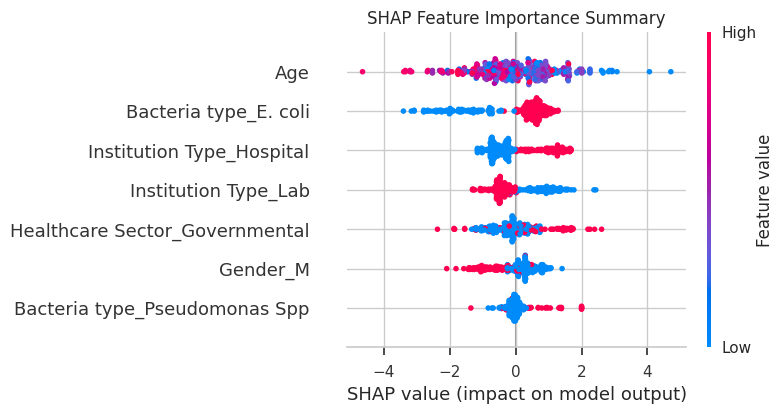

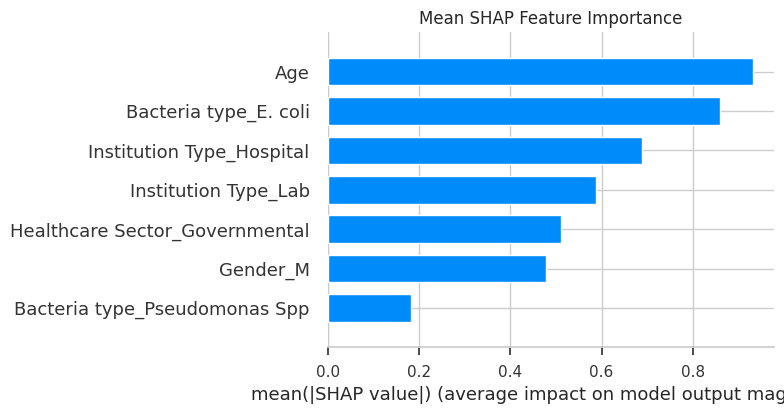

✅ Force plot saved for sample 0
✅ Force plot saved for sample 1
✅ Force plot saved for sample 2
📊 Top 3 features by mean |SHAP|: ['Age', 'Bacteria type_E. coli', 'Institution Type_Hospital']


<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

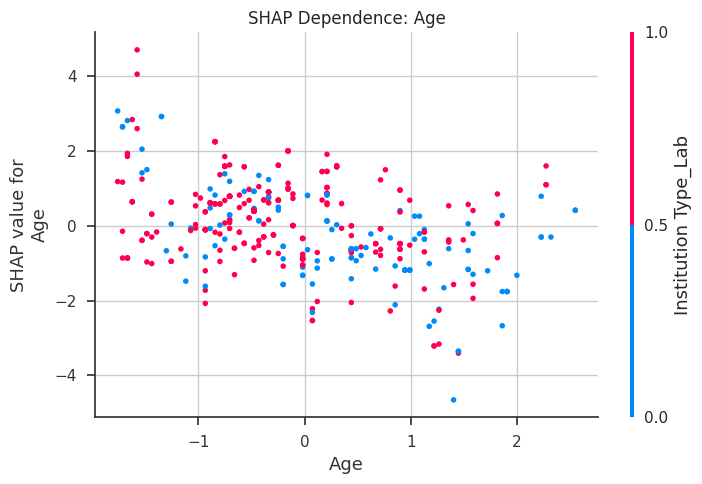

<Figure size 1000x600 with 0 Axes>

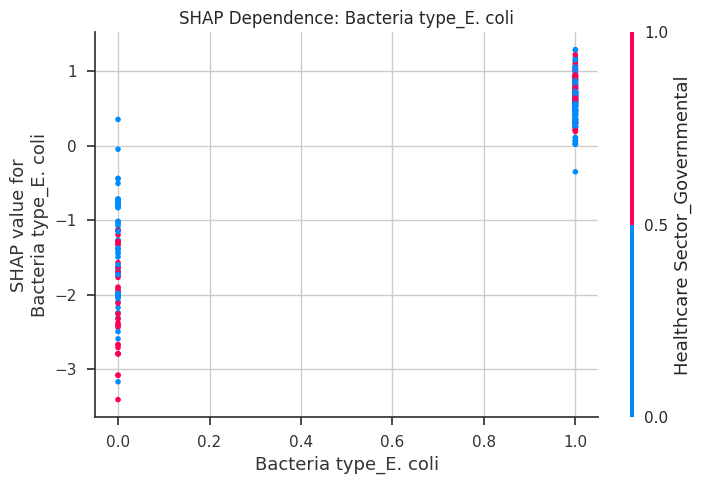

<Figure size 1000x600 with 0 Axes>

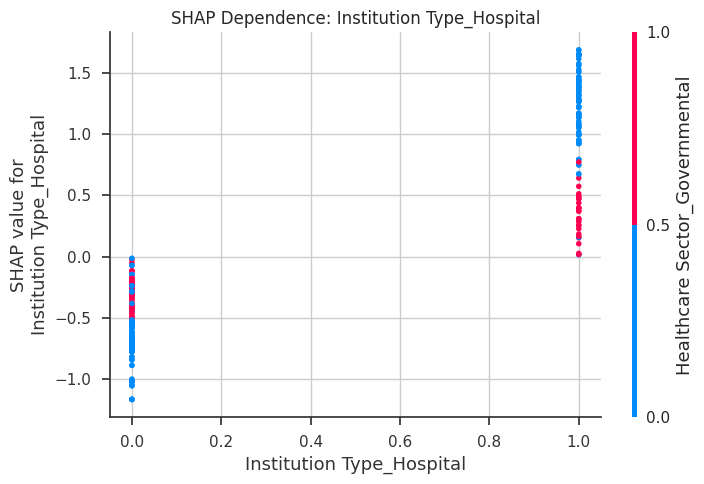

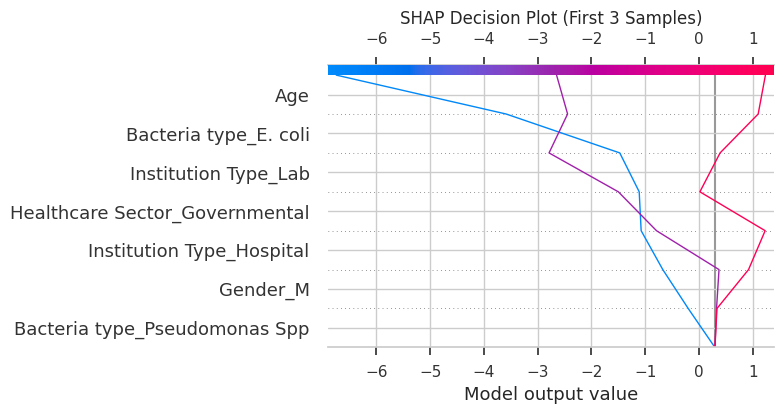

🎉 SHAP analysis completed!


In [22]:

# -*- coding: utf-8 -*-

import os
import joblib
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV

# === Constants and Paths ===
MODEL_BUNDLE_PATH = "deployment_artifacts/CatBoost_with_thresholds_v1.0.0.pkl"
TEST_DATA_PATH = "test_set.csv"
FORCE_PLOTS_DIR = "shap_force_plots"
SHAP_VALUES_DIR = "shap_tables"
N_FORCE_PLOTS_SAMPLES = 3
N_DEPENDENCE_PLOTS = 3

# ---------- Helpers ----------

def load_model_bundle(path: str) -> dict:
    bundle = joblib.load(path)
    if 'model' not in bundle:
        raise KeyError(f"Bundle missing 'model' key. Found: {list(bundle.keys())}")
    return bundle

def extract_base_model(model):
    # If calibrated, unwrap to the underlying estimator for TreeExplainer
    if isinstance(model, CalibratedClassifierCV):
        return model.calibrated_classifiers_[0].estimator
    return model

def get_onehot_feature_names_from_ct(column_transformer):
    names = []
    for nm, pipe, cols in column_transformer.transformers_:
        if nm == "remainder" and pipe == "drop":
            continue
        if nm == "cat" and hasattr(pipe, "named_steps") and "onehot" in pipe.named_steps:
            cats = pipe.named_steps["onehot"].categories_
            for col, cat_list in zip(cols, cats):
                names += [f"{col}_{cat}" for cat in cat_list]
        else:
            names += list(cols)
    return names

def load_test_data_with_bundle_features(path: str, bundle: dict) -> (pd.DataFrame, pd.Series):
    """Load raw test data, apply bundle preprocessor, then select bundle's selected_features."""
    df = pd.read_csv(path)
    if "MDR status" not in df.columns:
        raise ValueError("'MDR status' column missing in test data.")
    X_raw = df.drop(columns=["MDR status"])
    y = df["MDR status"]

    pre = bundle.get("preprocessor")
    if pre is None:
        raise KeyError("Bundle missing 'preprocessor' key required to build model feature space.")

    # Transform raw features to the model's feature space
    X_trans = pre.transform(X_raw)
    feature_names_all = get_onehot_feature_names_from_ct(pre)
    X_full = pd.DataFrame(X_trans, columns=feature_names_all, index=X_raw.index)

    # Use bundle's selected 7 features
    selected_features = bundle.get('selected_features')
    if selected_features is None:
        raise KeyError("Bundle missing 'selected_features' (expected 7 best features).")

    missing = [f for f in selected_features if f not in X_full.columns]
    if missing:
        raise ValueError(f"Missing transformed columns in test data for selected_features: {missing}")

    X_selected = X_full[selected_features]
    return X_selected, y

def compute_shap_values(model, X: pd.DataFrame):
    """Compute SHAP with TreeExplainer for tree-based CatBoost."""
    base_model = extract_base_model(model)

    # Create explainer and compute SHAP values
    explainer = shap.TreeExplainer(base_model)
    shap_values = explainer.shap_values(X)
    expected_value = explainer.expected_value

    # For binary classification, TreeExplainer may return list of arrays
    if isinstance(shap_values, list):
        if len(shap_values) == 2:
            shap_values = shap_values[1]  # positive class
            if isinstance(expected_value, (list, tuple, np.ndarray)):
                expected_value = expected_value[1]
        else:
            # if only one array returned, use that
            shap_values = shap_values if len(shap_values) > 0 else shap_values

    # Ensure array
    shap_values = np.asarray(shap_values)
    return shap_values, float(np.asarray(expected_value))

def save_shap_values_table(shap_values: np.ndarray, X: pd.DataFrame, output_dir: str):
    os.makedirs(output_dir, exist_ok=True)
    shap_df = pd.DataFrame(shap_values, columns=X.columns, index=X.index)
    shap_df.loc['mean_abs'] = shap_df.abs().mean()
    shap_df.loc['mean'] = shap_df.mean()
    output_path = os.path.join(output_dir, "shap_values.csv")
    shap_df.to_csv(output_path, float_format="%.4f")
    print(f"✅ SHAP values table saved to: {output_path}")

def plot_summary(shap_values, X):
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X, show=False)
    plt.title("SHAP Feature Importance Summary")
    plt.tight_layout()
    plt.show()

def plot_bar(shap_values, X):
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X, plot_type="bar", show=False)
    plt.title("Mean SHAP Feature Importance")
    plt.tight_layout()
    plt.show()

def save_force_plots(shap_values, expected_value, X, y, output_dir, n_samples=3):
    os.makedirs(output_dir, exist_ok=True)
    for idx in range(min(n_samples, X.shape[0])):
        plt.figure(figsize=(12, 3))
        shap.force_plot(expected_value, shap_values[idx], X.iloc[idx],
                        matplotlib=True, show=False)
        plt.title(f"SHAP Force Plot - Sample {idx} (True: {y.iloc[idx]})")
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f"sample_{idx}.png"),
                    dpi=120, bbox_inches='tight')
        plt.close()
        print(f"✅ Force plot saved for sample {idx}")

def plot_dependence_top_features(shap_values, X, top_n=3):
    mean_abs = pd.DataFrame(shap_values, columns=X.columns).abs().mean()
    top_features = mean_abs.nlargest(top_n).index
    print(f"📊 Top {top_n} features by mean |SHAP|: {list(top_features)}")
    for feature in top_features:
        plt.figure(figsize=(10, 6))
        shap.dependence_plot(feature, shap_values, X, show=False)
        plt.title(f"SHAP Dependence: {feature}")
        plt.tight_layout()
        plt.show()

def plot_decision(expected_value, shap_values, X, n_samples=5):
    plt.figure(figsize=(12, 6))
    shap.decision_plot(expected_value, shap_values[:n_samples], X.iloc[:n_samples],
                       feature_names=X.columns.tolist(), show=False)
    plt.title(f"SHAP Decision Plot (First {n_samples} Samples)")
    plt.tight_layout()
    plt.show()

def print_feature_importance_summary(shap_values, X):
    mean_abs_shap = pd.DataFrame(shap_values, columns=X.columns).abs().mean()
    importance_df = mean_abs_shap.sort_values(ascending=False)
    print("\n" + "="*50)
    print("FEATURE IMPORTANCE RANKING (Mean |SHAP|)")
    print("="*50)
    for i, (feature, importance) in enumerate(importance_df.head(10).items(), 1):
        print(f"{i:2d}. {feature:<25} {importance:.4f}")

# ---------- Main ----------

def main():
    print("🔄 Starting SHAP analysis pipeline for CatBoost...")
    bundle = load_model_bundle(MODEL_BUNDLE_PATH)
    model = bundle['model']
    print(f"📦 Model type: {type(model)}")

    X_test, y_test = load_test_data_with_bundle_features(TEST_DATA_PATH, bundle)
    print(f"✅ Test data loaded. Shape: {X_test.shape}")
    print(f"📋 Features (selected): {list(X_test.columns)}")

    shap_values, expected_value = compute_shap_values(model, X_test)
    print(f"✅ SHAP values computed. Shape: {np.array(shap_values).shape}")
    print(f"📊 Expected value: {expected_value:.4f}")

    # Save and analyze results
    save_shap_values_table(shap_values, X_test, SHAP_VALUES_DIR)
    print_feature_importance_summary(shap_values, X_test)

    # Visualizations
    plot_summary(shap_values, X_test)
    plot_bar(shap_values, X_test)
    save_force_plots(shap_values, expected_value, X_test, y_test,
                     FORCE_PLOTS_DIR, N_FORCE_PLOTS_SAMPLES)
    plot_dependence_top_features(shap_values, X_test, N_DEPENDENCE_PLOTS)
    plot_decision(expected_value, shap_values, X_test,
                  n_samples=N_FORCE_PLOTS_SAMPLES)

    print("🎉 SHAP analysis completed!")

if __name__ == "__main__":
    main()


15- SHAP with CI

Bootstrapping SHAP: 100%|██████████| 100/100 [01:13<00:00,  1.37it/s]



📊 Creating enhanced visualization...
✅ Plot saved to: shap_results/shap_analysis.png


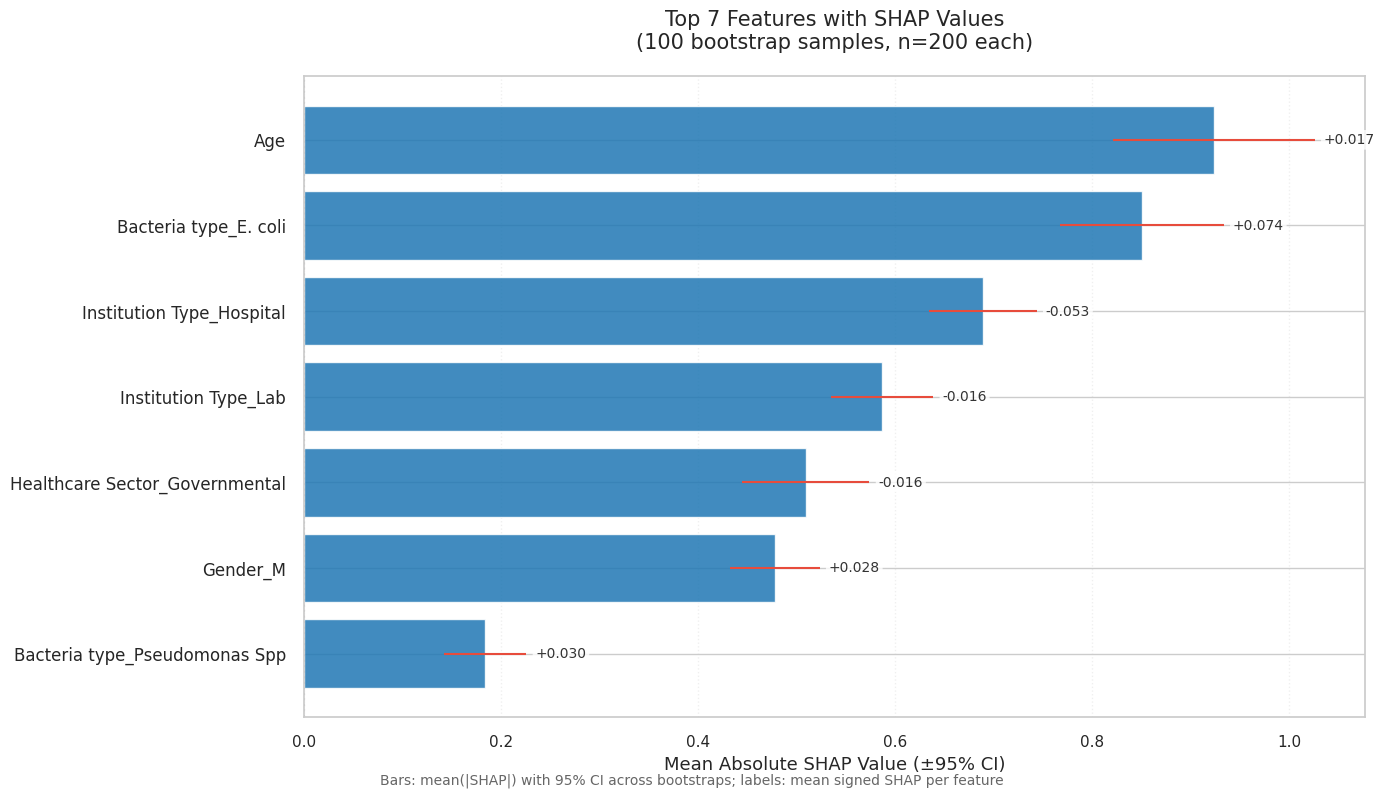

✅ Visualization complete

✅ Analysis complete! Results saved in 'shap_results' directory.


In [24]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import os
import numpy as np
import pandas as pd
import shap
import joblib
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV
from sklearn.utils import resample
from tqdm import tqdm
import warnings

# ----------------------- Configuration -----------------------
MODEL_BUNDLE_PATH = "deployment_artifacts/CatBoost_with_thresholds_v1.0.0.pkl"
TEST_DATA_PATH = "test_set.csv"

N_BOOTSTRAP = 100          # increase from 10 for more stable CIs
SAMPLE_SIZE = 200          # number of rows sampled per bootstrap
RANDOM_STATE = 42
TOP_FEATURES = 7
PLOT_COLOR = '#1f77b4'
ERROR_COLOR = '#e74c3c'
OUTPUT_DIR = "shap_results"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ----------------------- Helpers -----------------------------

def get_onehot_feature_names_from_ct(ct):
    names = []
    for nm, pipe, cols in ct.transformers_:
        if nm == "remainder" and pipe == "drop":
            continue
        if nm == "cat" and hasattr(pipe, "named_steps") and "onehot" in pipe.named_steps:
            cats = pipe.named_steps["onehot"].categories_
            for col, cat_list in zip(cols, cats):
                names += [f"{col}_{cat}" for cat in cat_list]
        else:
            names += list(cols)
    return names

def extract_base_model(model):
    if isinstance(model, CalibratedClassifierCV):
        return model.calibrated_classifiers_[0].estimator
    return model

def compute_shap_values(model, X_df):
    """Returns (shap_values, expected_value) for binary CatBoost."""
    base_model = extract_base_model(model)
    explainer = shap.TreeExplainer(base_model)
    shap_values = explainer.shap_values(X_df)
    expected_value = explainer.expected_value

    # Binary case can return list
    if isinstance(shap_values, list):
        if len(shap_values) == 2:
            shap_values = shap_values[1]
            if isinstance(expected_value, (list, tuple, np.ndarray)):
                expected_value = expected_value[1]
        else:
            shap_values = shap_values if len(shap_values) > 0 else shap_values

    return np.asarray(shap_values), float(np.asarray(expected_value))

def bootstrap_shap(model, X_df, n_boot=N_BOOTSTRAP, sample_size=SAMPLE_SIZE, random_state=RANDOM_STATE):
    """Bootstrap mean abs SHAP and raw SHAP vectors across samples."""
    rng = np.random.default_rng(random_state)
    n = len(X_df)
    feat_count = X_df.shape[1]

    # We'll store:
    # - feature_importance: per-bootstrap mean(|SHAP|) vector (feat_count,)
    # - shap_values: per-bootstrap mean signed SHAP vector (feat_count,)
    feat_imp_boot = np.zeros((n_boot, feat_count), dtype=float)
    shap_signed_boot = np.zeros((n_boot, feat_count), dtype=float)

    for b in tqdm(range(n_boot), desc="Bootstrapping SHAP"):
        idx = rng.choice(n, size=min(sample_size, n), replace=True)
        Xb = X_df.iloc[idx]

        shap_vals, _ = compute_shap_values(model, Xb)
        # mean absolute importance and mean signed
        feat_imp_boot[b] = np.mean(np.abs(shap_vals), axis=0)
        shap_signed_boot[b] = np.mean(shap_vals, axis=0)

    return {
        "feature_importance": feat_imp_boot,   # (n_boot, feat_count)
        "shap_values": shap_signed_boot        # (n_boot, feat_count)
    }

def plot_bootstrap_results(results, feature_names, save_plot=True):
    """Generate enhanced visualization with all requested metrics."""
    print("\n📊 Creating enhanced visualization...")

    # Statistics across bootstraps
    mean_importance = np.mean(results['feature_importance'], axis=0)  # (feat,)
    std_importance = np.std(results['feature_importance'], axis=0)
    mean_signed_shap = np.mean(results['shap_values'], axis=0)        # (feat,)

    # Sort by importance
    sorted_idx = np.argsort(mean_importance)[::-1][:TOP_FEATURES]
    sorted_names = [feature_names[i] for i in sorted_idx]
    sorted_means = mean_importance[sorted_idx]
    sorted_stds = std_importance[sorted_idx]
    sorted_signed = mean_signed_shap[sorted_idx]

    # Figure
    plt.figure(figsize=(14, 8))
    y_pos = np.arange(len(sorted_names))

    # Bars with 95% CI (±1.96*std)
    plt.barh(
        y_pos,
        sorted_means,
        xerr=1.96 * sorted_stds,
        color=PLOT_COLOR,
        alpha=0.85,
        ecolor=ERROR_COLOR,
        capsize=5,
        label="Mean |SHAP| ± 95% CI"
    )

    # Annotate mean signed SHAP
    for i, (mean_val, signed_val, std_val) in enumerate(zip(sorted_means, sorted_signed, sorted_stds)):
        x_pos = mean_val + (1.96 * std_val) + 0.01 * (sorted_means.max() if sorted_means.max() > 0 else 1.0)
        plt.text(
            x_pos, i,
            f"{signed_val:+.3f}",
            va='center', ha='left', fontsize=10, color='#333333',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
        )

    plt.yticks(y_pos, sorted_names, fontsize=12)
    plt.xlabel('Mean Absolute SHAP Value (±95% CI)', fontsize=13)
    plt.title(
        f'Top {TOP_FEATURES} Features with SHAP Values\n'
        f'({N_BOOTSTRAP} bootstrap samples, n={SAMPLE_SIZE} each)',
        fontsize=15, pad=20
    )
    plt.axvline(x=0, color='gray', linestyle=':', alpha=0.5)
    plt.grid(axis='x', linestyle=':', alpha=0.3)
    plt.gca().invert_yaxis()
    plt.tight_layout()

    plt.figtext(
        0.5, 0.01,
        "Bars: mean(|SHAP|) with 95% CI across bootstraps; labels: mean signed SHAP per feature",
        ha='center', fontsize=10, color='#666666'
    )

    if save_plot:
        plot_path = os.path.join(OUTPUT_DIR, "shap_analysis.png")
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
        print(f"✅ Plot saved to: {plot_path}")

    plt.show()
    print("✅ Visualization complete")

# ----------------------- Main flow ---------------------------

if __name__ == "__main__":
    # Load test data
    test_df = pd.read_csv(TEST_DATA_PATH)
    if "MDR status" not in test_df.columns:
        raise ValueError("'MDR status' column missing in test data.")
    X_raw = test_df.drop(columns=["MDR status"])

    # Load bundle
    bundle = joblib.load(MODEL_BUNDLE_PATH)
    model = bundle["model"]
    pre = bundle.get("preprocessor")
    sel_feats = bundle.get("selected_features")
    if pre is None or sel_feats is None:
        raise KeyError("Bundle must contain 'preprocessor' and 'selected_features'.")

    # Transform and align to selected features
    X_trans = pre.transform(X_raw)
    all_names = get_onehot_feature_names_from_ct(pre)
    X_full = pd.DataFrame(X_trans, columns=all_names, index=X_raw.index)

    missing = [f for f in sel_feats if f not in X_full.columns]
    if missing:
        raise ValueError(f"Missing transformed columns for selected_features: {missing}")

    X_model = X_full[sel_feats].copy().astype(np.float64)
    feature_names = list(X_model.columns)

    # Bootstrap SHAP
    results = bootstrap_shap(model, X_model, n_boot=N_BOOTSTRAP, sample_size=SAMPLE_SIZE, random_state=RANDOM_STATE)

    # Save raw arrays for reproducibility
    np.save(os.path.join(OUTPUT_DIR, "feature_importance_boot.npy"), results["feature_importance"])
    np.save(os.path.join(OUTPUT_DIR, "shap_values_boot.npy"), results["shap_values"])
    pd.Series(feature_names).to_csv(os.path.join(OUTPUT_DIR, "feature_names.csv"), index=False, header=False)

    # Plot
    plot_bootstrap_results(results, feature_names, save_plot=True)

    print("\n✅ Analysis complete! Results saved in 'shap_results' directory.")


**16- LIME analysis **

In [25]:

# -*- coding: utf-8 -*-

import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV
import lime
import lime.lime_tabular

# ---------------------------------------------------------------------
# Paths and output
# ---------------------------------------------------------------------
MODEL_BUNDLE_PATH = "deployment_artifacts/CatBoost_with_thresholds_v1.0.0.pkl"
TEST_DATA_PATH = "test_set.csv"
OUTPUT_DIR = "lime_explanations"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ---------------------------------------------------------------------
# Load data
# ---------------------------------------------------------------------
print("Loading data...")
df = pd.read_csv(TEST_DATA_PATH)
if "MDR status" not in df.columns:
    raise ValueError("'MDR status' column missing in test data.")
X_raw = df.drop(columns=["MDR status"])
y_test = df["MDR status"].astype(int)
print("✅ Data loaded successfully")

# ---------------------------------------------------------------------
# Load model bundle
# ---------------------------------------------------------------------
print("Loading model bundle...")
bundle = joblib.load(MODEL_BUNDLE_PATH)
model = bundle["model"]
preprocessor = bundle.get("preprocessor")
selected_features = bundle.get("selected_features")
if preprocessor is None:
    raise KeyError("Bundle missing 'preprocessor'")
if selected_features is None:
    raise KeyError("Bundle missing 'selected_features'")
print("✅ Model bundle loaded")

# ---------------------------------------------------------------------
# Preprocess X and align to selected_features
# ---------------------------------------------------------------------
def get_onehot_feature_names_from_ct(ct):
    names = []
    for nm, pipe, cols in ct.transformers_:
        if nm == "remainder" and pipe == "drop":
            continue
        if nm == "cat" and hasattr(pipe, "named_steps") and "onehot" in pipe.named_steps:
            cats = pipe.named_steps["onehot"].categories_
            for col, cat_list in zip(cols, cats):
                names += [f"{col}_{cat}" for cat in cat_list]
        else:
            names += list(cols)
    return names

print("Preprocessing data...")
X_trans = preprocessor.transform(X_raw)
all_feat_names = get_onehot_feature_names_from_ct(preprocessor)
X_full = pd.DataFrame(X_trans, columns=all_feat_names, index=X_raw.index)

missing = [f for f in selected_features if f not in X_full.columns]
if missing:
    raise ValueError(f"Missing transformed columns for selected_features: {missing}")

# Use exactly the model's selected features (7)
X_use = X_full[selected_features].copy().astype(np.float64)
feature_names = list(X_use.columns)
print(f"✅ Data preprocessed. Using {len(feature_names)} features")

# ---------------------------------------------------------------------
# Clean, unique display names for LIME
# ---------------------------------------------------------------------
display_names = [str(n) for n in feature_names]
_seen = {}
dedup_names = []
for n in display_names:
    if n in _seen:
        _seen[n] += 1
        dedup_names.append(f"{n}_{_seen[n]}")
    else:
        _seen[n] = 0
        dedup_names.append(n)
display_names = dedup_names

# ---------------------------------------------------------------------
# Predict function for LIME (strict typing, shape handling)
# ---------------------------------------------------------------------
def predict_fn(X_array):
    # Strict 2D float64
    X_arr = np.asarray(X_array, dtype=np.float64)
    if X_arr.ndim == 1:
        X_arr = X_arr.reshape(1, -1)

    # Try numpy input; fallback to DataFrame if needed
    try:
        probs = model.predict_proba(X_arr)
    except Exception:
        X_df = pd.DataFrame(X_arr, columns=feature_names)
        probs = model.predict_proba(X_df)

    probs = np.asarray(probs, dtype=np.float64)

    # Ensure (n,2)
    if probs.ndim == 1:
        probs = probs.reshape(-1, 1)
    if probs.shape[1] == 1:
        p1 = probs[:, 0]
        probs = np.column_stack([1.0 - p1, p1])
    return probs

# ---------------------------------------------------------------------
# Initialize LIME explainer
# ---------------------------------------------------------------------
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_use.to_numpy(dtype=np.float64),
    feature_names=display_names,
    class_names=['Non-MDR', 'MDR'],
    mode='classification',
    discretize_continuous=True,
    random_state=42
)

# ---------------------------------------------------------------------
# Choose diverse samples (up to 3 per class)
# ---------------------------------------------------------------------
np.random.seed(42)
sample_indices = []
for cls in [0, 1]:
    idxs = np.where(y_test.values == cls)[0]
    k = min(3, len(idxs))
    if k > 0:
        sample_indices.extend(np.random.choice(idxs, size=k, replace=False))
# Deduplicate
sample_indices = list(dict.fromkeys(sample_indices))

# ---------------------------------------------------------------------
# Explain samples and save HTML/PNG
# ---------------------------------------------------------------------
for idx in sample_indices:
    try:
        x_row = X_use.iloc[idx].to_numpy(dtype=np.float64)  # 1D numeric vector

        exp = explainer.explain_instance(
            data_row=x_row,
            predict_fn=predict_fn,
            num_features=min(7, X_use.shape[1]),
            top_labels=1
        )

        top_label = int(np.asarray(exp.top_labels))  # force scalar int

        html_path = os.path.join(OUTPUT_DIR, f"sample_{idx}.html")
        png_path = os.path.join(OUTPUT_DIR, f"sample_{idx}.png")

        exp.save_to_file(html_path)

        fig = exp.as_pyplot_figure(label=top_label)
        plt.title(f"Sample {idx} (True: {'MDR' if int(y_test.iloc[idx]) == 1 else 'Non-MDR'})")
        plt.tight_layout()
        plt.savefig(png_path, dpi=150)
        plt.close()

        print(f"✅ Saved LIME explanation for sample {idx}: {html_path}, {png_path}")
        # Optional: print the explanation pairs
        print(exp.as_list(label=top_label))

    except Exception as e:
        print(f"❌ Failed to explain sample {idx}: {str(e)}")

print("\n🎉 LIME analysis completed!")


Loading data...
✅ Data loaded successfully
Loading model bundle...
✅ Model bundle loaded
Preprocessing data...
✅ Data preprocessed. Using 7 features
✅ Saved LIME explanation for sample 46: lime_explanations/sample_46.html, lime_explanations/sample_46.png
[('0.00 < Institution Type_Hospital <= 1.00', -0.15516678702142817), ('Institution Type_Lab <= 0.00', -0.11336037691138072), ('Age > 0.72', 0.0767783100115315), ('Gender_M <= 0.00', -0.07146796785250938), ('Bacteria type_Pseudomonas Spp <= 0.00', -0.011076045243007048), ('0.00 < Healthcare Sector_Governmental <= 1.00', 0.007332335129162391), ('Bacteria type_E. coli <= 1.00', 0.0)]
✅ Saved LIME explanation for sample 103: lime_explanations/sample_103.html, lime_explanations/sample_103.png
[('Institution Type_Hospital <= 0.00', 0.156655144192751), ('0.00 < Institution Type_Lab <= 1.00', 0.1325366724024143), ('-0.75 < Age <= -0.20', -0.07208714320376237), ('Gender_M <= 0.00', -0.06442589202643735), ('Bacteria type_Pseudomonas Spp <= 0.00'

**17- SHAP analysis FOR the same LIME samples**

In [26]:

# -*- coding: utf-8 -*-

import os
import joblib
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV

MODEL_BUNDLE_PATH = "deployment_artifacts/CatBoost_with_thresholds_v1.0.0.pkl"
TEST_DATA_PATH = "test_set.csv"

def get_onehot_feature_names_from_ct(ct):
    names = []
    for nm, pipe, cols in ct.transformers_:
        if nm == "remainder" and pipe == "drop":
            continue
        if nm == "cat" and hasattr(pipe, "named_steps") and "onehot" in pipe.named_steps:
            cats = pipe.named_steps["onehot"].categories_
            for col, cat_list in zip(cols, cats):
                names += [f"{col}_{cat}" for cat in cat_list]
        else:
            names += list(cols)
    return names

def extract_base_model(model):
    if isinstance(model, CalibratedClassifierCV):
        return model.calibrated_classifiers_[0].estimator
    return model

def compute_shap_values(model, X_df):
    """
    Compute SHAP values for tree-based models (catBoost). Returns (values, expected_value).
    X_df must already be the model's input space (selected_features).
    """
    base_model = extract_base_model(model)
    explainer = shap.TreeExplainer(base_model)
    shap_values = explainer.shap_values(X_df)
    expected_value = explainer.expected_value

    # Binary case can return list of arrays; pick positive class
    if isinstance(shap_values, list):
        if len(shap_values) == 2:
            shap_values = shap_values[1]
            if isinstance(expected_value, (list, tuple, np.ndarray)):
                expected_value = expected_value[1]
        else:
            shap_values = shap_values if len(shap_values) > 0 else shap_values

    shap_values = np.asarray(shap_values)
    expected_value = float(np.asarray(expected_value))
    return shap_values, expected_value

def generate_shap_for_lime_samples(
    bundle_path=MODEL_BUNDLE_PATH,
    test_path=TEST_DATA_PATH,
    lime_sample_indices=None,
    output_dir="explanations"
):
    """
    Generate SHAP waterfall PNG and interactive force HTML for the same samples used in LIME.
    - Applies bundle preprocessor
    - Uses bundle selected_features
    - Computes SHAP on aligned feature space
    """
    if lime_sample_indices is None:
        lime_sample_indices = []

    # 1) Load test data
    df = pd.read_csv(test_path)
    if "MDR status" not in df.columns:
        raise ValueError("'MDR status' column missing from test_set.csv.")
    X_raw = df.drop(columns=["MDR status"])
    y = df["MDR status"]

    # 2) Load model bundle
    bundle = joblib.load(bundle_path)
    model = bundle["model"]
    pre = bundle.get("preprocessor")
    sel_feats = bundle.get("selected_features")
    if pre is None:
        raise KeyError("Bundle missing 'preprocessor'")
    if sel_feats is None:
        raise KeyError("Bundle missing 'selected_features'")

    # 3) Transform and align features
    X_trans = pre.transform(X_raw)
    all_names = get_onehot_feature_names_from_ct(pre)
    X_full = pd.DataFrame(X_trans, columns=all_names, index=X_raw.index)

    missing = [f for f in sel_feats if f not in X_full.columns]
    if missing:
        raise ValueError(f"Missing transformed columns for selected_features: {missing}")

    X = X_full[sel_feats].copy()

    # 4) Compute SHAP values on full test set (for selected features)
    shap_values, expected_value = compute_shap_values(model, X)

    # 5) Prepare outputs
    os.makedirs(output_dir, exist_ok=True)

    # 6) Extract the specific rows matching LIME indices
    # Keep original order in lime_sample_indices
    for i, sample_idx in enumerate(lime_sample_indices):
        try:
            # Row for plotting
            row_X = X.loc[sample_idx] if sample_idx in X.index else X.iloc[sample_idx]
            # Position of the sample in the current DataFrame
            pos = X.index.get_loc(sample_idx) if sample_idx in X.index else sample_idx

            # Waterfall plot
            plt.figure(figsize=(10, 6))
            shap.plots.waterfall(
                shap.Explanation(
                    values=shap_values[pos],
                    base_values=expected_value,
                    data=row_X,
                    feature_names=X.columns
                ),
                show=False
            )
            plt.title(f"SHAP Explanation for Sample {sample_idx} (LIME-matched)")
            plt.tight_layout()

            png_path = os.path.join(output_dir, f"shap_sample_{sample_idx}.png")
            plt.savefig(png_path, dpi=150, bbox_inches='tight')
            plt.close()
            print(f"✅ Saved waterfall plot to: {png_path}")

            # Force plot HTML (interactive)
            force_plot = shap.plots.force(
                expected_value,
                shap_values[pos],
                row_X,
                matplotlib=False
            )
            html_path = os.path.join(output_dir, f"shap_force_{sample_idx}.html")
            shap.save_html(html_path, force_plot)
            print(f"✅ Saved force plot to: {html_path}")

        except Exception as e:
            print(f"❌ Error processing sample {sample_idx}: {e}")

    print("\n🎉 SHAP analysis complete for all LIME samples")

# ---------------------------------------------------------------------
# Example usage
# ---------------------------------------------------------------------
if __name__ == "__main__":
    # Use the same indices you used in LIME
    lime_sample_indices = [9, 103, 46, 28, 252, 322]
    generate_shap_for_lime_samples(
        bundle_path=MODEL_BUNDLE_PATH,
        test_path=TEST_DATA_PATH,
        lime_sample_indices=lime_sample_indices,
        output_dir="explanations"
    )


✅ Saved waterfall plot to: explanations/shap_sample_9.png
✅ Saved force plot to: explanations/shap_force_9.html
✅ Saved waterfall plot to: explanations/shap_sample_103.png
✅ Saved force plot to: explanations/shap_force_103.html
✅ Saved waterfall plot to: explanations/shap_sample_46.png
✅ Saved force plot to: explanations/shap_force_46.html
✅ Saved waterfall plot to: explanations/shap_sample_28.png
✅ Saved force plot to: explanations/shap_force_28.html
✅ Saved waterfall plot to: explanations/shap_sample_252.png
✅ Saved force plot to: explanations/shap_force_252.html
✅ Saved waterfall plot to: explanations/shap_sample_322.png
✅ Saved force plot to: explanations/shap_force_322.html

🎉 SHAP analysis complete for all LIME samples


**18- Subgroup Performance Analysis**

In [27]:

# -*- coding: utf-8 -*-
"""
Subgroup Analysis and Statistical Comparison for CatBoost Model
Compares performance across different demographic and clinical subgroups
FIXED: Now includes all available subgroups from preprocessed data
"""

import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import (
    roc_auc_score, precision_score, recall_score, f1_score,
    accuracy_score, matthews_corrcoef
)
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

def get_feature_names_from_column_transformer(ct):
    """Extract feature names from ColumnTransformer"""
    names = []
    for nm, pipe, cols in ct.transformers_:
        if nm == 'remainder' and pipe == 'drop':
            continue
        if nm == 'cat':
            if hasattr(pipe, 'named_steps') and 'onehot' in pipe.named_steps:
                cats = pipe.named_steps['onehot'].categories_
                for c, cl in zip(cols, cats):
                    names += [f"{c}_{v}" for v in cl]
            else:
                names += list(cols)
        else:
            names += list(cols)
    return names

def load_group_specific_thresholds(filepath="merged_results/CatBoost_subgroups_optimal_thresholds_summary.csv"):
    """Load group-specific thresholds from the subgroup file"""
    print(f"📋 Loading group-specific thresholds from {filepath}...")

    try:
        df = pd.read_csv(filepath)
        print(f"✅ Found subgroup thresholds file with {len(df)} groups")

        # Create mapping from group names to thresholds
        group_thresholds = {}
        for _, row in df.iterrows():
            group_name = row['group']
            threshold = row['opt_f1_threshold']
            group_thresholds[group_name] = threshold
            print(f"   - {group_name}: {threshold:.4f}")

        return group_thresholds
    except FileNotFoundError:
        print(f"⚠️ Group-specific thresholds file not found: {filepath}")
        return {}
    except Exception as e:
        print(f"⚠️ Error loading group thresholds: {e}")
        return {}

def load_and_prepare_data():
    """Load test set and model bundle"""
    print("📂 Loading test data and model...")

    # Load test set
    test_set = pd.read_csv("test_set.csv")
    X_test = test_set.drop(columns=["MDR status"])
    y_true = test_set["MDR status"]

    # Load model bundle
    bundle = joblib.load("deployment_artifacts/CatBoost_with_thresholds_v1.0.0.pkl")

    print(f"✅ Test data loaded: {len(test_set)} samples")
    print(f"✅ Test data columns: {list(X_test.columns)}")
    print(f"✅ Model bundle keys: {list(bundle.keys())}")

    return test_set, X_test, y_true, bundle

def preprocess_and_predict(X_test, bundle):
    """Apply preprocessing and get predictions"""
    print("🔧 Preprocessing data and making predictions...")

    # Extract components
    model = bundle['model']
    preprocessor = bundle.get('preprocessor')
    selected_features = bundle.get('selected_features') or bundle.get('metadata', {}).get('selected_features')

    if preprocessor is None:
        raise ValueError("No preprocessor found in model bundle")

    # Apply preprocessing
    X_processed = preprocessor.transform(X_test)

    # Get feature names
    all_features = get_feature_names_from_column_transformer(preprocessor)
    X_processed_df = pd.DataFrame(X_processed, columns=all_features)

    print(f"✅ Preprocessed features: {list(X_processed_df.columns)}")

    # Select features if specified
    if selected_features:
        print(f"   Using {len(selected_features)} selected features")
        X_final = X_processed_df[selected_features]
    else:
        print(f"   Using all {len(all_features)} processed features")
        X_final = X_processed_df

    # Get predictions
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_final)[:, 1]
    else:
        # Fallback for models without predict_proba
        decision_scores = model.decision_function(X_final)
        y_proba = 1 / (1 + np.exp(-decision_scores))

    print(f"✅ Predictions generated: prob range [{y_proba.min():.3f}, {y_proba.max():.3f}]")

    return y_proba, X_processed_df

def define_subgroups_from_preprocessed_data(test_data_with_probs, preprocessed_df):
    """Define subgroups using both original and preprocessed data"""
    print("🔍 Defining subgroups from preprocessed data...")

    # Combine original test data with preprocessed features and probabilities
    combined_df = pd.concat([
        test_data_with_probs.reset_index(drop=True),
        preprocessed_df.reset_index(drop=True)
    ], axis=1)

    # Remove duplicate columns (keep the preprocessed versions)
    combined_df = combined_df.loc[:, ~combined_df.columns.duplicated(keep='last')]

    print(f"✅ Combined dataset columns: {list(combined_df.columns)}")

    subgroups = {}

    # Always include overall group
    subgroups['All'] = combined_df

    # Age subgroups (use median as threshold to match file naming)
    if 'Age' in combined_df.columns:
        age_median = combined_df['Age'].median()
        subgroups['Age_lt_median'] = combined_df[combined_df['Age'] < age_median]
        subgroups['Age_ge_median'] = combined_df[combined_df['Age'] >= age_median]
        print(f"   Age median threshold: {age_median:.3f}")

    # Gender subgroups (check for preprocessed gender columns)
    gender_cols = [col for col in combined_df.columns if 'Gender' in col]
    if 'Gender_F' in combined_df.columns:
        subgroups['Gender_F_1'] = combined_df[combined_df['Gender_F'] == 1]  # Female
        subgroups['Gender_F_0'] = combined_df[combined_df['Gender_F'] == 0]  # Male
        print(f"   Added gender subgroups")

    # Institution type subgroups
    inst_cols = [col for col in combined_df.columns if 'Institution Type' in col]
    print(f"   Institution columns found: {inst_cols}")
    for col in inst_cols:
        if col.endswith('_Hospital'):
            subgroups['Institution Type_Hospital_1'] = combined_df[combined_df[col] == 1]
            subgroups['Institution Type_Hospital_0'] = combined_df[combined_df[col] == 0]
        elif col.endswith('_Lab'):
            subgroups['Institution Type_Lab_1'] = combined_df[combined_df[col] == 1]
            subgroups['Institution Type_Lab_0'] = combined_df[combined_df[col] == 0]

    # Healthcare sector subgroups
    health_cols = [col for col in combined_df.columns if 'Healthcare Sector' in col]
    print(f"   Healthcare columns found: {health_cols}")
    for col in health_cols:
        if col.endswith('_Governmental'):
            subgroups['Healthcare Sector_Governmental_1'] = combined_df[combined_df[col] == 1]
            subgroups['Healthcare Sector_Governmental_0'] = combined_df[combined_df[col] == 0]
        elif col.endswith('_Private'):
            subgroups['Healthcare Sector_Private_1'] = combined_df[combined_df[col] == 1]
            subgroups['Healthcare Sector_Private_0'] = combined_df[combined_df[col] == 0]

    # Bacteria type subgroups
    bacteria_cols = [col for col in combined_df.columns if 'Bacteria type' in col]
    print(f"   Bacteria columns found: {bacteria_cols}")
    for col in bacteria_cols:
        if 'E. coli' in col:
            subgroups['Bacteria type_E. coli_1'] = combined_df[combined_df[col] == 1]
            subgroups['Bacteria type_E. coli_0'] = combined_df[combined_df[col] == 0]
        elif 'Klebsiella' in col:
            subgroups['Bacteria type_Klebsiella Spp_1'] = combined_df[combined_df[col] == 1]
            subgroups['Bacteria type_Klebsiella Spp_0'] = combined_df[combined_df[col] == 0]
        elif 'Pseudomonas' in col:
            subgroups['Bacteria type_Pseudomonas Spp_1'] = combined_df[combined_df[col] == 1]
            subgroups['Bacteria type_Pseudomonas Spp_0'] = combined_df[combined_df[col] == 0]

    # Filter out empty subgroups
    subgroups = {name: group for name, group in subgroups.items() if len(group) > 0}

    print(f"✅ Defined {len(subgroups)} subgroups:")
    for name, group in subgroups.items():
        pos_rate = group['MDR status'].mean() if len(group) > 0 else 0
        print(f"   - {name}: {len(group)} samples ({pos_rate:.1%} positive)")

    return subgroups

def compute_metrics(y_true, y_pred, y_prob):
    """Compute comprehensive metrics for a subgroup"""
    if len(y_true) == 0:
        return {metric: np.nan for metric in ['AUROC', 'Accuracy', 'Precision', 'Recall', 'F1', 'MCC']}

    # Handle case with only one class
    if len(np.unique(y_true)) < 2:
        auroc = np.nan
    else:
        auroc = roc_auc_score(y_true, y_prob)

    return {
        'AUROC': auroc,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1': f1_score(y_true, y_pred, zero_division=0),
        'MCC': matthews_corrcoef(y_true, y_pred),
        'Specificity': recall_score(1-y_true, 1-y_pred, zero_division=0)
    }

def apply_thresholds_and_compute_metrics(subgroups, bundle, group_specific_thresholds):
    """Apply appropriate thresholds and compute metrics for each subgroup"""
    print("📊 Computing metrics for each subgroup...")

    global_threshold = bundle.get('youden_j_threshold', 0.5)

    metrics_dict = {}
    predicted_subgroups = {}

    for name, df in subgroups.items():
        if len(df) == 0:
            continue

        # Get appropriate threshold - prioritize group-specific thresholds
        threshold = group_specific_thresholds.get(name, global_threshold)

        # Make predictions
        df = df.copy()
        df['predicted'] = (df['prob'] >= threshold).astype(int)
        df['threshold_used'] = threshold

        # Compute metrics
        metrics = compute_metrics(df['MDR status'], df['predicted'], df['prob'])
        metrics['Threshold'] = threshold
        metrics['N_samples'] = len(df)
        metrics['N_positive'] = df['MDR status'].sum()

        metrics_dict[name] = metrics
        predicted_subgroups[name] = df

        threshold_source = "group-specific" if name in group_specific_thresholds else "global"
        print(f"   - {name}: {len(df)} samples, threshold={threshold:.4f} ({threshold_source})")

    return metrics_dict, predicted_subgroups

def bootstrap_metric_difference(df1, df2, metric_fn, n_boot=1000, seed=42):
    """Bootstrap test for difference in metrics between two groups"""
    np.random.seed(seed)

    # Check if both groups have sufficient data
    if len(df1) < 5 or len(df2) < 5:
        return np.nan

    # Check if both groups have both classes for AUROC
    if len(np.unique(df1["MDR status"])) < 2 or len(np.unique(df2["MDR status"])) < 2:
        if hasattr(metric_fn, '__name__') and metric_fn.__name__ == 'auroc_metric':
            return np.nan

    vals = []
    for _ in range(n_boot):
        # Bootstrap samples
        idx1 = np.random.choice(df1.index, len(df1), replace=True)
        idx2 = np.random.choice(df2.index, len(df2), replace=True)

        try:
            val1 = metric_fn(df1.loc[idx1])
            val2 = metric_fn(df2.loc[idx2])
            vals.append(val1 - val2)
        except:
            continue

    if len(vals) == 0:
        return np.nan

    vals = np.array(vals)
    observed_diff = np.mean(vals)

    # Two-tailed p-value
    p_val = np.sum(np.abs(vals) >= np.abs(observed_diff)) / len(vals)
    return min(p_val, 1.0)  # Cap at 1.0

def get_metric_functions():
    """Define metric functions for bootstrap testing"""
    def precision_metric(df):
        return precision_score(df["MDR status"], df["predicted"], zero_division=0)

    def recall_metric(df):
        return recall_score(df["MDR status"], df["predicted"], zero_division=0)

    def f1_metric(df):
        return f1_score(df["MDR status"], df["predicted"], zero_division=0)

    def auroc_metric(df):
        if len(np.unique(df["MDR status"])) < 2:
            return np.nan
        return roc_auc_score(df["MDR status"], df["prob"])

    def accuracy_metric(df):
        return accuracy_score(df["MDR status"], df["predicted"])

    def specificity_metric(df):
        return recall_score(1-df["MDR status"], 1-df["predicted"], zero_division=0)

    return {
        'precision': precision_metric,
        'recall': recall_metric,
        'f1': f1_metric,
        'auroc': auroc_metric,
        'accuracy': accuracy_metric,
        'specificity': specificity_metric
    }

def z_proportion_test(tp1, n1, tp2, n2):
    """Z-test for difference in proportions"""
    # Convert all inputs to regular Python integers to avoid any type issues
    try:
        tp1 = int(tp1)
        tp2 = int(tp2)
        n1 = int(n1)
        n2 = int(n2)
    except (ValueError, TypeError) as e:
        print(f"Error converting to int: {e}")
        return np.nan

    if n1 == 0 or n2 == 0:
        return np.nan

    p1 = tp1 / n1
    p2 = tp2 / n2
    p_pooled = (tp1 + tp2) / (n1 + n2)

    if p_pooled == 0 or p_pooled == 1:
        return np.nan

    se = np.sqrt(p_pooled * (1 - p_pooled) * (1/n1 + 1/n2))
    if se == 0:
        return np.nan

    z = (p1 - p2) / se
    p_value = 2 * (1 - norm.cdf(abs(z)))  # two-tailed
    return p_value

def perform_statistical_tests(predicted_subgroups):
    """Perform pairwise statistical tests between subgroups"""
    print("🧮 Performing statistical tests...")

    # Define comparison pairs using file naming conventions
    pairs = []
    subgroup_names = list(predicted_subgroups.keys())

    # Age comparison
    if 'Age_lt_median' in subgroup_names and 'Age_ge_median' in subgroup_names:
        pairs.append(('Age_lt_median', 'Age_ge_median'))

    # Gender comparison
    if 'Gender_F_1' in subgroup_names and 'Gender_F_0' in subgroup_names:
        pairs.append(('Gender_F_1', 'Gender_F_0'))

    # Institution type comparisons
    if 'Institution Type_Hospital_1' in subgroup_names and 'Institution Type_Lab_1' in subgroup_names:
        pairs.append(('Institution Type_Hospital_1', 'Institution Type_Lab_1'))

    # Healthcare sector comparison
    if 'Healthcare Sector_Governmental_1' in subgroup_names and 'Healthcare Sector_Governmental_0' in subgroup_names:
        pairs.append(('Healthcare Sector_Governmental_1', 'Healthcare Sector_Governmental_0'))

    # Bacteria type comparisons
    if 'Bacteria type_E. coli_1' in subgroup_names and 'Bacteria type_Klebsiella Spp_1' in subgroup_names:
        pairs.append(('Bacteria type_E. coli_1', 'Bacteria type_Klebsiella Spp_1'))

    print(f"   Found {len(pairs)} comparison pairs:")
    for i, (g1, g2) in enumerate(pairs):
        print(f"     {i+1}. {g1} vs {g2}")

    if not pairs:
        print("⚠️ No valid comparison pairs found")
        return pd.DataFrame()

    # Get metric functions
    metric_functions = get_metric_functions()

    # Perform tests
    stat_results = []

    for g1, g2 in pairs:
        if g1 not in predicted_subgroups or g2 not in predicted_subgroups:
            print(f"   ⚠️ Skipping {g1} vs {g2} - groups not found")
            continue

        d1, d2 = predicted_subgroups[g1], predicted_subgroups[g2]

        print(f"   Comparing {g1} ({len(d1)} samples) vs {g2} ({len(d2)} samples)...")

        result = {
            "Group_1": g1,
            "Group_2": g2,
            "N1": len(d1),
            "N2": len(d2),
        }

        # Test each metric
        for metric_name, metric_fn in metric_functions.items():
            if metric_name == 'recall':
                # Count true positives and total positives explicitly
                d1_true_pos_mask = (d1["MDR status"] == 1) & (d1["predicted"] == 1)
                d1_total_pos_mask = (d1["MDR status"] == 1)
                tp1 = d1_true_pos_mask.sum()
                pos1 = d1_total_pos_mask.sum()

                # Group 2: True positives and total positives
                d2_true_pos_mask = (d2["MDR status"] == 1) & (d2["predicted"] == 1)
                d2_total_pos_mask = (d2["MDR status"] == 1)
                tp2 = d2_true_pos_mask.sum()
                pos2 = d2_total_pos_mask.sum()

                if pos1 > 30 and pos2 > 30:
                    p_val = z_proportion_test(tp1, pos1, tp2, pos2)
                else:
                    p_val = bootstrap_metric_difference(d1, d2, metric_fn)
            else:
                # Use bootstrap for other metrics
                p_val = bootstrap_metric_difference(d1, d2, metric_fn)

            result[f"{metric_name.upper()}_p"] = p_val

        stat_results.append(result)

    return pd.DataFrame(stat_results)

def main():
    """Main execution function"""
    print("=" * 60)
    print("🔬 SUBGROUP ANALYSIS AND STATISTICAL COMPARISON")
    print("=" * 60)

    try:
        # Load group-specific thresholds
        group_specific_thresholds = load_group_specific_thresholds()

        # Load data and model
        test_set, X_test, y_true, bundle = load_and_prepare_data()

        # Preprocess and predict
        y_proba, X_processed = preprocess_and_predict(X_test, bundle)

        # Add predictions to test set
        test_set_with_probs = test_set.copy()
        test_set_with_probs['prob'] = y_proba

        # Define subgroups using both original and preprocessed data
        subgroups = define_subgroups_from_preprocessed_data(test_set_with_probs, X_processed)

        # Compute metrics for each subgroup using group-specific thresholds
        metrics_dict, predicted_subgroups = apply_thresholds_and_compute_metrics(
            subgroups, bundle, group_specific_thresholds
        )

        # Create and save metrics table
        metrics_df = pd.DataFrame(metrics_dict).T.round(4)
        metrics_df.to_csv("subgroup_metrics_results.csv")

        print("\n📊 SUBGROUP METRICS:")
        print("=" * 50)
        # Display key metrics
        key_metrics = ['N_samples', 'Threshold', 'AUROC', 'Accuracy', 'Precision', 'Recall', 'F1', 'Specificity']
        available_metrics = [m for m in key_metrics if m in metrics_df.columns]
        print(metrics_df[available_metrics].to_string())

        # Perform statistical tests
        stat_results_df = None
        if len(predicted_subgroups) > 1:
            stat_results_df = perform_statistical_tests(predicted_subgroups)

            if not stat_results_df.empty:
                stat_results_df.round(4).to_csv("subgroup_pairwise_statistical_tests_results.csv", index=False)

                print(f"\n🧮 STATISTICAL TESTS:")
                print("=" * 50)
                print(stat_results_df.round(4).to_string(index=False))

                # Interpret statistical results
                print(f"\n📈 INTERPRETATION:")
                print("=" * 30)
                for _, row in stat_results_df.iterrows():
                    g1, g2 = row['Group_1'], row['Group_2']
                    print(f"\n{g1} vs {g2}:")
                    for metric in ['AUROC', 'ACCURACY', 'PRECISION', 'RECALL', 'F1', 'SPECIFICITY']:
                        p_col = f'{metric}_p'
                        if p_col in row and not pd.isna(row[p_col]):
                            significance = "significant" if row[p_col] < 0.05 else "not significant"
                            print(f"  {metric}: p={row[p_col]:.4f} ({significance})")
            else:
                print("⚠️ No statistical tests could be performed")

        # Summary
        print(f"\n✅ ANALYSIS COMPLETE!")
        print(f"📁 Results saved:")
        print(f"   - subgroup_metrics_results.csv")
        if stat_results_df is not None and not stat_results_df.empty:
            print(f"   - subgroup_pairwise_statistical_tests_results.csv")

        return metrics_df, stat_results_df

    except Exception as e:
        print(f"❌ Error in subgroup analysis: {str(e)}")
        import traceback
        traceback.print_exc()
        raise

if __name__ == "__main__":
    metrics_df, stat_results_df = main()


🔬 SUBGROUP ANALYSIS AND STATISTICAL COMPARISON
📋 Loading group-specific thresholds from merged_results/CatBoost_subgroups_optimal_thresholds_summary.csv...
⚠️ Group-specific thresholds file not found: merged_results/CatBoost_subgroups_optimal_thresholds_summary.csv
📂 Loading test data and model...
✅ Test data loaded: 383 samples
✅ Test data columns: ['Age', 'Gender', 'Healthcare Sector', 'Institution Type', 'Bacteria type']
✅ Model bundle keys: ['model', 'calibrated_model', 'base_model', 'preprocessor', 'feature_selector', 'selected_features', 'metadata', 'youden_j_threshold']
🔧 Preprocessing data and making predictions...
✅ Preprocessed features: ['Gender_F', 'Gender_M', 'Healthcare Sector_Governmental', 'Healthcare Sector_Private', 'Institution Type_Hospital', 'Institution Type_Lab', 'Bacteria type_E. coli', 'Bacteria type_Klebsiella Spp', 'Bacteria type_Pseudomonas Spp', 'Age']
   Using 7 selected features
✅ Predictions generated: prob range [0.165, 0.823]
🔍 Defining subgroups from 